In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import sys
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [1]:
import joblib
model = joblib.load(r'C:\Users\nicka\price(only total_meters).joblib')

In [122]:
model.predict([1,1,1,3,2014,13,25,50])

2793241.7430644035

In [2]:
p = {1:'10'}
2 in p.keys()

False

In [3]:
le_c.classes_

NameError: name 'le_c' is not defined

In [35]:
le_c.transform(['volokolamsk'])[0]

45

In [36]:
['апрелевка','балашиха','бронницы','чехов','дедовск','дмитров','долгопрудный','домодедово','дубна','дзержинский',
 'электросталь','фрязино','истра','ивантеевка','кашира','химки','хотьково','клин','коломна','королев','котельники',
 'красногорск','ликино дулево','лобня','лосино петровский','луткарино','люберцы','мытищи','наро фоминск','ногинск',
 'одинцово','подольск','пушкино','раменское','реутов','рошаль','руза','сергиев посад','серпухино','щелково','солнечногорск',
 'старая купавна','ступино','талдом','видное','волокамск','воскресенск','москва','яхрома','егорьевск','жуковский','звенигород']

['апрелевка',
 'балашиха',
 'бронницы',
 'чехов',
 'дедовск',
 'дмитров',
 'долгопрудный',
 'домодедово',
 'дубна',
 'дзержинский',
 'электросталь',
 'фрязино',
 'истра',
 'ивантеевка',
 'кашира',
 'химки',
 'хотьково',
 'клин',
 'коломна',
 'королев',
 'котельники',
 'красногорск',
 'ликино дулево',
 'лобня',
 'лосино петровский',
 'луткарино',
 'люберцы',
 'мытищи',
 'наро фоминск',
 'ногинск',
 'одинцово',
 'подольск',
 'пушкино',
 'раменское',
 'реутов',
 'рошаль',
 'руза',
 'сергиев посад',
 'серпухино',
 'щелково',
 'солнечногорск',
 'старая купавна',
 'ступино',
 'талдом',
 'видное',
 'волокамск',
 'воскресенск',
 'москва',
 'яхрома',
 'егорьевск',
 'жуковский',
 'звенигород']

In [37]:
le_c.classes_

array(['aprelevka', 'balashikha', 'bronnicy', 'chekhov', 'dedovsk',
       'dmitrov', 'dolgoprudny', 'domodedovo', 'dubna', 'dzerzhinsky',
       'elektrostal', 'fryazino', 'istra', 'ivanteyevka', 'kashira',
       'khimki', 'khotkovo', 'klin', 'kolomna', 'korolev', 'kotelniki',
       'krasnogorsk', 'likino-dulyovo', 'lobnya', 'losino-petrovskiy',
       'lytkarino', 'lyubertsy', 'mytishchi', 'naro-fominsk', 'noginsk',
       'odintsovo', 'podolsk', 'pushkino', 'ramenskoye', 'reutov',
       'roshal', 'ruza', 'sergiyev-posad', 'serpukhov', 'shchyolkovo',
       'solnechnogorsk', 'staraya-kupavna', 'stupino', 'taldom',
       'vidnoye', 'volokolamsk', 'voskresensk', 'www', 'yakhroma',
       'yegoryevsk', 'zhukovsky', 'zvenigorod'], dtype=object)

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_colwidth',100)
np.set_printoptions(threshold=sys.maxsize)

In [3]:
df = pd.read_csv(r"C:\Users\nicka\OneDrive\Рабочий стол\all_data.csv",sep = ';',encoding = 'cp1251',index_col=0) #index_col=0 для того чтобы не было
df.sample(10)

author        author_type  \
6138   АРТАМОН - недвижимость  real_estate_agent   
9824           Ольга Комарова            realtor   
1440                    Estes  real_estate_agent   
7352                      НДВ  real_estate_agent   
3481             Chase R.E.S.  real_estate_agent   
7464               EstateLiga  real_estate_agent   
1184             ID 101190392  real_estate_agent   
6075                    АНБИС  real_estate_agent   
10314                ГОРОБМЕН  real_estate_agent   
2921                   PEOPLE  real_estate_agent   

                                                      link          city  \
6138   https://solnechnogorsk.cian.ru/sale/flat/281034393/  Москва_и_др.   
9824        https://serpukhov.cian.ru/sale/flat/287531951/  Москва_и_др.   
1440              https://www.cian.ru/sale/flat/286892970/  Москва_и_др.   
7352      https://krasnogorsk.cian.ru/sale/flat/286484557/  Москва_и_др.   
3481              https://www.cian.ru/sale/flat/265280579/  Москва_и_др.   
7464          https://vidnoye.cian.ru/sale/flat/287143664/  Москва_и_др.   
1184        https://serpukhov.cian.ru/sale/flat/285558269/  Москва_и_др.   
6075          https://vidnoye.cian.ru/sale/flat/274309034/  Москва_и_др.   
10314             https://www.cian.ru/sale/flat/285881319/  Москва_и_др.   
2921              https://www.cian.ru/sale/flat/274646400/  Москва_и_др.   

      deal_type accommodation_type  floor  floors_count  rooms_count  \
6138       sale               flat      6            15            1   
9824       sale               flat      1             1            2   
1440       sale               flat      3             4            1   
7352       sale               flat      4             8            1   
3481       sale               flat      4             6            5   
7464       sale               flat     12            18            1   
1184       sale               flat      2             3            1   
6075       sale               flat      8            17            1   
10314      sale               flat      3            25            3   
2921       sale               flat     44            57            5   

       total_meters  price_per_m2      price  year_of_construction  \
6138          37.80        178571    6750000                  2019   
9824          60.00        111666    6700000                    -1   
1440          28.00        232142    6500000                  2021   
7352          23.74        168491    4000000                  2021   
3481         144.00        450694   64900000                  1917   
7464          27.10        158671    4300000                  2019   
1184          39.60         89000    3524400                  2022   
6075          34.40        183139    6300000                  2019   
10314        105.00        233333   24500000                  2021   
2921         552.10        344140  190000000                  2006   

       living_meters  kitchen_meters        phone            district  \
6138            18.9             7.3  79647871502                 NaN   
9824            25.0            18.0  79160395432                 NaN   
1440            14.0             9.0  79647709396                 NaN   
7352            16.5             2.2  79165727913                 NaN   
3481           110.0            20.0  79858150606            Тверской   
7464            16.0             4.0  79067955770                 NaN   
1184            20.2            10.0  79645530676                 NaN   
6075            12.0            12.1  79660620264                 NaN   
10314           55.0            13.0  79100139811  Чертаново Северное   
2921            -1.0            -1.0  79165390154         Хорошевский   

                      street    underground residential_complex  
6138                     NaN            NaN                 NaN  
9824                     NaN            NaN                 NaN  
1440                     NaN            NaN    

<Axes: >

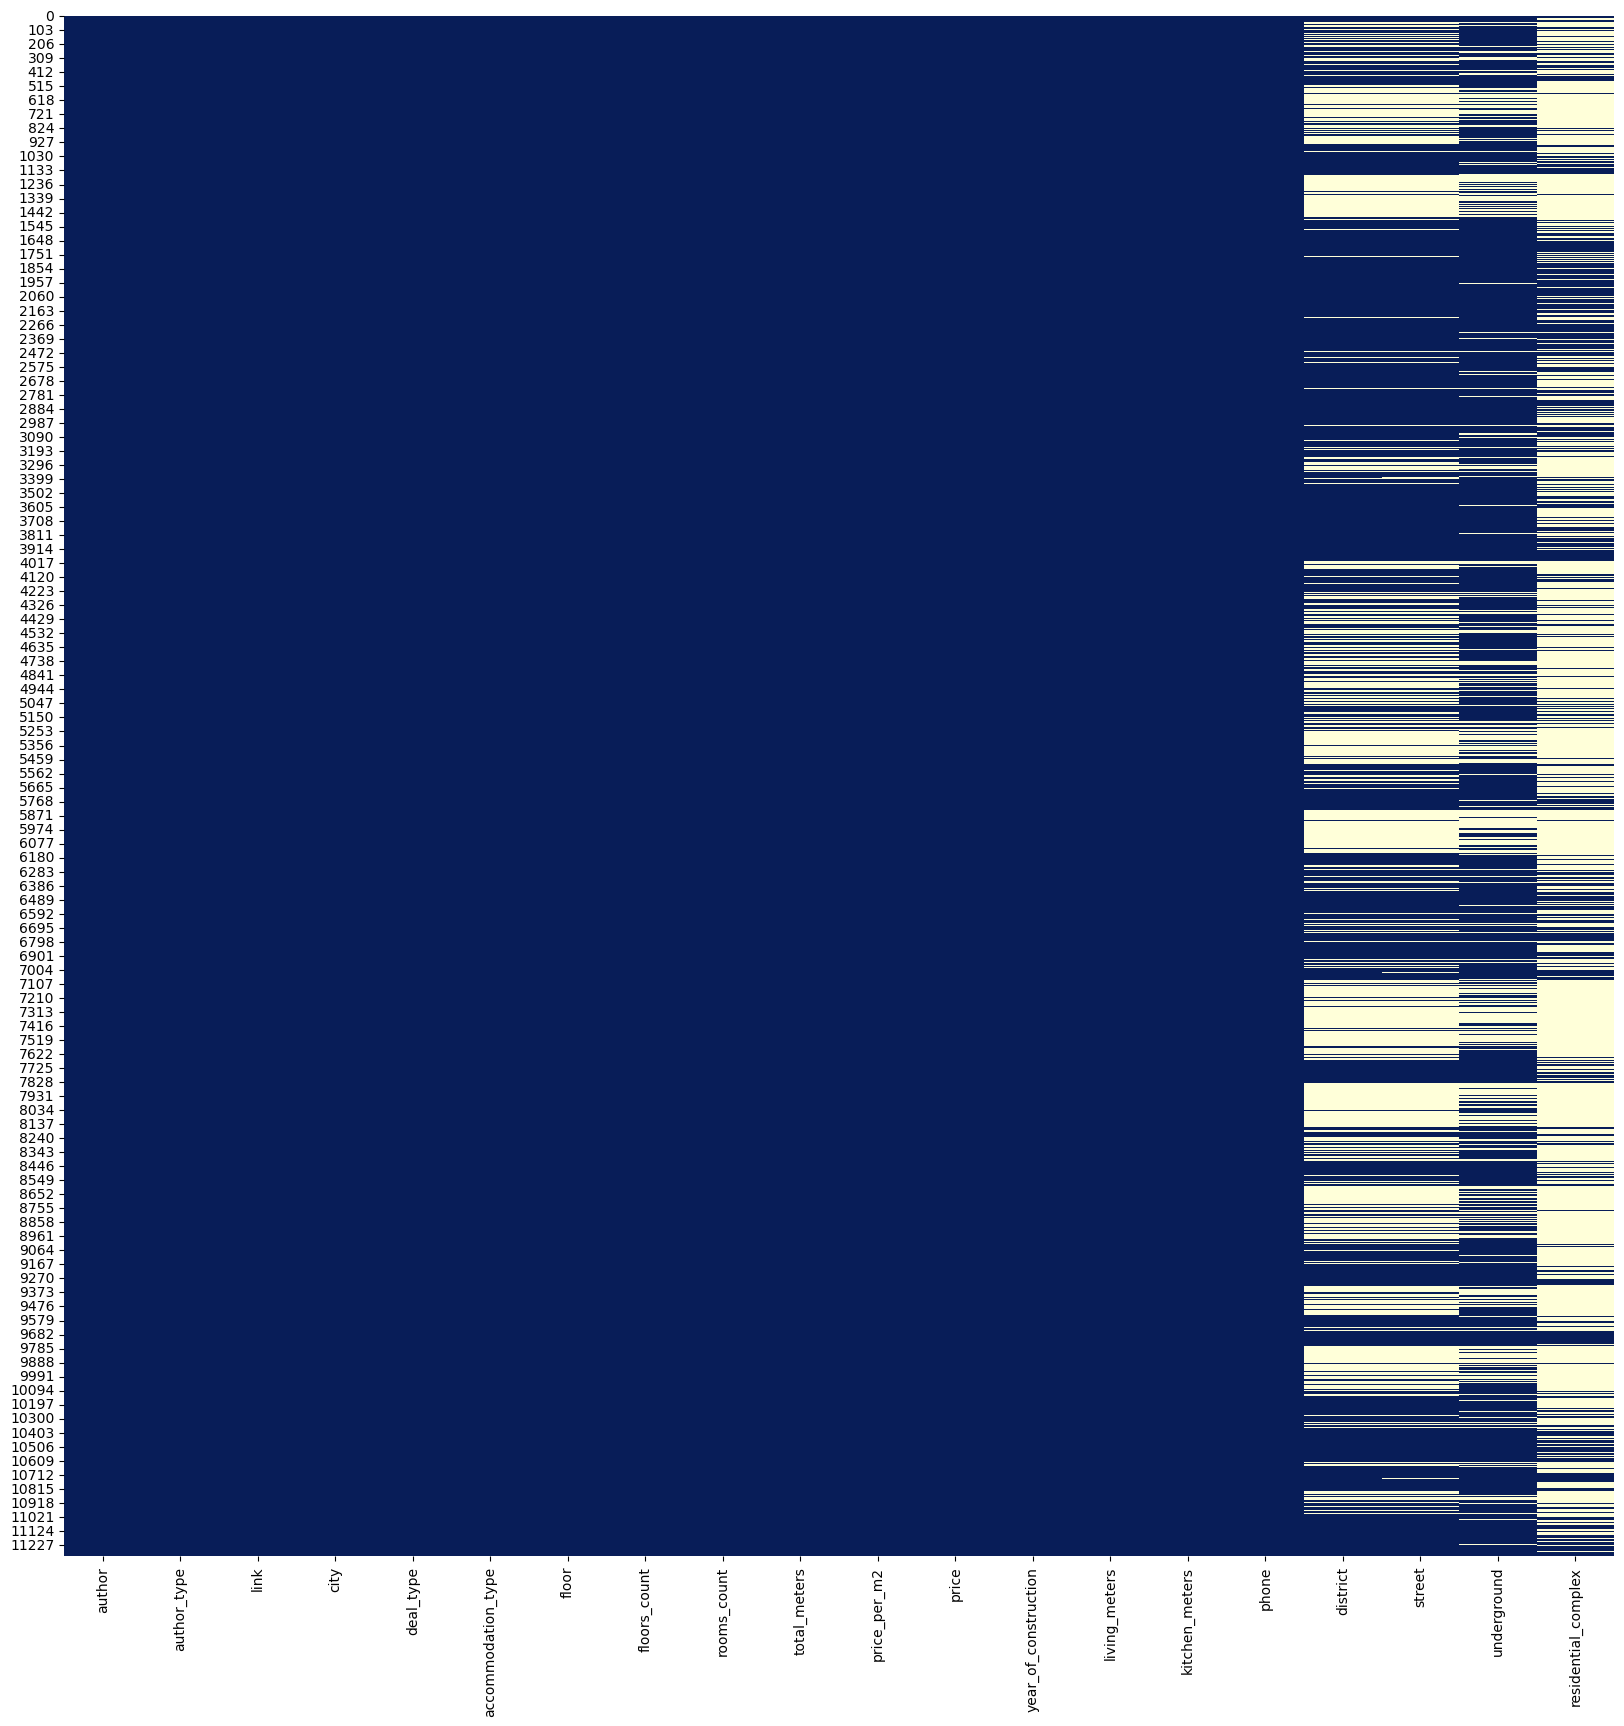

In [4]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [5]:
df.isna().sum()/df.shape[0]*100

author                   0.035367
author_type              0.035367
link                     0.000000
city                     0.000000
deal_type                0.000000
accommodation_type       0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
year_of_construction     0.000000
living_meters            0.000000
kitchen_meters           0.000000
phone                    0.000000
district                36.118479
street                  36.251105
underground             21.786030
residential_complex     67.559682
dtype: float64

In [6]:
df.head(100)

author              author_type  \
0                 Константин Кудрявцев                  realtor   
1                  White and Broughton        real_estate_agent   
2                         Времена года        real_estate_agent   
3                  White and Broughton        real_estate_agent   
4                          ID 44396977                  realtor   
5                         Времена года        real_estate_agent   
6                                ИТКОЛ  official_representative   
7          Century 21 Premium Property        real_estate_agent   
8                          СТРОЙИНВЕСТ        real_estate_agent   
9                            Whitewill        real_estate_agent   
10   NF Group - ex-Knight Frank Russia        real_estate_agent   
11                    Эльвира Чижикова                  realtor   
12                         СТРОЙИНВЕСТ        real_estate_agent   
13                     Дарья Румянцева                  realtor   
14                         ID 18044580                  realtor   
15  ZAPAD REALTY - офис Маршала Жукова        real_estate_agent   
16                         ID 12564578                homeowner   
17                        ID 102136095                homeowner   
18                        Денис Каргин                  realtor   
19                         ID 18108810                  unknown   
20     Центр недвижимости от Сбербанка        real_estate_agent   
21                         Бест-Пресня        real_estate_agent   
22                         City Market        real_estate_agent   
23                       Kalinka Group        real_estate_agent   
24                   Кварта-ПИК БРОКЕР        real_estate_agent   
25                         СТРОЙИНВЕСТ        real_estate_agent   
26                      Наталья Тырина                  realtor   
27                         Бест-Пресня        real_estate_agent   
28                             Homeapp        real_estate_agent   
29                             Homeapp        real_estate_agent   
30                             Homeapp        real_estate_agent   
31                           ID 416302                  realtor   
32                         Бест-Пресня        real_estate_agent   
33                                 RED        real_estate_agent   
34                               Estes        real_estate_agent   
35                        ID 102091586                homeowner   
36                         СТРОЙИНВЕСТ        real_estate_agent   
37                          EstateLiga        real_estate_agent   
38            Century 21 Street Realty        real_estate_agent   
39            Century 21 Street Realty        real_estate_agent   
40                        ID 102646707                homeowner   
41                        СЕДЬМОЕ НЕБО        real_estate_agent   
42            Century 21 Street Realty        real_estate_agent   
43                           ЦеНтр ПИК        real_estate_agent   
44                         СТРОЙИНВЕСТ        real_estate_agent   
45                        СЕДЬМОЕ НЕБО        real_estate_agent   
46                         СТРОЙИНВЕСТ        real_estate_agent   
47                            ИМПЕРИАЛ  official_representative   
48                         ID 66610278                  realtor   
49                     PROНЕДВИЖИМОСТЬ        real_estate_agent   
50                        ID 102438676                homeowner   
51                          СЛУЖБА 925        real_estate_agent   
52                         OPN PARTNER        real_estate_agent   
53                     PROНЕДВИЖИМОСТЬ        real_estate_agent   
54                        ID 102633367                  realtor   
55                           PRO ОБМЕН        real_estate_agent   
56                          CENTURY 21        real_estate_agent   
57               Маленков недвижимость        real_estate_agent   
58                           ID 283823        real_estate_agent   
59          

In [7]:
df['link'].head(100)

0             https://www.cian.ru/sale/flat/283849683/
1             https://www.cian.ru/sale/flat/280986757/
2             https://www.cian.ru/sale/flat/286530258/
3             https://www.cian.ru/sale/flat/283638079/
4             https://www.cian.ru/sale/flat/287127196/
5             https://www.cian.ru/sale/flat/285378586/
6             https://www.cian.ru/sale/flat/287529888/
7             https://www.cian.ru/sale/flat/287489122/
8      https://balashikha.cian.ru/sale/flat/281454196/
9             https://www.cian.ru/sale/flat/286402225/
10            https://www.cian.ru/sale/flat/283655536/
11            https://www.cian.ru/sale/flat/286844698/
12            https://www.cian.ru/sale/flat/279825134/
13            https://www.cian.ru/sale/flat/287613785/
14            https://www.cian.ru/sale/flat/287715516/
15            https://www.cian.ru/sale/flat/286193432/
16            https://www.cian.ru/sale/flat/273314840/
17            https://www.cian.ru/sale/flat/286309827/
18        

In [8]:
df['link'][6][:11]== "https://www"

True

In [9]:
df['link'][8].find('/')+1

7

Москва и остальное

In [10]:
def city(link):
    if link[:10] == "https://www":
        return 'cian'
    else:
        return link[link.find('/')+2:link.find('.')]
df['city'] = df['link'].apply(city)

Москва и МО

In [11]:
# def city(link):
#     if link[:11] == "https://www":
#         return 'M'
#     else:
#         return 'MO'
# df['city'] = df['link'].apply(city)

In [12]:
df.head(100)

author              author_type  \
0                 Константин Кудрявцев                  realtor   
1                  White and Broughton        real_estate_agent   
2                         Времена года        real_estate_agent   
3                  White and Broughton        real_estate_agent   
4                          ID 44396977                  realtor   
5                         Времена года        real_estate_agent   
6                                ИТКОЛ  official_representative   
7          Century 21 Premium Property        real_estate_agent   
8                          СТРОЙИНВЕСТ        real_estate_agent   
9                            Whitewill        real_estate_agent   
10   NF Group - ex-Knight Frank Russia        real_estate_agent   
11                    Эльвира Чижикова                  realtor   
12                         СТРОЙИНВЕСТ        real_estate_agent   
13                     Дарья Румянцева                  realtor   
14                         ID 18044580                  realtor   
15  ZAPAD REALTY - офис Маршала Жукова        real_estate_agent   
16                         ID 12564578                homeowner   
17                        ID 102136095                homeowner   
18                        Денис Каргин                  realtor   
19                         ID 18108810                  unknown   
20     Центр недвижимости от Сбербанка        real_estate_agent   
21                         Бест-Пресня        real_estate_agent   
22                         City Market        real_estate_agent   
23                       Kalinka Group        real_estate_agent   
24                   Кварта-ПИК БРОКЕР        real_estate_agent   
25                         СТРОЙИНВЕСТ        real_estate_agent   
26                      Наталья Тырина                  realtor   
27                         Бест-Пресня        real_estate_agent   
28                             Homeapp        real_estate_agent   
29                             Homeapp        real_estate_agent   
30                             Homeapp        real_estate_agent   
31                           ID 416302                  realtor   
32                         Бест-Пресня        real_estate_agent   
33                                 RED        real_estate_agent   
34                               Estes        real_estate_agent   
35                        ID 102091586                homeowner   
36                         СТРОЙИНВЕСТ        real_estate_agent   
37                          EstateLiga        real_estate_agent   
38            Century 21 Street Realty        real_estate_agent   
39            Century 21 Street Realty        real_estate_agent   
40                        ID 102646707                homeowner   
41                        СЕДЬМОЕ НЕБО        real_estate_agent   
42            Century 21 Street Realty        real_estate_agent   
43                           ЦеНтр ПИК        real_estate_agent   
44                         СТРОЙИНВЕСТ        real_estate_agent   
45                        СЕДЬМОЕ НЕБО        real_estate_agent   
46                         СТРОЙИНВЕСТ        real_estate_agent   
47                            ИМПЕРИАЛ  official_representative   
48                         ID 66610278                  realtor   
49                     PROНЕДВИЖИМОСТЬ        real_estate_agent   
50                        ID 102438676                homeowner   
51                          СЛУЖБА 925        real_estate_agent   
52                         OPN PARTNER        real_estate_agent   
53                     PROНЕДВИЖИМОСТЬ        real_estate_agent   
54                        ID 102633367                  realtor   
55                           PRO ОБМЕН        real_estate_agent   
56                          CENTURY 21        real_estate_agent   
57               Маленков недвижимость        real_estate_agent   
58                           ID 283823        real_estate_agent   
59          

In [13]:
df.shape

(11310, 20)

In [14]:
df = df.drop_duplicates()
df.shape

(8391, 20)

In [15]:
df_cop = df.copy()

# Вычисление ненужных данных

### City

### Ссылка на квартиры нам не понадобиться кроме (!!!!!) того как если бы мы показывали похожие квартиры и т.к. спарсили данные

In [16]:
df_cop.drop(columns = 'link',inplace = True)

### Deal_type

In [17]:
df_cop['deal_type'].unique()

array(['sale'], dtype=object)

In [18]:
df_cop.drop(columns = 'deal_type',inplace = True)

### Accommodation_type

In [19]:
df_cop['accommodation_type'].unique()

array(['flat'], dtype=object)

In [20]:
df_cop.drop(columns = 'accommodation_type',inplace = True)

### Телефон для нашей модели также не нужен т.к. это индивидуальная информация

In [21]:
df_cop.drop(columns = 'phone',inplace = True)

### Author и Author_type пользователь знать не сможет, т.к. мы просто будем оценивать квартиру

In [22]:
df_cop.drop(columns = ['author','author_type'],inplace = True)

In [23]:
df_cop.sample(20)

city  floor  floors_count  rooms_count  total_meters  \
598      mytishchi      7            17            1          28.0   
6582           www      4             5            3          73.7   
4178           www      2             2           -1          11.1   
8780        khimki     16            25            2          56.9   
124    dolgoprudny      6            19            1          44.6   
8942           www      8            24            2          44.0   
3324      pushkino     16            17            5         157.0   
1671           www      8            29            3         100.0   
1330   krasnogorsk      3             6            1          40.0   
8747       vidnoye     16            17            2          51.4   
8823     kotelniki     12            25            2          56.3   
8493           www      1             6            2          68.8   
4152           www      1             5           -1          26.0   
11093          www      5            59            4         132.0   
10826          www      6            21            4         230.0   
2964           www      1             2            5         343.6   
11048          www     16            17            4         135.0   
3645           www      2             5            5         127.0   
9663           www      1             7            3          78.4   
9425           www      9             9            3          50.0   

       price_per_m2      price  year_of_construction  living_meters  \
598          164285    4600000                  2022           -1.0   
6582         860864   63445680                  1913           -1.0   
4178         486486    5400000                    -1            5.1   
8780         166959    9500000                  2007           32.8   
124          181614    8100000                  2014           21.5   
8942         281818   12400000                  2015           18.0   
3324         156050   24500000                  2004           91.5   
1671         287500   28750000                  2021           51.9   
1330         142500    5700000                  2020           -1.0   
8747         166342    8550000                  2008           31.3   
8823         180284   10150000                  2020           21.4   
8493         303779   20900000                  1956           42.0   
4152         711538   18500000                    -1           15.0   
11093        575757   76000000                  2021           -1.0   
10826       1152173  265000000                  2008           -1.0   
2964        1100000  377960000                    -1           -1.0   
11048        425925   57500000                  2003           97.0   
3645         866141  110000000                  1910           94.2   
9663         389030   30500000                  1928           -1.0   
9425         250000   12500000                  1979           34.7   

       kitchen_meters        district                           street  \
598               6.0             NaN                              NaN   
6582              7.0       Мещанский     Большой Сергиевский переулок   
4178              1.0  Соколиная гора                          Вольная   
8780             10.3             NaN                              NaN   
124              11.5             NaN                              NaN   
8942             10.0             NaN                              NaN   
3324             24.4             NaN                              NaN   
1671             16.3       Можайский     переулок 2-й Петра Алексеева   
1330             -1.0             NaN                              NaN   
8747              7.4             NaN                              NaN   
8823             20.9             NaN                              NaN   
8493              9.8     Хорошевский                        Куусинена   
4152              6.0        Якиманка        3-й Голутвинский переулок   
11093          

In [24]:
df_cop.sample(100)

city  floor  floors_count  rooms_count  total_meters  \
9243         odintsovo      5             7            3         116.0   
9280               www      6            27            3         127.0   
3875               www      4             7            5         184.8   
8601           dmitrov      4             4            2          42.9   
10604              www      5             7            4         200.0   
1100               www      2            10            1          35.0   
941          mytishchi     14            14            1          45.1   
4013        ramenskoye      3             5            5         132.0   
2557               www      3             3            4         155.0   
414                www      6             6            1          18.6   
2944               www     13            13            5         595.0   
9178               www      3             5            3          66.4   
5601               www      7            14            1          34.6   
2933               www      3            10            5         149.1   
706         balashikha     16            17            1          41.0   
9533               www      9             9            3          58.7   
7188         lyubertsy      2            11           -1          23.3   
4596         mytishchi      6            10            1          25.9   
8531               www     18            24            2          68.3   
8590               www      5             8            2         170.0   
1340           noginsk      9            17            1          40.1   
940                www      9             9            1          32.0   
9019               www      4            17            2          59.2   
1464        ramenskoye      7            17            1          41.8   
9326         serpukhov      1            12            3          74.9   
8704    sergiyev-posad     11            14            2          53.7   
487                www     12            12            1          34.6   
10793              www      7            10            4         157.0   
9471         odintsovo      5            17            3          90.0   
1935               www     26            41            4         138.2   
10483              www     10            17            4         203.5   
4837         kotelniki      5            25            1          19.6   
4492               www      7            10            1          19.2   
8899               www      1            12            2          48.0   
7425        domodedovo      6            17            1          24.5   
1881               www      3             5            4          91.0   
10753              www     11            19            4         121.0   
3113               www      9            13            5         217.3   
3938               www      7            11            5         273.4   
4144               www     16            19            1          24.8   
7143               www      2             3           -1          11.8   
6617               www     13            13            3         102.0   
8448               www     19            24            2          55.2   
1304       krasnogorsk     25            25            1          30.0   
8867            reutov     12            25            2          59.0   
1774               www      5            10            3         144.0   
2232               www     13            23            4         138.3   
4037           korolev      3             4            5         193.0   
3181         lytkarino      1             5            5         121.0   
10934              www      3            18            4         103.0   
4545               www     20            22            1          25.0   
404                www      6             9            1          35.0   
4520               www      3             3           -1          16.0   
8635        ramenskoye

И удаляем ненужные колонки из датасета

In [25]:
df_cop.drop(columns = ['street','residential_complex'],inplace = True)

In [26]:
df_cop.sample(100)

city  floor  floors_count  rooms_count  total_meters  \
9672              www      5            37            3         69.00   
915         mytishchi      6            14            1         47.00   
1324       balashikha      4            17            1         37.00   
2364              www     13            20            4        104.00   
9739              www      3             5            3         81.00   
11031             www      7            17            4        150.00   
8906              www      4             5            2         42.80   
8479              www     24            24            2         62.00   
6409              www      3             5            2         40.50   
3156       balashikha      1             5            5         81.40   
2240              www      4             7            4        235.00   
3453              www      5            12            5        150.00   
7103        lyubertsy      1             4            1         22.00   
1498              www      3             4            2         40.00   
8314      ivanteyevka      1             2            2         42.00   
4363              www      1             1           -1         18.40   
3629              www     35            36            5        455.00   
1501           khimki      4             5            2         45.00   
9218              www     28            29            3         97.50   
4212              www      2             4           -1         30.40   
8641           khimki     13            25            2         42.20   
4476              www      2            10           -1         20.00   
3402              www     15            28            5        135.00   
6461              www     21            21            3         84.00   
7500          vidnoye      3             9            1         22.30   
9229              www     14            18            3        102.00   
483               www      4            25            1         39.50   
4111              www     17            17            5        150.00   
4246   solnechnogorsk     10            12            1         30.20   
1538              www      5             9            2         44.00   
11021             www     14            25            4        108.00   
8398              www     18            22            2         60.40   
8730        mytishchi      2             7            2         51.30   
1854              www      6             9            3         64.00   
9403      krasnogorsk      4             9            3         65.10   
2580              www     26            27            4        117.80   
1113              www      1             7            1         34.70   
1297              www      3            10            1         45.00   
2715              www      8            14            5        127.22   
8222              www      6             6            2         79.00   
3944              www      3             5            5        230.00   
4215              www     10            13           -1         13.50   
1218       zvenigorod      5            14            1         40.10   
613               www      3             5            1         36.40   
1972              www     22            31            4        184.00   
2755              www      2             3            5        109.40   
1742              www      7             7            3        110.00   
5140              www     10            11            1         52.20   
8321        lyubertsy     16            17            2         55.00   
1992              www      6            17            4        212.00   
6690              www      2            14            3         74.50   
3323          korolev      1             4            5        209.00   
4576          vidnoye     20            25            1         17.60   
9156              www      3             5            3         89.00   
11

In [27]:
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0      www      1             5            1         12.00        291666   
1      www     17            41            1         40.40        618811   
2      www      5            14            1         61.97        919799   
3      www      9            41            1         40.50        617283   
4      www     12            17            1         47.60        324579   
...    ...    ...           ...          ...           ...           ...   
11150  www     11            22            4        119.40        293132   
11287  www     11            17            4        172.63        434455   
11303  www     37            78            2         73.00        602739   
11304  www      3             5            2         42.00        892142   
11309  www      9            16            3        105.00        694761   

          price  year_of_construction  living_meters  kitchen_meters  \
0       3500000                    -1           -1.0            -1.0   
1      25000000                  2021           15.2             9.1   
2      57000000                  2022           -1.0            -1.0   
3      25000000                  2022           17.3             9.3   
4      15450000                  2019           -1.0            10.0   
...         ...                   ...            ...             ...   
11150  35000000                  2004           67.3            17.8   
11287  74999999                  2008           -1.0            -1.0   
11303  44000000                  2020           -1.0            -1.0   
11304  37470000                  2021           -1.0            -1.0   
11309  72950000                  2020           -1.0            -1.0   

                 district    underground  
0            Текстильщики       Волжская  
1             Хорошевский       Аэропорт  
2               Хамовники     Спортивная  
3             Хорошевский       Аэропорт  
4      Нагатино-Садовники    Коломенская  
...                   ...            ...  
11150         Обручевский      Тропарёво  
11287         Хорошевский           ЦСКА  
11303         Пресненский     Тестовская  
11304       Замоскворечье  Новокузнецкая  
11309         Пресненский    Выставочная  

[8391 rows x 12 columns]

<Axes: >

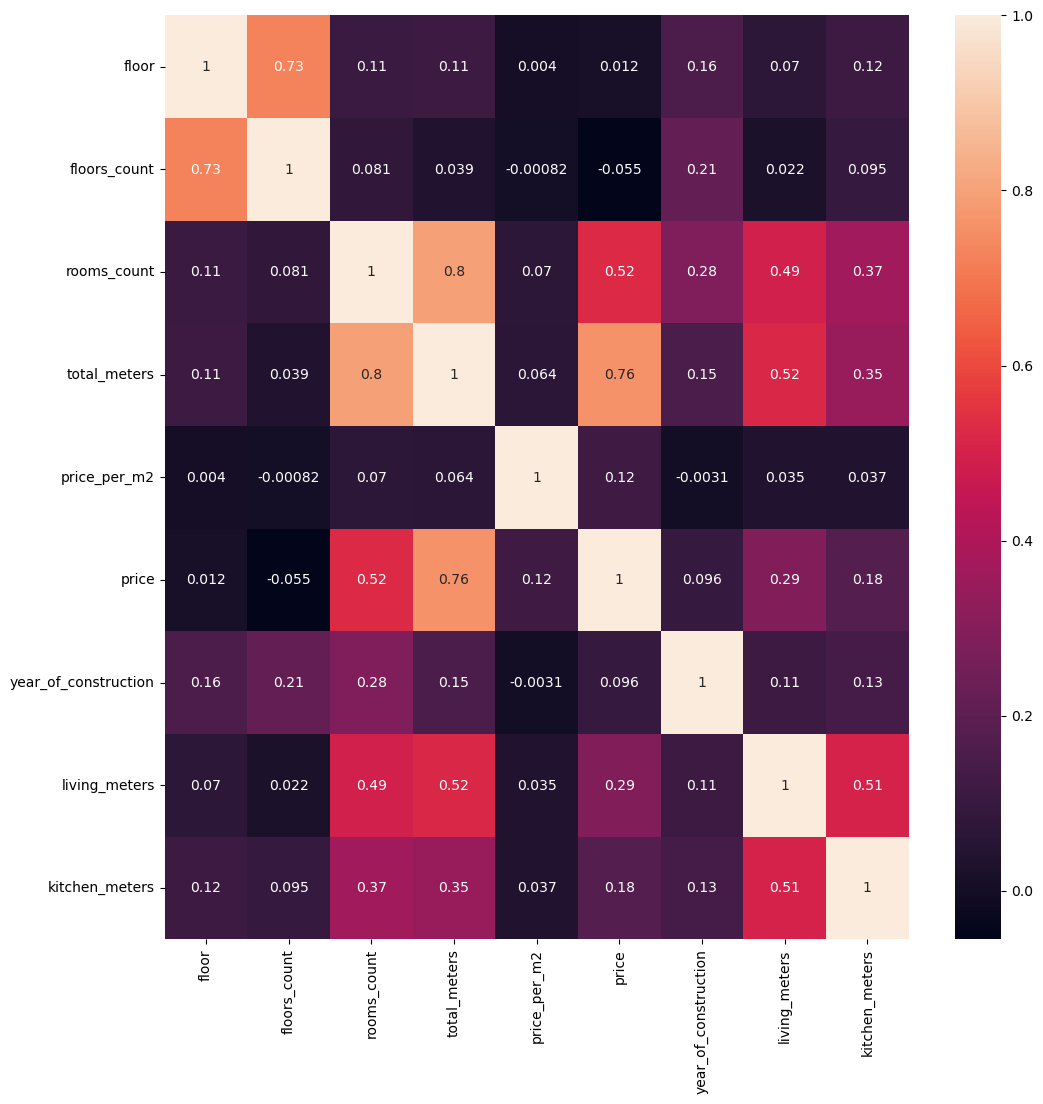

In [28]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.drop(columns = ['district','underground']).corr(),annot = True)

Смотрим на nan значения

<Axes: >

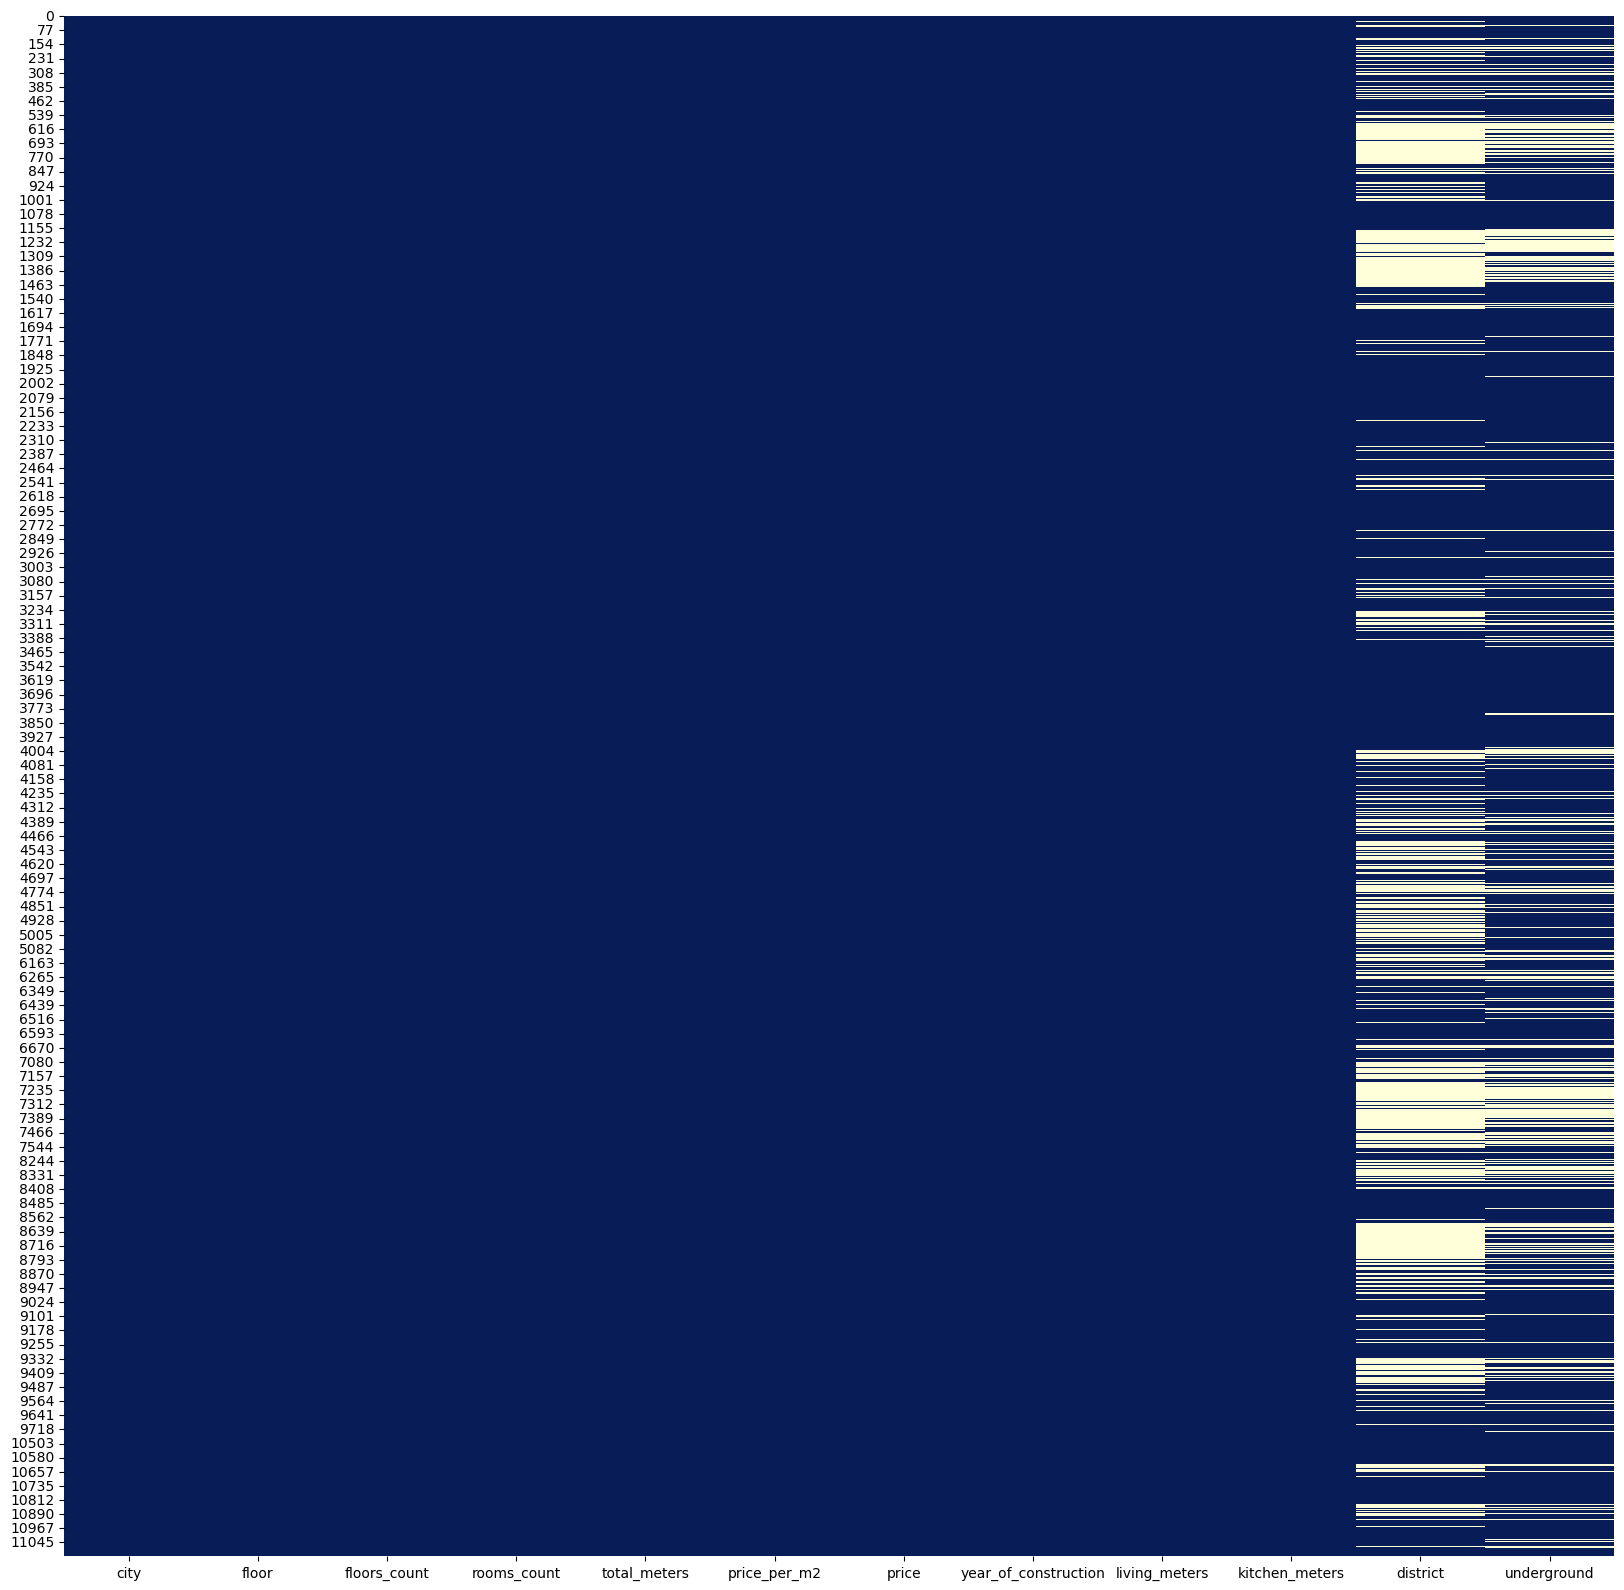

In [29]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

In [30]:
df_cop.isna().sum()/df.shape[0]*100

city                     0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
year_of_construction     0.000000
living_meters            0.000000
kitchen_meters           0.000000
district                32.785127
underground             19.628173
dtype: float64

In [31]:
df_cop.isna().sum()

city                       0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction       0
living_meters              0
kitchen_meters             0
district                2751
underground             1647
dtype: int64

In [32]:
df_cop = df_cop.fillna('unk')
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0      www      1             5            1         12.00        291666   
1      www     17            41            1         40.40        618811   
2      www      5            14            1         61.97        919799   
3      www      9            41            1         40.50        617283   
4      www     12            17            1         47.60        324579   
...    ...    ...           ...          ...           ...           ...   
11150  www     11            22            4        119.40        293132   
11287  www     11            17            4        172.63        434455   
11303  www     37            78            2         73.00        602739   
11304  www      3             5            2         42.00        892142   
11309  www      9            16            3        105.00        694761   

          price  year_of_construction  living_meters  kitchen_meters  \
0       3500000                    -1           -1.0            -1.0   
1      25000000                  2021           15.2             9.1   
2      57000000                  2022           -1.0            -1.0   
3      25000000                  2022           17.3             9.3   
4      15450000                  2019           -1.0            10.0   
...         ...                   ...            ...             ...   
11150  35000000                  2004           67.3            17.8   
11287  74999999                  2008           -1.0            -1.0   
11303  44000000                  2020           -1.0            -1.0   
11304  37470000                  2021           -1.0            -1.0   
11309  72950000                  2020           -1.0            -1.0   

                 district    underground  
0            Текстильщики       Волжская  
1             Хорошевский       Аэропорт  
2               Хамовники     Спортивная  
3             Хорошевский       Аэропорт  
4      Нагатино-Садовники    Коломенская  
...                   ...            ...  
11150         Обручевский      Тропарёво  
11287         Хорошевский           ЦСКА  
11303         Пресненский     Тестовская  
11304       Замоскворечье  Новокузнецкая  
11309         Пресненский    Выставочная  

[8391 rows x 12 columns]

In [33]:
df_cop.isna().sum()

city                    0
floor                   0
floors_count            0
rooms_count             0
total_meters            0
price_per_m2            0
price                   0
year_of_construction    0
living_meters           0
kitchen_meters          0
district                0
underground             0
dtype: int64

In [34]:
df_cop.dropna(inplace = True)
df_cop.reset_index(drop = True,inplace = True)
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0     www      1             5            1         12.00        291666   
1     www     17            41            1         40.40        618811   
2     www      5            14            1         61.97        919799   
3     www      9            41            1         40.50        617283   
4     www     12            17            1         47.60        324579   
...   ...    ...           ...          ...           ...           ...   
8386  www     11            22            4        119.40        293132   
8387  www     11            17            4        172.63        434455   
8388  www     37            78            2         73.00        602739   
8389  www      3             5            2         42.00        892142   
8390  www      9            16            3        105.00        694761   

         price  year_of_construction  living_meters  kitchen_meters  \
0      3500000                    -1           -1.0            -1.0   
1     25000000                  2021           15.2             9.1   
2     57000000                  2022           -1.0            -1.0   
3     25000000                  2022           17.3             9.3   
4     15450000                  2019           -1.0            10.0   
...        ...                   ...            ...             ...   
8386  35000000                  2004           67.3            17.8   
8387  74999999                  2008           -1.0            -1.0   
8388  44000000                  2020           -1.0            -1.0   
8389  37470000                  2021           -1.0            -1.0   
8390  72950000                  2020           -1.0            -1.0   

                district    underground  
0           Текстильщики       Волжская  
1            Хорошевский       Аэропорт  
2              Хамовники     Спортивная  
3            Хорошевский       Аэропорт  
4     Нагатино-Садовники    Коломенская  
...                  ...            ...  
8386         Обручевский      Тропарёво  
8387         Хорошевский           ЦСКА  
8388         Пресненский     Тестовская  
8389       Замоскворечье  Новокузнецкая  
8390         Пресненский    Выставочная  

[8391 rows x 12 columns]

In [35]:
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0     www      1             5            1         12.00        291666   
1     www     17            41            1         40.40        618811   
2     www      5            14            1         61.97        919799   
3     www      9            41            1         40.50        617283   
4     www     12            17            1         47.60        324579   
...   ...    ...           ...          ...           ...           ...   
8386  www     11            22            4        119.40        293132   
8387  www     11            17            4        172.63        434455   
8388  www     37            78            2         73.00        602739   
8389  www      3             5            2         42.00        892142   
8390  www      9            16            3        105.00        694761   

         price  year_of_construction  living_meters  kitchen_meters  \
0      3500000                    -1           -1.0            -1.0   
1     25000000                  2021           15.2             9.1   
2     57000000                  2022           -1.0            -1.0   
3     25000000                  2022           17.3             9.3   
4     15450000                  2019           -1.0            10.0   
...        ...                   ...            ...             ...   
8386  35000000                  2004           67.3            17.8   
8387  74999999                  2008           -1.0            -1.0   
8388  44000000                  2020           -1.0            -1.0   
8389  37470000                  2021           -1.0            -1.0   
8390  72950000                  2020           -1.0            -1.0   

                district    underground  
0           Текстильщики       Волжская  
1            Хорошевский       Аэропорт  
2              Хамовники     Спортивная  
3            Хорошевский       Аэропорт  
4     Нагатино-Садовники    Коломенская  
...                  ...            ...  
8386         Обручевский      Тропарёво  
8387         Хорошевский           ЦСКА  
8388         Пресненский     Тестовская  
8389       Замоскворечье  Новокузнецкая  
8390         Пресненский    Выставочная  

[8391 rows x 12 columns]

In [36]:
print('floor')
print(np.sort(df_cop['floor'].unique()))
print('floors_count')
print(np.sort(df_cop['floors_count'].unique()))
print('rooms_count')
print(np.sort(df_cop['rooms_count'].unique()))
print('total_meters')
print(np.sort(df_cop['total_meters'].unique()))
print('price_per_m2')
print(np.sort(df_cop['price_per_m2'].unique()))
print('year_of_construction')
print(np.sort(df_cop['year_of_construction'].unique()))
print('living_meters')
print(np.sort(df_cop['living_meters'].unique()))
print('kitchen_meters')
print(np.sort(df_cop['kitchen_meters'].unique()))

floor
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 61 62 63 66 67 75 78 79 92]
floors_count
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 63 64 65 67 69 73 75 76 77 78 79
 82 85 86 87 95]
rooms_count
[-1  1  2  3  4  5]
total_meters
[-1.0000e+00  1.0100e-01  1.2000e-01  7.5000e+00  8.7000e+00  1.0000e+01
  1.0300e+01  1.0400e+01  1.0500e+01  1.0600e+01  1.1000e+01  1.1100e+01
  1.1400e+01  1.1500e+01  1.1600e+01  1.1700e+01  1.1800e+01  1.1900e+01
  1.2000e+01  1.2100e+01  1.2300e+01  1.2400e+01  1.2500e+01  1.2600e+01
  1.2700e+01  1.2800e+01  1.3000e+01  1.3100e+01  1.3200e+01  1.3300e+01
  1.3400e+01  1.3500e+01  1.3600e+01  1.3700e+01  1.3800e+01  1.3900e+01
  1.4000e+01  1.4100e+01  1.4200e+01  1.4300e+01  1.44

# Выбросы

In [37]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = work_val.quantile(0.25)#np.percentile(work_val, 25, method= 'midpoint')
    Q3 = work_val.quantile(0.75)#np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:

            up,low = quantiles(df[col])
            df = df[~(df[col] < low) | (df[col] > up)]

    return df.reset_index(drop=True)

In [38]:
df.select_dtypes(include = [np.number]).columns

Index(['floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_m2',
       'price', 'year_of_construction', 'living_meters', 'kitchen_meters',
       'phone'],
      dtype='object')

In [39]:
df_cop = anti_emmi(df_cop)
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0     www     17            41            1         40.40        618811   
1     www      5            14            1         61.97        919799   
2     www      9            41            1         40.50        617283   
3     www     12            17            1         47.60        324579   
4     www      6            13            1         71.10        983122   
...   ...    ...           ...          ...           ...           ...   
7500  www     11            22            4        119.40        293132   
7501  www     11            17            4        172.63        434455   
7502  www     37            78            2         73.00        602739   
7503  www      3             5            2         42.00        892142   
7504  www      9            16            3        105.00        694761   

         price  year_of_construction  living_meters  kitchen_meters  \
0     25000000                  2021           15.2             9.1   
1     57000000                  2022           -1.0            -1.0   
2     25000000                  2022           17.3             9.3   
3     15450000                  2019           -1.0            10.0   
4     69900000                  2019           37.1            12.8   
...        ...                   ...            ...             ...   
7500  35000000                  2004           67.3            17.8   
7501  74999999                  2008           -1.0            -1.0   
7502  44000000                  2020           -1.0            -1.0   
7503  37470000                  2021           -1.0            -1.0   
7504  72950000                  2020           -1.0            -1.0   

                district    underground  
0            Хорошевский       Аэропорт  
1              Хамовники     Спортивная  
2            Хорошевский       Аэропорт  
3     Нагатино-Садовники    Коломенская  
4              Хамовники     Спортивная  
...                  ...            ...  
7500         Обручевский      Тропарёво  
7501         Хорошевский           ЦСКА  
7502         Пресненский     Тестовская  
7503       Замоскворечье  Новокузнецкая  
7504         Пресненский    Выставочная  

[7505 rows x 12 columns]

In [40]:
df_cop.columns

Index(['city', 'floor', 'floors_count', 'rooms_count', 'total_meters',
       'price_per_m2', 'price', 'year_of_construction', 'living_meters',
       'kitchen_meters', 'district', 'underground'],
      dtype='object')

In [41]:
for col in df_cop.drop(columns = ['district','underground','city']).columns:
    print(col)
    print(df_cop[df_cop[col]<0][col].unique())

floor
[-1]
floors_count
[-1]
rooms_count
[-1]
total_meters
[]
price_per_m2
[]
price
[]
year_of_construction
[]
living_meters
[-1.]
kitchen_meters
[-1.]


Если значение = -1 (тоесть отсутствует) оно заменяется на среднее по колонке

In [42]:
df_cop.columns[:-1]

Index(['city', 'floor', 'floors_count', 'rooms_count', 'total_meters',
       'price_per_m2', 'price', 'year_of_construction', 'living_meters',
       'kitchen_meters', 'district'],
      dtype='object')

## Заменяем значения с -1 средним по годам

In [43]:
# def meen_tot(total):
#     return round(((df_cop[(df_cop['total_meters'].round() == total) & (df_cop[col] > -1)][col].mean())),3)
# for col in ['living_meters','kitchen_meters']:
#     df_cop.loc[df_cop[col] < 0,col] = df_cop.loc[df_cop[col] < 0,'total_meters'].round().apply(meen_tot)

In [45]:
for col in df_cop.drop(columns = ['district','underground','city']).columns:
    df_cop = df_cop.drop(df_cop[df_cop[col] < 0].index)

In [46]:
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0     www     17            41            1          40.4        618811   
2     www      9            41            1          40.5        617283   
4     www      6            13            1          71.1        983122   
5     www     33            36            1          75.0        626666   
7     www      6            41            1          41.0        724390   
...   ...    ...           ...          ...           ...           ...   
7491  www     23            30            4         230.0        382608   
7493  www      9            79            2          62.1        668276   
7496  www     38            47            3         144.5        380622   
7498  www      7            14            4         144.9        441683   
7500  www     11            22            4         119.4        293132   

         price  year_of_construction  living_meters  kitchen_meters  \
0     25000000                  2021           15.2             9.1   
2     25000000                  2022           17.3             9.3   
4     69900000                  2019           37.1            12.8   
5     47000000                  2020           35.0            20.0   
7     29700000                  2022           24.0             6.0   
...        ...                   ...            ...             ...   
7491  88000000                  2001          140.0            24.0   
7493  41500000                  2020           46.8            10.0   
7496  55000000                  2006           96.3            11.7   
7498  64000000                  2000           85.0            16.0   
7500  35000000                  2004           67.3            17.8   

                  district    underground  
0              Хорошевский       Аэропорт  
2              Хорошевский       Аэропорт  
4                Хамовники     Спортивная  
5        Хорошево-Мневники       Шелепиха  
7              Хорошевский       Аэропорт  
...                    ...            ...  
7491  Проспект Вернадского    Новаторская  
7493           Пресненский  Деловой центр  
7496               Раменки        Минская  
7498         Замоскворечье     Павелецкая  
7500           Обручевский      Тропарёво  

[4989 rows x 12 columns]

In [82]:
# def meen_yer(year):
#     return round(df_cop[(df_cop['year_of_construction'] == year) & (df_cop[col] > -1)][col].mean(),2)
# for col in df_cop.columns[:-1]:
#     df_cop.loc[df_cop[col] < 0,col] = df_cop.loc[df_cop[col] < 0,'year_of_construction'].apply(meen_yer)

In [83]:
# def meen_room(num):
#     return round(df_cop[(df_cop['rooms_count'] == num)][col].mean(),2)
# col = 'kitchen_meters'
# kit_met = df_cop['rooms_count'].apply(meen_room)
# kit_met

## ______________________________________________

In [47]:
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0     www     17            41            1          40.4        618811   
2     www      9            41            1          40.5        617283   
4     www      6            13            1          71.1        983122   
5     www     33            36            1          75.0        626666   
7     www      6            41            1          41.0        724390   
...   ...    ...           ...          ...           ...           ...   
7491  www     23            30            4         230.0        382608   
7493  www      9            79            2          62.1        668276   
7496  www     38            47            3         144.5        380622   
7498  www      7            14            4         144.9        441683   
7500  www     11            22            4         119.4        293132   

         price  year_of_construction  living_meters  kitchen_meters  \
0     25000000                  2021           15.2             9.1   
2     25000000                  2022           17.3             9.3   
4     69900000                  2019           37.1            12.8   
5     47000000                  2020           35.0            20.0   
7     29700000                  2022           24.0             6.0   
...        ...                   ...            ...             ...   
7491  88000000                  2001          140.0            24.0   
7493  41500000                  2020           46.8            10.0   
7496  55000000                  2006           96.3            11.7   
7498  64000000                  2000           85.0            16.0   
7500  35000000                  2004           67.3            17.8   

                  district    underground  
0              Хорошевский       Аэропорт  
2              Хорошевский       Аэропорт  
4                Хамовники     Спортивная  
5        Хорошево-Мневники       Шелепиха  
7              Хорошевский       Аэропорт  
...                    ...            ...  
7491  Проспект Вернадского    Новаторская  
7493           Пресненский  Деловой центр  
7496               Раменки        Минская  
7498         Замоскворечье     Павелецкая  
7500           Обручевский      Тропарёво  

[4989 rows x 12 columns]

In [48]:
df_cop.describe()

floor  floors_count  rooms_count  total_meters  price_per_m2  \
count  4989.000000   4989.000000  4989.000000   4989.000000  4.989000e+03   
mean      8.714372     16.433754     2.612548     88.144145  4.124840e+05   
std       7.684668     10.664823     1.467781     69.796120  2.536938e+06   
min       1.000000      1.000000     1.000000      0.101000  3.958600e+04   
25%       3.000000      9.000000     1.000000     38.500000  1.854460e+05   
50%       6.000000     15.000000     2.000000     63.300000  2.858850e+05   
75%      12.000000     22.000000     4.000000    118.000000  4.416830e+05   
max      75.000000     95.000000     5.000000    885.000000  1.782178e+08   

              price  year_of_construction  living_meters  kitchen_meters  
count  4.989000e+03           4989.000000    4989.000000     4989.000000  
mean   4.472482e+07           2001.467428      52.364121       13.100742  
std    8.038218e+07             26.056743      44.614680        8.325094  
min    1.550000e+06           1910.000000       3.000000        1.000000  
25%    8.100000e+06           1993.000000      19.000000        8.000000  
50%    1.650000e+07           2013.000000      36.000000       10.800000  
75%    4.700000e+07           2020.000000      72.000000       16.000000  
max    1.650000e+09           2025.000000     680.000000       99.000000

In [49]:
df_cop[df_cop['district'] == 'безопасный экологически чистый место вокруг поле лес расстояние береговой зона москва река м инфраструктура мка шихов магазин магнит м']

Empty DataFrame
Columns: [city, floor, floors_count, rooms_count, total_meters, price_per_m2, price, year_of_construction, living_meters, kitchen_meters, district, underground]
Index: []

In [50]:
df_cop = df_cop.drop(df_cop[df_cop['total_meters']<13].index)
df_cop = df_cop.drop(df_cop[(df_cop['living_meters'] + df_cop['kitchen_meters'])>df_cop['total_meters']].index)
df_cop.describe()

floor  floors_count  rooms_count  total_meters  price_per_m2  \
count  4976.000000   4976.000000  4976.000000   4976.000000  4.976000e+03   
mean      8.723674     16.444936     2.615756     88.343497  3.767041e+05   
std       7.690248     10.671080     1.467869     69.777710  3.110868e+05   
min       1.000000      1.000000     1.000000     13.800000  3.958600e+04   
25%       3.000000      9.000000     1.000000     38.700000  1.851438e+05   
50%       6.000000     15.000000     2.000000     63.550000  2.856170e+05   
75%      12.000000     22.000000     4.000000    118.000000  4.416830e+05   
max      75.000000     95.000000     5.000000    885.000000  4.583333e+06   

              price  year_of_construction  living_meters  kitchen_meters  
count  4.976000e+03           4976.000000    4976.000000     4976.000000  
mean   4.482361e+07           2001.447548      52.465756       13.118911  
std    8.046341e+07             26.059971      44.619825        8.322060  
min    1.550000e+06           1910.000000       5.000000        2.000000  
25%    8.100000e+06           1993.000000      19.000000        8.000000  
50%    1.657500e+07           2013.000000      36.050000       10.800000  
75%    4.700000e+07           2020.000000      72.000000       16.000000  
max    1.650000e+09           2025.000000     680.000000       99.000000

<Axes: >

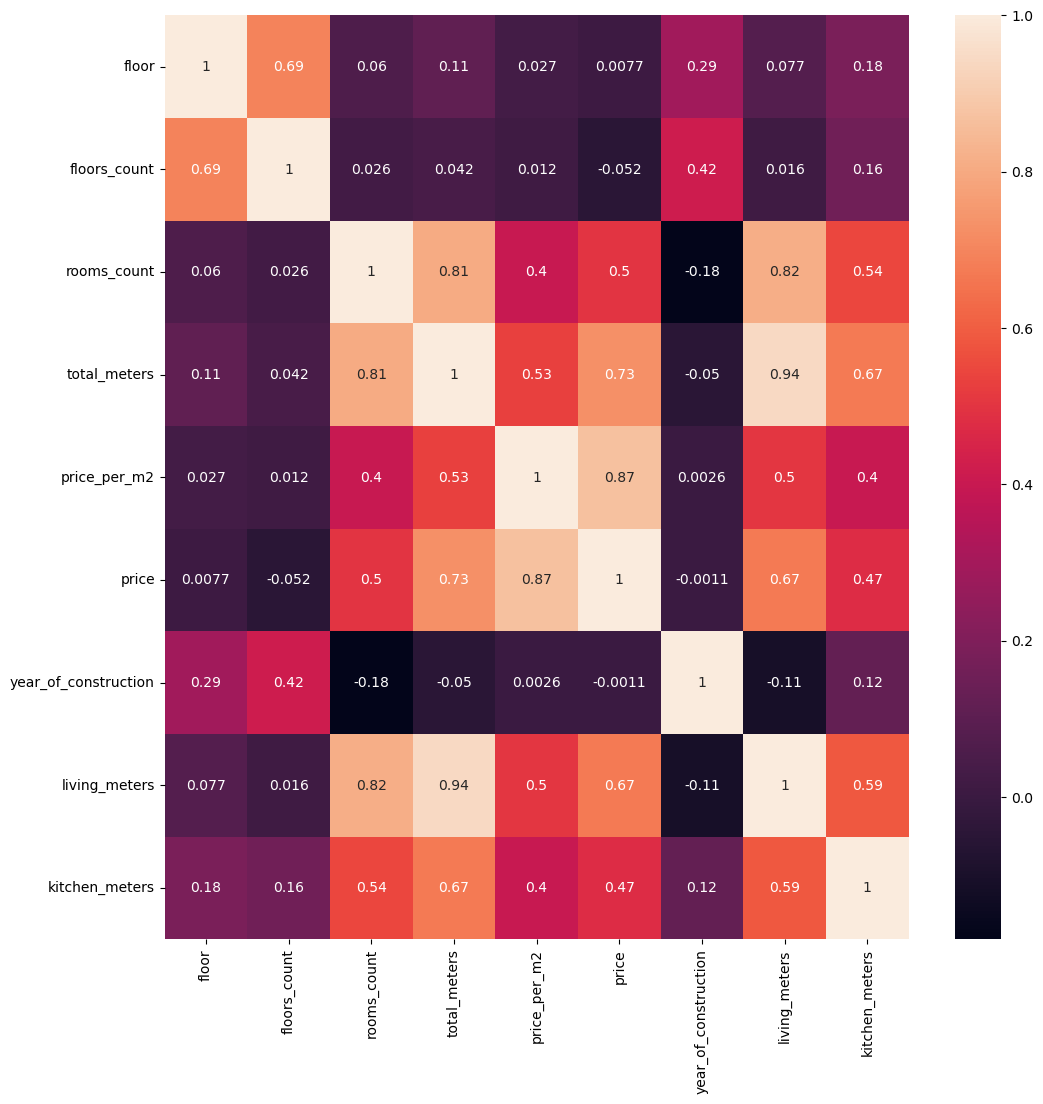

In [51]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.drop(columns = ['district','underground','city']).corr(),annot = True)

In [52]:
df_cop.shape

(4976, 12)

In [53]:
for col in df_cop.drop(columns = ['district','underground','city']).columns:
    print(col)
    print(df_cop[df_cop[col]<0][col].unique())

floor
[]
floors_count
[]
rooms_count
[]
total_meters
[]
price_per_m2
[]
price
[]
year_of_construction
[]
living_meters
[]
kitchen_meters
[]


In [54]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 7500
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  4976 non-null   object 
 1   floor                 4976 non-null   int64  
 2   floors_count          4976 non-null   int64  
 3   rooms_count           4976 non-null   int64  
 4   total_meters          4976 non-null   float64
 5   price_per_m2          4976 non-null   int64  
 6   price                 4976 non-null   int64  
 7   year_of_construction  4976 non-null   int64  
 8   living_meters         4976 non-null   float64
 9   kitchen_meters        4976 non-null   float64
 10  district              4976 non-null   object 
 11  underground           4976 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 505.4+ KB


In [55]:
df_cop.dropna(inplace = True)
df_cop.reset_index(drop = True,inplace = True)
df_cop

city  floor  floors_count  rooms_count  total_meters  price_per_m2  \
0     www     17            41            1          40.4        618811   
1     www      9            41            1          40.5        617283   
2     www      6            13            1          71.1        983122   
3     www     33            36            1          75.0        626666   
4     www      6            41            1          41.0        724390   
...   ...    ...           ...          ...           ...           ...   
4971  www     23            30            4         230.0        382608   
4972  www      9            79            2          62.1        668276   
4973  www     38            47            3         144.5        380622   
4974  www      7            14            4         144.9        441683   
4975  www     11            22            4         119.4        293132   

         price  year_of_construction  living_meters  kitchen_meters  \
0     25000000                  2021           15.2             9.1   
1     25000000                  2022           17.3             9.3   
2     69900000                  2019           37.1            12.8   
3     47000000                  2020           35.0            20.0   
4     29700000                  2022           24.0             6.0   
...        ...                   ...            ...             ...   
4971  88000000                  2001          140.0            24.0   
4972  41500000                  2020           46.8            10.0   
4973  55000000                  2006           96.3            11.7   
4974  64000000                  2000           85.0            16.0   
4975  35000000                  2004           67.3            17.8   

                  district    underground  
0              Хорошевский       Аэропорт  
1              Хорошевский       Аэропорт  
2                Хамовники     Спортивная  
3        Хорошево-Мневники       Шелепиха  
4              Хорошевский       Аэропорт  
...                    ...            ...  
4971  Проспект Вернадского    Новаторская  
4972           Пресненский  Деловой центр  
4973               Раменки        Минская  
4974         Замоскворечье     Павелецкая  
4975           Обручевский      Тропарёво  

[4976 rows x 12 columns]

In [56]:
df_cop = pd.concat([df_cop[['city','district','underground']],df_cop.drop(columns = ['city','district','underground'])],axis = 1)
df_cop

city              district    underground  floor  floors_count  \
0     www           Хорошевский       Аэропорт     17            41   
1     www           Хорошевский       Аэропорт      9            41   
2     www             Хамовники     Спортивная      6            13   
3     www     Хорошево-Мневники       Шелепиха     33            36   
4     www           Хорошевский       Аэропорт      6            41   
...   ...                   ...            ...    ...           ...   
4971  www  Проспект Вернадского    Новаторская     23            30   
4972  www           Пресненский  Деловой центр      9            79   
4973  www               Раменки        Минская     38            47   
4974  www         Замоскворечье     Павелецкая      7            14   
4975  www           Обручевский      Тропарёво     11            22   

      rooms_count  total_meters  price_per_m2     price  year_of_construction  \
0               1          40.4        618811  25000000                  2021   
1               1          40.5        617283  25000000                  2022   
2               1          71.1        983122  69900000                  2019   
3               1          75.0        626666  47000000                  2020   
4               1          41.0        724390  29700000                  2022   
...           ...           ...           ...       ...                   ...   
4971            4         230.0        382608  88000000                  2001   
4972            2          62.1        668276  41500000                  2020   
4973            3         144.5        380622  55000000                  2006   
4974            4         144.9        441683  64000000                  2000   
4975            4         119.4        293132  35000000                  2004   

      living_meters  kitchen_meters  
0              15.2             9.1  
1              17.3             9.3  
2              37.1            12.8  
3              35.0            20.0  
4              24.0             6.0  
...             ...             ...  
4971          140.0            24.0  
4972           46.8            10.0  
4973           96.3            11.7  
4974           85.0            16.0  
4975           67.3            17.8  

[4976 rows x 12 columns]

In [57]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  4976 non-null   object 
 1   district              4976 non-null   object 
 2   underground           4976 non-null   object 
 3   floor                 4976 non-null   int64  
 4   floors_count          4976 non-null   int64  
 5   rooms_count           4976 non-null   int64  
 6   total_meters          4976 non-null   float64
 7   price_per_m2          4976 non-null   int64  
 8   price                 4976 non-null   int64  
 9   year_of_construction  4976 non-null   int64  
 10  living_meters         4976 non-null   float64
 11  kitchen_meters        4976 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 466.6+ KB


In [58]:
def max_word(strin):
    print(strin)
    if len(strin)>25:
        return ''
    else:
        return strin
df_cop.drop(df_cop[df_cop['district'].apply(max_word) == ''].index,inplace = True)
df_cop.drop(df_cop[df_cop['district'] == ''].index,inplace = True)

Хорошевский
Хорошевский
Хамовники
Хорошево-Мневники
Хорошевский
Зюзино
Останкинский
Даниловский
Северное Медведково
Северное Измайлово
Бабушкинский
Очаково-Матвеевское
unk
unk
Даниловский
Митино
Некрасовка
Хорошево-Мневники
Хорошево-Мневники
Лефортово
Тимирязевский
Свиблово
unk
Тимирязевский
unk
Лефортово
unk
unk
unk
unk
unk
Южнопортовый
Можайский
unk
Нижегородский
Зюзино
Тверской
Свиблово
unk
Дорогомилово
unk
Бирюлево Восточное
unk
Северное Измайлово
unk
Бирюлево Восточное
Марьина роща
unk
Орехово-Борисово Северное
Пресненский
unk
Чертаново Северное
unk
unk
Алексеевский
unk
unk
Раменки
Южное Бутово
Басманный
Ховрино
unk
Богородское
Ломоносовский
Нагатинский затон
Москворечье-Сабурово
unk
Останкинский
Даниловский
Южное Тушино
Текстильщики
Тимирязевский
unk
unk
unk
Куркино
Царицыно
Ярославский
Пресненский
unk
unk
unk
Останкинский
unk
unk
unk
Бирюлево Восточное
unk
unk
Раменки
unk
unk
Можайский
unk
Ясенево
unk
Замоскворечье
Бутырский
unk
Красносельский
unk
Замоскворечье
unk
Пресненский
П

In [59]:
def ung(place):
    if place.find(' ') > 0:
        return place[:(place.find(' ')+1)]
    return place
df_cop['underground'] = df_cop['underground'].apply(ung)

# Добавка(r2 поднимает mae увеличивает :))

In [60]:
# df_cop = df_cop.append(pd.read_csv(r"C:\Users\nicka\OneDrive\Рабочий стол\himki.csv",index_col = 0))
# df_cop.reset_index(drop = True,inplace = True)
# df_cop

In [65]:
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]

            tokens.append(token)
    #if len(tokens) > 2:
    return tokens
    #return None

df_cop['district'] = df_cop['district'].apply(lemmatize)
df_cop['underground'] = df_cop['underground'].apply(lemmatize)

In [66]:
def concat(text):
    text= ' '.join(text)
    return text

df_cop['district'] = df_cop['district'].apply(concat)
df_cop['underground'] = df_cop['underground'].apply(concat)

In [67]:
df_cop

city             district  underground  floor  floors_count  rooms_count  \
0     www          хорошевский     аэропорт     17            41            1   
1     www          хорошевский     аэропорт      9            41            1   
2     www             хамовник   спортивный      6            13            1   
3     www    хорошево мнёвники     шелепиха     33            36            1   
4     www          хорошевский     аэропорт      6            41            1   
...   ...                  ...          ...    ...           ...          ...   
4971  www  проспект вернадский  новаторский     23            30            4   
4972  www          пресненский      деловой      9            79            2   
4973  www              раменки      минский     38            47            3   
4974  www        замоскворечье   павелецкий      7            14            4   
4975  www          обручевский    тропарёво     11            22            4   

      total_meters  price_per_m2     price  year_of_construction  \
0             40.4        618811  25000000                  2021   
1             40.5        617283  25000000                  2022   
2             71.1        983122  69900000                  2019   
3             75.0        626666  47000000                  2020   
4             41.0        724390  29700000                  2022   
...            ...           ...       ...                   ...   
4971         230.0        382608  88000000                  2001   
4972          62.1        668276  41500000                  2020   
4973         144.5        380622  55000000                  2006   
4974         144.9        441683  64000000                  2000   
4975         119.4        293132  35000000                  2004   

      living_meters  kitchen_meters  
0              15.2             9.1  
1              17.3             9.3  
2              37.1            12.8  
3              35.0            20.0  
4              24.0             6.0  
...             ...             ...  
4971          140.0            24.0  
4972           46.8            10.0  
4973           96.3            11.7  
4974           85.0            16.0  
4975           67.3            17.8  

[4973 rows x 12 columns]

In [68]:
df_cop['city'].unique()

array(['www', 'lyubertsy', 'balashikha', 'khimki', 'kotelniki', 'vidnoye',
       'dolgoprudny', 'krasnogorsk', 'domodedovo', 'naro-fominsk',
       'odintsovo', 'ivanteyevka', 'ramenskoye', 'solnechnogorsk',
       'istra', 'mytishchi', 'zvenigorod', 'dmitrov', 'aprelevka',
       'podolsk', 'korolev', 'dzerzhinsky', 'shchyolkovo', 'klin',
       'zhukovsky', 'losino-petrovskiy', 'kolomna', 'fryazino',
       'staraya-kupavna', 'lytkarino', 'chekhov', 'roshal', 'taldom',
       'noginsk', 'serpukhov', 'ruza', 'reutov', 'lobnya',
       'sergiyev-posad', 'pushkino', 'dubna', 'kashira', 'yegoryevsk',
       'likino-dulyovo', 'stupino', 'voskresensk', 'elektrostal',
       'dedovsk', 'yakhroma', 'volokolamsk', 'khotkovo', 'bronnicy'],
      dtype=object)

In [69]:
len(df_cop['city'].unique())

52

In [70]:
len(df_cop['district'].unique())

132

In [71]:
len(df_cop['underground'].unique())

260

In [72]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4975
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  4973 non-null   object 
 1   district              4973 non-null   object 
 2   underground           4973 non-null   object 
 3   floor                 4973 non-null   int64  
 4   floors_count          4973 non-null   int64  
 5   rooms_count           4973 non-null   int64  
 6   total_meters          4973 non-null   float64
 7   price_per_m2          4973 non-null   int64  
 8   price                 4973 non-null   int64  
 9   year_of_construction  4973 non-null   int64  
 10  living_meters         4973 non-null   float64
 11  kitchen_meters        4973 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 505.1+ KB


In [73]:
df_cop

city             district  underground  floor  floors_count  rooms_count  \
0     www          хорошевский     аэропорт     17            41            1   
1     www          хорошевский     аэропорт      9            41            1   
2     www             хамовник   спортивный      6            13            1   
3     www    хорошево мнёвники     шелепиха     33            36            1   
4     www          хорошевский     аэропорт      6            41            1   
...   ...                  ...          ...    ...           ...          ...   
4971  www  проспект вернадский  новаторский     23            30            4   
4972  www          пресненский      деловой      9            79            2   
4973  www              раменки      минский     38            47            3   
4974  www        замоскворечье   павелецкий      7            14            4   
4975  www          обручевский    тропарёво     11            22            4   

      total_meters  price_per_m2     price  year_of_construction  \
0             40.4        618811  25000000                  2021   
1             40.5        617283  25000000                  2022   
2             71.1        983122  69900000                  2019   
3             75.0        626666  47000000                  2020   
4             41.0        724390  29700000                  2022   
...            ...           ...       ...                   ...   
4971         230.0        382608  88000000                  2001   
4972          62.1        668276  41500000                  2020   
4973         144.5        380622  55000000                  2006   
4974         144.9        441683  64000000                  2000   
4975         119.4        293132  35000000                  2004   

      living_meters  kitchen_meters  
0              15.2             9.1  
1              17.3             9.3  
2              37.1            12.8  
3              35.0            20.0  
4              24.0             6.0  
...             ...             ...  
4971          140.0            24.0  
4972           46.8            10.0  
4973           96.3            11.7  
4974           85.0            16.0  
4975           67.3            17.8  

[4973 rows x 12 columns]

In [74]:
from sklearn import preprocessing
import joblib
le = preprocessing.LabelEncoder()
#df_cop.iloc[:, [0,1,2]] = df_cop.iloc[:, [0,1,2]].apply(le.fit_transform)
df_cop.iloc[:, [0]] = df_cop.iloc[:, [0]].apply(le.fit_transform)
print(le.classes_)
joblib.dump(le, 'label_encoder_city.joblib')
df_cop.iloc[:, [1]] = df_cop.iloc[:, [1]].apply(le.fit_transform)
print(le.classes_)
joblib.dump(le, 'label_encoder_district.joblib')
df_cop.iloc[:, [2]] = df_cop.iloc[:, [2]].apply(le.fit_transform)
print(le.classes_)
joblib.dump(le, 'label_encoder_underground.joblib')



['aprelevka' 'balashikha' 'bronnicy' 'chekhov' 'dedovsk' 'dmitrov'
 'dolgoprudny' 'domodedovo' 'dubna' 'dzerzhinsky' 'elektrostal' 'fryazino'
 'istra' 'ivanteyevka' 'kashira' 'khimki' 'khotkovo' 'klin' 'kolomna'
 'korolev' 'kotelniki' 'krasnogorsk' 'likino-dulyovo' 'lobnya'
 'losino-petrovskiy' 'lytkarino' 'lyubertsy' 'mytishchi' 'naro-fominsk'
 'noginsk' 'odintsovo' 'podolsk' 'pushkino' 'ramenskoye' 'reutov' 'roshal'
 'ruza' 'sergiyev-posad' 'serpukhov' 'shchyolkovo' 'solnechnogorsk'
 'staraya-kupavna' 'stupino' 'taldom' 'vidnoye' 'volokolamsk'
 'voskresensk' 'www' 'yakhroma' 'yegoryevsk' 'zhukovsky' 'zvenigorod']
['unk' 'академический' 'алексеевский' 'алтуфьевский' 'арбат' 'аэропорт'
 'бабушкинский' 'басманный' 'бегов' 'бескудниковский' 'бибирево'
 'бирюлёво восточный' 'бирюлёво западный' 'богородский' 'братеево'
 'бутырский' 'вешняк' 'внуково' 'войковский' 'воскресенский' 'восточный'
 'восточный дегунино' 'восточный измайлово' 'выхино жулебино'
 'гагаринский' 'головинский' 'гольянов

['label_encoder_underground.joblib']

In [75]:
np.sort(df_cop['city'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

In [76]:
np.sort(df_cop['district'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131])

In [77]:
np.sort(df_cop['underground'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

# Модели!!!!!!!!!!!!!!!!!!!!!!!!!

<Axes: >

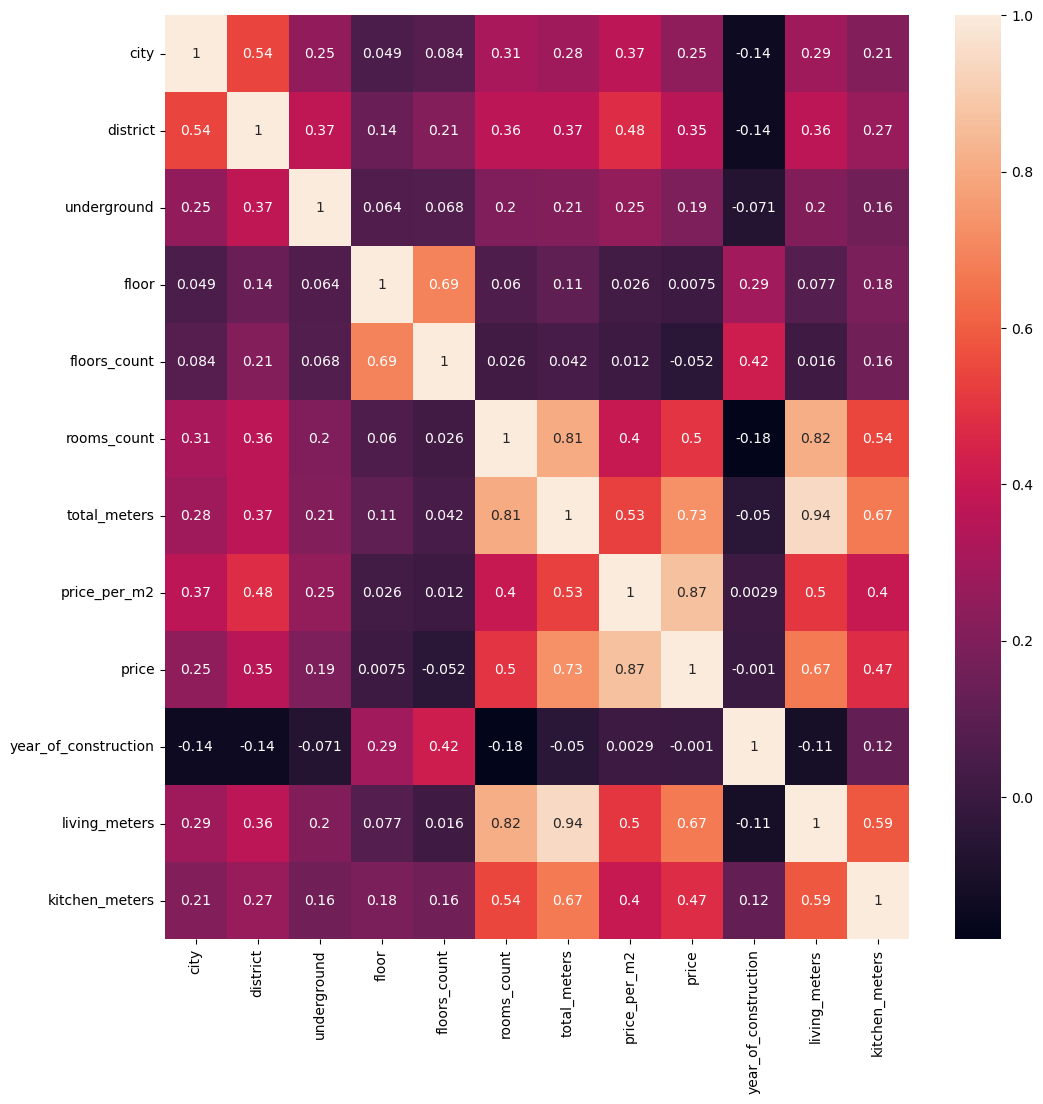

In [112]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.corr(),annot = True) # ,'price'

In [113]:
df_cop.columns

Index(['city', 'district', 'underground', 'floor', 'floors_count',
       'rooms_count', 'total_meters', 'price_per_m2', 'price',
       'year_of_construction', 'living_meters', 'kitchen_meters'],
      dtype='object')

# Тесты (или смерть разума)

# import joblib
# joblib.dump(fit_model_price_m2, "price_m2_5.joblib")

# Начало....

# Years

In [77]:
df_cop.drop(columns = ['price','total_meters','price_per_m2','year_of_construction','living_meters','kitchen_meters'])

city  district  underground  floor  floors_count  rooms_count
0       47       117           14     17            41            1
1       47       117           14      9            41            1
2       47       114          203      6            13            1
3       47       116          247     33            36            1
4       47       117           14      6            41            1
...    ...       ...          ...    ...           ...          ...
4971    47        84          130     23            30            4
4972    47        83           53      9            79            2
4973    47        86          116     38            47            3
4974    47        32          151      7            14            4
4975    47        73          220     11            22            4

[4973 rows x 6 columns]

In [78]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','year_of_construction','living_meters','kitchen_meters'])
y = df_cop['year_of_construction']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [79]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(criterion= 'friedman_mse', max_depth= 20, max_leaf_nodes= None)
rand.fit(X_train,y_train)
print(mean_absolute_error(y_test, rand.predict(X_test)))
print(r2_score(y_test, rand.predict(X_test)))


KeyboardInterrupt



In [ ]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

In [ ]:
import joblib
joblib.dump(rand, "years_of_const.joblib")

# Living meters

In [ ]:
df_cop.drop(columns = ['price','total_meters','price_per_m2','living_meters','kitchen_meters'])

In [ ]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','living_meters','kitchen_meters'])
y = df_cop['living_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(criterion= 'friedman_mse', max_depth= 20, max_leaf_nodes= None)
rand.fit(X_train,y_train)
print(mean_absolute_error(y_test, rand.predict(X_test)))
print(r2_score(y_test, rand.predict(X_test)))

In [ ]:
model = CatBoostRegressor(learning_rate=0.1, depth=6,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

In [ ]:
import joblib
joblib.dump(fit_model_price_m2, "living_metr.joblib")

# Kitchen_meters

In [ ]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','kitchen_meters'])
y = df_cop['kitchen_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand = RandomForestRegressor(criterion= 'friedman_mse', max_depth= 20, max_leaf_nodes= None)
rand.fit(X_train,y_train)
print(mean_absolute_error(y_test, rand.predict(X_test)))
print(r2_score(y_test, rand.predict(X_test)))

3.8586939363876525
0.4704028955349261


In [ ]:
model = CatBoostRegressor(learning_rate=0.1, depth=5,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 5.3951985	total: 1.83ms	remaining: 1.83s
1:	learn: 5.1786362	total: 3.56ms	remaining: 1.78s
2:	learn: 4.9782282	total: 4.94ms	remaining: 1.64s
3:	learn: 4.8061613	total: 6.57ms	remaining: 1.64s
4:	learn: 4.6591570	total: 8.09ms	remaining: 1.61s
5:	learn: 4.5512536	total: 9.51ms	remaining: 1.57s
6:	learn: 4.4561757	total: 10.8ms	remaining: 1.53s
7:	learn: 4.3823188	total: 12.3ms	remaining: 1.53s
8:	learn: 4.3157944	total: 13.7ms	remaining: 1.51s
9:	learn: 4.2701075	total: 15.4ms	remaining: 1.52s
10:	learn: 4.2156505	total: 16.9ms	remaining: 1.52s
11:	learn: 4.1750168	total: 18.2ms	remaining: 1.5s
12:	learn: 4.1346764	total: 19.6ms	remaining: 1.49s
13:	learn: 4.0988450	total: 21.3ms	remaining: 1.5s
14:	learn: 4.0644129	total: 22.9ms	remaining: 1.5s
15:	learn: 4.0204694	total: 24.6ms	remaining: 1.51s
16:	learn: 3.9884392	total: 26.8ms	remaining: 1.55s
17:	learn: 3.9592896	total: 28.1ms	remaining: 1.53s
18:	learn: 3.9411107	total: 29.5ms	remaining: 1.52s
19:	learn: 3.9317446	tota

159:	learn: 3.3671812	total: 197ms	remaining: 1.03s
160:	learn: 3.3611459	total: 198ms	remaining: 1.03s
161:	learn: 3.3573526	total: 199ms	remaining: 1.03s
162:	learn: 3.3562864	total: 201ms	remaining: 1.03s
163:	learn: 3.3543595	total: 202ms	remaining: 1.03s
164:	learn: 3.3536321	total: 203ms	remaining: 1.03s
165:	learn: 3.3520395	total: 204ms	remaining: 1.03s
166:	learn: 3.3505208	total: 205ms	remaining: 1.02s
167:	learn: 3.3479633	total: 207ms	remaining: 1.02s
168:	learn: 3.3467753	total: 208ms	remaining: 1.02s
169:	learn: 3.3450201	total: 209ms	remaining: 1.02s
170:	learn: 3.3417736	total: 211ms	remaining: 1.02s
171:	learn: 3.3397641	total: 212ms	remaining: 1.02s
172:	learn: 3.3377610	total: 214ms	remaining: 1.02s
173:	learn: 3.3341575	total: 216ms	remaining: 1.02s
174:	learn: 3.3325350	total: 217ms	remaining: 1.02s
175:	learn: 3.3321115	total: 218ms	remaining: 1.02s
176:	learn: 3.3308251	total: 220ms	remaining: 1.02s
177:	learn: 3.3281483	total: 221ms	remaining: 1.02s
178:	learn: 

318:	learn: 3.1107796	total: 388ms	remaining: 828ms
319:	learn: 3.1104282	total: 389ms	remaining: 827ms
320:	learn: 3.1100562	total: 390ms	remaining: 826ms
321:	learn: 3.1075255	total: 392ms	remaining: 825ms
322:	learn: 3.1064523	total: 393ms	remaining: 824ms
323:	learn: 3.1055960	total: 394ms	remaining: 823ms
324:	learn: 3.1042736	total: 396ms	remaining: 822ms
325:	learn: 3.1034939	total: 397ms	remaining: 821ms
326:	learn: 3.1026972	total: 398ms	remaining: 820ms
327:	learn: 3.1017694	total: 400ms	remaining: 819ms
328:	learn: 3.1013633	total: 401ms	remaining: 818ms
329:	learn: 3.1009139	total: 403ms	remaining: 817ms
330:	learn: 3.0996834	total: 404ms	remaining: 816ms
331:	learn: 3.0994598	total: 405ms	remaining: 815ms
332:	learn: 3.0989583	total: 406ms	remaining: 814ms
333:	learn: 3.0968201	total: 408ms	remaining: 814ms
334:	learn: 3.0956669	total: 410ms	remaining: 813ms
335:	learn: 3.0948998	total: 412ms	remaining: 814ms
336:	learn: 3.0918004	total: 413ms	remaining: 813ms
337:	learn: 

600:	learn: 2.8667966	total: 769ms	remaining: 511ms
601:	learn: 2.8667693	total: 771ms	remaining: 510ms
602:	learn: 2.8664642	total: 773ms	remaining: 509ms
603:	learn: 2.8659486	total: 774ms	remaining: 508ms
604:	learn: 2.8656131	total: 776ms	remaining: 507ms
605:	learn: 2.8651877	total: 777ms	remaining: 505ms
606:	learn: 2.8648813	total: 779ms	remaining: 504ms
607:	learn: 2.8645943	total: 781ms	remaining: 503ms
608:	learn: 2.8636581	total: 782ms	remaining: 502ms
609:	learn: 2.8635993	total: 783ms	remaining: 501ms
610:	learn: 2.8632169	total: 785ms	remaining: 500ms
611:	learn: 2.8624347	total: 786ms	remaining: 498ms
612:	learn: 2.8620089	total: 787ms	remaining: 497ms
613:	learn: 2.8610477	total: 789ms	remaining: 496ms
614:	learn: 2.8608818	total: 790ms	remaining: 495ms
615:	learn: 2.8606096	total: 792ms	remaining: 493ms
616:	learn: 2.8601362	total: 793ms	remaining: 492ms
617:	learn: 2.8597296	total: 795ms	remaining: 491ms
618:	learn: 2.8594744	total: 796ms	remaining: 490ms
619:	learn: 

877:	learn: 2.7137221	total: 1.15s	remaining: 160ms
878:	learn: 2.7134515	total: 1.15s	remaining: 159ms
879:	learn: 2.7130088	total: 1.15s	remaining: 157ms
880:	learn: 2.7118894	total: 1.15s	remaining: 156ms
881:	learn: 2.7115298	total: 1.16s	remaining: 155ms
882:	learn: 2.7111001	total: 1.16s	remaining: 153ms
883:	learn: 2.7105188	total: 1.16s	remaining: 152ms
884:	learn: 2.7103673	total: 1.16s	remaining: 151ms
885:	learn: 2.7101118	total: 1.16s	remaining: 149ms
886:	learn: 2.7095756	total: 1.16s	remaining: 148ms
887:	learn: 2.7094089	total: 1.16s	remaining: 147ms
888:	learn: 2.7077643	total: 1.16s	remaining: 145ms
889:	learn: 2.7067715	total: 1.17s	remaining: 144ms
890:	learn: 2.7067420	total: 1.17s	remaining: 143ms
891:	learn: 2.7066380	total: 1.17s	remaining: 141ms
892:	learn: 2.7059927	total: 1.17s	remaining: 140ms
893:	learn: 2.7051381	total: 1.17s	remaining: 139ms
894:	learn: 2.7048517	total: 1.17s	remaining: 138ms
895:	learn: 2.7036510	total: 1.17s	remaining: 136ms
896:	learn: 

In [ ]:
import joblib
joblib.dump(fit_model_price_m2, "kitchen_metr.joblib")

['kitchen_metr.joblib']

# Total meters

In [ ]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2'])
y = df_cop['total_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 45.1946585	total: 2.57ms	remaining: 2.56s
1:	learn: 41.2680611	total: 5.22ms	remaining: 2.61s
2:	learn: 38.2482059	total: 7.37ms	remaining: 2.45s
3:	learn: 35.1218555	total: 9.59ms	remaining: 2.39s
4:	learn: 32.3978537	total: 11.9ms	remaining: 2.37s
5:	learn: 30.2399440	total: 14.4ms	remaining: 2.38s
6:	learn: 28.0930335	total: 16ms	remaining: 2.27s
7:	learn: 26.3127560	total: 18.2ms	remaining: 2.26s
8:	learn: 24.5877801	total: 20.4ms	remaining: 2.25s
9:	learn: 23.0548775	total: 22.8ms	remaining: 2.26s
10:	learn: 21.4705817	total: 25.1ms	remaining: 2.26s
11:	learn: 20.1022989	total: 27.4ms	remaining: 2.25s
12:	learn: 18.8210359	total: 30.3ms	remaining: 2.3s
13:	learn: 18.0709176	total: 33.9ms	remaining: 2.39s
14:	learn: 17.1118728	total: 36.7ms	remaining: 2.41s
15:	learn: 16.3910233	total: 40.5ms	remaining: 2.49s
16:	learn: 15.6237219	total: 42.6ms	remaining: 2.46s
17:	learn: 15.1467994	total: 43.9ms	remaining: 2.39s
18:	learn: 14.5543662	total: 46ms	remaining: 2.37s
19:	lear

178:	learn: 6.8769274	total: 390ms	remaining: 1.79s
179:	learn: 6.8723543	total: 392ms	remaining: 1.79s
180:	learn: 6.8604860	total: 394ms	remaining: 1.78s
181:	learn: 6.8543069	total: 397ms	remaining: 1.78s
182:	learn: 6.8375172	total: 399ms	remaining: 1.78s
183:	learn: 6.8191108	total: 401ms	remaining: 1.78s
184:	learn: 6.8076263	total: 403ms	remaining: 1.78s
185:	learn: 6.7966558	total: 406ms	remaining: 1.77s
186:	learn: 6.7903635	total: 408ms	remaining: 1.77s
187:	learn: 6.7811212	total: 410ms	remaining: 1.77s
188:	learn: 6.7777488	total: 413ms	remaining: 1.77s
189:	learn: 6.7601635	total: 415ms	remaining: 1.77s
190:	learn: 6.7541026	total: 418ms	remaining: 1.77s
191:	learn: 6.7408546	total: 422ms	remaining: 1.77s
192:	learn: 6.7359067	total: 424ms	remaining: 1.77s
193:	learn: 6.7319996	total: 426ms	remaining: 1.77s
194:	learn: 6.7153479	total: 428ms	remaining: 1.77s
195:	learn: 6.6980980	total: 430ms	remaining: 1.76s
196:	learn: 6.6879272	total: 433ms	remaining: 1.76s
197:	learn: 

346:	learn: 5.6967491	total: 774ms	remaining: 1.46s
347:	learn: 5.6926158	total: 777ms	remaining: 1.46s
348:	learn: 5.6912494	total: 779ms	remaining: 1.45s
349:	learn: 5.6884027	total: 782ms	remaining: 1.45s
350:	learn: 5.6849598	total: 784ms	remaining: 1.45s
351:	learn: 5.6827785	total: 788ms	remaining: 1.45s
352:	learn: 5.6743172	total: 791ms	remaining: 1.45s
353:	learn: 5.6709114	total: 793ms	remaining: 1.45s
354:	learn: 5.6665008	total: 795ms	remaining: 1.44s
355:	learn: 5.6544230	total: 797ms	remaining: 1.44s
356:	learn: 5.6480132	total: 800ms	remaining: 1.44s
357:	learn: 5.6465106	total: 803ms	remaining: 1.44s
358:	learn: 5.6329193	total: 806ms	remaining: 1.44s
359:	learn: 5.6199550	total: 808ms	remaining: 1.44s
360:	learn: 5.6170449	total: 811ms	remaining: 1.43s
361:	learn: 5.6100507	total: 813ms	remaining: 1.43s
362:	learn: 5.6029961	total: 815ms	remaining: 1.43s
363:	learn: 5.6018758	total: 818ms	remaining: 1.43s
364:	learn: 5.5965413	total: 820ms	remaining: 1.43s
365:	learn: 

511:	learn: 5.0019923	total: 1.16s	remaining: 1.11s
512:	learn: 5.0004366	total: 1.17s	remaining: 1.11s
513:	learn: 4.9988815	total: 1.17s	remaining: 1.1s
514:	learn: 4.9982087	total: 1.17s	remaining: 1.1s
515:	learn: 4.9970655	total: 1.17s	remaining: 1.1s
516:	learn: 4.9951268	total: 1.17s	remaining: 1.1s
517:	learn: 4.9908140	total: 1.18s	remaining: 1.1s
518:	learn: 4.9851110	total: 1.18s	remaining: 1.09s
519:	learn: 4.9839759	total: 1.18s	remaining: 1.09s
520:	learn: 4.9807913	total: 1.19s	remaining: 1.09s
521:	learn: 4.9773494	total: 1.19s	remaining: 1.09s
522:	learn: 4.9719524	total: 1.19s	remaining: 1.09s
523:	learn: 4.9701507	total: 1.19s	remaining: 1.08s
524:	learn: 4.9671111	total: 1.2s	remaining: 1.08s
525:	learn: 4.9666246	total: 1.2s	remaining: 1.08s
526:	learn: 4.9646853	total: 1.2s	remaining: 1.08s
527:	learn: 4.9638702	total: 1.2s	remaining: 1.07s
528:	learn: 4.9616878	total: 1.2s	remaining: 1.07s
529:	learn: 4.9601633	total: 1.21s	remaining: 1.07s
530:	learn: 4.9581814	

682:	learn: 4.6219129	total: 1.55s	remaining: 719ms
683:	learn: 4.6204967	total: 1.55s	remaining: 717ms
684:	learn: 4.6125505	total: 1.55s	remaining: 715ms
685:	learn: 4.6111456	total: 1.56s	remaining: 713ms
686:	learn: 4.6025492	total: 1.56s	remaining: 711ms
687:	learn: 4.6019993	total: 1.56s	remaining: 709ms
688:	learn: 4.5990141	total: 1.56s	remaining: 707ms
689:	learn: 4.5894665	total: 1.57s	remaining: 704ms
690:	learn: 4.5880369	total: 1.57s	remaining: 702ms
691:	learn: 4.5867780	total: 1.57s	remaining: 700ms
692:	learn: 4.5782803	total: 1.57s	remaining: 697ms
693:	learn: 4.5776274	total: 1.58s	remaining: 695ms
694:	learn: 4.5702354	total: 1.58s	remaining: 693ms
695:	learn: 4.5634412	total: 1.58s	remaining: 691ms
696:	learn: 4.5628302	total: 1.58s	remaining: 689ms
697:	learn: 4.5618512	total: 1.58s	remaining: 686ms
698:	learn: 4.5612584	total: 1.59s	remaining: 684ms
699:	learn: 4.5599708	total: 1.59s	remaining: 681ms
700:	learn: 4.5573935	total: 1.59s	remaining: 679ms
701:	learn: 

858:	learn: 4.3331180	total: 1.94s	remaining: 319ms
859:	learn: 4.3328245	total: 1.94s	remaining: 316ms
860:	learn: 4.3321585	total: 1.95s	remaining: 314ms
861:	learn: 4.3316431	total: 1.95s	remaining: 312ms
862:	learn: 4.3311569	total: 1.95s	remaining: 310ms
863:	learn: 4.3292131	total: 1.95s	remaining: 308ms
864:	learn: 4.3273618	total: 1.96s	remaining: 305ms
865:	learn: 4.3270090	total: 1.96s	remaining: 303ms
866:	learn: 4.3227464	total: 1.96s	remaining: 301ms
867:	learn: 4.3219243	total: 1.96s	remaining: 299ms
868:	learn: 4.3207217	total: 1.97s	remaining: 296ms
869:	learn: 4.3176990	total: 1.97s	remaining: 294ms
870:	learn: 4.3167703	total: 1.97s	remaining: 292ms
871:	learn: 4.3141863	total: 1.97s	remaining: 290ms
872:	learn: 4.3122693	total: 1.97s	remaining: 287ms
873:	learn: 4.3116518	total: 1.98s	remaining: 285ms
874:	learn: 4.3093854	total: 1.98s	remaining: 283ms
875:	learn: 4.3074033	total: 1.98s	remaining: 281ms
876:	learn: 4.3043596	total: 1.98s	remaining: 278ms
877:	learn: 

In [ ]:
metr = fit_model_price_m2.predict(X)

import joblib
joblib.dump(fit_model_price_m2, "tot_metr(tfidf).joblib")

# Price

In [ ]:
X = df_cop.drop(columns = ['price','price_per_m2','total_meters'])
X = np.append(X,metr.reshape(-1,1),axis = 1)
y = df_cop['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
X = df_cop.drop(columns = ['price_per_m2','price'])
y = df_cop['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42)

In [ ]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 34285838.6604678	total: 2.93ms	remaining: 2.93s
1:	learn: 32343529.5514341	total: 6.15ms	remaining: 3.07s
2:	learn: 30543717.9679867	total: 8.79ms	remaining: 2.92s
3:	learn: 29129057.6378070	total: 11.5ms	remaining: 2.86s
4:	learn: 27290631.6278322	total: 14ms	remaining: 2.79s
5:	learn: 26170383.9183350	total: 16.8ms	remaining: 2.78s
6:	learn: 24870803.8586706	total: 19.3ms	remaining: 2.73s
7:	learn: 23721885.4198963	total: 21.7ms	remaining: 2.69s
8:	learn: 22789861.3144899	total: 24.9ms	remaining: 2.74s
9:	learn: 22261052.7308903	total: 28.4ms	remaining: 2.81s
10:	learn: 21683196.0590151	total: 32.6ms	remaining: 2.93s
11:	learn: 21074687.1095086	total: 35.3ms	remaining: 2.9s
12:	learn: 20521885.4741027	total: 37.6ms	remaining: 2.86s
13:	learn: 19936446.5110599	total: 40.1ms	remaining: 2.82s
14:	learn: 19430665.9785082	total: 44ms	remaining: 2.89s
15:	learn: 19163475.7930625	total: 46.4ms	remaining: 2.85s
16:	learn: 18876327.6744046	total: 48.8ms	remaining: 2.82s
17:	learn: 1

172:	learn: 10625968.1622230	total: 398ms	remaining: 1.9s
173:	learn: 10621850.5638303	total: 401ms	remaining: 1.9s
174:	learn: 10612915.9369683	total: 403ms	remaining: 1.9s
175:	learn: 10588571.8983230	total: 406ms	remaining: 1.9s
176:	learn: 10558487.8489615	total: 408ms	remaining: 1.9s
177:	learn: 10539436.7949332	total: 411ms	remaining: 1.9s
178:	learn: 10536250.1198971	total: 415ms	remaining: 1.9s
179:	learn: 10522843.5353156	total: 417ms	remaining: 1.9s
180:	learn: 10521229.0064768	total: 420ms	remaining: 1.9s
181:	learn: 10520682.4922505	total: 423ms	remaining: 1.9s
182:	learn: 10503824.5808743	total: 426ms	remaining: 1.9s
183:	learn: 10494688.7121747	total: 429ms	remaining: 1.9s
184:	learn: 10493901.1486533	total: 432ms	remaining: 1.9s
185:	learn: 10488088.3319336	total: 435ms	remaining: 1.9s
186:	learn: 10482958.0822108	total: 438ms	remaining: 1.9s
187:	learn: 10480289.3361416	total: 441ms	remaining: 1.9s
188:	learn: 10468072.6217388	total: 443ms	remaining: 1.9s
189:	learn: 10

332:	learn: 8824919.4869903	total: 789ms	remaining: 1.58s
333:	learn: 8823302.4031687	total: 792ms	remaining: 1.58s
334:	learn: 8816389.5934613	total: 794ms	remaining: 1.58s
335:	learn: 8814042.6805608	total: 797ms	remaining: 1.57s
336:	learn: 8812092.9223312	total: 799ms	remaining: 1.57s
337:	learn: 8802621.2830576	total: 801ms	remaining: 1.57s
338:	learn: 8801050.6776270	total: 804ms	remaining: 1.57s
339:	learn: 8798391.8042119	total: 806ms	remaining: 1.56s
340:	learn: 8776606.7840069	total: 809ms	remaining: 1.56s
341:	learn: 8770819.5109637	total: 811ms	remaining: 1.56s
342:	learn: 8728243.6198079	total: 814ms	remaining: 1.56s
343:	learn: 8727905.6405519	total: 817ms	remaining: 1.56s
344:	learn: 8722217.1381575	total: 820ms	remaining: 1.56s
345:	learn: 8721452.5786093	total: 822ms	remaining: 1.55s
346:	learn: 8718672.4479403	total: 825ms	remaining: 1.55s
347:	learn: 8709150.1530975	total: 827ms	remaining: 1.55s
348:	learn: 8703194.8827193	total: 829ms	remaining: 1.55s
349:	learn: 86

482:	learn: 7684535.5239368	total: 1.18s	remaining: 1.27s
483:	learn: 7678841.6012907	total: 1.19s	remaining: 1.26s
484:	learn: 7653830.7500921	total: 1.19s	remaining: 1.26s
485:	learn: 7620092.3362160	total: 1.19s	remaining: 1.26s
486:	learn: 7617775.8956119	total: 1.19s	remaining: 1.26s
487:	learn: 7613301.9144565	total: 1.2s	remaining: 1.26s
488:	learn: 7605484.9600780	total: 1.2s	remaining: 1.25s
489:	learn: 7565143.8828659	total: 1.2s	remaining: 1.25s
490:	learn: 7563451.6602535	total: 1.21s	remaining: 1.25s
491:	learn: 7558553.8227018	total: 1.21s	remaining: 1.25s
492:	learn: 7557775.4533389	total: 1.21s	remaining: 1.25s
493:	learn: 7554352.7756189	total: 1.22s	remaining: 1.25s
494:	learn: 7552279.6225926	total: 1.22s	remaining: 1.24s
495:	learn: 7551424.9913746	total: 1.22s	remaining: 1.24s
496:	learn: 7545555.7617398	total: 1.22s	remaining: 1.24s
497:	learn: 7541836.6074062	total: 1.23s	remaining: 1.24s
498:	learn: 7537638.6339678	total: 1.23s	remaining: 1.23s
499:	learn: 75248

638:	learn: 6683550.2008336	total: 1.57s	remaining: 890ms
639:	learn: 6682066.4146380	total: 1.58s	remaining: 888ms
640:	learn: 6679951.4067621	total: 1.58s	remaining: 885ms
641:	learn: 6679228.8665699	total: 1.58s	remaining: 883ms
642:	learn: 6677598.7315480	total: 1.59s	remaining: 881ms
643:	learn: 6673792.7100744	total: 1.59s	remaining: 879ms
644:	learn: 6673163.4771657	total: 1.59s	remaining: 876ms
645:	learn: 6672023.3789324	total: 1.59s	remaining: 874ms
646:	learn: 6668027.7148044	total: 1.6s	remaining: 871ms
647:	learn: 6667846.5271292	total: 1.6s	remaining: 869ms
648:	learn: 6664438.4835845	total: 1.6s	remaining: 866ms
649:	learn: 6661700.4589367	total: 1.6s	remaining: 864ms
650:	learn: 6629864.2635806	total: 1.61s	remaining: 861ms
651:	learn: 6626732.7144188	total: 1.61s	remaining: 858ms
652:	learn: 6626430.5991342	total: 1.61s	remaining: 856ms
653:	learn: 6624819.7143757	total: 1.61s	remaining: 853ms
654:	learn: 6623438.3051529	total: 1.61s	remaining: 851ms
655:	learn: 662131

795:	learn: 6207968.0349953	total: 1.97s	remaining: 505ms
796:	learn: 6202843.6402738	total: 1.97s	remaining: 503ms
797:	learn: 6190992.7183169	total: 1.98s	remaining: 500ms
798:	learn: 6187397.4426482	total: 1.98s	remaining: 498ms
799:	learn: 6186947.7634079	total: 1.98s	remaining: 495ms
800:	learn: 6186494.0909517	total: 1.98s	remaining: 493ms
801:	learn: 6185777.9630881	total: 1.99s	remaining: 490ms
802:	learn: 6181470.6380705	total: 2s	remaining: 490ms
803:	learn: 6176479.7727149	total: 2.01s	remaining: 490ms
804:	learn: 6174591.8290784	total: 2.01s	remaining: 488ms
805:	learn: 6168895.5107838	total: 2.02s	remaining: 485ms
806:	learn: 6163541.3165319	total: 2.02s	remaining: 483ms
807:	learn: 6160492.9606477	total: 2.02s	remaining: 481ms
808:	learn: 6159626.9353420	total: 2.02s	remaining: 478ms
809:	learn: 6157591.0199670	total: 2.03s	remaining: 476ms
810:	learn: 6156296.9479307	total: 2.03s	remaining: 474ms
811:	learn: 6155565.4161646	total: 2.03s	remaining: 471ms
812:	learn: 61548

948:	learn: 5698439.2328175	total: 2.37s	remaining: 127ms
949:	learn: 5696782.9502602	total: 2.37s	remaining: 125ms
950:	learn: 5695857.0891905	total: 2.37s	remaining: 122ms
951:	learn: 5693125.7465175	total: 2.38s	remaining: 120ms
952:	learn: 5691064.5016967	total: 2.38s	remaining: 117ms
953:	learn: 5688362.7975983	total: 2.38s	remaining: 115ms
954:	learn: 5688054.1039643	total: 2.38s	remaining: 112ms
955:	learn: 5683808.7278691	total: 2.39s	remaining: 110ms
956:	learn: 5682755.6897286	total: 2.39s	remaining: 107ms
957:	learn: 5682569.6581284	total: 2.39s	remaining: 105ms
958:	learn: 5681655.9244832	total: 2.39s	remaining: 102ms
959:	learn: 5679852.9610993	total: 2.4s	remaining: 99.9ms
960:	learn: 5675313.8625866	total: 2.4s	remaining: 97.4ms
961:	learn: 5673099.2224954	total: 2.4s	remaining: 94.9ms
962:	learn: 5671684.5941044	total: 2.4s	remaining: 92.3ms
963:	learn: 5670234.5956324	total: 2.4s	remaining: 89.8ms
964:	learn: 5669080.7313990	total: 2.41s	remaining: 87.3ms
965:	learn: 5

In [ ]:
price = fit_model_price_m2.predict(X)

import joblib
joblib.dump(fit_model_price_m2, "price(tfidf).joblib")

# Price_M2

In [ ]:
X = df_cop.drop(columns = ['price_per_m2'])
y = df_cop['price_per_m2']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42)

In [ ]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 175734.4464170	total: 132ms	remaining: 2m 12s
1:	learn: 165377.6499872	total: 135ms	remaining: 1m 7s
2:	learn: 154872.8151274	total: 138ms	remaining: 45.9s
3:	learn: 145522.4098952	total: 141ms	remaining: 35.1s
4:	learn: 139793.9721461	total: 143ms	remaining: 28.6s
5:	learn: 131776.1554149	total: 146ms	remaining: 24.2s
6:	learn: 124036.5566096	total: 149ms	remaining: 21.1s
7:	learn: 116917.9989442	total: 151ms	remaining: 18.8s
8:	learn: 111027.5119240	total: 154ms	remaining: 17s
9:	learn: 105413.1068897	total: 157ms	remaining: 15.5s
10:	learn: 99976.8567067	total: 159ms	remaining: 14.3s
11:	learn: 95644.4332781	total: 162ms	remaining: 13.3s
12:	learn: 91590.6691202	total: 164ms	remaining: 12.5s
13:	learn: 88063.0012807	total: 167ms	remaining: 11.8s
14:	learn: 86315.3558484	total: 170ms	remaining: 11.1s
15:	learn: 83403.2823380	total: 172ms	remaining: 10.6s
16:	learn: 81722.4003925	total: 175ms	remaining: 10.1s
17:	learn: 79939.5441837	total: 178ms	remaining: 9.69s
18:	learn: 

163:	learn: 14791.9648431	total: 534ms	remaining: 2.72s
164:	learn: 14745.9245002	total: 537ms	remaining: 2.72s
165:	learn: 14721.8219538	total: 540ms	remaining: 2.71s
166:	learn: 14619.2691144	total: 543ms	remaining: 2.71s
167:	learn: 14587.8320622	total: 546ms	remaining: 2.7s
168:	learn: 14489.8367765	total: 549ms	remaining: 2.7s
169:	learn: 14422.8473968	total: 552ms	remaining: 2.69s
170:	learn: 14399.9647366	total: 554ms	remaining: 2.69s
171:	learn: 14358.3603806	total: 558ms	remaining: 2.69s
172:	learn: 14286.1754280	total: 563ms	remaining: 2.69s
173:	learn: 14177.1466019	total: 566ms	remaining: 2.68s
174:	learn: 14058.7212498	total: 568ms	remaining: 2.68s
175:	learn: 14018.5493487	total: 571ms	remaining: 2.67s
176:	learn: 13943.7483411	total: 575ms	remaining: 2.67s
177:	learn: 13851.1945831	total: 579ms	remaining: 2.67s
178:	learn: 13829.1224817	total: 583ms	remaining: 2.67s
179:	learn: 13720.0523642	total: 586ms	remaining: 2.67s
180:	learn: 13626.6278731	total: 590ms	remaining: 

358:	learn: 8282.3232550	total: 1.12s	remaining: 2s
359:	learn: 8272.7582817	total: 1.12s	remaining: 1.99s
360:	learn: 8267.1026202	total: 1.12s	remaining: 1.99s
361:	learn: 8247.0686203	total: 1.13s	remaining: 1.99s
362:	learn: 8235.9585747	total: 1.13s	remaining: 1.98s
363:	learn: 8229.6730955	total: 1.13s	remaining: 1.98s
364:	learn: 8218.8265641	total: 1.14s	remaining: 1.98s
365:	learn: 8211.7825936	total: 1.14s	remaining: 1.98s
366:	learn: 8173.3490374	total: 1.14s	remaining: 1.97s
367:	learn: 8161.0483402	total: 1.15s	remaining: 1.98s
368:	learn: 8146.5507871	total: 1.15s	remaining: 1.97s
369:	learn: 8130.7135592	total: 1.16s	remaining: 1.97s
370:	learn: 8119.4943918	total: 1.16s	remaining: 1.97s
371:	learn: 8103.5154931	total: 1.17s	remaining: 1.97s
372:	learn: 8089.2273193	total: 1.17s	remaining: 1.97s
373:	learn: 8064.3752665	total: 1.17s	remaining: 1.97s
374:	learn: 8027.1967721	total: 1.18s	remaining: 1.96s
375:	learn: 8019.8583233	total: 1.18s	remaining: 1.96s
376:	learn: 7

538:	learn: 6334.6037191	total: 1.7s	remaining: 1.46s
539:	learn: 6293.0967100	total: 1.71s	remaining: 1.45s
540:	learn: 6290.8307244	total: 1.71s	remaining: 1.45s
541:	learn: 6278.8278119	total: 1.71s	remaining: 1.45s
542:	learn: 6274.7331713	total: 1.71s	remaining: 1.44s
543:	learn: 6272.8487990	total: 1.72s	remaining: 1.44s
544:	learn: 6270.3423319	total: 1.72s	remaining: 1.44s
545:	learn: 6266.2597666	total: 1.72s	remaining: 1.43s
546:	learn: 6240.9648947	total: 1.73s	remaining: 1.43s
547:	learn: 6236.2288967	total: 1.73s	remaining: 1.43s
548:	learn: 6219.2248757	total: 1.73s	remaining: 1.42s
549:	learn: 6214.0905511	total: 1.74s	remaining: 1.42s
550:	learn: 6196.8949635	total: 1.74s	remaining: 1.42s
551:	learn: 6186.0566874	total: 1.74s	remaining: 1.41s
552:	learn: 6182.2341394	total: 1.75s	remaining: 1.41s
553:	learn: 6180.9192551	total: 1.75s	remaining: 1.41s
554:	learn: 6177.2401141	total: 1.75s	remaining: 1.4s
555:	learn: 6172.3198683	total: 1.75s	remaining: 1.4s
556:	learn: 6

744:	learn: 5089.2637985	total: 2.28s	remaining: 781ms
745:	learn: 5088.3628360	total: 2.29s	remaining: 778ms
746:	learn: 5087.5814305	total: 2.29s	remaining: 775ms
747:	learn: 5081.5819453	total: 2.29s	remaining: 772ms
748:	learn: 5076.4814035	total: 2.29s	remaining: 769ms
749:	learn: 5070.5436224	total: 2.3s	remaining: 766ms
750:	learn: 5067.4325844	total: 2.3s	remaining: 763ms
751:	learn: 5063.9914698	total: 2.3s	remaining: 760ms
752:	learn: 5062.7968770	total: 2.31s	remaining: 757ms
753:	learn: 5062.0816132	total: 2.31s	remaining: 754ms
754:	learn: 5060.4275679	total: 2.31s	remaining: 750ms
755:	learn: 5054.2117295	total: 2.31s	remaining: 747ms
756:	learn: 5052.7185512	total: 2.32s	remaining: 744ms
757:	learn: 5047.7851290	total: 2.32s	remaining: 741ms
758:	learn: 5037.5602008	total: 2.32s	remaining: 737ms
759:	learn: 5032.6872820	total: 2.33s	remaining: 734ms
760:	learn: 5029.0010893	total: 2.33s	remaining: 731ms
761:	learn: 5025.2469045	total: 2.33s	remaining: 728ms
762:	learn: 5

941:	learn: 4448.6723817	total: 2.87s	remaining: 176ms
942:	learn: 4445.7004077	total: 2.87s	remaining: 173ms
943:	learn: 4441.4386955	total: 2.87s	remaining: 170ms
944:	learn: 4438.9382547	total: 2.87s	remaining: 167ms
945:	learn: 4437.9483405	total: 2.88s	remaining: 164ms
946:	learn: 4437.0925705	total: 2.88s	remaining: 161ms
947:	learn: 4434.4210595	total: 2.88s	remaining: 158ms
948:	learn: 4434.1039284	total: 2.89s	remaining: 155ms
949:	learn: 4432.5016308	total: 2.89s	remaining: 152ms
950:	learn: 4431.3815619	total: 2.9s	remaining: 149ms
951:	learn: 4430.1271437	total: 2.9s	remaining: 146ms
952:	learn: 4428.2301692	total: 2.9s	remaining: 143ms
953:	learn: 4427.8144059	total: 2.9s	remaining: 140ms
954:	learn: 4427.1338073	total: 2.91s	remaining: 137ms
955:	learn: 4426.8669820	total: 2.91s	remaining: 134ms
956:	learn: 4425.8020526	total: 2.91s	remaining: 131ms
957:	learn: 4415.6649089	total: 2.91s	remaining: 128ms
958:	learn: 4403.1095029	total: 2.92s	remaining: 125ms
959:	learn: 43

import joblib
joblib.dump(fit_model_price_m2, "price_m2(tfidf).joblib")

# Ideal ellegant and subarashi случай

# Metr

In [ ]:
df_cop.drop(columns = ['price','price_per_m2','floor','floors_count','total_meters', 'living_meters','kitchen_meters'])

city  district  underground  rooms_count  year_of_construction
0       47       120           14            1                  2021
1       47       120           14            1                  2022
2       47       117          203            1                  2019
3       47       119          247            1                  2020
4       47       120           14            1                  2022
...    ...       ...          ...          ...                   ...
4971    47        85          130            4                  2001
4972    47        84           53            2                  2020
4973    47        87          116            3                  2006
4974    47        33          151            4                  2000
4975    47        74          220            4                  2004

[4976 rows x 5 columns]

In [ ]:
#Выборка
X = np.append(np.append(df_cop.drop(columns = ['price','price_per_m2','floor','floors_count','total_meters', 'living_meters','kitchen_meters']),
                sc.fit_transform(df_cop[['floor','floors_count']]),axis = 1),
                sc.fit_transform(df_cop[['living_meters','kitchen_meters']]),axis=1)
y = df_cop['total_meters']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
#Модель
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)
#Метрики
print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))
#Вычисление переменной
metr = fit_model_price_m2.predict(X)

0:	learn: 44.9969819	total: 3.02ms	remaining: 3.02s
1:	learn: 41.1626013	total: 5.67ms	remaining: 2.83s
2:	learn: 37.7695241	total: 8.22ms	remaining: 2.73s
3:	learn: 34.7497988	total: 10.9ms	remaining: 2.71s
4:	learn: 31.8683356	total: 13.5ms	remaining: 2.69s
5:	learn: 29.6058178	total: 17.3ms	remaining: 2.87s
6:	learn: 27.7588252	total: 21.2ms	remaining: 3.01s
7:	learn: 26.3062027	total: 23.1ms	remaining: 2.86s
8:	learn: 24.9084343	total: 25.7ms	remaining: 2.83s
9:	learn: 23.0901457	total: 28.2ms	remaining: 2.79s
10:	learn: 21.6619462	total: 31.4ms	remaining: 2.82s
11:	learn: 20.2224548	total: 34.4ms	remaining: 2.83s
12:	learn: 19.1683336	total: 36.6ms	remaining: 2.78s
13:	learn: 18.1060090	total: 38.9ms	remaining: 2.74s
14:	learn: 17.1409393	total: 41.1ms	remaining: 2.7s
15:	learn: 16.3067495	total: 43.3ms	remaining: 2.67s
16:	learn: 15.6319335	total: 46.5ms	remaining: 2.69s
17:	learn: 14.9222503	total: 48.8ms	remaining: 2.66s
18:	learn: 14.2980658	total: 51ms	remaining: 2.63s
19:	le

169:	learn: 6.9587800	total: 400ms	remaining: 1.95s
170:	learn: 6.9448794	total: 403ms	remaining: 1.95s
171:	learn: 6.9291506	total: 406ms	remaining: 1.95s
172:	learn: 6.9155677	total: 408ms	remaining: 1.95s
173:	learn: 6.9110089	total: 411ms	remaining: 1.95s
174:	learn: 6.9074591	total: 414ms	remaining: 1.95s
175:	learn: 6.8845220	total: 417ms	remaining: 1.95s
176:	learn: 6.8785962	total: 420ms	remaining: 1.95s
177:	learn: 6.8760171	total: 422ms	remaining: 1.95s
178:	learn: 6.8556430	total: 424ms	remaining: 1.95s
179:	learn: 6.8378035	total: 428ms	remaining: 1.95s
180:	learn: 6.8322296	total: 430ms	remaining: 1.95s
181:	learn: 6.8225745	total: 433ms	remaining: 1.95s
182:	learn: 6.8147358	total: 435ms	remaining: 1.94s
183:	learn: 6.7927809	total: 438ms	remaining: 1.94s
184:	learn: 6.7857897	total: 441ms	remaining: 1.94s
185:	learn: 6.7796159	total: 445ms	remaining: 1.95s
186:	learn: 6.7561767	total: 447ms	remaining: 1.94s
187:	learn: 6.7442405	total: 449ms	remaining: 1.94s
188:	learn: 

329:	learn: 5.7372421	total: 800ms	remaining: 1.62s
330:	learn: 5.7293958	total: 803ms	remaining: 1.62s
331:	learn: 5.7216881	total: 805ms	remaining: 1.62s
332:	learn: 5.7155735	total: 808ms	remaining: 1.62s
333:	learn: 5.7144475	total: 810ms	remaining: 1.62s
334:	learn: 5.7025387	total: 813ms	remaining: 1.61s
335:	learn: 5.7008271	total: 816ms	remaining: 1.61s
336:	learn: 5.6981405	total: 819ms	remaining: 1.61s
337:	learn: 5.6967105	total: 822ms	remaining: 1.61s
338:	learn: 5.6860582	total: 824ms	remaining: 1.61s
339:	learn: 5.6849659	total: 827ms	remaining: 1.6s
340:	learn: 5.6732346	total: 829ms	remaining: 1.6s
341:	learn: 5.6628750	total: 831ms	remaining: 1.6s
342:	learn: 5.6618824	total: 834ms	remaining: 1.6s
343:	learn: 5.6565770	total: 836ms	remaining: 1.59s
344:	learn: 5.6539973	total: 839ms	remaining: 1.59s
345:	learn: 5.6456228	total: 841ms	remaining: 1.59s
346:	learn: 5.6431602	total: 843ms	remaining: 1.59s
347:	learn: 5.6417611	total: 846ms	remaining: 1.58s
348:	learn: 5.63

549:	learn: 4.8236012	total: 1.39s	remaining: 1.14s
550:	learn: 4.8221139	total: 1.39s	remaining: 1.14s
551:	learn: 4.8198363	total: 1.4s	remaining: 1.13s
552:	learn: 4.8178465	total: 1.4s	remaining: 1.13s
553:	learn: 4.8137329	total: 1.4s	remaining: 1.13s
554:	learn: 4.8131705	total: 1.41s	remaining: 1.13s
555:	learn: 4.8099795	total: 1.41s	remaining: 1.13s
556:	learn: 4.8040589	total: 1.41s	remaining: 1.12s
557:	learn: 4.8001874	total: 1.42s	remaining: 1.12s
558:	learn: 4.7963278	total: 1.42s	remaining: 1.12s
559:	learn: 4.7910478	total: 1.42s	remaining: 1.12s
560:	learn: 4.7867642	total: 1.43s	remaining: 1.11s
561:	learn: 4.7824686	total: 1.43s	remaining: 1.11s
562:	learn: 4.7813239	total: 1.43s	remaining: 1.11s
563:	learn: 4.7792525	total: 1.44s	remaining: 1.11s
564:	learn: 4.7752755	total: 1.44s	remaining: 1.11s
565:	learn: 4.7735442	total: 1.44s	remaining: 1.11s
566:	learn: 4.7641878	total: 1.45s	remaining: 1.1s
567:	learn: 4.7630411	total: 1.45s	remaining: 1.1s
568:	learn: 4.760

760:	learn: 4.2601584	total: 1.99s	remaining: 625ms
761:	learn: 4.2579863	total: 1.99s	remaining: 623ms
762:	learn: 4.2547819	total: 2s	remaining: 620ms
763:	learn: 4.2545319	total: 2s	remaining: 617ms
764:	learn: 4.2540171	total: 2s	remaining: 615ms
765:	learn: 4.2522211	total: 2s	remaining: 612ms
766:	learn: 4.2469715	total: 2.01s	remaining: 610ms
767:	learn: 4.2469252	total: 2.01s	remaining: 607ms
768:	learn: 4.2452029	total: 2.01s	remaining: 604ms
769:	learn: 4.2440620	total: 2.01s	remaining: 602ms
770:	learn: 4.2436746	total: 2.02s	remaining: 599ms
771:	learn: 4.2432761	total: 2.02s	remaining: 597ms
772:	learn: 4.2381508	total: 2.02s	remaining: 594ms
773:	learn: 4.2356048	total: 2.02s	remaining: 591ms
774:	learn: 4.2338725	total: 2.03s	remaining: 589ms
775:	learn: 4.2335108	total: 2.03s	remaining: 586ms
776:	learn: 4.2325276	total: 2.03s	remaining: 583ms
777:	learn: 4.2314912	total: 2.04s	remaining: 581ms
778:	learn: 4.2306777	total: 2.04s	remaining: 578ms
779:	learn: 4.2305851	to

976:	learn: 3.9086042	total: 2.57s	remaining: 60.4ms
977:	learn: 3.9073939	total: 2.57s	remaining: 57.8ms
978:	learn: 3.9062252	total: 2.57s	remaining: 55.2ms
979:	learn: 3.9052449	total: 2.58s	remaining: 52.6ms
980:	learn: 3.9027576	total: 2.58s	remaining: 49.9ms
981:	learn: 3.9013894	total: 2.58s	remaining: 47.3ms
982:	learn: 3.9007104	total: 2.58s	remaining: 44.7ms
983:	learn: 3.9002544	total: 2.59s	remaining: 42.1ms
984:	learn: 3.8996995	total: 2.59s	remaining: 39.4ms
985:	learn: 3.8996006	total: 2.59s	remaining: 36.8ms
986:	learn: 3.8964062	total: 2.6s	remaining: 34.2ms
987:	learn: 3.8955214	total: 2.6s	remaining: 31.6ms
988:	learn: 3.8939725	total: 2.6s	remaining: 28.9ms
989:	learn: 3.8934667	total: 2.6s	remaining: 26.3ms
990:	learn: 3.8921395	total: 2.6s	remaining: 23.7ms
991:	learn: 3.8885593	total: 2.61s	remaining: 21ms
992:	learn: 3.8857158	total: 2.61s	remaining: 18.4ms
993:	learn: 3.8847069	total: 2.61s	remaining: 15.8ms
994:	learn: 3.8836593	total: 2.62s	remaining: 13.1ms


In [ ]:
import joblib
joblib.dump(fit_model_price_m2,'total_meters.joblib')

['total_meters.joblib']

In [164]:
np.sort(df_cop['price'].unique())

array([   1550000,    1700000,    1750000,    2000000,    2100000,
          2300000,    2450000,    2550000,    2650000,    2700000,
          2800000,    2850000,    2899000,    2900000,    2950000,
          2965000,    2990000,    3000000,    3090000,    3099000,
          3100000,    3150000,    3160000,    3180000,    3200000,
          3250000,    3255500,    3280000,    3299000,    3300000,
          3320000,    3399999,    3400000,    3420000,    3450000,
          3480000,    3490000,    3499000,    3500000,    3504000,
          3524400,    3550000,    3590000,    3599999,    3600000,
          3613000,    3650000,    3679000,    3690000,    3700000,
          3720000,    3730000,    3750000,    3780000,    3784000,
          3790000,    3799999,    3800000,    3850000,    3880000,
          3890000,    3900000,    3929200,    3940000,    3950000,
          3980000,    3990000,    3999000,    3999999,    4000000,
          4050000,    4070000,    4099000,    4100000,    4120

In [170]:
df_kv = df_cop[(df_cop['total_meters'] < 200) | (df_cop['price'] > 100000000)]

In [171]:
df_kv

city  district  underground  floor  floors_count  rooms_count  \
0       47       117           14     17            41            1   
1       47       117           14      9            41            1   
2       47       114          203      6            13            1   
3       47       116          247     33            36            1   
4       47       117           14      6            41            1   
...    ...       ...          ...    ...           ...          ...   
4969    47        73           70     17            17            4   
4972    47        83           53      9            79            2   
4973    47        86          116     38            47            3   
4974    47        32          151      7            14            4   
4975    47        73          220     11            22            4   

      total_meters  price_per_m2     price  year_of_construction  \
0             40.4        618811  25000000                  2021   
1             40.5        617283  25000000                  2022   
2             71.1        983122  69900000                  2019   
3             75.0        626666  47000000                  2020   
4             41.0        724390  29700000                  2022   
...            ...           ...       ...                   ...   
4969         147.7        578666  85469000                  2019   
4972          62.1        668276  41500000                  2020   
4973         144.5        380622  55000000                  2006   
4974         144.9        441683  64000000                  2000   
4975         119.4        293132  35000000                  2004   

      living_meters  kitchen_meters  
0              15.2             9.1  
1              17.3             9.3  
2              37.1            12.8  
3              35.0            20.0  
4              24.0             6.0  
...             ...             ...  
4969           90.1            17.0  
4972           46.8            10.0  
4973           96.3            11.7  
4974           85.0            16.0  
4975           67.3            17.8  

[4862 rows x 12 columns]

# Price

In [ ]:
	city	district	underground  rooms_count  year_of_construction 'floor','floors_count' 'living_meters','kitchen_meters','total_meters'

In [ ]:
sc.fit_transform(df_cop[['floor','floors_count']]).shape

(4976, 2)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df_cop.drop(columns = ['price','price_per_m2', 'living_meters','kitchen_meters']) #'floor','floors_count','total_meters',
#np.append(np.append(                #sc.fit_transform(df_cop[['floor','floors_count']]),axis = 1),
                #sc.fit_transform(df_cop[['total_meters']]),axis=1)
y = df_cop['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [79]:
X

city  district  underground  floor  floors_count  rooms_count  \
0       47       117           14     17            41            1   
1       47       117           14      9            41            1   
2       47       114          203      6            13            1   
3       47       116          247     33            36            1   
4       47       117           14      6            41            1   
...    ...       ...          ...    ...           ...          ...   
4971    47        84          130     23            30            4   
4972    47        83           53      9            79            2   
4973    47        86          116     38            47            3   
4974    47        32          151      7            14            4   
4975    47        73          220     11            22            4   

      total_meters  year_of_construction  
0             40.4                  2021  
1             40.5                  2022  
2             71.1                  2019  
3             75.0                  2020  
4             41.0                  2022  
...            ...                   ...  
4971         230.0                  2001  
4972          62.1                  2020  
4973         144.5                  2006  
4974         144.9                  2000  
4975         119.4                  2004  

[4973 rows x 8 columns]

In [178]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = np.append(np.append(df_kv.drop(columns = ['price','price_per_m2','floor','floors_count','total_meters', 'living_meters','kitchen_meters']),
                sc.fit_transform(df_kv[['floor','floors_count']]),axis = 1),
                sc.fit_transform(df_kv[['total_meters']]),axis=1)
y = df_kv['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [151]:
model = CatBoostRegressor(loss_function='MAE',verbose = 10,eval_metric='MAE')

grid = {'learning_rate': [ 0.3,0.4,0.5], 
        'depth': [3,5,7,9], 
        'l2_leaf_reg': [1,2,3, 4, 6], 
        'iterations':[5,50,100,500,800,900,1000,1200],
       'bootstrap_type': ['No'],
        "max_leaves": [10,20,31,40,50],
       "leaf_estimation_method": ["Exact"],
        }

grid_search_result = model.grid_search(grid,
                                       X=X,
                                       y=y,
                                       train_size = 0.7,shuffle = True,plot = True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 291403.9075425	test: 273436.4558320	best: 273436.4558320 (0)	total: 941us	remaining: 3.77ms
4:	learn: 161988.0990417	test: 144607.5480550	best: 144607.5480550 (4)	total: 4.25ms	remaining: 0us

bestTest = 144607.5481
bestIteration = 4

0:	loss: 144607.5480550	best: 144607.5480550 (0)	total: 21ms	remaining: 50.3s
0:	learn: 261737.6684060	test: 244162.6351416	best: 244162.6351416 (0)	total: 780us	remaining: 3.12ms
4:	learn: 138456.8980401	test: 125346.4355935	best: 125346.4355935 (4)	total: 3.77ms	remaining: 0us

bestTest = 125346.4356
bestIteration = 4

1:	loss: 125346.4355935	best: 125346.4355935 (1)	total: 26.6ms	remaining: 31.9s
0:	learn: 233146.7368562	test: 215566.5743958	best: 215566.5743958 (0)	total: 792us	remaining: 3.17ms
4:	learn: 133951.5584592	test: 123105.2922242	best: 123105.2922242 (4)	total: 3.83ms	remaining: 0us

bestTest = 123105.2922
bestIteration = 4

2:	loss: 123105.2922242	best: 123105.2922242 (2)	total: 32.3ms	remaining: 25.8s
0:	learn: 291403.9075425	te

10:	learn: 126867.8849333	test: 115177.5775777	best: 115177.5775777 (10)	total: 13.1ms	remaining: 46.4ms
20:	learn: 116377.8233082	test: 107894.9753962	best: 107894.9753962 (20)	total: 21.8ms	remaining: 30.1ms
30:	learn: 106758.0847564	test: 100649.1550091	best: 100649.1550091 (30)	total: 35.2ms	remaining: 21.6ms
40:	learn: 102226.1585356	test: 97585.8303405	best: 97585.8303405 (40)	total: 50.6ms	remaining: 11.1ms
49:	learn: 100627.7905423	test: 96918.5979147	best: 96918.5979147 (49)	total: 67ms	remaining: 0us

bestTest = 96918.59791
bestIteration = 49

21:	loss: 96918.5979147	best: 93690.3376332 (20)	total: 509ms	remaining: 55s
0:	learn: 261737.6684060	test: 244162.6351416	best: 244162.6351416 (0)	total: 2.52ms	remaining: 123ms
10:	learn: 122669.8031611	test: 113740.9236674	best: 113740.9236674 (10)	total: 16ms	remaining: 56.6ms
20:	learn: 107926.3727349	test: 103149.4167809	best: 103149.4167809 (20)	total: 31.1ms	remaining: 43ms
30:	learn: 103080.4917057	test: 99569.0673522	best: 995

60:	learn: 94515.7417487	test: 93545.7053105	best: 93538.8429908 (59)	total: 73.5ms	remaining: 47ms
70:	learn: 93296.1603737	test: 93014.0348174	best: 93014.0348174 (70)	total: 91.6ms	remaining: 37.4ms
80:	learn: 92332.9123018	test: 92811.2421894	best: 92797.6683876 (75)	total: 105ms	remaining: 24.6ms
90:	learn: 91342.5381422	test: 92477.5110337	best: 92477.5110337 (90)	total: 117ms	remaining: 11.6ms
99:	learn: 89473.4716924	test: 90917.1126471	best: 90912.4397492 (98)	total: 126ms	remaining: 0us

bestTest = 90912.43975
bestIteration = 98

32:	loss: 90912.4397492	best: 90912.4397492 (32)	total: 1.54s	remaining: 1m 50s
0:	learn: 291403.9075425	test: 273436.4558320	best: 273436.4558320 (0)	total: 1.12ms	remaining: 111ms
10:	learn: 126867.8849333	test: 115177.5775777	best: 115177.5775777 (10)	total: 12.4ms	remaining: 101ms
20:	learn: 116377.8233082	test: 107894.9753962	best: 107894.9753962 (20)	total: 21.6ms	remaining: 81.4ms
30:	learn: 106758.0847564	test: 100649.1550091	best: 100649.155

40:	learn: 99395.3608216	test: 96989.8677048	best: 96989.8677048 (40)	total: 47.6ms	remaining: 68.5ms
50:	learn: 97691.3074477	test: 95780.0850841	best: 95671.6055867 (49)	total: 55.8ms	remaining: 53.7ms
60:	learn: 95861.6055341	test: 94912.3231289	best: 94912.3231289 (60)	total: 64.1ms	remaining: 41ms
70:	learn: 93177.8979955	test: 92738.0967819	best: 92738.0967819 (70)	total: 80.5ms	remaining: 32.9ms
80:	learn: 91689.1196748	test: 91831.1963085	best: 91831.1963085 (80)	total: 92ms	remaining: 21.6ms
90:	learn: 90965.3963692	test: 91528.1193026	best: 91525.8137521 (87)	total: 103ms	remaining: 10.2ms
99:	learn: 90345.4352056	test: 91020.0161577	best: 91012.6364587 (94)	total: 112ms	remaining: 0us

bestTest = 91012.63646
bestIteration = 94

40:	loss: 91012.6364587	best: 90912.4397492 (32)	total: 2.38s	remaining: 2m 16s
0:	learn: 233146.7368562	test: 215566.5743958	best: 215566.5743958 (0)	total: 1.03ms	remaining: 102ms
10:	learn: 120036.9141372	test: 112714.9878561	best: 112714.9878561 (

350:	learn: 87103.3392269	test: 88119.1048128	best: 88117.8664823 (346)	total: 339ms	remaining: 144ms
360:	learn: 87100.3065596	test: 88119.1967450	best: 88117.8664823 (346)	total: 346ms	remaining: 133ms
370:	learn: 87100.2902494	test: 88119.1957630	best: 88117.8664823 (346)	total: 357ms	remaining: 124ms
380:	learn: 87100.2897887	test: 88119.1957353	best: 88117.8664823 (346)	total: 367ms	remaining: 115ms
390:	learn: 87100.2897757	test: 88119.1957345	best: 88117.8664823 (346)	total: 375ms	remaining: 104ms
400:	learn: 87099.0838097	test: 88119.1818974	best: 88117.8664823 (346)	total: 387ms	remaining: 95.6ms
410:	learn: 87098.2563813	test: 88119.1899448	best: 88117.8664823 (346)	total: 397ms	remaining: 86ms
420:	learn: 86878.5575409	test: 88008.2817812	best: 88000.5250745 (414)	total: 408ms	remaining: 76.5ms
430:	learn: 86876.3409052	test: 88005.2414494	best: 88000.5250745 (414)	total: 423ms	remaining: 67.8ms
440:	learn: 86876.3368065	test: 88005.1906543	best: 88000.5250745 (414)	total: 4

110:	learn: 88986.5550660	test: 90743.9511516	best: 90743.9511516 (110)	total: 91.3ms	remaining: 320ms
120:	learn: 87529.9630930	test: 90030.3185036	best: 90030.3185036 (120)	total: 99.6ms	remaining: 312ms
130:	learn: 86860.7053632	test: 89284.0625354	best: 89266.6964218 (127)	total: 108ms	remaining: 305ms
140:	learn: 86069.4550626	test: 88884.9972052	best: 88884.9972052 (140)	total: 120ms	remaining: 306ms
150:	learn: 85445.1847181	test: 88565.0425612	best: 88563.4524993 (148)	total: 129ms	remaining: 298ms
160:	learn: 85219.9135216	test: 88436.2536948	best: 88424.4401468 (155)	total: 137ms	remaining: 289ms
170:	learn: 84474.1068873	test: 88108.8180340	best: 88108.8180340 (170)	total: 146ms	remaining: 280ms
180:	learn: 83288.4657719	test: 87103.1886112	best: 87103.1886112 (180)	total: 154ms	remaining: 271ms
190:	learn: 82831.0570070	test: 86912.6160250	best: 86912.6160250 (190)	total: 163ms	remaining: 263ms
200:	learn: 82341.7700837	test: 86619.1303858	best: 86619.1303858 (200)	total: 1

470:	learn: 85485.4696921	test: 87349.7243682	best: 87333.5625714 (411)	total: 495ms	remaining: 30.5ms
480:	learn: 85485.1369356	test: 87348.9375816	best: 87333.5625714 (411)	total: 502ms	remaining: 19.8ms
490:	learn: 85483.2690923	test: 87346.6549344	best: 87333.5625714 (411)	total: 510ms	remaining: 9.36ms
499:	learn: 85394.8141550	test: 87356.0531167	best: 87325.0380885 (497)	total: 518ms	remaining: 0us

bestTest = 87325.03809
bestIteration = 497

48:	loss: 87325.0380885	best: 85779.5953085 (47)	total: 4.88s	remaining: 3m 54s
0:	learn: 261737.6684060	test: 244162.6351416	best: 244162.6351416 (0)	total: 734us	remaining: 367ms
10:	learn: 122669.8031611	test: 113740.9236674	best: 113740.9236674 (10)	total: 11.3ms	remaining: 500ms
20:	learn: 107926.3727349	test: 103149.4167809	best: 103149.4167809 (20)	total: 19.2ms	remaining: 438ms
30:	learn: 103694.0871988	test: 98974.4366451	best: 98974.4366451 (30)	total: 27.6ms	remaining: 417ms
40:	learn: 99995.5180889	test: 97497.3439526	best: 9749

280:	learn: 84781.4472403	test: 87096.5886026	best: 87096.4207742 (265)	total: 250ms	remaining: 195ms
290:	learn: 84781.1038597	test: 87096.5885901	best: 87096.4207742 (265)	total: 257ms	remaining: 185ms
300:	learn: 84780.7694008	test: 87096.5885912	best: 87096.4207742 (265)	total: 272ms	remaining: 180ms
310:	learn: 84780.7658728	test: 87096.5885912	best: 87096.4207742 (265)	total: 282ms	remaining: 171ms
320:	learn: 84691.5429255	test: 87038.2759480	best: 87038.2759480 (320)	total: 289ms	remaining: 161ms
330:	learn: 84683.5836691	test: 87036.0762753	best: 87035.9966117 (323)	total: 297ms	remaining: 152ms
340:	learn: 84683.5835408	test: 87036.0756858	best: 87035.9966117 (323)	total: 305ms	remaining: 142ms
350:	learn: 84637.0566068	test: 87073.3473811	best: 87018.0318375 (348)	total: 312ms	remaining: 133ms
360:	learn: 84470.9230940	test: 87005.1010183	best: 87005.1010183 (360)	total: 320ms	remaining: 123ms
370:	learn: 84415.7492569	test: 86924.5041263	best: 86922.9445652 (363)	total: 328

50:	learn: 97822.1793363	test: 96196.0541788	best: 95996.5783161 (47)	total: 65.3ms	remaining: 575ms
60:	learn: 96290.9619398	test: 95328.7593639	best: 95307.6422845 (59)	total: 75.8ms	remaining: 545ms
70:	learn: 94948.9331705	test: 94668.5570271	best: 94668.5570271 (70)	total: 84.3ms	remaining: 509ms
80:	learn: 93877.2997379	test: 94227.6764804	best: 94227.6764804 (80)	total: 96.2ms	remaining: 498ms
90:	learn: 92087.6114169	test: 92840.7339955	best: 92840.7339955 (90)	total: 108ms	remaining: 484ms
100:	learn: 91889.9691090	test: 92836.9460123	best: 92834.1695360 (94)	total: 119ms	remaining: 470ms
110:	learn: 91889.2735984	test: 92836.9478762	best: 92834.1695360 (94)	total: 133ms	remaining: 465ms
120:	learn: 91889.2693929	test: 92836.9478874	best: 92834.1695360 (94)	total: 148ms	remaining: 465ms
130:	learn: 91889.2693675	test: 92836.9478875	best: 92834.1695360 (94)	total: 166ms	remaining: 466ms
140:	learn: 91586.6818953	test: 92700.2729702	best: 92700.2729702 (140)	total: 182ms	remaini

480:	learn: 85772.8944511	test: 87722.0253426	best: 87722.0253426 (480)	total: 498ms	remaining: 19.7ms
490:	learn: 85552.6800132	test: 87707.5298138	best: 87703.5563657 (483)	total: 506ms	remaining: 9.27ms
499:	learn: 85488.5113384	test: 87691.1677569	best: 87691.1677569 (499)	total: 513ms	remaining: 0us

bestTest = 87691.16776
bestIteration = 499

53:	loss: 87691.1677569	best: 85779.5953085 (47)	total: 7.61s	remaining: 5m 30s
0:	learn: 291403.9075425	test: 273436.4558320	best: 273436.4558320 (0)	total: 957us	remaining: 478ms
10:	learn: 126867.8849333	test: 115177.5775777	best: 115177.5775777 (10)	total: 9.71ms	remaining: 432ms
20:	learn: 116377.8233082	test: 107894.9753962	best: 107894.9753962 (20)	total: 19.7ms	remaining: 449ms
30:	learn: 106758.0847564	test: 100649.1550091	best: 100649.1550091 (30)	total: 28.1ms	remaining: 426ms
40:	learn: 102226.1585356	test: 97585.8303405	best: 97585.8303405 (40)	total: 37.4ms	remaining: 419ms
50:	learn: 100611.0159942	test: 96873.1969551	best: 96

420:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 358ms	remaining: 67.1ms
430:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 366ms	remaining: 58.6ms
440:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 375ms	remaining: 50.2ms
450:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 383ms	remaining: 41.6ms
460:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 392ms	remaining: 33.1ms
470:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 401ms	remaining: 24.7ms
480:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 418ms	remaining: 16.5ms
490:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 436ms	remaining: 8ms
499:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 447ms	remaining: 0us

bestTest = 90273.85813
bestIteration = 150

55:	loss: 90273.8581254	best: 8577

340:	learn: 87857.0085862	test: 87946.6833843	best: 87946.6833843 (340)	total: 350ms	remaining: 163ms
350:	learn: 87549.9083443	test: 87750.4877879	best: 87750.4422032 (349)	total: 358ms	remaining: 152ms
360:	learn: 87404.0972222	test: 87625.7485456	best: 87597.9636095 (358)	total: 367ms	remaining: 141ms
370:	learn: 87361.8651630	test: 87652.8164140	best: 87597.9636095 (358)	total: 375ms	remaining: 130ms
380:	learn: 87208.4180357	test: 87589.9056182	best: 87589.9056182 (380)	total: 385ms	remaining: 120ms
390:	learn: 87203.6323012	test: 87598.9187384	best: 87589.9056182 (380)	total: 393ms	remaining: 109ms
400:	learn: 87203.6168345	test: 87598.8994337	best: 87589.9056182 (380)	total: 401ms	remaining: 99ms
410:	learn: 87203.6163976	test: 87598.8988884	best: 87589.9056182 (380)	total: 409ms	remaining: 88.5ms
420:	learn: 87203.6163852	test: 87598.8988730	best: 87589.9056182 (380)	total: 417ms	remaining: 78.2ms
430:	learn: 87203.6163849	test: 87598.8988726	best: 87589.9056182 (380)	total: 42

280:	learn: 87285.1021024	test: 89850.7539734	best: 89850.7539734 (280)	total: 254ms	remaining: 198ms
290:	learn: 87275.7530609	test: 89848.0654377	best: 89848.0654377 (290)	total: 261ms	remaining: 188ms
300:	learn: 87275.7420510	test: 89848.0654377	best: 89848.0654377 (290)	total: 268ms	remaining: 177ms
310:	learn: 87275.7420402	test: 89848.0654377	best: 89848.0654377 (290)	total: 276ms	remaining: 168ms
320:	learn: 86971.6801173	test: 89829.0826698	best: 89829.0826698 (320)	total: 286ms	remaining: 159ms
330:	learn: 86971.6495339	test: 89829.0556820	best: 89829.0556820 (330)	total: 296ms	remaining: 151ms
340:	learn: 86971.6495040	test: 89829.0556556	best: 89829.0556556 (340)	total: 305ms	remaining: 142ms
350:	learn: 86864.6835431	test: 89634.8117669	best: 89634.8117669 (350)	total: 312ms	remaining: 132ms
360:	learn: 86797.5126972	test: 89536.7121203	best: 89530.8294258 (354)	total: 320ms	remaining: 123ms
370:	learn: 86792.6709551	test: 89532.4066888	best: 89530.8294258 (354)	total: 327

60:	loss: 88000.5250745	best: 85779.5953085 (47)	total: 11.2s	remaining: 7m 9s
0:	learn: 261737.6684060	test: 244162.6351416	best: 244162.6351416 (0)	total: 821us	remaining: 656ms
10:	learn: 122669.8031611	test: 113740.9236674	best: 113740.9236674 (10)	total: 11.3ms	remaining: 810ms
20:	learn: 107926.3727349	test: 103149.4167809	best: 103149.4167809 (20)	total: 26.2ms	remaining: 970ms
30:	learn: 103694.0871988	test: 98974.4366451	best: 98974.4366451 (30)	total: 34.7ms	remaining: 861ms
40:	learn: 99993.0239254	test: 97688.0771256	best: 97214.6831626 (37)	total: 45ms	remaining: 834ms
50:	learn: 97176.7069497	test: 95647.0614942	best: 95647.0614942 (50)	total: 53ms	remaining: 778ms
60:	learn: 95537.7706999	test: 94849.3679191	best: 94849.3679191 (60)	total: 61.2ms	remaining: 742ms
70:	learn: 94635.3447347	test: 94406.9240527	best: 94406.9240527 (70)	total: 68.9ms	remaining: 708ms
80:	learn: 92838.4539210	test: 92543.7473480	best: 92528.2683436 (78)	total: 82ms	remaining: 728ms
90:	learn: 

170:	learn: 84474.1068873	test: 88108.8180340	best: 88108.8180340 (170)	total: 140ms	remaining: 516ms
180:	learn: 83288.4657719	test: 87103.1886112	best: 87103.1886112 (180)	total: 149ms	remaining: 508ms
190:	learn: 82831.0570070	test: 86912.6160250	best: 86912.6160250 (190)	total: 163ms	remaining: 521ms
200:	learn: 82341.7700837	test: 86619.1303858	best: 86619.1303858 (200)	total: 172ms	remaining: 511ms
210:	learn: 82000.3708983	test: 86565.8059983	best: 86565.8059983 (210)	total: 181ms	remaining: 505ms
220:	learn: 81500.3111763	test: 86339.1972735	best: 86339.1972735 (220)	total: 189ms	remaining: 496ms
230:	learn: 81427.8853782	test: 86303.9809147	best: 86299.0663427 (229)	total: 197ms	remaining: 486ms
240:	learn: 81426.3326399	test: 86305.1287957	best: 86299.0663427 (229)	total: 205ms	remaining: 475ms
250:	learn: 81426.3311681	test: 86305.1299353	best: 86299.0663427 (229)	total: 212ms	remaining: 464ms
260:	learn: 81426.3311667	test: 86305.1299364	best: 86299.0663427 (229)	total: 220

320:	learn: 86099.3773345	test: 87559.6631919	best: 87473.4940556 (319)	total: 267ms	remaining: 398ms
330:	learn: 86033.8781435	test: 87504.5859774	best: 87473.4940556 (319)	total: 275ms	remaining: 389ms
340:	learn: 85983.6059681	test: 87570.6345842	best: 87473.4940556 (319)	total: 283ms	remaining: 381ms
350:	learn: 85860.5451060	test: 87406.2499567	best: 87405.8256572 (348)	total: 291ms	remaining: 373ms
360:	learn: 85860.3673992	test: 87406.2982538	best: 87405.8256572 (348)	total: 299ms	remaining: 364ms
370:	learn: 85860.3623795	test: 87406.2997834	best: 87405.8256572 (348)	total: 307ms	remaining: 355ms
380:	learn: 85860.3622377	test: 87406.2998266	best: 87405.8256572 (348)	total: 314ms	remaining: 345ms
390:	learn: 85860.3615159	test: 87406.2998274	best: 87405.8256572 (348)	total: 321ms	remaining: 336ms
400:	learn: 85766.6371308	test: 87364.0985199	best: 87364.0370294 (399)	total: 328ms	remaining: 327ms
410:	learn: 85755.1532643	test: 87334.4356442	best: 87334.4356442 (410)	total: 336

490:	learn: 83457.7385136	test: 87245.9605393	best: 87239.8677574 (488)	total: 431ms	remaining: 271ms
500:	learn: 83419.8933723	test: 87182.8541579	best: 87182.8541579 (500)	total: 443ms	remaining: 264ms
510:	learn: 83365.9826336	test: 87185.5688089	best: 87182.8541579 (500)	total: 454ms	remaining: 257ms
520:	learn: 83365.9608494	test: 87185.5697949	best: 87182.8541579 (500)	total: 463ms	remaining: 248ms
530:	learn: 83364.5904292	test: 87185.0106843	best: 87182.8541579 (500)	total: 473ms	remaining: 239ms
540:	learn: 83240.5377591	test: 87044.1788362	best: 87023.4090856 (535)	total: 482ms	remaining: 231ms
550:	learn: 83209.3909501	test: 87050.9554723	best: 87023.4090856 (535)	total: 499ms	remaining: 225ms
560:	learn: 83189.9153995	test: 87030.0112008	best: 87023.4090856 (535)	total: 514ms	remaining: 219ms
570:	learn: 83135.2340040	test: 86961.1859520	best: 86950.7531828 (569)	total: 526ms	remaining: 211ms
580:	learn: 83048.7967015	test: 86897.2298778	best: 86895.3893068 (578)	total: 535

620:	learn: 82494.9427551	test: 86077.3733452	best: 86077.3733452 (620)	total: 670ms	remaining: 193ms
630:	learn: 82355.5028358	test: 85977.8199605	best: 85977.4371715 (629)	total: 679ms	remaining: 182ms
640:	learn: 82124.5926956	test: 86093.7800652	best: 85968.5493959 (631)	total: 687ms	remaining: 171ms
650:	learn: 81974.2671987	test: 86063.9328422	best: 85968.5493959 (631)	total: 696ms	remaining: 159ms
660:	learn: 81777.8769676	test: 85913.0215384	best: 85913.0215384 (660)	total: 706ms	remaining: 149ms
670:	learn: 81646.5333459	test: 85873.6091795	best: 85860.9730896 (668)	total: 724ms	remaining: 139ms
680:	learn: 81611.4464758	test: 85849.9925974	best: 85849.1320431 (671)	total: 733ms	remaining: 128ms
690:	learn: 81611.4460101	test: 85849.9943539	best: 85849.1320431 (671)	total: 744ms	remaining: 117ms
700:	learn: 81562.5620204	test: 85856.8007379	best: 85849.1320431 (671)	total: 756ms	remaining: 107ms
710:	learn: 81539.7943408	test: 85843.8203640	best: 85840.8030256 (708)	total: 770

770:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 861ms	remaining: 32.4ms
780:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 869ms	remaining: 21.1ms
790:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 877ms	remaining: 9.98ms
799:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 888ms	remaining: 0us

bestTest = 89544.57131
bestIteration = 338

66:	loss: 89544.5713063	best: 85692.2609329 (62)	total: 15.9s	remaining: 9m 13s
0:	learn: 261737.6684060	test: 244162.6351416	best: 244162.6351416 (0)	total: 1.09ms	remaining: 869ms
10:	learn: 122669.8031611	test: 113740.9236674	best: 113740.9236674 (10)	total: 11.8ms	remaining: 845ms
20:	learn: 107926.3727349	test: 103149.4167809	best: 103149.4167809 (20)	total: 23.5ms	remaining: 873ms
30:	learn: 103080.4917057	test: 99569.0673522	best: 99569.0673522 (30)	total: 36.8ms	remaining: 912ms
40:	learn: 100216.6521366	test: 98086.1266957	best: 98

80:	learn: 92330.0621029	test: 93013.0152594	best: 93013.0152594 (80)	total: 105ms	remaining: 935ms
90:	learn: 91729.1430100	test: 92696.7036236	best: 92683.9963505 (86)	total: 113ms	remaining: 884ms
100:	learn: 91013.1040975	test: 92248.4966752	best: 92223.0880225 (97)	total: 122ms	remaining: 844ms
110:	learn: 90639.6498378	test: 92142.6950034	best: 92115.2393963 (106)	total: 137ms	remaining: 849ms
120:	learn: 90110.4447884	test: 92217.4845989	best: 92004.7385681 (111)	total: 151ms	remaining: 847ms
130:	learn: 89815.3960500	test: 91774.9827454	best: 91760.4375699 (128)	total: 160ms	remaining: 815ms
140:	learn: 89684.2323507	test: 91743.7633323	best: 91743.6310349 (138)	total: 171ms	remaining: 801ms
150:	learn: 89684.2126478	test: 91743.8073884	best: 91743.6310349 (138)	total: 181ms	remaining: 779ms
160:	learn: 89684.2126285	test: 91743.8074314	best: 91743.6310349 (138)	total: 193ms	remaining: 764ms
170:	learn: 88947.3537903	test: 90785.2606481	best: 90714.9746201 (167)	total: 203ms	re

210:	learn: 88278.0591473	test: 88867.4985448	best: 88863.5323601 (207)	total: 235ms	remaining: 655ms
220:	learn: 88208.6087144	test: 88813.7913749	best: 88797.1410814 (219)	total: 243ms	remaining: 637ms
230:	learn: 88194.6300473	test: 88807.8880563	best: 88797.1410814 (219)	total: 254ms	remaining: 625ms
240:	learn: 88099.0315166	test: 88734.5536339	best: 88718.4322639 (233)	total: 266ms	remaining: 617ms
250:	learn: 87979.0269145	test: 88659.0640693	best: 88651.8386118 (244)	total: 277ms	remaining: 605ms
260:	learn: 87849.4950836	test: 88599.9436591	best: 88599.9436591 (260)	total: 286ms	remaining: 591ms
270:	learn: 87841.5412984	test: 88595.6980596	best: 88595.6980596 (270)	total: 296ms	remaining: 577ms
280:	learn: 87816.2429299	test: 88588.1990738	best: 88587.2733690 (271)	total: 304ms	remaining: 562ms
290:	learn: 87816.2290289	test: 88588.2614064	best: 88587.2733690 (271)	total: 314ms	remaining: 548ms
300:	learn: 87662.9628733	test: 88494.4084853	best: 88491.2130546 (298)	total: 322

350:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 375ms	remaining: 480ms
360:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 386ms	remaining: 469ms
370:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 403ms	remaining: 467ms
380:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 414ms	remaining: 456ms
390:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 425ms	remaining: 444ms
400:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 434ms	remaining: 432ms
410:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 444ms	remaining: 421ms
420:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 457ms	remaining: 411ms
430:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 469ms	remaining: 402ms
440:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 479

460:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 384ms	remaining: 283ms
470:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 407ms	remaining: 285ms
480:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 420ms	remaining: 278ms
490:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 431ms	remaining: 271ms
500:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 442ms	remaining: 264ms
510:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 455ms	remaining: 258ms
520:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 468ms	remaining: 250ms
530:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 478ms	remaining: 242ms
540:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 492ms	remaining: 235ms
550:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 507

510:	learn: 87143.5589281	test: 87567.4435839	best: 87567.4435839 (510)	total: 631ms	remaining: 357ms
520:	learn: 87143.5564793	test: 87567.4431565	best: 87567.4431565 (520)	total: 642ms	remaining: 344ms
530:	learn: 87143.5564101	test: 87567.4431444	best: 87567.4431444 (530)	total: 659ms	remaining: 334ms
540:	learn: 87065.6375595	test: 87547.4106431	best: 87535.0295504 (539)	total: 671ms	remaining: 321ms
550:	learn: 87047.7012849	test: 87555.6014140	best: 87535.0295504 (539)	total: 679ms	remaining: 307ms
560:	learn: 86993.3073760	test: 87550.5432496	best: 87535.0295504 (539)	total: 689ms	remaining: 293ms
570:	learn: 86992.8270790	test: 87552.0993462	best: 87535.0295504 (539)	total: 698ms	remaining: 280ms
580:	learn: 86992.7215338	test: 87552.0956313	best: 87535.0295504 (539)	total: 713ms	remaining: 269ms
590:	learn: 86992.7089269	test: 87552.0955264	best: 87535.0295504 (539)	total: 721ms	remaining: 255ms
600:	learn: 86978.4794656	test: 87546.8827654	best: 87535.0295504 (539)	total: 732

620:	learn: 85808.0278545	test: 88736.5061809	best: 88692.2019164 (529)	total: 532ms	remaining: 153ms
630:	learn: 85414.5723881	test: 88253.9134014	best: 88253.9134014 (630)	total: 541ms	remaining: 145ms
640:	learn: 85287.9472827	test: 88212.8297580	best: 88191.5387165 (634)	total: 549ms	remaining: 136ms
650:	learn: 85138.9549547	test: 88164.3027008	best: 88145.6057513 (647)	total: 562ms	remaining: 129ms
660:	learn: 85074.5562307	test: 88161.7207943	best: 88145.6057513 (647)	total: 579ms	remaining: 122ms
670:	learn: 84971.9160976	test: 88157.6473464	best: 88145.6057513 (647)	total: 595ms	remaining: 114ms
680:	learn: 84900.3318510	test: 88104.9705421	best: 88100.5005560 (672)	total: 609ms	remaining: 106ms
690:	learn: 84900.0851650	test: 88104.4538733	best: 88100.5005560 (672)	total: 620ms	remaining: 97.8ms
700:	learn: 84899.4920929	test: 88104.4115867	best: 88100.5005560 (672)	total: 627ms	remaining: 88.6ms
710:	learn: 84899.4860968	test: 88104.4110061	best: 88100.5005560 (672)	total: 6

690:	learn: 83166.6411753	test: 87463.8710783	best: 87463.8710783 (675)	total: 631ms	remaining: 99.5ms
700:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 647ms	remaining: 91.3ms
710:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 662ms	remaining: 82.8ms
720:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 671ms	remaining: 73.6ms
730:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 687ms	remaining: 64.9ms
740:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 701ms	remaining: 55.8ms
750:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 709ms	remaining: 46.2ms
760:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 717ms	remaining: 36.7ms
770:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	total: 729ms	remaining: 27.4ms
780:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (675)	t

690:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 685ms	remaining: 207ms
700:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 695ms	remaining: 197ms
710:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 709ms	remaining: 189ms
720:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 720ms	remaining: 179ms
730:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 728ms	remaining: 168ms
740:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 738ms	remaining: 158ms
750:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 747ms	remaining: 148ms
760:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 757ms	remaining: 138ms
770:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 765ms	remaining: 128ms
780:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 773

770:	learn: 85084.1221448	test: 87725.9048950	best: 87725.9048950 (770)	total: 642ms	remaining: 107ms
780:	learn: 85024.6046508	test: 87685.3039431	best: 87683.6636713 (777)	total: 650ms	remaining: 99.1ms
790:	learn: 85018.7387634	test: 87680.1799346	best: 87679.8927883 (782)	total: 659ms	remaining: 90.8ms
800:	learn: 85017.1069393	test: 87687.5913826	best: 87679.8927883 (782)	total: 667ms	remaining: 82.4ms
810:	learn: 85016.7099265	test: 87687.5550196	best: 87679.8927883 (782)	total: 674ms	remaining: 74ms
820:	learn: 85016.6040060	test: 87687.5550196	best: 87679.8927883 (782)	total: 682ms	remaining: 65.6ms
830:	learn: 85016.6033655	test: 87687.5550196	best: 87679.8927883 (782)	total: 690ms	remaining: 57.3ms
840:	learn: 85016.6033616	test: 87687.5550196	best: 87679.8927883 (782)	total: 698ms	remaining: 49ms
850:	learn: 85016.2144604	test: 87687.3919642	best: 87679.8927883 (782)	total: 706ms	remaining: 40.6ms
860:	learn: 85016.2061426	test: 87687.4224714	best: 87679.8927883 (782)	total:

860:	learn: 80084.4839800	test: 85833.8316137	best: 85692.2609329 (769)	total: 738ms	remaining: 33.4ms
870:	learn: 80007.4799760	test: 85804.0436638	best: 85692.2609329 (769)	total: 749ms	remaining: 24.9ms
880:	learn: 79936.4602672	test: 85806.8769831	best: 85692.2609329 (769)	total: 765ms	remaining: 16.5ms
890:	learn: 79936.4588311	test: 85806.8802926	best: 85692.2609329 (769)	total: 773ms	remaining: 7.81ms
899:	learn: 79933.1507182	test: 85806.8258545	best: 85692.2609329 (769)	total: 780ms	remaining: 0us

bestTest = 85692.26093
bestIteration = 769

77:	loss: 85692.2609329	best: 85692.2609329 (62)	total: 25.2s	remaining: 12m 31s
0:	learn: 291403.9075425	test: 273436.4558320	best: 273436.4558320 (0)	total: 820us	remaining: 737ms
10:	learn: 126867.8849333	test: 115177.5775777	best: 115177.5775777 (10)	total: 9.21ms	remaining: 744ms
20:	learn: 116377.8233082	test: 107894.9753962	best: 107894.9753962 (20)	total: 17.1ms	remaining: 717ms
30:	learn: 106758.0847564	test: 100649.1550091	best: 

890:	learn: 84731.4528475	test: 86929.9515358	best: 86929.9512926 (621)	total: 743ms	remaining: 7.51ms
899:	learn: 84731.4528475	test: 86929.9515358	best: 86929.9512926 (621)	total: 751ms	remaining: 0us

bestTest = 86929.95129
bestIteration = 621

78:	loss: 86929.9512926	best: 85692.2609329 (62)	total: 26s	remaining: 12m 44s
0:	learn: 261737.6684060	test: 244162.6351416	best: 244162.6351416 (0)	total: 1.45ms	remaining: 1.3s
10:	learn: 122669.8031611	test: 113740.9236674	best: 113740.9236674 (10)	total: 15.8ms	remaining: 1.28s
20:	learn: 107926.3727349	test: 103149.4167809	best: 103149.4167809 (20)	total: 26.8ms	remaining: 1.12s
30:	learn: 103694.0871988	test: 98974.4366451	best: 98974.4366451 (30)	total: 36.1ms	remaining: 1.01s
40:	learn: 99995.5180889	test: 97497.3439526	best: 97497.3439526 (40)	total: 44.1ms	remaining: 925ms
50:	learn: 98563.8873114	test: 96805.6724466	best: 96625.3943232 (46)	total: 52.9ms	remaining: 880ms
60:	learn: 97194.1980501	test: 95919.5483369	best: 95919.548

10:	learn: 120036.9141372	test: 112714.9878561	best: 112714.9878561 (10)	total: 10ms	remaining: 810ms
20:	learn: 108151.2918216	test: 104117.6067764	best: 104117.6067764 (20)	total: 18.4ms	remaining: 769ms
30:	learn: 99588.5326176	test: 96252.3492514	best: 96252.3492514 (30)	total: 26.8ms	remaining: 752ms
40:	learn: 98105.1692090	test: 95729.5412528	best: 95729.5412528 (40)	total: 35.6ms	remaining: 747ms
50:	learn: 95456.7844540	test: 93694.1236018	best: 93690.3376332 (49)	total: 44.8ms	remaining: 746ms
60:	learn: 93536.1250147	test: 92970.3705125	best: 92945.2189914 (57)	total: 53ms	remaining: 729ms
70:	learn: 91966.4555805	test: 92226.7632315	best: 92225.5976771 (69)	total: 61.1ms	remaining: 713ms
80:	learn: 91209.6861453	test: 91463.9132849	best: 91459.5065512 (74)	total: 68.8ms	remaining: 696ms
90:	learn: 91209.4805007	test: 91463.9831648	best: 91459.5065512 (74)	total: 76.5ms	remaining: 680ms
100:	learn: 91209.4802999	test: 91463.9832330	best: 91459.5065512 (74)	total: 84.3ms	rema

100:	learn: 93836.1551248	test: 92742.6549313	best: 92742.6549313 (100)	total: 85.9ms	remaining: 680ms
110:	learn: 93470.5990035	test: 92777.0821849	best: 92731.5420319 (102)	total: 93.8ms	remaining: 666ms
120:	learn: 93456.1605356	test: 92774.7072081	best: 92731.5420319 (102)	total: 105ms	remaining: 674ms
130:	learn: 93455.9880962	test: 92774.4255096	best: 92731.5420319 (102)	total: 113ms	remaining: 664ms
140:	learn: 93455.9832353	test: 92774.4175523	best: 92731.5420319 (102)	total: 124ms	remaining: 667ms
150:	learn: 93455.9830980	test: 92774.4173276	best: 92731.5420319 (102)	total: 132ms	remaining: 653ms
160:	learn: 93455.9830941	test: 92774.4173212	best: 92731.5420319 (102)	total: 139ms	remaining: 639ms
170:	learn: 93405.1967393	test: 92719.5581361	best: 92719.5581361 (170)	total: 147ms	remaining: 626ms
180:	learn: 92526.3703635	test: 92364.6141827	best: 92364.6141827 (180)	total: 155ms	remaining: 616ms
190:	learn: 91824.2620246	test: 91925.5469414	best: 91925.5469414 (190)	total: 1

180:	learn: 90671.1758587	test: 92457.4849711	best: 92432.1836164 (170)	total: 174ms	remaining: 691ms
190:	learn: 90670.3786042	test: 92460.0998861	best: 92432.1836164 (170)	total: 181ms	remaining: 673ms
200:	learn: 90670.3742445	test: 92460.1163252	best: 92432.1836164 (170)	total: 193ms	remaining: 671ms
210:	learn: 90667.9991507	test: 92467.2613476	best: 92432.1836164 (170)	total: 206ms	remaining: 674ms
220:	learn: 90545.9783349	test: 92440.8687066	best: 92432.1836164 (170)	total: 215ms	remaining: 661ms
230:	learn: 90521.8340526	test: 92434.1030792	best: 92432.1836164 (170)	total: 223ms	remaining: 645ms
240:	learn: 90502.3688830	test: 92438.5868005	best: 92432.1836164 (170)	total: 231ms	remaining: 631ms
250:	learn: 90454.5507394	test: 92434.3159669	best: 92430.3984147 (249)	total: 238ms	remaining: 616ms
260:	learn: 90422.1365237	test: 92422.0479798	best: 92422.0479798 (260)	total: 246ms	remaining: 602ms
270:	learn: 90390.1637256	test: 92340.3524817	best: 92339.5815058 (269)	total: 254

250:	learn: 88770.1996980	test: 90681.2052883	best: 90655.1102612 (222)	total: 227ms	remaining: 587ms
260:	learn: 88706.6333313	test: 90652.4756346	best: 90649.4965999 (259)	total: 235ms	remaining: 575ms
270:	learn: 88511.4163549	test: 90418.0531256	best: 90416.3652063 (268)	total: 243ms	remaining: 564ms
280:	learn: 88391.8985523	test: 90352.9224223	best: 90352.9224223 (280)	total: 252ms	remaining: 555ms
290:	learn: 88329.8805585	test: 90290.3134015	best: 90290.3134015 (290)	total: 262ms	remaining: 548ms
300:	learn: 88329.3493617	test: 90288.4014931	best: 90288.4014931 (300)	total: 271ms	remaining: 539ms
310:	learn: 88329.3490844	test: 90288.3976256	best: 90288.3976256 (310)	total: 278ms	remaining: 527ms
320:	learn: 88249.7276771	test: 90212.4771902	best: 90212.4771902 (320)	total: 286ms	remaining: 517ms
330:	learn: 88134.3174850	test: 90102.9995608	best: 90102.2458448 (328)	total: 294ms	remaining: 506ms
340:	learn: 88011.7022561	test: 90081.3062925	best: 90073.0962055 (334)	total: 303

330:	learn: 87126.9394573	test: 88132.8475620	best: 88132.8400866 (327)	total: 360ms	remaining: 620ms
340:	learn: 87051.4811891	test: 88111.8234833	best: 88093.8061896 (333)	total: 369ms	remaining: 604ms
350:	learn: 87035.5341842	test: 88138.4444494	best: 88093.8061896 (333)	total: 383ms	remaining: 599ms
360:	learn: 86894.7707897	test: 88071.1377659	best: 88071.1377659 (360)	total: 396ms	remaining: 592ms
370:	learn: 86771.1224736	test: 87935.9519712	best: 87931.4017371 (365)	total: 408ms	remaining: 581ms
380:	learn: 86734.7915616	test: 87919.2194506	best: 87913.6972732 (373)	total: 422ms	remaining: 575ms
390:	learn: 86730.7831139	test: 87920.9392982	best: 87913.6972732 (373)	total: 444ms	remaining: 578ms
400:	learn: 86730.6707443	test: 87920.9883506	best: 87913.6972732 (373)	total: 461ms	remaining: 574ms
410:	learn: 86730.6675701	test: 87920.9897362	best: 87913.6972732 (373)	total: 475ms	remaining: 565ms
420:	learn: 86730.6674804	test: 87920.9897753	best: 87913.6972732 (373)	total: 486

380:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 398ms	remaining: 543ms
390:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 406ms	remaining: 529ms
400:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 414ms	remaining: 515ms
410:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 424ms	remaining: 504ms
420:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 436ms	remaining: 497ms
430:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 449ms	remaining: 489ms
440:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 460ms	remaining: 479ms
450:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 474ms	remaining: 472ms
460:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 488ms	remaining: 465ms
470:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 499

390:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 456ms	remaining: 593ms
400:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 464ms	remaining: 578ms
410:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 472ms	remaining: 562ms
420:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 481ms	remaining: 548ms
430:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 497ms	remaining: 540ms
440:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 508ms	remaining: 529ms
450:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 522ms	remaining: 520ms
460:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 534ms	remaining: 508ms
470:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 544ms	remaining: 495ms
480:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 555

420:	learn: 87203.6163852	test: 87598.8988730	best: 87589.9056182 (380)	total: 504ms	remaining: 574ms
430:	learn: 87203.6163849	test: 87598.8988726	best: 87589.9056182 (380)	total: 513ms	remaining: 558ms
440:	learn: 87203.4104642	test: 87598.8988726	best: 87589.9056182 (380)	total: 521ms	remaining: 542ms
450:	learn: 87203.2182076	test: 87598.8988726	best: 87589.9056182 (380)	total: 532ms	remaining: 530ms
460:	learn: 87203.2127768	test: 87598.8988726	best: 87589.9056182 (380)	total: 547ms	remaining: 521ms
470:	learn: 87203.2126234	test: 87598.8988726	best: 87589.9056182 (380)	total: 557ms	remaining: 508ms
480:	learn: 87203.2126190	test: 87598.8988726	best: 87589.9056182 (380)	total: 568ms	remaining: 494ms
490:	learn: 87203.2126189	test: 87598.8988726	best: 87589.9056182 (380)	total: 580ms	remaining: 483ms
500:	learn: 87143.6650107	test: 87567.6307193	best: 87567.6307193 (500)	total: 591ms	remaining: 471ms
510:	learn: 87143.5589281	test: 87567.4435839	best: 87567.4435839 (510)	total: 602

450:	learn: 86516.9705794	test: 88867.1509761	best: 88866.4874246 (445)	total: 546ms	remaining: 543ms
460:	learn: 86516.9660197	test: 88867.2065861	best: 88866.4874246 (445)	total: 554ms	remaining: 527ms
470:	learn: 86516.9659921	test: 88867.2069224	best: 88866.4874246 (445)	total: 561ms	remaining: 511ms
480:	learn: 86450.6337141	test: 88878.9170900	best: 88866.4874246 (445)	total: 574ms	remaining: 500ms
490:	learn: 86449.9862279	test: 88879.0844481	best: 88866.4874246 (445)	total: 592ms	remaining: 493ms
500:	learn: 86449.9632874	test: 88879.1418223	best: 88866.4874246 (445)	total: 606ms	remaining: 482ms
510:	learn: 86449.9616480	test: 88879.0951536	best: 88866.4874246 (445)	total: 617ms	remaining: 469ms
520:	learn: 86449.9613701	test: 88879.0661649	best: 88866.4874246 (445)	total: 630ms	remaining: 458ms
530:	learn: 86193.9312693	test: 88708.3406676	best: 88692.2019164 (529)	total: 639ms	remaining: 444ms
540:	learn: 85903.3451235	test: 88760.0983580	best: 88692.2019164 (529)	total: 655

470:	learn: 85982.0872223	test: 88946.4149158	best: 88946.4149158 (470)	total: 388ms	remaining: 353ms
480:	learn: 85911.8758178	test: 88996.4121633	best: 88946.4149158 (470)	total: 396ms	remaining: 345ms
490:	learn: 85911.2138998	test: 88997.1998696	best: 88946.4149158 (470)	total: 406ms	remaining: 338ms
500:	learn: 85360.2635060	test: 88742.7368540	best: 88696.3346131 (499)	total: 416ms	remaining: 332ms
510:	learn: 84943.9992498	test: 88481.0673771	best: 88458.8563573 (508)	total: 426ms	remaining: 324ms
520:	learn: 84534.5641863	test: 88403.8465192	best: 88351.4236734 (517)	total: 434ms	remaining: 316ms
530:	learn: 84254.8816784	test: 88208.4033240	best: 88208.4033240 (530)	total: 443ms	remaining: 308ms
540:	learn: 84018.3849328	test: 88098.6624817	best: 88050.6069592 (532)	total: 451ms	remaining: 299ms
550:	learn: 83995.7666650	test: 88070.9513873	best: 88050.6069592 (532)	total: 459ms	remaining: 291ms
560:	learn: 83929.9684687	test: 88037.2522682	best: 88037.2522682 (560)	total: 467

470:	learn: 86876.1690026	test: 88005.1891780	best: 88000.5250745 (414)	total: 588ms	remaining: 660ms
480:	learn: 86876.1371966	test: 88005.1891780	best: 88000.5250745 (414)	total: 601ms	remaining: 648ms
490:	learn: 86876.1362982	test: 88005.1891780	best: 88000.5250745 (414)	total: 617ms	remaining: 639ms
500:	learn: 86876.1362728	test: 88005.1891780	best: 88000.5250745 (414)	total: 629ms	remaining: 626ms
510:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 643ms	remaining: 616ms
520:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 657ms	remaining: 604ms
530:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 666ms	remaining: 589ms
540:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 676ms	remaining: 574ms
550:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 685ms	remaining: 559ms
560:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 695

430:	learn: 86527.7589721	test: 88705.9583506	best: 88704.2343210 (421)	total: 350ms	remaining: 462ms
440:	learn: 86445.1747719	test: 88665.9755774	best: 88665.9755774 (440)	total: 358ms	remaining: 453ms
450:	learn: 86318.6368647	test: 88547.5845621	best: 88547.5845621 (450)	total: 365ms	remaining: 444ms
460:	learn: 85978.8523736	test: 88394.9467598	best: 88385.4513682 (455)	total: 377ms	remaining: 441ms
470:	learn: 85940.1921907	test: 88344.5334937	best: 88343.3804587 (468)	total: 387ms	remaining: 435ms
480:	learn: 85940.1070526	test: 88345.1781542	best: 88343.3804587 (468)	total: 396ms	remaining: 427ms
490:	learn: 85940.1065378	test: 88345.1820522	best: 88343.3804587 (468)	total: 404ms	remaining: 418ms
500:	learn: 85777.4590140	test: 88294.5987215	best: 88292.1864268 (499)	total: 411ms	remaining: 410ms
510:	learn: 85710.6868350	test: 88229.1759027	best: 88229.1759027 (510)	total: 419ms	remaining: 401ms
520:	learn: 85707.0771451	test: 88224.3895571	best: 88218.3477191 (512)	total: 430

330:	learn: 81370.3548754	test: 86281.7010174	best: 86281.7010174 (330)	total: 288ms	remaining: 582ms
340:	learn: 81313.5559845	test: 86238.3314879	best: 86231.0565453 (336)	total: 296ms	remaining: 572ms
350:	learn: 81225.2822415	test: 86225.5025826	best: 86208.1930313 (348)	total: 317ms	remaining: 586ms
360:	learn: 81171.6669188	test: 86171.3979842	best: 86171.3979842 (360)	total: 329ms	remaining: 582ms
370:	learn: 81145.6077536	test: 86165.8782948	best: 86164.4663171 (361)	total: 337ms	remaining: 572ms
380:	learn: 81144.1752820	test: 86166.6919323	best: 86164.4246258 (375)	total: 346ms	remaining: 561ms
390:	learn: 81085.8174384	test: 86155.8190477	best: 86155.8190477 (390)	total: 353ms	remaining: 550ms
400:	learn: 81085.5960750	test: 86154.6727647	best: 86154.6727647 (400)	total: 361ms	remaining: 540ms
410:	learn: 81085.5450683	test: 86154.6724022	best: 86154.6724022 (410)	total: 369ms	remaining: 528ms
420:	learn: 81032.5552219	test: 86111.8482102	best: 86108.9515334 (418)	total: 377

350:	learn: 85860.5451060	test: 87406.2499567	best: 87405.8256572 (348)	total: 306ms	remaining: 566ms
360:	learn: 85860.3673992	test: 87406.2982538	best: 87405.8256572 (348)	total: 313ms	remaining: 555ms
370:	learn: 85860.3623795	test: 87406.2997834	best: 87405.8256572 (348)	total: 321ms	remaining: 544ms
380:	learn: 85860.3622377	test: 87406.2998266	best: 87405.8256572 (348)	total: 331ms	remaining: 538ms
390:	learn: 85860.3615159	test: 87406.2998274	best: 87405.8256572 (348)	total: 343ms	remaining: 535ms
400:	learn: 85766.6371308	test: 87364.0985199	best: 87364.0370294 (399)	total: 352ms	remaining: 526ms
410:	learn: 85755.1532643	test: 87334.4356442	best: 87334.4356442 (410)	total: 360ms	remaining: 516ms
420:	learn: 85665.8926202	test: 87371.4521078	best: 87333.5625714 (411)	total: 369ms	remaining: 507ms
430:	learn: 85657.0495819	test: 87366.2315749	best: 87333.5625714 (411)	total: 377ms	remaining: 498ms
440:	learn: 85550.9751733	test: 87345.0569523	best: 87333.5625714 (411)	total: 385

260:	learn: 85469.9347464	test: 88593.7103790	best: 88589.4679866 (258)	total: 224ms	remaining: 635ms
270:	learn: 85464.8720878	test: 88593.2820815	best: 88588.3799951 (261)	total: 234ms	remaining: 630ms
280:	learn: 85460.4468142	test: 88593.4668253	best: 88588.3799951 (261)	total: 242ms	remaining: 619ms
290:	learn: 85449.8808796	test: 88598.9835779	best: 88588.3799951 (261)	total: 254ms	remaining: 620ms
300:	learn: 85306.0339731	test: 88534.5796068	best: 88534.5796068 (300)	total: 267ms	remaining: 620ms
310:	learn: 85239.3879309	test: 88573.9920781	best: 88524.6359968 (301)	total: 275ms	remaining: 610ms
320:	learn: 85174.7987843	test: 88614.0655685	best: 88524.6359968 (301)	total: 284ms	remaining: 600ms
330:	learn: 85111.3631627	test: 88572.4553840	best: 88524.6359968 (301)	total: 292ms	remaining: 590ms
340:	learn: 84624.9620097	test: 88013.6831969	best: 88013.6831969 (340)	total: 300ms	remaining: 579ms
350:	learn: 84381.1838925	test: 87762.2948073	best: 87752.2983554 (346)	total: 308

220:	learn: 86218.0620529	test: 88776.5016499	best: 88776.1361846 (196)	total: 187ms	remaining: 659ms
230:	learn: 86020.5844670	test: 88568.0003193	best: 88568.0003193 (230)	total: 195ms	remaining: 650ms
240:	learn: 85917.2701506	test: 88526.7585322	best: 88526.7585322 (240)	total: 204ms	remaining: 641ms
250:	learn: 85679.4990733	test: 88348.0304240	best: 88348.0304240 (250)	total: 213ms	remaining: 636ms
260:	learn: 84843.7919987	test: 87278.0124198	best: 87278.0124198 (260)	total: 222ms	remaining: 629ms
270:	learn: 84781.5263425	test: 87096.6015836	best: 87096.4207742 (265)	total: 232ms	remaining: 625ms
280:	learn: 84781.4472403	test: 87096.5886026	best: 87096.4207742 (265)	total: 241ms	remaining: 616ms
290:	learn: 84781.1038597	test: 87096.5885901	best: 87096.4207742 (265)	total: 249ms	remaining: 605ms
300:	learn: 84780.7694008	test: 87096.5885912	best: 87096.4207742 (265)	total: 256ms	remaining: 594ms
310:	learn: 84780.7658728	test: 87096.5885912	best: 87096.4207742 (265)	total: 264

170:	learn: 93405.1967393	test: 92719.5581361	best: 92719.5581361 (170)	total: 140ms	remaining: 680ms
180:	learn: 92526.3703635	test: 92364.6141827	best: 92364.6141827 (180)	total: 152ms	remaining: 686ms
190:	learn: 91824.2620246	test: 91925.5469414	best: 91925.5469414 (190)	total: 165ms	remaining: 698ms
200:	learn: 91537.4721960	test: 91871.9229400	best: 91871.9229400 (200)	total: 175ms	remaining: 694ms
210:	learn: 91517.9215474	test: 91862.2259282	best: 91860.5940103 (209)	total: 182ms	remaining: 681ms
220:	learn: 91151.5587130	test: 91535.9588905	best: 91535.9588905 (220)	total: 190ms	remaining: 671ms
230:	learn: 90541.1962674	test: 90839.6628082	best: 90839.6628082 (230)	total: 199ms	remaining: 661ms
240:	learn: 90516.9352054	test: 90823.4329978	best: 90822.5920145 (235)	total: 207ms	remaining: 651ms
250:	learn: 90516.7752239	test: 90823.5984505	best: 90822.5920145 (235)	total: 215ms	remaining: 641ms
260:	learn: 90375.5587742	test: 90689.7960567	best: 90689.7960567 (260)	total: 223

150:	learn: 91190.7676953	test: 92565.8951875	best: 92546.5135467 (148)	total: 139ms	remaining: 779ms
160:	learn: 90984.1480756	test: 92451.7409347	best: 92451.7409347 (160)	total: 147ms	remaining: 766ms
170:	learn: 90891.6795643	test: 92432.1836164	best: 92432.1836164 (170)	total: 155ms	remaining: 750ms
180:	learn: 90671.1758587	test: 92457.4849711	best: 92432.1836164 (170)	total: 163ms	remaining: 736ms
190:	learn: 90670.3786042	test: 92460.0998861	best: 92432.1836164 (170)	total: 171ms	remaining: 726ms
200:	learn: 90670.3742445	test: 92460.1163252	best: 92432.1836164 (170)	total: 180ms	remaining: 717ms
210:	learn: 90667.9991507	test: 92467.2613476	best: 92432.1836164 (170)	total: 189ms	remaining: 705ms
220:	learn: 90545.9783349	test: 92440.8687066	best: 92432.1836164 (170)	total: 198ms	remaining: 698ms
230:	learn: 90521.8340526	test: 92434.1030792	best: 92432.1836164 (170)	total: 206ms	remaining: 686ms
240:	learn: 90502.3688830	test: 92438.5868005	best: 92432.1836164 (170)	total: 214

150:	learn: 89684.2126478	test: 91743.8073884	best: 91743.6310349 (138)	total: 123ms	remaining: 691ms
160:	learn: 89684.2126285	test: 91743.8074314	best: 91743.6310349 (138)	total: 130ms	remaining: 679ms
170:	learn: 88947.3537903	test: 90785.2606481	best: 90714.9746201 (167)	total: 138ms	remaining: 669ms
180:	learn: 88929.2384614	test: 90716.9081930	best: 90714.9746201 (167)	total: 149ms	remaining: 674ms
190:	learn: 88924.0522866	test: 90732.3058804	best: 90714.9746201 (167)	total: 160ms	remaining: 677ms
200:	learn: 88920.9572451	test: 90727.7722229	best: 90714.9746201 (167)	total: 168ms	remaining: 668ms
210:	learn: 88920.9560462	test: 90727.7679468	best: 90714.9746201 (167)	total: 182ms	remaining: 681ms
220:	learn: 88840.6237433	test: 90663.9624407	best: 90663.9624407 (220)	total: 193ms	remaining: 679ms
230:	learn: 88814.2987725	test: 90673.4553649	best: 90655.1102612 (222)	total: 203ms	remaining: 675ms
240:	learn: 88797.0239874	test: 90656.5741137	best: 90655.1102612 (222)	total: 214

90:	learn: 92904.6337540	test: 91343.0536241	best: 91343.0536241 (90)	total: 76.9ms	remaining: 768ms
100:	learn: 92181.0655125	test: 91140.2583862	best: 91140.2583862 (100)	total: 86ms	remaining: 766ms
110:	learn: 91317.4189333	test: 90949.7680624	best: 90841.0229050 (108)	total: 97.8ms	remaining: 783ms
120:	learn: 89869.9230959	test: 89712.7179999	best: 89708.0911871 (118)	total: 112ms	remaining: 812ms
130:	learn: 89402.8612142	test: 89276.2398373	best: 89276.2398373 (130)	total: 121ms	remaining: 802ms
140:	learn: 89065.4139212	test: 89074.8981654	best: 89063.6212940 (137)	total: 129ms	remaining: 785ms
150:	learn: 88866.3450702	test: 89034.3534767	best: 89022.9974961 (144)	total: 139ms	remaining: 779ms
160:	learn: 88617.4424694	test: 88910.9523955	best: 88874.2277718 (155)	total: 148ms	remaining: 773ms
170:	learn: 88532.0367226	test: 88968.6515724	best: 88874.2277718 (155)	total: 156ms	remaining: 756ms
180:	learn: 88474.1636066	test: 88962.7147615	best: 88874.2277718 (155)	total: 164m

10:	learn: 122669.8031611	test: 113740.9236674	best: 113740.9236674 (10)	total: 13.6ms	remaining: 1.22s
20:	learn: 107926.3727349	test: 103149.4167809	best: 103149.4167809 (20)	total: 23.3ms	remaining: 1.08s
30:	learn: 103080.4917057	test: 99569.0673522	best: 99569.0673522 (30)	total: 51.2ms	remaining: 1.6s
40:	learn: 99395.3608216	test: 96989.8677048	best: 96989.8677048 (40)	total: 69.5ms	remaining: 1.63s
50:	learn: 97691.3074477	test: 95780.0850841	best: 95671.6055867 (49)	total: 78.6ms	remaining: 1.46s
60:	learn: 95861.6055341	test: 94912.3231289	best: 94912.3231289 (60)	total: 88ms	remaining: 1.35s
70:	learn: 93177.8979955	test: 92738.0967819	best: 92738.0967819 (70)	total: 99.5ms	remaining: 1.3s
80:	learn: 91689.1196748	test: 91831.1963085	best: 91831.1963085 (80)	total: 109ms	remaining: 1.24s
90:	learn: 90965.3963692	test: 91528.1193026	best: 91525.8137521 (87)	total: 119ms	remaining: 1.19s
100:	learn: 90285.6189587	test: 91032.4833920	best: 91012.6364587 (94)	total: 134ms	remain

960:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 1.03s	remaining: 41.9ms
970:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 1.04s	remaining: 31.2ms
980:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 1.06s	remaining: 20.5ms
990:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 1.07s	remaining: 9.7ms
999:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 1.08s	remaining: 0us

bestTest = 90273.85813
bestIteration = 150

100:	loss: 90273.8581254	best: 85692.2609329 (62)	total: 46.4s	remaining: 17m 36s
0:	learn: 233146.7368562	test: 215566.5743958	best: 215566.5743958 (0)	total: 1.38ms	remaining: 1.38s
10:	learn: 120036.9141372	test: 112714.9878561	best: 112714.9878561 (10)	total: 11ms	remaining: 989ms
20:	learn: 108083.4038605	test: 104956.9939528	best: 104956.9939528 (20)	total: 22.5ms	remaining: 1.05s
30:	learn: 102346.8212204	test: 100103.9122064	best: 9

780:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 790ms	remaining: 221ms
790:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 799ms	remaining: 211ms
800:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 816ms	remaining: 203ms
810:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 827ms	remaining: 193ms
820:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 837ms	remaining: 183ms
830:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 848ms	remaining: 172ms
840:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 858ms	remaining: 162ms
850:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 869ms	remaining: 152ms
860:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 885ms	remaining: 143ms
870:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 896

720:	learn: 86800.9418938	test: 87526.2064261	best: 87515.9758578 (708)	total: 802ms	remaining: 311ms
730:	learn: 86800.9386149	test: 87526.2105886	best: 87515.9758578 (708)	total: 811ms	remaining: 299ms
740:	learn: 86800.9385222	test: 87526.2107061	best: 87515.9758578 (708)	total: 829ms	remaining: 290ms
750:	learn: 86800.9385196	test: 87526.2107095	best: 87515.9758578 (708)	total: 843ms	remaining: 279ms
760:	learn: 86800.9385195	test: 87526.2107095	best: 87515.9758578 (708)	total: 851ms	remaining: 267ms
770:	learn: 86800.1060924	test: 87526.2107095	best: 87515.9758578 (708)	total: 860ms	remaining: 255ms
780:	learn: 86800.0566074	test: 87526.2107095	best: 87515.9758578 (708)	total: 871ms	remaining: 244ms
790:	learn: 86800.0552096	test: 87526.2107095	best: 87515.9758578 (708)	total: 880ms	remaining: 233ms
800:	learn: 86800.0551701	test: 87526.2107095	best: 87515.9758578 (708)	total: 893ms	remaining: 222ms
810:	learn: 86800.0551690	test: 87526.2107095	best: 87515.9758578 (708)	total: 907

590:	learn: 85893.8893825	test: 88751.5908700	best: 88692.2019164 (529)	total: 696ms	remaining: 482ms
600:	learn: 85893.8465194	test: 88751.5628544	best: 88692.2019164 (529)	total: 704ms	remaining: 468ms
610:	learn: 85853.2877385	test: 88729.4942583	best: 88692.2019164 (529)	total: 712ms	remaining: 454ms
620:	learn: 85808.0278545	test: 88736.5061809	best: 88692.2019164 (529)	total: 722ms	remaining: 441ms
630:	learn: 85414.5723881	test: 88253.9134014	best: 88253.9134014 (630)	total: 733ms	remaining: 429ms
640:	learn: 85287.9472827	test: 88212.8297580	best: 88191.5387165 (634)	total: 746ms	remaining: 418ms
650:	learn: 85138.9549547	test: 88164.3027008	best: 88145.6057513 (647)	total: 756ms	remaining: 405ms
660:	learn: 85074.5562307	test: 88161.7207943	best: 88145.6057513 (647)	total: 766ms	remaining: 393ms
670:	learn: 84971.9160976	test: 88157.6473464	best: 88145.6057513 (647)	total: 776ms	remaining: 381ms
680:	learn: 84900.3318510	test: 88104.9705421	best: 88100.5005560 (672)	total: 789

530:	learn: 84254.8816784	test: 88208.4033240	best: 88208.4033240 (530)	total: 607ms	remaining: 536ms
540:	learn: 84018.3849328	test: 88098.6624817	best: 88050.6069592 (532)	total: 620ms	remaining: 526ms
550:	learn: 83995.7666650	test: 88070.9513873	best: 88050.6069592 (532)	total: 636ms	remaining: 518ms
560:	learn: 83929.9684687	test: 88037.2522682	best: 88037.2522682 (560)	total: 646ms	remaining: 505ms
570:	learn: 83613.8358292	test: 87861.2782365	best: 87861.2782365 (570)	total: 658ms	remaining: 495ms
580:	learn: 83171.0260277	test: 87465.0935023	best: 87465.0935023 (580)	total: 672ms	remaining: 485ms
590:	learn: 83169.4216488	test: 87464.0209962	best: 87464.0209962 (590)	total: 684ms	remaining: 473ms
600:	learn: 83169.2306834	test: 87463.8807334	best: 87463.8807334 (600)	total: 697ms	remaining: 463ms
610:	learn: 83169.1665620	test: 87463.8716693	best: 87463.8716693 (610)	total: 708ms	remaining: 451ms
620:	learn: 83169.0322805	test: 87463.8710793	best: 87463.8710793 (620)	total: 723

520:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 439ms	remaining: 572ms
530:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 447ms	remaining: 563ms
540:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 457ms	remaining: 557ms
550:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 471ms	remaining: 555ms
560:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 479ms	remaining: 545ms
570:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 488ms	remaining: 537ms
580:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 495ms	remaining: 528ms
590:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 503ms	remaining: 519ms
600:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 511ms	remaining: 509ms
610:	learn: 86876.1362721	test: 88005.1891780	best: 88000.5250745 (414)	total: 519

250:	learn: 87064.7913072	test: 89118.5334725	best: 89109.3944515 (234)	total: 325ms	remaining: 1.23s
260:	learn: 87009.1414785	test: 89135.2005700	best: 89109.3944515 (234)	total: 334ms	remaining: 1.2s
270:	learn: 86854.8631649	test: 88880.5292591	best: 88878.4791713 (269)	total: 344ms	remaining: 1.18s
280:	learn: 86852.0650983	test: 88882.3962215	best: 88877.6769490 (271)	total: 370ms	remaining: 1.21s
290:	learn: 86852.0640410	test: 88882.4106793	best: 88877.6769490 (271)	total: 384ms	remaining: 1.2s
300:	learn: 86852.0640346	test: 88882.4107668	best: 88877.6769490 (271)	total: 396ms	remaining: 1.18s
310:	learn: 86818.3577035	test: 88816.9730467	best: 88816.9730467 (310)	total: 411ms	remaining: 1.18s
320:	learn: 86785.8895517	test: 88823.1923100	best: 88815.9056725 (312)	total: 425ms	remaining: 1.16s
330:	learn: 86717.3738593	test: 88779.3629575	best: 88763.8228128 (325)	total: 437ms	remaining: 1.15s
340:	learn: 86690.3250996	test: 88786.9320213	best: 88763.8228128 (325)	total: 446ms

1120:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.15s	remaining: 80.8ms
1130:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.15s	remaining: 70.4ms
1140:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.16s	remaining: 60.1ms
1150:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.18s	remaining: 50ms
1160:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.18s	remaining: 39.8ms
1170:	learn: 85016.2031983	test: 87687.4249987	best: 87679.8927883 (782)	total: 1.19s	remaining: 29.5ms
1180:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.2s	remaining: 19.3ms
1190:	learn: 85016.2031983	test: 87687.4249988	best: 87679.8927883 (782)	total: 1.21s	remaining: 9.12ms
1199:	learn: 85016.2031983	test: 87687.4249987	best: 87679.8927883 (782)	total: 1.21s	remaining: 0us

bestTest = 87679.89279
bestIteration = 782

106:	loss: 87679.8927883	

840:	learn: 80084.4958032	test: 85833.8316137	best: 85692.2609329 (769)	total: 728ms	remaining: 311ms
850:	learn: 80084.4839915	test: 85833.8316137	best: 85692.2609329 (769)	total: 735ms	remaining: 302ms
860:	learn: 80084.4839800	test: 85833.8316137	best: 85692.2609329 (769)	total: 747ms	remaining: 294ms
870:	learn: 80007.4799760	test: 85804.0436638	best: 85692.2609329 (769)	total: 756ms	remaining: 286ms
880:	learn: 79936.4602672	test: 85806.8769831	best: 85692.2609329 (769)	total: 768ms	remaining: 278ms
890:	learn: 79936.4588311	test: 85806.8802926	best: 85692.2609329 (769)	total: 776ms	remaining: 269ms
900:	learn: 79933.1111746	test: 85807.1393223	best: 85692.2609329 (769)	total: 783ms	remaining: 260ms
910:	learn: 79933.0988131	test: 85807.4477101	best: 85692.2609329 (769)	total: 791ms	remaining: 251ms
920:	learn: 79933.0988010	test: 85807.4480113	best: 85692.2609329 (769)	total: 799ms	remaining: 242ms
930:	learn: 79933.0652934	test: 85807.4480115	best: 85692.2609329 (769)	total: 807

480:	learn: 85485.1369356	test: 87348.9375816	best: 87333.5625714 (411)	total: 500ms	remaining: 747ms
490:	learn: 85483.2690923	test: 87346.6549344	best: 87333.5625714 (411)	total: 508ms	remaining: 733ms
500:	learn: 85373.8892494	test: 87366.2010408	best: 87325.0380885 (497)	total: 516ms	remaining: 721ms
510:	learn: 85139.9444282	test: 87223.3832071	best: 87208.8711731 (509)	total: 528ms	remaining: 712ms
520:	learn: 85063.8269965	test: 87210.0164124	best: 87208.8711731 (509)	total: 539ms	remaining: 703ms
530:	learn: 85019.9340444	test: 87139.6555102	best: 87139.4644516 (529)	total: 547ms	remaining: 690ms
540:	learn: 84990.6072626	test: 87080.1673585	best: 87080.1673585 (540)	total: 555ms	remaining: 676ms
550:	learn: 84987.9128029	test: 87077.4420083	best: 87077.4420083 (550)	total: 563ms	remaining: 663ms
560:	learn: 84887.7645490	test: 86985.1354547	best: 86985.1354547 (560)	total: 571ms	remaining: 650ms
570:	learn: 84823.2682265	test: 86970.0856396	best: 86970.0856396 (570)	total: 579

210:	learn: 86809.2944274	test: 89647.8897616	best: 89647.8897616 (210)	total: 202ms	remaining: 947ms
220:	learn: 86809.2911180	test: 89647.8893824	best: 89647.8893824 (220)	total: 210ms	remaining: 929ms
230:	learn: 86809.2910980	test: 89647.8893801	best: 89647.8893801 (230)	total: 217ms	remaining: 911ms
240:	learn: 86697.8573122	test: 89585.2511451	best: 89554.5386581 (237)	total: 225ms	remaining: 896ms
250:	learn: 86052.1775971	test: 89297.6688621	best: 89297.6688621 (250)	total: 239ms	remaining: 902ms
260:	learn: 85469.9347464	test: 88593.7103790	best: 88589.4679866 (258)	total: 248ms	remaining: 892ms
270:	learn: 85464.8720878	test: 88593.2820815	best: 88588.3799951 (261)	total: 256ms	remaining: 877ms
280:	learn: 85460.4468142	test: 88593.4668253	best: 88588.3799951 (261)	total: 264ms	remaining: 863ms
290:	learn: 85449.8808796	test: 88598.9835779	best: 88588.3799951 (261)	total: 272ms	remaining: 849ms
300:	learn: 85306.0339731	test: 88534.5796068	best: 88534.5796068 (300)	total: 280

1110:	learn: 81378.6613100	test: 85458.1947892	best: 85440.9124150 (1018)	total: 1s	remaining: 80.5ms
1120:	learn: 81378.6613059	test: 85458.1948137	best: 85440.9124150 (1018)	total: 1.01s	remaining: 71.4ms
1130:	learn: 81369.7867963	test: 85458.1084978	best: 85440.9124150 (1018)	total: 1.02s	remaining: 62.4ms
1140:	learn: 81275.7212009	test: 85340.5119856	best: 85333.6709409 (1136)	total: 1.04s	remaining: 53.6ms
1150:	learn: 81271.1894484	test: 85335.6207627	best: 85326.3267943 (1141)	total: 1.04s	remaining: 44.5ms
1160:	learn: 81271.1287519	test: 85335.6209471	best: 85326.3267943 (1141)	total: 1.05s	remaining: 35.4ms
1170:	learn: 81271.1238439	test: 85335.6234725	best: 85326.3267943 (1141)	total: 1.06s	remaining: 26.3ms
1180:	learn: 81271.1226095	test: 85335.6236932	best: 85326.3267943 (1141)	total: 1.07s	remaining: 17.2ms
1190:	learn: 81271.1225709	test: 85335.6250435	best: 85326.3267943 (1141)	total: 1.08s	remaining: 8.16ms
1199:	learn: 81271.1225669	test: 85335.6252423	best: 85326

820:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 703ms	remaining: 325ms
830:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 711ms	remaining: 316ms
840:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 718ms	remaining: 307ms
850:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 726ms	remaining: 298ms
860:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 737ms	remaining: 290ms
870:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 747ms	remaining: 282ms
880:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 755ms	remaining: 273ms
890:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 763ms	remaining: 264ms
900:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 770ms	remaining: 256ms
910:	learn: 81537.3583155	test: 85845.2265400	best: 85840.8030256 (708)	total: 778

490:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 477ms	remaining: 689ms
500:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 485ms	remaining: 677ms
510:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 497ms	remaining: 670ms
520:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 513ms	remaining: 669ms
530:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 522ms	remaining: 657ms
540:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 529ms	remaining: 644ms
550:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 537ms	remaining: 632ms
560:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 544ms	remaining: 620ms
570:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 552ms	remaining: 608ms
580:	learn: 88995.0939451	test: 89683.3740439	best: 89544.5713063 (338)	total: 560

230:	learn: 90521.8340526	test: 92434.1030792	best: 92432.1836164 (170)	total: 202ms	remaining: 846ms
240:	learn: 90502.3688830	test: 92438.5868005	best: 92432.1836164 (170)	total: 210ms	remaining: 836ms
250:	learn: 90454.5507394	test: 92434.3159669	best: 92430.3984147 (249)	total: 226ms	remaining: 853ms
260:	learn: 90422.1365237	test: 92422.0479798	best: 92422.0479798 (260)	total: 236ms	remaining: 849ms
270:	learn: 90390.1637256	test: 92340.3524817	best: 92339.5815058 (269)	total: 245ms	remaining: 839ms
280:	learn: 89637.9353069	test: 91365.0754605	best: 91364.5123964 (279)	total: 253ms	remaining: 828ms
290:	learn: 89339.8328997	test: 91193.7657079	best: 91161.5169575 (286)	total: 262ms	remaining: 817ms
300:	learn: 89182.8657217	test: 91031.1370114	best: 91014.7596542 (294)	total: 270ms	remaining: 805ms
310:	learn: 89175.7771520	test: 91027.5065379	best: 91014.7596542 (294)	total: 277ms	remaining: 793ms
320:	learn: 89123.4739162	test: 91011.0188794	best: 91011.0188794 (320)	total: 286

1190:	learn: 86065.2621359	test: 88605.7244140	best: 88600.9453672 (610)	total: 1.02s	remaining: 7.73ms
1199:	learn: 86065.2621359	test: 88605.7244140	best: 88600.9453672 (610)	total: 1.03s	remaining: 0us

bestTest = 88600.94537
bestIteration = 610

112:	loss: 88600.9453672	best: 85326.3267943 (109)	total: 1m	remaining: 20m 16s
0:	learn: 233146.7368562	test: 215566.5743958	best: 215566.5743958 (0)	total: 823us	remaining: 988ms
10:	learn: 120036.9141372	test: 112714.9878561	best: 112714.9878561 (10)	total: 8.91ms	remaining: 963ms
20:	learn: 107958.7443126	test: 104012.7942238	best: 104012.7942238 (20)	total: 20.8ms	remaining: 1.17s
30:	learn: 100705.2595298	test: 98777.4614647	best: 98523.9406014 (27)	total: 29ms	remaining: 1.09s
40:	learn: 98053.8062363	test: 96761.7484249	best: 96761.7484249 (40)	total: 37.5ms	remaining: 1.06s
50:	learn: 96406.6841213	test: 96160.6230997	best: 96160.6230997 (50)	total: 45.6ms	remaining: 1.03s
60:	learn: 93973.3553512	test: 94113.4604183	best: 94113.46

900:	learn: 83858.8126774	test: 86948.1777797	best: 86898.2418371 (887)	total: 775ms	remaining: 257ms
910:	learn: 83857.7639227	test: 86945.9076913	best: 86898.2418371 (887)	total: 783ms	remaining: 248ms
920:	learn: 83792.1508922	test: 86933.6194032	best: 86892.4621683 (917)	total: 792ms	remaining: 240ms
930:	learn: 83772.7146971	test: 86930.7018374	best: 86892.4621683 (917)	total: 802ms	remaining: 232ms
940:	learn: 83696.9116476	test: 86922.7533654	best: 86892.4621683 (917)	total: 818ms	remaining: 225ms
950:	learn: 83634.6665305	test: 86962.7224501	best: 86892.4621683 (917)	total: 830ms	remaining: 217ms
960:	learn: 83609.7903580	test: 86975.2519764	best: 86892.4621683 (917)	total: 839ms	remaining: 209ms
970:	learn: 83576.3976066	test: 86980.7995915	best: 86892.4621683 (917)	total: 850ms	remaining: 200ms
980:	learn: 83576.2465671	test: 86980.4459627	best: 86892.4621683 (917)	total: 860ms	remaining: 192ms
990:	learn: 83460.7640888	test: 86849.2523893	best: 86849.2523893 (990)	total: 871

650:	learn: 86159.3190627	test: 87782.2139690	best: 87782.1240655 (620)	total: 542ms	remaining: 457ms
660:	learn: 86113.5986661	test: 87772.9320770	best: 87772.1635566 (656)	total: 550ms	remaining: 449ms
670:	learn: 86113.3049287	test: 87773.2239467	best: 87772.1635566 (656)	total: 558ms	remaining: 440ms
680:	learn: 86095.7355580	test: 87764.3575074	best: 87764.3575074 (680)	total: 567ms	remaining: 432ms
690:	learn: 86094.7115974	test: 87760.1777619	best: 87760.1777619 (690)	total: 582ms	remaining: 428ms
700:	learn: 86072.1518543	test: 87736.1752787	best: 87736.1752787 (700)	total: 596ms	remaining: 424ms
710:	learn: 86038.6900045	test: 87784.8463381	best: 87728.4067750 (702)	total: 614ms	remaining: 422ms
720:	learn: 85979.9430663	test: 87783.6386883	best: 87728.4067750 (702)	total: 627ms	remaining: 417ms
730:	learn: 85817.1959198	test: 87776.1326451	best: 87728.4067750 (702)	total: 643ms	remaining: 412ms
740:	learn: 85815.2309402	test: 87767.9831254	best: 87728.4067750 (702)	total: 653

370:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 388ms	remaining: 867ms
380:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 396ms	remaining: 851ms
390:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 411ms	remaining: 850ms
400:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 423ms	remaining: 842ms
410:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 431ms	remaining: 828ms
420:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 441ms	remaining: 816ms
430:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 455ms	remaining: 811ms
440:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 463ms	remaining: 798ms
450:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 475ms	remaining: 788ms
460:	learn: 88846.9650740	test: 90273.8991407	best: 90273.8581254 (150)	total: 484

110:	learn: 89184.4741803	test: 91439.5681645	best: 91439.5681645 (110)	total: 147ms	remaining: 1.45s
120:	learn: 88476.5555650	test: 91056.0443093	best: 91056.0443093 (120)	total: 156ms	remaining: 1.39s
130:	learn: 88025.0656401	test: 91033.6274874	best: 91016.2188361 (124)	total: 165ms	remaining: 1.34s
140:	learn: 87644.9573463	test: 90823.7493117	best: 90823.7493117 (140)	total: 173ms	remaining: 1.3s
150:	learn: 87644.5895111	test: 90823.4416530	best: 90823.4416530 (150)	total: 186ms	remaining: 1.29s
160:	learn: 87644.5891518	test: 90823.4413525	best: 90823.4413525 (160)	total: 197ms	remaining: 1.27s
170:	learn: 87637.7049831	test: 90835.8286971	best: 90823.4413522 (169)	total: 209ms	remaining: 1.26s
180:	learn: 87627.8859872	test: 90834.9038919	best: 90823.4413522 (169)	total: 226ms	remaining: 1.27s
190:	learn: 87627.8522024	test: 90834.9038919	best: 90823.4413522 (169)	total: 239ms	remaining: 1.26s
200:	learn: 87627.8061131	test: 90834.9038920	best: 90823.4413522 (169)	total: 257m

990:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.17s	remaining: 247ms
1000:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.18s	remaining: 234ms
1010:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.18s	remaining: 221ms
1020:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.19s	remaining: 209ms
1030:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.21s	remaining: 198ms
1040:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.22s	remaining: 186ms
1050:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.23s	remaining: 175ms
1060:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.25s	remaining: 164ms
1070:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	total: 1.26s	remaining: 152ms
1080:	learn: 87627.8060680	test: 90834.9038920	best: 90823.4413522 (169)	t

590:	learn: 86992.7089269	test: 87552.0955264	best: 87535.0295504 (539)	total: 606ms	remaining: 624ms
600:	learn: 86978.4794656	test: 87546.8827654	best: 87535.0295504 (539)	total: 614ms	remaining: 612ms
610:	learn: 86978.2252216	test: 87546.3496171	best: 87535.0295504 (539)	total: 622ms	remaining: 600ms
620:	learn: 86978.2180398	test: 87546.3345570	best: 87535.0295504 (539)	total: 630ms	remaining: 588ms
630:	learn: 86978.2178370	test: 87546.3341316	best: 87535.0295504 (539)	total: 641ms	remaining: 578ms
640:	learn: 86978.2178312	test: 87546.3341196	best: 87535.0295504 (539)	total: 652ms	remaining: 569ms
650:	learn: 86953.7286576	test: 87546.3341193	best: 87535.0295504 (539)	total: 662ms	remaining: 558ms
660:	learn: 86917.8752636	test: 87527.3047835	best: 87524.5478047 (651)	total: 674ms	remaining: 550ms
670:	learn: 86903.1893960	test: 87522.3000332	best: 87519.2967814 (661)	total: 685ms	remaining: 540ms
680:	learn: 86902.3845437	test: 87522.2737874	best: 87519.2967814 (661)	total: 692

330:	learn: 87077.4373155	test: 89143.4630752	best: 89096.1737249 (314)	total: 401ms	remaining: 1.05s
340:	learn: 87076.6930805	test: 89143.1094696	best: 89096.1737249 (314)	total: 409ms	remaining: 1.03s
350:	learn: 86852.7796784	test: 89042.9595554	best: 89042.9595554 (350)	total: 417ms	remaining: 1.01s
360:	learn: 86846.0438174	test: 89044.0781201	best: 89042.9595554 (350)	total: 425ms	remaining: 987ms
370:	learn: 86838.8645272	test: 89027.9161962	best: 89027.9161962 (370)	total: 434ms	remaining: 970ms
380:	learn: 86781.5274351	test: 89017.4447888	best: 88986.1897422 (377)	total: 447ms	remaining: 961ms
390:	learn: 86781.4377289	test: 89017.6850411	best: 88986.1897422 (377)	total: 458ms	remaining: 948ms
400:	learn: 86781.4370618	test: 89017.6871553	best: 88986.1897422 (377)	total: 467ms	remaining: 930ms
410:	learn: 86781.4370578	test: 89017.6871681	best: 88986.1897422 (377)	total: 474ms	remaining: 911ms
420:	learn: 86606.6130586	test: 88923.4551148	best: 88922.2670485 (417)	total: 482

40:	learn: 99232.7894246	test: 98151.3492112	best: 98145.7608153 (39)	total: 48.3ms	remaining: 1.37s
50:	learn: 96884.7873008	test: 96171.4068255	best: 96171.4068255 (50)	total: 56.5ms	remaining: 1.27s
60:	learn: 94981.9967424	test: 94680.9203900	best: 94612.4926437 (59)	total: 65ms	remaining: 1.21s
70:	learn: 93700.0114211	test: 94225.5468570	best: 94225.5468570 (70)	total: 77.4ms	remaining: 1.23s
80:	learn: 91319.2332381	test: 91756.3207245	best: 91756.3207245 (80)	total: 90.1ms	remaining: 1.24s
90:	learn: 90420.5787366	test: 91723.3314194	best: 91569.6904777 (86)	total: 104ms	remaining: 1.27s
100:	learn: 89859.6194646	test: 91331.0823118	best: 91331.0823118 (100)	total: 117ms	remaining: 1.28s
110:	learn: 88816.1374453	test: 90920.7121567	best: 90865.9306015 (109)	total: 129ms	remaining: 1.27s
120:	learn: 88195.4313436	test: 90357.9757837	best: 90357.9067979 (117)	total: 143ms	remaining: 1.27s
130:	learn: 88195.2569128	test: 90357.9856292	best: 90357.9067979 (117)	total: 155ms	remain

930:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.09s	remaining: 316ms
940:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.1s	remaining: 304ms
950:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.12s	remaining: 293ms
960:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.13s	remaining: 281ms
970:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.14s	remaining: 269ms
980:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.15s	remaining: 256ms
990:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.15s	remaining: 243ms
1000:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.16s	remaining: 231ms
1010:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1.17s	remaining: 219ms
1020:	learn: 83166.6411747	test: 87463.8710783	best: 87463.8710783 (826)	total: 1

20:	learn: 108691.5589728	test: 100990.5619207	best: 100990.5619207 (20)	total: 29ms	remaining: 40.1ms
30:	learn: 100048.7809694	test: 94805.8820286	best: 94805.8820286 (30)	total: 43ms	remaining: 26.3ms
40:	learn: 95493.6763922	test: 91971.7259492	best: 91920.3364668 (39)	total: 57.7ms	remaining: 12.7ms
49:	learn: 91198.8012945	test: 89971.8759787	best: 89971.8759787 (49)	total: 74.2ms	remaining: 0us

bestTest = 89971.87598
bestIteration = 49

138:	loss: 89971.8759787	best: 85326.3267943 (109)	total: 1m 9s	remaining: 18m 49s
0:	learn: 256302.6258602	test: 238665.7270157	best: 238665.7270157 (0)	total: 1.28ms	remaining: 62.6ms
10:	learn: 113985.0024919	test: 106025.7339490	best: 106025.7339490 (10)	total: 14.7ms	remaining: 52.1ms
20:	learn: 102191.0633122	test: 97983.6567026	best: 97983.6567026 (20)	total: 27.8ms	remaining: 38.4ms
30:	learn: 95779.2364292	test: 93015.2106008	best: 93015.2106008 (30)	total: 41.1ms	remaining: 25.2ms
40:	learn: 92288.1410711	test: 90609.5397841	best: 9060

0:	learn: 287476.5470656	test: 269393.5868505	best: 269393.5868505 (0)	total: 1.34ms	remaining: 133ms
10:	learn: 123777.7148089	test: 112509.3179180	best: 112509.3179180 (10)	total: 13.9ms	remaining: 112ms
20:	learn: 108691.5589728	test: 100990.5619207	best: 100990.5619207 (20)	total: 27.8ms	remaining: 104ms
30:	learn: 100754.6048734	test: 96351.7693170	best: 96351.7693170 (30)	total: 48ms	remaining: 107ms
40:	learn: 96136.0064007	test: 93376.1561681	best: 93376.1561681 (40)	total: 60.8ms	remaining: 87.5ms
50:	learn: 90979.4896921	test: 89531.3947443	best: 89531.3947443 (50)	total: 74.5ms	remaining: 71.6ms
60:	learn: 87861.7715755	test: 88001.8967989	best: 88001.8967989 (60)	total: 87.4ms	remaining: 55.9ms
70:	learn: 86006.0846897	test: 86998.7206128	best: 86932.9822679 (66)	total: 99.8ms	remaining: 40.8ms
80:	learn: 84992.8604052	test: 85905.1507947	best: 85867.6458365 (78)	total: 112ms	remaining: 26.3ms
90:	learn: 84073.1129312	test: 85390.6924273	best: 85390.6924273 (90)	total: 125m

80:	learn: 82810.1462987	test: 86334.3396064	best: 86334.3396064 (80)	total: 113ms	remaining: 26.5ms
90:	learn: 81520.5048409	test: 86067.7427077	best: 86067.7427077 (90)	total: 132ms	remaining: 13.1ms
99:	learn: 81318.6451302	test: 86029.2262875	best: 86029.2262875 (99)	total: 145ms	remaining: 0us

bestTest = 86029.22629
bestIteration = 99

157:	loss: 86029.2262875	best: 83367.1227380 (154)	total: 1m 11s	remaining: 16m 55s
0:	learn: 226408.9178387	test: 209178.8461786	best: 209178.8461786 (0)	total: 1.44ms	remaining: 142ms
10:	learn: 110419.7721069	test: 105970.5369078	best: 105970.5369078 (10)	total: 14.4ms	remaining: 117ms
20:	learn: 100117.6313714	test: 97709.9169306	best: 97709.9169306 (20)	total: 27.3ms	remaining: 103ms
30:	learn: 93861.1454520	test: 93760.8003203	best: 93760.8003203 (30)	total: 40.1ms	remaining: 89.3ms
40:	learn: 90423.1854201	test: 92088.4183467	best: 92088.4183467 (40)	total: 53ms	remaining: 76.3ms
50:	learn: 86763.8764090	test: 90245.0571608	best: 90230.09083

20:	learn: 108691.5589728	test: 100990.5619207	best: 100990.5619207 (20)	total: 27.5ms	remaining: 627ms
30:	learn: 100754.6048734	test: 96351.7693170	best: 96351.7693170 (30)	total: 44.6ms	remaining: 674ms
40:	learn: 96136.0064007	test: 93376.1561681	best: 93376.1561681 (40)	total: 61.9ms	remaining: 693ms
50:	learn: 90979.4896921	test: 89531.3947443	best: 89531.3947443 (50)	total: 86.5ms	remaining: 761ms
60:	learn: 87861.7715755	test: 88001.8967989	best: 88001.8967989 (60)	total: 99.2ms	remaining: 714ms
70:	learn: 86006.0846897	test: 86998.7206128	best: 86932.9822679 (66)	total: 112ms	remaining: 675ms
80:	learn: 84992.8604052	test: 85905.1507947	best: 85867.6458365 (78)	total: 124ms	remaining: 640ms
90:	learn: 84073.1129312	test: 85390.6924273	best: 85390.6924273 (90)	total: 137ms	remaining: 616ms
100:	learn: 82953.9391430	test: 84824.5035629	best: 84824.5035629 (100)	total: 150ms	remaining: 592ms
110:	learn: 81873.8892129	test: 83838.4628731	best: 83838.4628731 (110)	total: 163ms	rema

450:	learn: 70273.9210811	test: 82535.2940381	best: 82532.7463249 (446)	total: 588ms	remaining: 63.9ms
460:	learn: 70201.2763921	test: 82515.0803658	best: 82501.5398921 (455)	total: 602ms	remaining: 50.9ms
470:	learn: 69429.8762852	test: 81482.3662458	best: 81482.3662458 (470)	total: 622ms	remaining: 38.3ms
480:	learn: 69255.5824148	test: 81449.8460802	best: 81434.0690082 (479)	total: 636ms	remaining: 25.1ms
490:	learn: 68986.3905604	test: 81330.3438138	best: 81330.3438138 (490)	total: 649ms	remaining: 11.9ms
499:	learn: 68934.9737018	test: 81275.9528633	best: 81275.8899045 (498)	total: 660ms	remaining: 0us

bestTest = 81275.8899
bestIteration = 498

166:	loss: 81275.8899045	best: 81022.1587914 (165)	total: 1m 13s	remaining: 16m 29s
0:	learn: 226408.9178387	test: 209178.8461786	best: 209178.8461786 (0)	total: 1.4ms	remaining: 700ms
10:	learn: 110549.0532835	test: 105733.2599931	best: 105733.2599931 (10)	total: 15.1ms	remaining: 672ms
20:	learn: 101094.5219526	test: 99361.1562695	best: 

360:	learn: 72400.7180798	test: 81668.2854944	best: 81162.2059037 (359)	total: 486ms	remaining: 187ms
370:	learn: 71938.7863834	test: 81474.2136101	best: 81162.2059037 (359)	total: 499ms	remaining: 174ms
380:	learn: 71675.6461655	test: 81536.2284357	best: 81162.2059037 (359)	total: 517ms	remaining: 161ms
390:	learn: 71403.8743817	test: 81425.5384734	best: 81162.2059037 (359)	total: 532ms	remaining: 148ms
400:	learn: 71316.5099583	test: 81429.2598542	best: 81162.2059037 (359)	total: 544ms	remaining: 134ms
410:	learn: 71227.5443621	test: 81425.7117292	best: 81162.2059037 (359)	total: 556ms	remaining: 120ms
420:	learn: 70930.4466656	test: 81447.2562660	best: 81162.2059037 (359)	total: 569ms	remaining: 107ms
430:	learn: 70927.7420623	test: 81448.0737449	best: 81162.2059037 (359)	total: 580ms	remaining: 92.9ms
440:	learn: 70927.7177949	test: 81448.0669534	best: 81162.2059037 (359)	total: 592ms	remaining: 79.2ms
450:	learn: 70927.7171094	test: 81448.0667616	best: 81162.2059037 (359)	total: 6

140:	learn: 75794.1037095	test: 85713.5450418	best: 85713.5450418 (140)	total: 209ms	remaining: 531ms
150:	learn: 75782.0844397	test: 85705.7273014	best: 85705.7273014 (150)	total: 221ms	remaining: 511ms
160:	learn: 75782.0574973	test: 85705.7244603	best: 85705.7244603 (160)	total: 237ms	remaining: 499ms
170:	learn: 75707.3212804	test: 85653.3957376	best: 85644.8029312 (169)	total: 250ms	remaining: 480ms
180:	learn: 75354.7141877	test: 85768.9584720	best: 85644.8029312 (169)	total: 261ms	remaining: 460ms
190:	learn: 74820.0547598	test: 85585.7307027	best: 85585.7307027 (190)	total: 273ms	remaining: 442ms
200:	learn: 73629.6886199	test: 84951.9678930	best: 84951.9678930 (200)	total: 286ms	remaining: 425ms
210:	learn: 73101.5964976	test: 84658.1730296	best: 84658.1730296 (210)	total: 299ms	remaining: 409ms
220:	learn: 72385.7487676	test: 84486.0005339	best: 84402.6347725 (217)	total: 312ms	remaining: 394ms
230:	learn: 71824.7600459	test: 84334.4296565	best: 84334.4296565 (230)	total: 324

440:	learn: 73385.7498475	test: 81509.5925336	best: 81231.3534213 (419)	total: 567ms	remaining: 75.9ms
450:	learn: 73178.0266685	test: 81426.2519141	best: 81231.3534213 (419)	total: 584ms	remaining: 63.4ms
460:	learn: 72898.4542818	test: 81463.1487835	best: 81231.3534213 (419)	total: 603ms	remaining: 51ms
470:	learn: 72838.1051768	test: 81449.2975733	best: 81231.3534213 (419)	total: 617ms	remaining: 38ms
480:	learn: 72743.7175121	test: 81398.1032830	best: 81231.3534213 (419)	total: 629ms	remaining: 24.8ms
490:	learn: 72588.0730185	test: 81303.7163937	best: 81231.3534213 (419)	total: 641ms	remaining: 11.8ms
499:	learn: 72490.1116388	test: 81276.0641577	best: 81231.3534213 (419)	total: 652ms	remaining: 0us

bestTest = 81231.35342
bestIteration = 419

171:	loss: 81231.3534213	best: 80772.4651078 (169)	total: 1m 17s	remaining: 16m 43s
0:	learn: 256302.6258602	test: 238665.7270157	best: 238665.7270157 (0)	total: 1.31ms	remaining: 656ms
10:	learn: 113985.0024919	test: 106025.7339490	best: 10

210:	learn: 69946.7548658	test: 84363.5891987	best: 84319.5026920 (208)	total: 353ms	remaining: 483ms
220:	learn: 69939.1877344	test: 84360.5154944	best: 84319.5026920 (208)	total: 364ms	remaining: 460ms
230:	learn: 69939.1089917	test: 84360.5944035	best: 84319.5026920 (208)	total: 383ms	remaining: 446ms
240:	learn: 69755.2360978	test: 84305.9969000	best: 84289.6082914 (237)	total: 398ms	remaining: 428ms
250:	learn: 69618.3805221	test: 84297.6605655	best: 84266.0075356 (243)	total: 414ms	remaining: 411ms
260:	learn: 69481.9672170	test: 84347.7754715	best: 84266.0075356 (243)	total: 431ms	remaining: 394ms
270:	learn: 69184.7647028	test: 84164.6983194	best: 84164.6983194 (270)	total: 452ms	remaining: 382ms
280:	learn: 68854.7281391	test: 84155.1288249	best: 84155.1288249 (280)	total: 465ms	remaining: 363ms
290:	learn: 68755.0967730	test: 84239.5115845	best: 84154.1225903 (285)	total: 478ms	remaining: 344ms
300:	learn: 68678.0513035	test: 84184.0094788	best: 84154.1225903 (285)	total: 493

60:	learn: 86747.4535356	test: 88606.2378952	best: 88606.2378952 (60)	total: 112ms	remaining: 805ms
70:	learn: 83505.3363873	test: 86395.2800231	best: 86395.2800231 (70)	total: 126ms	remaining: 760ms
80:	learn: 82286.3277332	test: 85613.0217803	best: 85563.7286893 (77)	total: 147ms	remaining: 761ms
90:	learn: 81792.3449343	test: 85351.5841970	best: 85325.2320414 (88)	total: 173ms	remaining: 778ms
100:	learn: 81262.8287573	test: 85258.1296033	best: 85251.2439579 (99)	total: 196ms	remaining: 774ms
110:	learn: 81200.9490657	test: 85270.4936593	best: 85251.2439579 (99)	total: 214ms	remaining: 752ms
120:	learn: 81199.7929488	test: 85270.7405129	best: 85251.2439579 (99)	total: 234ms	remaining: 732ms
130:	learn: 81199.7859582	test: 85270.7420055	best: 85251.2439579 (99)	total: 247ms	remaining: 696ms
140:	learn: 81199.2873603	test: 85270.7420145	best: 85251.2439579 (99)	total: 266ms	remaining: 678ms
150:	learn: 81101.2959188	test: 85208.1355538	best: 85208.1355538 (150)	total: 284ms	remaining:

430:	learn: 68528.3464961	test: 84015.3793987	best: 83786.9308261 (363)	total: 706ms	remaining: 113ms
440:	learn: 68392.9219641	test: 84019.3373914	best: 83786.9308261 (363)	total: 719ms	remaining: 96.2ms
450:	learn: 68226.9836525	test: 83866.7352887	best: 83786.9308261 (363)	total: 737ms	remaining: 80.1ms
460:	learn: 68199.0323303	test: 83854.1791547	best: 83786.9308261 (363)	total: 756ms	remaining: 63.9ms
470:	learn: 68164.3029859	test: 83838.0761243	best: 83786.9308261 (363)	total: 772ms	remaining: 47.5ms
480:	learn: 68155.4140138	test: 83827.4036676	best: 83786.9308261 (363)	total: 788ms	remaining: 31.1ms
490:	learn: 67926.0367764	test: 83975.0243378	best: 83786.9308261 (363)	total: 802ms	remaining: 14.7ms
499:	learn: 67889.0782466	test: 83896.3970549	best: 83786.9308261 (363)	total: 817ms	remaining: 0us

bestTest = 83786.93083
bestIteration = 363

176:	loss: 83786.9308261	best: 80772.4651078 (169)	total: 1m 21s	remaining: 17m 7s
0:	learn: 287476.5470656	test: 269393.5868505	best: 

300:	learn: 70915.7053517	test: 81468.5426919	best: 81344.5002138 (268)	total: 442ms	remaining: 292ms
310:	learn: 70915.7053453	test: 81468.5426959	best: 81344.5002138 (268)	total: 453ms	remaining: 275ms
320:	learn: 70813.4246522	test: 81469.6771707	best: 81344.5002138 (268)	total: 469ms	remaining: 262ms
330:	learn: 70588.5899477	test: 81514.7846707	best: 81344.5002138 (268)	total: 482ms	remaining: 246ms
340:	learn: 70537.8848787	test: 81529.3583366	best: 81344.5002138 (268)	total: 495ms	remaining: 231ms
350:	learn: 70015.4079745	test: 81588.5359087	best: 81344.5002138 (268)	total: 507ms	remaining: 215ms
360:	learn: 69868.2092490	test: 81688.3606412	best: 81344.5002138 (268)	total: 528ms	remaining: 203ms
370:	learn: 69368.8813894	test: 81931.7121455	best: 81344.5002138 (268)	total: 543ms	remaining: 189ms
380:	learn: 69255.1728000	test: 81963.1431647	best: 81344.5002138 (268)	total: 557ms	remaining: 174ms
390:	learn: 69172.9583348	test: 81929.5436978	best: 81344.5002138 (268)	total: 571

80:	learn: 84992.8604052	test: 85905.1507947	best: 85867.6458365 (78)	total: 138ms	remaining: 1.23s
90:	learn: 84073.1129312	test: 85390.6924273	best: 85390.6924273 (90)	total: 151ms	remaining: 1.18s
100:	learn: 82953.9391430	test: 84824.5035629	best: 84824.5035629 (100)	total: 166ms	remaining: 1.15s
110:	learn: 81873.8892129	test: 83838.4628731	best: 83838.4628731 (110)	total: 183ms	remaining: 1.14s
120:	learn: 80411.6344475	test: 83508.3474648	best: 83417.4502268 (114)	total: 200ms	remaining: 1.12s
130:	learn: 80089.1239856	test: 83281.7611849	best: 83280.1310362 (129)	total: 215ms	remaining: 1.1s
140:	learn: 79362.7643892	test: 83046.5200327	best: 83046.5200327 (140)	total: 230ms	remaining: 1.07s
150:	learn: 78038.0342841	test: 82329.7481652	best: 82315.2814513 (149)	total: 249ms	remaining: 1.07s
160:	learn: 77778.7830548	test: 82267.6754064	best: 82267.6754064 (160)	total: 263ms	remaining: 1.04s
170:	learn: 77247.2680748	test: 82036.7099099	best: 82036.7099099 (170)	total: 277ms	re

130:	learn: 78682.6438139	test: 86420.5019145	best: 86420.5019145 (130)	total: 178ms	remaining: 907ms
140:	learn: 77951.2793917	test: 86024.0957325	best: 85980.1455683 (134)	total: 191ms	remaining: 894ms
150:	learn: 77570.5568364	test: 85882.7956823	best: 85882.7956823 (150)	total: 205ms	remaining: 881ms
160:	learn: 76705.6495083	test: 85258.0825169	best: 85255.3457955 (159)	total: 221ms	remaining: 875ms
170:	learn: 76602.0508414	test: 85278.8882907	best: 85255.3457955 (159)	total: 233ms	remaining: 857ms
180:	learn: 76340.2877950	test: 85176.0399031	best: 85160.5815338 (178)	total: 246ms	remaining: 840ms
190:	learn: 76219.0214278	test: 85158.0898251	best: 85158.0898251 (190)	total: 257ms	remaining: 820ms
200:	learn: 75925.6862369	test: 85070.3063345	best: 85065.9368732 (197)	total: 269ms	remaining: 802ms
210:	learn: 75752.7249635	test: 84991.7938316	best: 84991.7938316 (210)	total: 281ms	remaining: 785ms
220:	learn: 75083.9899524	test: 84225.3015106	best: 84218.5846972 (219)	total: 293

220:	learn: 71664.4346724	test: 85226.7965074	best: 85078.2618296 (216)	total: 309ms	remaining: 811ms
230:	learn: 71078.0682997	test: 84924.9849416	best: 84895.8649453 (229)	total: 325ms	remaining: 801ms
240:	learn: 70725.3317643	test: 84965.0321786	best: 84895.8649453 (229)	total: 340ms	remaining: 788ms
250:	learn: 70531.3790096	test: 84969.9306321	best: 84895.8649453 (229)	total: 356ms	remaining: 778ms
260:	learn: 70404.5926667	test: 84938.8858709	best: 84895.8649453 (229)	total: 369ms	remaining: 762ms
270:	learn: 70109.5638264	test: 84629.5931823	best: 84617.6894308 (263)	total: 382ms	remaining: 745ms
280:	learn: 69990.2051640	test: 84712.2021877	best: 84617.6894308 (263)	total: 394ms	remaining: 728ms
290:	learn: 69891.6619540	test: 84735.6727162	best: 84617.6894308 (263)	total: 407ms	remaining: 711ms
300:	learn: 69602.1199610	test: 84693.4879410	best: 84617.6894308 (263)	total: 419ms	remaining: 694ms
310:	learn: 69468.8404011	test: 84673.4340857	best: 84617.6894308 (263)	total: 431

350:	learn: 73655.5957090	test: 81513.2825400	best: 81352.1062974 (260)	total: 465ms	remaining: 594ms
360:	learn: 72400.7180798	test: 81668.2854944	best: 81162.2059037 (359)	total: 478ms	remaining: 581ms
370:	learn: 71938.7863834	test: 81474.2136101	best: 81162.2059037 (359)	total: 491ms	remaining: 567ms
380:	learn: 71675.6461655	test: 81536.2284357	best: 81162.2059037 (359)	total: 506ms	remaining: 557ms
390:	learn: 71403.8743817	test: 81425.5384734	best: 81162.2059037 (359)	total: 519ms	remaining: 543ms
400:	learn: 71316.5099583	test: 81429.2598542	best: 81162.2059037 (359)	total: 532ms	remaining: 529ms
410:	learn: 71227.5443621	test: 81425.7117292	best: 81162.2059037 (359)	total: 545ms	remaining: 516ms
420:	learn: 70930.4466656	test: 81447.2562660	best: 81162.2059037 (359)	total: 558ms	remaining: 502ms
430:	learn: 70927.7420623	test: 81448.0737449	best: 81162.2059037 (359)	total: 570ms	remaining: 488ms
440:	learn: 70927.7177949	test: 81448.0669534	best: 81162.2059037 (359)	total: 581

450:	learn: 71715.9616990	test: 80983.1754997	best: 80983.1754997 (450)	total: 618ms	remaining: 478ms
460:	learn: 71232.1457249	test: 80936.4413162	best: 80936.4413162 (460)	total: 635ms	remaining: 467ms
470:	learn: 71020.0903813	test: 80996.9765251	best: 80936.4413162 (460)	total: 653ms	remaining: 456ms
480:	learn: 70829.2409767	test: 80973.9085539	best: 80936.4413162 (460)	total: 665ms	remaining: 441ms
490:	learn: 70713.8768892	test: 80949.1339466	best: 80936.4413162 (460)	total: 678ms	remaining: 426ms
500:	learn: 70465.3867310	test: 80750.3273681	best: 80750.3273681 (500)	total: 690ms	remaining: 412ms
510:	learn: 70305.7690574	test: 80753.1183764	best: 80734.6761748 (503)	total: 703ms	remaining: 397ms
520:	learn: 69877.0276684	test: 80565.6593278	best: 80558.8358132 (517)	total: 715ms	remaining: 383ms
530:	learn: 69679.7533894	test: 80419.7867132	best: 80405.2633855 (526)	total: 727ms	remaining: 368ms
540:	learn: 69533.9201925	test: 80371.8199219	best: 80365.7787417 (537)	total: 739

450:	learn: 65019.8112218	test: 82830.8734906	best: 82793.8774050 (447)	total: 586ms	remaining: 453ms
460:	learn: 64898.0465104	test: 82812.6681540	best: 82793.8774050 (447)	total: 598ms	remaining: 440ms
470:	learn: 64771.6426029	test: 82720.7719183	best: 82714.5165742 (465)	total: 612ms	remaining: 427ms
480:	learn: 64511.9922775	test: 82779.1919370	best: 82703.9975295 (473)	total: 628ms	remaining: 417ms
490:	learn: 64436.3398123	test: 82759.1249090	best: 82703.9975295 (473)	total: 641ms	remaining: 403ms
500:	learn: 64306.8190062	test: 82718.5993423	best: 82703.9975295 (473)	total: 653ms	remaining: 390ms
510:	learn: 64274.9727747	test: 82796.3247519	best: 82703.9975295 (473)	total: 665ms	remaining: 376ms
520:	learn: 64274.9692262	test: 82796.3178156	best: 82703.9975295 (473)	total: 685ms	remaining: 367ms
530:	learn: 64238.3869354	test: 82929.9953796	best: 82703.9975295 (473)	total: 697ms	remaining: 353ms
540:	learn: 64238.0582880	test: 82931.4196763	best: 82703.9975295 (473)	total: 708

460:	learn: 72898.4542818	test: 81463.1487835	best: 81231.3534213 (419)	total: 601ms	remaining: 442ms
470:	learn: 72838.1051768	test: 81449.2975733	best: 81231.3534213 (419)	total: 625ms	remaining: 437ms
480:	learn: 72743.7175121	test: 81398.1032830	best: 81231.3534213 (419)	total: 637ms	remaining: 423ms
490:	learn: 72588.0730185	test: 81303.7163937	best: 81231.3534213 (419)	total: 649ms	remaining: 409ms
500:	learn: 72489.9608260	test: 81276.1219763	best: 81231.3534213 (419)	total: 661ms	remaining: 394ms
510:	learn: 72489.2370643	test: 81276.2871869	best: 81231.3534213 (419)	total: 673ms	remaining: 380ms
520:	learn: 72382.6186730	test: 81206.2061004	best: 81206.2061004 (520)	total: 684ms	remaining: 366ms
530:	learn: 72360.8334879	test: 81228.4167261	best: 81205.5742308 (529)	total: 696ms	remaining: 352ms
540:	learn: 72317.6483065	test: 81214.7315727	best: 81205.5742308 (529)	total: 707ms	remaining: 339ms
550:	learn: 72220.6391472	test: 81116.0193553	best: 81115.9698407 (546)	total: 719

580:	learn: 67700.8542399	test: 80822.8624439	best: 80807.4489731 (536)	total: 745ms	remaining: 281ms
590:	learn: 67699.6573883	test: 80823.6405340	best: 80807.4489731 (536)	total: 757ms	remaining: 268ms
600:	learn: 67470.7819017	test: 80757.1872902	best: 80703.0313736 (591)	total: 774ms	remaining: 256ms
610:	learn: 67343.1172086	test: 80878.5932387	best: 80703.0313736 (591)	total: 791ms	remaining: 245ms
620:	learn: 67124.9307204	test: 80830.7233819	best: 80703.0313736 (591)	total: 804ms	remaining: 232ms
630:	learn: 67076.3466796	test: 80804.9514480	best: 80703.0313736 (591)	total: 816ms	remaining: 219ms
640:	learn: 67017.2281723	test: 80805.0589084	best: 80703.0313736 (591)	total: 828ms	remaining: 205ms
650:	learn: 66930.1218584	test: 80767.5607208	best: 80703.0313736 (591)	total: 840ms	remaining: 192ms
660:	learn: 66825.0820881	test: 80753.8529315	best: 80703.0313736 (591)	total: 852ms	remaining: 179ms
670:	learn: 66246.8216957	test: 80742.0530522	best: 80703.0313736 (591)	total: 864

580:	learn: 64123.9733369	test: 83941.7992866	best: 83561.9825536 (532)	total: 948ms	remaining: 357ms
590:	learn: 64015.6478332	test: 83923.4009694	best: 83561.9825536 (532)	total: 962ms	remaining: 340ms
600:	learn: 63952.7651579	test: 83888.4308923	best: 83561.9825536 (532)	total: 978ms	remaining: 324ms
610:	learn: 63745.7131434	test: 84002.0054645	best: 83561.9825536 (532)	total: 1s	remaining: 310ms
620:	learn: 63745.1343450	test: 84001.8458775	best: 83561.9825536 (532)	total: 1.02s	remaining: 294ms
630:	learn: 63745.1337797	test: 84001.8457217	best: 83561.9825536 (532)	total: 1.03s	remaining: 277ms
640:	learn: 63573.4086602	test: 83975.0432495	best: 83561.9825536 (532)	total: 1.05s	remaining: 261ms
650:	learn: 63504.5996010	test: 83952.6622172	best: 83561.9825536 (532)	total: 1.07s	remaining: 245ms
660:	learn: 63485.6096095	test: 83927.2890625	best: 83561.9825536 (532)	total: 1.08s	remaining: 228ms
670:	learn: 63485.5903123	test: 83927.2061482	best: 83561.9825536 (532)	total: 1.1s	r

640:	learn: 71504.5092630	test: 83805.4346950	best: 83650.8583437 (609)	total: 1.11s	remaining: 275ms
650:	learn: 71428.6273562	test: 83799.8326426	best: 83650.8583437 (609)	total: 1.12s	remaining: 257ms
660:	learn: 70707.5737016	test: 83395.3326655	best: 83388.6527288 (658)	total: 1.14s	remaining: 240ms
670:	learn: 70332.2026755	test: 83229.9195421	best: 83229.9195421 (670)	total: 1.16s	remaining: 222ms
680:	learn: 70039.6000469	test: 83051.6692367	best: 83051.6692367 (680)	total: 1.17s	remaining: 205ms
690:	learn: 70022.6997104	test: 83022.9417611	best: 83022.0725899 (681)	total: 1.19s	remaining: 188ms
700:	learn: 70022.6868002	test: 83022.9780428	best: 83022.0725899 (681)	total: 1.2s	remaining: 170ms
710:	learn: 69821.3194469	test: 82925.8867422	best: 82924.7648536 (706)	total: 1.22s	remaining: 152ms
720:	learn: 69733.2135081	test: 82883.2093891	best: 82883.1492226 (718)	total: 1.24s	remaining: 135ms
730:	learn: 69733.0736618	test: 82883.2624715	best: 82883.1492226 (718)	total: 1.25

730:	learn: 70998.2285624	test: 81512.2803515	best: 81026.3374315 (696)	total: 1.23s	remaining: 116ms
740:	learn: 70997.9176504	test: 81512.2803478	best: 81026.3374315 (696)	total: 1.24s	remaining: 98.7ms
750:	learn: 70642.5937287	test: 81322.8972302	best: 81026.3374315 (696)	total: 1.25s	remaining: 81.7ms
760:	learn: 70294.7076909	test: 81236.2137300	best: 81026.3374315 (696)	total: 1.27s	remaining: 65.2ms
770:	learn: 69999.8909721	test: 81206.7869058	best: 81026.3374315 (696)	total: 1.3s	remaining: 48.8ms
780:	learn: 69684.9488417	test: 81101.5611087	best: 81026.3374315 (696)	total: 1.31s	remaining: 32ms
790:	learn: 69605.6425834	test: 81033.2710286	best: 81026.3374315 (696)	total: 1.34s	remaining: 15.2ms
799:	learn: 69605.4927231	test: 81033.2429259	best: 81026.3374315 (696)	total: 1.35s	remaining: 0us

bestTest = 81026.33743
bestIteration = 696

190:	loss: 81026.3374315	best: 79642.2984040 (183)	total: 1m 37s	remaining: 18m 49s
0:	learn: 226408.9178387	test: 209178.8461786	best: 20

799:	learn: 64824.8424403	test: 82926.6214050	best: 82926.6214050 (799)	total: 1.35s	remaining: 0us

bestTest = 82926.6214
bestIteration = 799

191:	loss: 82926.6214050	best: 79642.2984040 (183)	total: 1m 39s	remaining: 18m 59s
0:	learn: 287476.5470656	test: 269393.5868505	best: 269393.5868505 (0)	total: 1.42ms	remaining: 1.13s
10:	learn: 123722.1486450	test: 113123.3614097	best: 113123.3614097 (10)	total: 24.1ms	remaining: 1.73s
20:	learn: 106097.7365598	test: 102152.9560510	best: 102152.9560510 (20)	total: 42.7ms	remaining: 1.58s
30:	learn: 99375.0985254	test: 97850.9185618	best: 97850.9185618 (30)	total: 73.3ms	remaining: 1.82s
40:	learn: 95005.9030212	test: 94304.6291186	best: 94270.1437690 (39)	total: 86.5ms	remaining: 1.6s
50:	learn: 91067.9133159	test: 90698.9931257	best: 90698.9931257 (50)	total: 99ms	remaining: 1.45s
60:	learn: 87956.5373562	test: 88103.7484176	best: 88103.7484176 (60)	total: 112ms	remaining: 1.35s
70:	learn: 86485.7700895	test: 87793.6209509	best: 87793.62095

20:	learn: 101636.6718314	test: 97637.4375596	best: 97637.4375596 (20)	total: 43.2ms	remaining: 1.6s
30:	learn: 96477.4122860	test: 93920.2586978	best: 93920.2586978 (30)	total: 56.2ms	remaining: 1.39s
40:	learn: 92320.2362208	test: 92105.1331076	best: 92105.1331076 (40)	total: 68.5ms	remaining: 1.27s
50:	learn: 91010.8293967	test: 91774.6023821	best: 91774.6023821 (50)	total: 90.1ms	remaining: 1.32s
60:	learn: 87310.2567754	test: 88825.4086230	best: 88825.4086230 (60)	total: 113ms	remaining: 1.37s
70:	learn: 85362.9251554	test: 87923.6869040	best: 87923.6869040 (70)	total: 133ms	remaining: 1.37s
80:	learn: 83908.8087914	test: 87006.6057856	best: 86968.6205985 (76)	total: 156ms	remaining: 1.38s
90:	learn: 81740.3979159	test: 86503.2445416	best: 86501.8463123 (88)	total: 174ms	remaining: 1.36s
100:	learn: 80342.1485558	test: 86197.2779301	best: 86197.2779301 (100)	total: 192ms	remaining: 1.33s
110:	learn: 79033.1763529	test: 85462.8919311	best: 85446.0792450 (109)	total: 214ms	remaining

40:	learn: 89998.4580598	test: 91958.4909090	best: 91958.4909090 (40)	total: 64.3ms	remaining: 1.19s
50:	learn: 87531.6701051	test: 91375.5736514	best: 91375.5736514 (50)	total: 76.5ms	remaining: 1.12s
60:	learn: 86188.4603976	test: 91481.6394031	best: 91346.2267163 (51)	total: 94.2ms	remaining: 1.14s
70:	learn: 84196.0141972	test: 91071.4221096	best: 90577.1825260 (67)	total: 114ms	remaining: 1.17s
80:	learn: 81865.5741395	test: 89788.0976413	best: 89788.0976413 (80)	total: 132ms	remaining: 1.17s
90:	learn: 80090.9919648	test: 88499.3112344	best: 88499.3112344 (90)	total: 144ms	remaining: 1.12s
100:	learn: 79198.7435814	test: 88370.8529607	best: 88320.2653472 (95)	total: 156ms	remaining: 1.08s
110:	learn: 76944.6314436	test: 87081.9226805	best: 87081.9226805 (110)	total: 169ms	remaining: 1.05s
120:	learn: 75577.8331395	test: 86631.1420755	best: 86603.6030515 (119)	total: 182ms	remaining: 1.02s
130:	learn: 74562.3553150	test: 86511.0929314	best: 86444.7388374 (127)	total: 194ms	remaini

170:	learn: 77247.2680748	test: 82036.7099099	best: 82036.7099099 (170)	total: 235ms	remaining: 1s
180:	learn: 76796.0805238	test: 82072.6306216	best: 82035.9408807 (176)	total: 248ms	remaining: 985ms
190:	learn: 76185.9939855	test: 82285.0363449	best: 82035.9408807 (176)	total: 267ms	remaining: 992ms
200:	learn: 75488.6142666	test: 82622.0413383	best: 82035.9408807 (176)	total: 286ms	remaining: 993ms
210:	learn: 75278.1440857	test: 82526.7206527	best: 82035.9408807 (176)	total: 308ms	remaining: 1s
220:	learn: 75127.9253448	test: 82468.1271595	best: 82035.9408807 (176)	total: 327ms	remaining: 1s
230:	learn: 74849.8644378	test: 82288.5231069	best: 82035.9408807 (176)	total: 348ms	remaining: 1.01s
240:	learn: 74436.3531285	test: 82218.5938611	best: 82035.9408807 (176)	total: 366ms	remaining: 1s
250:	learn: 74209.9327363	test: 82087.0705917	best: 82035.9408807 (176)	total: 384ms	remaining: 993ms
260:	learn: 73966.5031488	test: 81977.8173905	best: 81975.3826198 (258)	total: 402ms	remaining

140:	learn: 77951.2793917	test: 86024.0957325	best: 85980.1455683 (134)	total: 183ms	remaining: 986ms
150:	learn: 77570.5568364	test: 85882.7956823	best: 85882.7956823 (150)	total: 196ms	remaining: 975ms
160:	learn: 76705.6495083	test: 85258.0825169	best: 85255.3457955 (159)	total: 218ms	remaining: 999ms
170:	learn: 76602.0508414	test: 85278.8882907	best: 85255.3457955 (159)	total: 229ms	remaining: 976ms
180:	learn: 76340.2877950	test: 85176.0399031	best: 85160.5815338 (178)	total: 240ms	remaining: 954ms
190:	learn: 76219.0214278	test: 85158.0898251	best: 85158.0898251 (190)	total: 251ms	remaining: 933ms
200:	learn: 75925.6862369	test: 85070.3063345	best: 85065.9368732 (197)	total: 264ms	remaining: 918ms
210:	learn: 75752.7249635	test: 84991.7938316	best: 84991.7938316 (210)	total: 276ms	remaining: 901ms
220:	learn: 75083.9899524	test: 84225.3015106	best: 84218.5846972 (219)	total: 288ms	remaining: 884ms
230:	learn: 74817.6175452	test: 84198.8294658	best: 84168.0221381 (225)	total: 300

170:	learn: 73748.8937783	test: 86105.2204582	best: 86100.6927989 (169)	total: 220ms	remaining: 938ms
180:	learn: 73334.3848620	test: 85653.6108234	best: 85642.6814167 (179)	total: 236ms	remaining: 938ms
190:	learn: 73001.1098245	test: 85672.3136562	best: 85612.1428453 (184)	total: 249ms	remaining: 926ms
200:	learn: 72710.1645781	test: 85655.2368646	best: 85612.1428453 (184)	total: 266ms	remaining: 925ms
210:	learn: 71886.3453183	test: 85106.3387784	best: 85106.3387784 (210)	total: 280ms	remaining: 914ms
220:	learn: 71664.4346724	test: 85226.7965074	best: 85078.2618296 (216)	total: 292ms	remaining: 898ms
230:	learn: 71078.0682997	test: 84924.9849416	best: 84895.8649453 (229)	total: 305ms	remaining: 884ms
240:	learn: 70725.3317643	test: 84965.0321786	best: 84895.8649453 (229)	total: 318ms	remaining: 870ms
250:	learn: 70531.3790096	test: 84969.9306321	best: 84895.8649453 (229)	total: 331ms	remaining: 855ms
260:	learn: 70404.5926667	test: 84938.8858709	best: 84895.8649453 (229)	total: 347

60:	learn: 88536.8603402	test: 88487.4769493	best: 88487.4769493 (60)	total: 79.8ms	remaining: 1.1s
70:	learn: 85463.9478326	test: 86944.5399187	best: 86938.0975960 (69)	total: 92.5ms	remaining: 1.08s
80:	learn: 84696.3289671	test: 86621.1973587	best: 86621.1973587 (80)	total: 104ms	remaining: 1.05s
90:	learn: 83613.2967723	test: 86192.5279616	best: 86192.5279616 (90)	total: 118ms	remaining: 1.05s
100:	learn: 81647.4925418	test: 84859.2796122	best: 84859.2796122 (100)	total: 131ms	remaining: 1.04s
110:	learn: 81006.2842886	test: 84550.0058106	best: 84550.0058106 (110)	total: 143ms	remaining: 1.02s
120:	learn: 79694.4570051	test: 83430.6593983	best: 83430.6593983 (120)	total: 156ms	remaining: 1s
130:	learn: 78770.3877886	test: 82687.2670386	best: 82687.2670386 (130)	total: 168ms	remaining: 988ms
140:	learn: 78435.7836867	test: 82459.9968104	best: 82459.9968104 (140)	total: 181ms	remaining: 974ms
150:	learn: 77977.2966256	test: 82527.5304608	best: 82418.9697841 (143)	total: 193ms	remaini

100:	learn: 79698.0709083	test: 83349.7244465	best: 83349.7244465 (100)	total: 149ms	remaining: 1.18s
110:	learn: 78958.6051121	test: 82864.0164187	best: 82864.0164187 (110)	total: 168ms	remaining: 1.19s
120:	learn: 78458.6721819	test: 82833.9361281	best: 82816.0021849 (116)	total: 188ms	remaining: 1.21s
130:	learn: 77594.0953708	test: 82445.9259466	best: 82445.9259466 (130)	total: 202ms	remaining: 1.18s
140:	learn: 77031.0115967	test: 82038.4649281	best: 82038.4649281 (140)	total: 214ms	remaining: 1.15s
150:	learn: 76404.4046885	test: 81884.1364671	best: 81840.4945068 (147)	total: 226ms	remaining: 1.12s
160:	learn: 75912.4404306	test: 81955.9628749	best: 81835.0862676 (152)	total: 238ms	remaining: 1.09s
170:	learn: 75436.1809982	test: 81809.5762301	best: 81801.7200128 (165)	total: 251ms	remaining: 1.07s
180:	learn: 75349.0328077	test: 81838.3257844	best: 81801.7200128 (165)	total: 263ms	remaining: 1.04s
190:	learn: 75348.3815659	test: 81838.1230671	best: 81801.7200128 (165)	total: 274

130:	learn: 76665.7432642	test: 85990.8408990	best: 85932.8973438 (129)	total: 166ms	remaining: 976ms
140:	learn: 75794.1037095	test: 85713.5450418	best: 85713.5450418 (140)	total: 179ms	remaining: 966ms
150:	learn: 75782.0844397	test: 85705.7273014	best: 85705.7273014 (150)	total: 194ms	remaining: 961ms
160:	learn: 75782.0574973	test: 85705.7244603	best: 85705.7244603 (160)	total: 206ms	remaining: 945ms
170:	learn: 75707.3212804	test: 85653.3957376	best: 85644.8029312 (169)	total: 217ms	remaining: 925ms
180:	learn: 75354.7141877	test: 85768.9584720	best: 85644.8029312 (169)	total: 228ms	remaining: 907ms
190:	learn: 74820.0547598	test: 85585.7307027	best: 85585.7307027 (190)	total: 240ms	remaining: 892ms
200:	learn: 73629.6886199	test: 84951.9678930	best: 84951.9678930 (200)	total: 252ms	remaining: 878ms
210:	learn: 73101.5964976	test: 84658.1730296	best: 84658.1730296 (210)	total: 265ms	remaining: 864ms
220:	learn: 72385.7487676	test: 84486.0005339	best: 84402.6347725 (217)	total: 277

30:	learn: 100048.7809694	test: 94805.8820286	best: 94805.8820286 (30)	total: 54.9ms	remaining: 1.54s
40:	learn: 95438.6837864	test: 92387.0641671	best: 92387.0641671 (40)	total: 68.2ms	remaining: 1.43s
50:	learn: 91371.9192888	test: 89495.4167854	best: 89495.4167854 (50)	total: 82.3ms	remaining: 1.37s
60:	learn: 88968.5714690	test: 87702.4691757	best: 87584.1521803 (58)	total: 98.8ms	remaining: 1.36s
70:	learn: 86564.8453031	test: 86653.7261275	best: 86653.7261275 (70)	total: 117ms	remaining: 1.37s
80:	learn: 85001.4651977	test: 85515.7809967	best: 85515.7809967 (80)	total: 134ms	remaining: 1.35s
90:	learn: 84003.1916805	test: 84935.3554597	best: 84900.5112221 (87)	total: 148ms	remaining: 1.31s
100:	learn: 81940.7171893	test: 83726.2992083	best: 83726.2992083 (100)	total: 167ms	remaining: 1.32s
110:	learn: 80303.2956723	test: 82865.3091832	best: 82865.3091832 (110)	total: 181ms	remaining: 1.28s
120:	learn: 79169.3260076	test: 82865.7369410	best: 82748.0903659 (119)	total: 198ms	remain

0:	learn: 256302.6258602	test: 238665.7270157	best: 238665.7270157 (0)	total: 1.76ms	remaining: 1.58s
10:	learn: 113985.0024919	test: 106025.7339490	best: 106025.7339490 (10)	total: 14.7ms	remaining: 1.19s
20:	learn: 102191.0633122	test: 97983.6567026	best: 97983.6567026 (20)	total: 37.9ms	remaining: 1.59s
30:	learn: 95779.2364292	test: 93015.2106008	best: 93015.2106008 (30)	total: 59.2ms	remaining: 1.66s
40:	learn: 92061.7656787	test: 90675.9939558	best: 90638.4782296 (39)	total: 77.6ms	remaining: 1.62s
50:	learn: 87264.4278870	test: 87562.1842520	best: 87562.1842520 (50)	total: 95.1ms	remaining: 1.58s
60:	learn: 85158.4926722	test: 87393.7059910	best: 87393.7059910 (60)	total: 114ms	remaining: 1.57s
70:	learn: 84351.5700148	test: 86813.6557164	best: 86697.6314804 (61)	total: 129ms	remaining: 1.51s
80:	learn: 82810.1462987	test: 86334.3396064	best: 86334.3396064 (80)	total: 145ms	remaining: 1.46s
90:	learn: 81520.5048409	test: 86067.7427077	best: 86067.7427077 (90)	total: 164ms	remain

840:	learn: 64258.9660776	test: 80483.0418229	best: 80431.1794298 (839)	total: 1.47s	remaining: 103ms
850:	learn: 64228.2248139	test: 80514.9112805	best: 80431.1794298 (839)	total: 1.49s	remaining: 85.6ms
860:	learn: 64156.6445937	test: 80499.7748024	best: 80431.1794298 (839)	total: 1.5s	remaining: 67.9ms
870:	learn: 64109.0947020	test: 80519.9913524	best: 80431.1794298 (839)	total: 1.52s	remaining: 50.5ms
880:	learn: 63778.9177546	test: 80227.6435332	best: 80227.6435332 (880)	total: 1.53s	remaining: 33.1ms
890:	learn: 63559.5041398	test: 80234.7105009	best: 80219.6968602 (882)	total: 1.55s	remaining: 15.7ms
899:	learn: 63540.8649712	test: 80225.9302905	best: 80219.6968602 (882)	total: 1.56s	remaining: 0us

bestTest = 80219.69686
bestIteration = 882

202:	loss: 80219.6968602	best: 79518.4274115 (198)	total: 1m 53s	remaining: 20m 27s
0:	learn: 226408.9178387	test: 209178.8461786	best: 209178.8461786 (0)	total: 1.91ms	remaining: 1.72s
10:	learn: 110419.7721069	test: 105970.5369078	best: 

760:	learn: 62786.5182430	test: 83607.8165574	best: 83561.9825536 (532)	total: 1.37s	remaining: 250ms
770:	learn: 62713.2156639	test: 83609.1005084	best: 83561.9825536 (532)	total: 1.38s	remaining: 231ms
780:	learn: 62648.4094766	test: 83599.9380220	best: 83561.9825536 (532)	total: 1.4s	remaining: 213ms
790:	learn: 62146.3790346	test: 83604.1487753	best: 83561.9825536 (532)	total: 1.42s	remaining: 196ms
800:	learn: 62108.1367001	test: 83563.3877731	best: 83561.9825536 (532)	total: 1.44s	remaining: 178ms
810:	learn: 62058.8317631	test: 83581.1050314	best: 83559.8262404 (806)	total: 1.47s	remaining: 161ms
820:	learn: 61660.2762770	test: 83527.3089438	best: 83527.3089438 (820)	total: 1.49s	remaining: 143ms
830:	learn: 61443.3293111	test: 83539.4242664	best: 83527.3089438 (820)	total: 1.5s	remaining: 125ms
840:	learn: 61377.2524552	test: 83609.8299311	best: 83527.3089438 (820)	total: 1.53s	remaining: 107ms
850:	learn: 61196.8213630	test: 83353.8948573	best: 83353.8948573 (850)	total: 1.55s

650:	learn: 71428.6273562	test: 83799.8326426	best: 83650.8583437 (609)	total: 973ms	remaining: 372ms
660:	learn: 70707.5737016	test: 83395.3326655	best: 83388.6527288 (658)	total: 988ms	remaining: 357ms
670:	learn: 70332.2026755	test: 83229.9195421	best: 83229.9195421 (670)	total: 1s	remaining: 343ms
680:	learn: 70039.6000469	test: 83051.6692367	best: 83051.6692367 (680)	total: 1.03s	remaining: 330ms
690:	learn: 70022.6997104	test: 83022.9417611	best: 83022.0725899 (681)	total: 1.05s	remaining: 317ms
700:	learn: 70022.6868002	test: 83022.9780428	best: 83022.0725899 (681)	total: 1.07s	remaining: 303ms
710:	learn: 69821.3194469	test: 82925.8867422	best: 82924.7648536 (706)	total: 1.09s	remaining: 290ms
720:	learn: 69733.2135081	test: 82883.2093891	best: 82883.1492226 (718)	total: 1.11s	remaining: 275ms
730:	learn: 69733.0736618	test: 82883.2624715	best: 82883.1492226 (718)	total: 1.13s	remaining: 261ms
740:	learn: 69733.0697115	test: 82883.2639710	best: 82883.1492226 (718)	total: 1.14s	

540:	learn: 73715.1477785	test: 82253.7505405	best: 82211.3267929 (524)	total: 769ms	remaining: 511ms
550:	learn: 73671.4172120	test: 82188.2811627	best: 82182.6092172 (548)	total: 786ms	remaining: 498ms
560:	learn: 73544.9211070	test: 82138.0349449	best: 82122.6270667 (555)	total: 798ms	remaining: 482ms
570:	learn: 72878.7471130	test: 81662.6005102	best: 81631.3316553 (565)	total: 811ms	remaining: 468ms
580:	learn: 72450.4102410	test: 81479.5023783	best: 81467.6063621 (578)	total: 825ms	remaining: 453ms
590:	learn: 72381.2807029	test: 81404.6180633	best: 81404.4802782 (584)	total: 836ms	remaining: 437ms
600:	learn: 72325.8915020	test: 81410.8161393	best: 81377.4678184 (595)	total: 848ms	remaining: 422ms
610:	learn: 72289.8400363	test: 81430.0776962	best: 81377.4678184 (595)	total: 860ms	remaining: 407ms
620:	learn: 72177.5946684	test: 81354.6151222	best: 81353.1347204 (615)	total: 872ms	remaining: 392ms
630:	learn: 72103.5749516	test: 81340.2922644	best: 81340.1175282 (628)	total: 884

520:	learn: 67565.8375158	test: 83865.4766463	best: 83786.9308261 (363)	total: 979ms	remaining: 712ms
530:	learn: 67363.4604135	test: 83819.4758629	best: 83786.7285331 (529)	total: 996ms	remaining: 692ms
540:	learn: 67283.7972584	test: 83732.7887309	best: 83732.7887309 (540)	total: 1.01s	remaining: 673ms
550:	learn: 67283.7655047	test: 83732.7653570	best: 83732.7653570 (550)	total: 1.04s	remaining: 657ms
560:	learn: 67283.7654737	test: 83732.7653342	best: 83732.7653342 (560)	total: 1.05s	remaining: 637ms
570:	learn: 66968.6663281	test: 83736.3522917	best: 83732.7653342 (560)	total: 1.07s	remaining: 618ms
580:	learn: 66885.8831134	test: 83726.9212233	best: 83719.7411668 (573)	total: 1.09s	remaining: 597ms
590:	learn: 66805.6917142	test: 83676.9221753	best: 83676.9221753 (590)	total: 1.1s	remaining: 577ms
600:	learn: 66667.3356359	test: 83715.4289911	best: 83661.4844690 (596)	total: 1.12s	remaining: 557ms
610:	learn: 66562.9909606	test: 83683.3566204	best: 83661.4844690 (596)	total: 1.14

490:	learn: 71919.2561570	test: 80748.5385486	best: 80748.5385486 (490)	total: 708ms	remaining: 590ms
500:	learn: 71917.9464447	test: 80745.7197875	best: 80745.7197875 (500)	total: 720ms	remaining: 574ms
510:	learn: 71917.8966658	test: 80745.6141677	best: 80745.6141677 (510)	total: 731ms	remaining: 557ms
520:	learn: 71917.8952596	test: 80745.6111842	best: 80745.6111842 (520)	total: 743ms	remaining: 540ms
530:	learn: 71917.8588306	test: 80745.6111357	best: 80745.6111357 (530)	total: 754ms	remaining: 524ms
540:	learn: 71820.6896994	test: 80683.0636031	best: 80683.0636031 (540)	total: 766ms	remaining: 508ms
550:	learn: 71618.6018266	test: 80499.0664030	best: 80499.0664030 (550)	total: 779ms	remaining: 493ms
560:	learn: 71252.0600075	test: 80243.3009278	best: 80242.9382319 (559)	total: 791ms	remaining: 478ms
570:	learn: 71193.1401983	test: 80187.0369527	best: 80186.7753349 (568)	total: 803ms	remaining: 462ms
580:	learn: 70831.6935728	test: 79911.6918787	best: 79870.2546215 (579)	total: 823

520:	learn: 68511.9485385	test: 81647.1539068	best: 81344.5002138 (268)	total: 704ms	remaining: 512ms
530:	learn: 68434.3428677	test: 81687.0911486	best: 81344.5002138 (268)	total: 715ms	remaining: 497ms
540:	learn: 68178.5167739	test: 81655.0965280	best: 81344.5002138 (268)	total: 738ms	remaining: 490ms
550:	learn: 68178.1812929	test: 81655.0944256	best: 81344.5002138 (268)	total: 751ms	remaining: 475ms
560:	learn: 68178.1792644	test: 81655.0944129	best: 81344.5002138 (268)	total: 762ms	remaining: 461ms
570:	learn: 68162.6692461	test: 81661.2994062	best: 81344.5002138 (268)	total: 774ms	remaining: 446ms
580:	learn: 68064.2800803	test: 81614.0727847	best: 81344.5002138 (268)	total: 786ms	remaining: 431ms
590:	learn: 67967.9116525	test: 81555.1150186	best: 81344.5002138 (268)	total: 797ms	remaining: 417ms
600:	learn: 67897.6551596	test: 81513.2732773	best: 81344.5002138 (268)	total: 809ms	remaining: 402ms
610:	learn: 67739.5990252	test: 81408.4276638	best: 81344.5002138 (268)	total: 821

560:	learn: 65282.0626131	test: 85011.1872159	best: 84424.8357194 (452)	total: 745ms	remaining: 450ms
570:	learn: 65061.8515237	test: 85019.6584210	best: 84424.8357194 (452)	total: 759ms	remaining: 438ms
580:	learn: 65060.8900987	test: 85019.9297001	best: 84424.8357194 (452)	total: 775ms	remaining: 425ms
590:	learn: 65039.7435005	test: 84993.2186375	best: 84424.8357194 (452)	total: 791ms	remaining: 413ms
600:	learn: 65016.8135656	test: 84994.3684866	best: 84424.8357194 (452)	total: 803ms	remaining: 399ms
610:	learn: 65012.6069871	test: 84986.8017463	best: 84424.8357194 (452)	total: 815ms	remaining: 385ms
620:	learn: 64912.0296620	test: 84869.3232718	best: 84424.8357194 (452)	total: 826ms	remaining: 371ms
630:	learn: 64882.3933719	test: 84875.0037000	best: 84424.8357194 (452)	total: 838ms	remaining: 357ms
640:	learn: 64839.9561721	test: 84913.4452687	best: 84424.8357194 (452)	total: 852ms	remaining: 344ms
650:	learn: 64795.8387718	test: 84912.9450600	best: 84424.8357194 (452)	total: 863

500:	learn: 69592.8141056	test: 81022.9521440	best: 81022.1587914 (492)	total: 815ms	remaining: 812ms
510:	learn: 69177.4830959	test: 81047.8895405	best: 81022.1587914 (492)	total: 829ms	remaining: 793ms
520:	learn: 68760.8629030	test: 80918.5126281	best: 80918.1852477 (518)	total: 848ms	remaining: 779ms
530:	learn: 68651.4250982	test: 80880.8159821	best: 80879.0886112 (528)	total: 863ms	remaining: 762ms
540:	learn: 68468.2188356	test: 80875.1736739	best: 80859.2451664 (535)	total: 891ms	remaining: 756ms
550:	learn: 68359.1493380	test: 80850.5887339	best: 80850.5887339 (550)	total: 908ms	remaining: 740ms
560:	learn: 68169.2253565	test: 80716.4101174	best: 80708.8806002 (555)	total: 922ms	remaining: 721ms
570:	learn: 68165.8302182	test: 80716.6927099	best: 80708.8806002 (555)	total: 934ms	remaining: 702ms
580:	learn: 68165.6409561	test: 80716.6934559	best: 80708.8806002 (555)	total: 950ms	remaining: 685ms
590:	learn: 68165.6356099	test: 80716.6934769	best: 80708.8806002 (555)	total: 973

290:	learn: 73997.9971705	test: 83807.1344416	best: 83780.3339927 (284)	total: 477ms	remaining: 1.16s
300:	learn: 73634.3019772	test: 83914.9426990	best: 83780.3339927 (284)	total: 491ms	remaining: 1.14s
310:	learn: 73462.2462365	test: 83903.0734715	best: 83780.3339927 (284)	total: 507ms	remaining: 1.12s
320:	learn: 73152.0939089	test: 83736.2526532	best: 83731.1750817 (318)	total: 523ms	remaining: 1.11s
330:	learn: 72827.8322140	test: 83593.5721235	best: 83592.4540585 (328)	total: 536ms	remaining: 1.08s
340:	learn: 72612.1159501	test: 83578.5994193	best: 83542.8265510 (335)	total: 548ms	remaining: 1.06s
350:	learn: 72470.7088549	test: 83491.5868411	best: 83491.5868411 (350)	total: 560ms	remaining: 1.03s
360:	learn: 72415.8979298	test: 83464.7932285	best: 83464.0362867 (357)	total: 572ms	remaining: 1.01s
370:	learn: 72314.1944313	test: 83481.5226279	best: 83462.9132253 (361)	total: 584ms	remaining: 990ms
380:	learn: 71965.0479294	test: 83120.7337331	best: 83083.1467133 (376)	total: 598

150:	learn: 74876.1958829	test: 86591.9097134	best: 86591.9097134 (150)	total: 249ms	remaining: 1.4s
160:	learn: 74405.1896673	test: 86435.7500406	best: 86433.0337972 (158)	total: 261ms	remaining: 1.36s
170:	learn: 73748.8937783	test: 86105.2204582	best: 86100.6927989 (169)	total: 286ms	remaining: 1.39s
180:	learn: 73334.3848620	test: 85653.6108234	best: 85642.6814167 (179)	total: 311ms	remaining: 1.41s
190:	learn: 73001.1098245	test: 85672.3136562	best: 85612.1428453 (184)	total: 327ms	remaining: 1.38s
200:	learn: 72710.1645781	test: 85655.2368646	best: 85612.1428453 (184)	total: 342ms	remaining: 1.36s
210:	learn: 71886.3453183	test: 85106.3387784	best: 85106.3387784 (210)	total: 357ms	remaining: 1.34s
220:	learn: 71664.4346724	test: 85226.7965074	best: 85078.2618296 (216)	total: 375ms	remaining: 1.32s
230:	learn: 71078.0682997	test: 84924.9849416	best: 84895.8649453 (229)	total: 399ms	remaining: 1.33s
240:	learn: 70725.3317643	test: 84965.0321786	best: 84895.8649453 (229)	total: 419m

960:	learn: 60142.4075117	test: 82106.8838159	best: 82098.1355222 (954)	total: 1.93s	remaining: 78.4ms
970:	learn: 60095.3253241	test: 82067.6486914	best: 82067.6486914 (970)	total: 1.95s	remaining: 58.3ms
980:	learn: 60045.8685620	test: 82043.4564870	best: 82043.4564870 (980)	total: 1.98s	remaining: 38.4ms
990:	learn: 59909.8585951	test: 81996.8741372	best: 81987.4348190 (987)	total: 2.01s	remaining: 18.3ms
999:	learn: 59871.1145185	test: 81995.7584379	best: 81987.4348190 (987)	total: 2.03s	remaining: 0us

bestTest = 81987.43482
bestIteration = 987

212:	loss: 81987.4348190	best: 79518.4274115 (198)	total: 2m 8s	remaining: 22m 2s
0:	learn: 287476.5470656	test: 269393.5868505	best: 269393.5868505 (0)	total: 3.06ms	remaining: 3.06s
10:	learn: 123777.7148089	test: 112509.3179180	best: 112509.3179180 (10)	total: 17.8ms	remaining: 1.6s
20:	learn: 108691.5589728	test: 100990.5619207	best: 100990.5619207 (20)	total: 35ms	remaining: 1.63s
30:	learn: 100048.7809694	test: 94805.8820286	best: 94

870:	learn: 65458.3422214	test: 79608.8733942	best: 79608.8733942 (870)	total: 1.74s	remaining: 258ms
880:	learn: 65311.7723318	test: 79547.1749363	best: 79547.0247034 (879)	total: 1.75s	remaining: 237ms
890:	learn: 65270.5297546	test: 79518.4274115	best: 79518.4274115 (890)	total: 1.77s	remaining: 217ms
900:	learn: 65120.0092151	test: 79518.8004136	best: 79518.4274115 (890)	total: 1.78s	remaining: 196ms
910:	learn: 64999.6858933	test: 79497.1057637	best: 79497.1057637 (910)	total: 1.8s	remaining: 176ms
920:	learn: 64898.9200933	test: 79558.0120738	best: 79497.1057637 (910)	total: 1.82s	remaining: 156ms
930:	learn: 64642.2647253	test: 79446.4672055	best: 79446.4672055 (930)	total: 1.84s	remaining: 136ms
940:	learn: 64606.3614656	test: 79479.8933586	best: 79446.1162177 (931)	total: 1.85s	remaining: 116ms
950:	learn: 64597.0784501	test: 79478.3664643	best: 79446.1162177 (931)	total: 1.87s	remaining: 96.3ms
960:	learn: 64567.9573635	test: 79492.5911835	best: 79446.1162177 (931)	total: 1.8

710:	learn: 66823.7156222	test: 80165.0909541	best: 80144.2026339 (702)	total: 1.49s	remaining: 606ms
720:	learn: 66640.7093586	test: 80132.2353077	best: 80093.6729919 (716)	total: 1.51s	remaining: 584ms
730:	learn: 66530.5695458	test: 80073.9657239	best: 80073.8291683 (729)	total: 1.53s	remaining: 562ms
740:	learn: 66412.0585823	test: 80070.3864501	best: 80059.5496842 (733)	total: 1.55s	remaining: 541ms
750:	learn: 66221.1079575	test: 80088.8358385	best: 80059.5496842 (733)	total: 1.58s	remaining: 523ms
760:	learn: 65765.2810430	test: 79939.0243448	best: 79885.7828761 (755)	total: 1.6s	remaining: 502ms
770:	learn: 65516.8019579	test: 80053.1859552	best: 79885.7828761 (755)	total: 1.61s	remaining: 479ms
780:	learn: 65479.7732801	test: 80031.7922348	best: 79885.7828761 (755)	total: 1.63s	remaining: 456ms
790:	learn: 65388.0024441	test: 79981.0275750	best: 79885.7828761 (755)	total: 1.65s	remaining: 435ms
800:	learn: 65318.4591221	test: 79967.2813837	best: 79885.7828761 (755)	total: 1.67

550:	learn: 64238.0580535	test: 82931.4201138	best: 82703.9975295 (473)	total: 1.3s	remaining: 1.06s
560:	learn: 64103.1136603	test: 82812.8500993	best: 82703.9975295 (473)	total: 1.31s	remaining: 1.02s
570:	learn: 64054.9979515	test: 82773.1282452	best: 82703.9975295 (473)	total: 1.32s	remaining: 996ms
580:	learn: 63890.1222428	test: 82760.2700222	best: 82703.9975295 (473)	total: 1.35s	remaining: 973ms
590:	learn: 63793.6150282	test: 82646.3783916	best: 82645.3912803 (588)	total: 1.37s	remaining: 946ms
600:	learn: 63546.9017531	test: 82467.8847537	best: 82465.5564227 (595)	total: 1.39s	remaining: 922ms
610:	learn: 63451.2747136	test: 82360.2779332	best: 82355.2306906 (604)	total: 1.41s	remaining: 900ms
620:	learn: 63402.7443249	test: 82369.4257926	best: 82352.1068605 (617)	total: 1.44s	remaining: 879ms
630:	learn: 63221.7394558	test: 82320.9995011	best: 82289.1670697 (628)	total: 1.46s	remaining: 855ms
640:	learn: 63112.6269694	test: 82343.4512578	best: 82289.1670697 (628)	total: 1.49

460:	learn: 72898.4542818	test: 81463.1487835	best: 81231.3534213 (419)	total: 701ms	remaining: 819ms
470:	learn: 72838.1051768	test: 81449.2975733	best: 81231.3534213 (419)	total: 715ms	remaining: 804ms
480:	learn: 72743.7175121	test: 81398.1032830	best: 81231.3534213 (419)	total: 732ms	remaining: 790ms
490:	learn: 72588.0730185	test: 81303.7163937	best: 81231.3534213 (419)	total: 758ms	remaining: 786ms
500:	learn: 72489.9608260	test: 81276.1219763	best: 81231.3534213 (419)	total: 784ms	remaining: 781ms
510:	learn: 72489.2370643	test: 81276.2871869	best: 81231.3534213 (419)	total: 804ms	remaining: 770ms
520:	learn: 72382.6186730	test: 81206.2061004	best: 81206.2061004 (520)	total: 827ms	remaining: 760ms
530:	learn: 72360.8334879	test: 81228.4167261	best: 81205.5742308 (529)	total: 850ms	remaining: 751ms
540:	learn: 72317.6483065	test: 81214.7315727	best: 81205.5742308 (529)	total: 870ms	remaining: 738ms
550:	learn: 72220.6391472	test: 81116.0193553	best: 81115.9698407 (546)	total: 894

330:	learn: 70960.4362704	test: 81822.4020702	best: 81768.7458862 (313)	total: 524ms	remaining: 1.06s
340:	learn: 70960.3857912	test: 81822.3969196	best: 81768.7458862 (313)	total: 542ms	remaining: 1.05s
350:	learn: 70801.3714790	test: 81883.6414361	best: 81768.7458862 (313)	total: 561ms	remaining: 1.04s
360:	learn: 70693.6652946	test: 81819.5017958	best: 81768.7458862 (313)	total: 577ms	remaining: 1.02s
370:	learn: 70409.1435969	test: 81691.6666880	best: 81689.5509455 (369)	total: 591ms	remaining: 1s
380:	learn: 70186.1002515	test: 81735.7965134	best: 81645.4366223 (375)	total: 604ms	remaining: 981ms
390:	learn: 70047.7087189	test: 81647.9517252	best: 81645.4366223 (375)	total: 616ms	remaining: 960ms
400:	learn: 70038.4002184	test: 81652.4796263	best: 81645.4366223 (375)	total: 626ms	remaining: 936ms
410:	learn: 69958.6233364	test: 81671.4315078	best: 81645.4366223 (375)	total: 637ms	remaining: 913ms
420:	learn: 69799.0916690	test: 81501.7226494	best: 81501.7226494 (420)	total: 659ms	

210:	learn: 69946.7548658	test: 84363.5891987	best: 84319.5026920 (208)	total: 369ms	remaining: 1.38s
220:	learn: 69939.1877344	test: 84360.5154944	best: 84319.5026920 (208)	total: 380ms	remaining: 1.34s
230:	learn: 69939.1089917	test: 84360.5944035	best: 84319.5026920 (208)	total: 404ms	remaining: 1.34s
240:	learn: 69755.2360978	test: 84305.9969000	best: 84289.6082914 (237)	total: 424ms	remaining: 1.33s
250:	learn: 69618.3805221	test: 84297.6605655	best: 84266.0075356 (243)	total: 437ms	remaining: 1.3s
260:	learn: 69481.9672170	test: 84347.7754715	best: 84266.0075356 (243)	total: 448ms	remaining: 1.27s
270:	learn: 69184.7647028	test: 84164.6983194	best: 84164.6983194 (270)	total: 460ms	remaining: 1.24s
280:	learn: 68854.7281391	test: 84155.1288249	best: 84155.1288249 (280)	total: 473ms	remaining: 1.21s
290:	learn: 68755.0967730	test: 84239.5115845	best: 84154.1225903 (285)	total: 485ms	remaining: 1.18s
300:	learn: 68678.0513035	test: 84184.0094788	best: 84154.1225903 (285)	total: 497m

10:	learn: 124543.5321978	test: 113998.7153266	best: 113998.7153266 (10)	total: 17.2ms	remaining: 1.54s
20:	learn: 108196.6116258	test: 102805.8203111	best: 102805.8203111 (20)	total: 31.9ms	remaining: 1.49s
30:	learn: 101185.2034648	test: 97071.2920990	best: 97071.2920990 (30)	total: 50.5ms	remaining: 1.58s
40:	learn: 96395.1226965	test: 92913.9358759	best: 92913.9358759 (40)	total: 117ms	remaining: 2.74s
50:	learn: 92439.8334665	test: 90134.2651581	best: 90134.2651581 (50)	total: 134ms	remaining: 2.49s
60:	learn: 90163.3353687	test: 89975.7781787	best: 89975.7781787 (60)	total: 154ms	remaining: 2.38s
70:	learn: 87702.0976820	test: 88632.7821350	best: 88632.7821350 (70)	total: 185ms	remaining: 2.42s
80:	learn: 85464.1422118	test: 88120.7767591	best: 88120.7767591 (80)	total: 207ms	remaining: 2.34s
90:	learn: 84015.3714101	test: 87267.9785905	best: 87267.9785905 (90)	total: 226ms	remaining: 2.26s
100:	learn: 82323.9827312	test: 86608.3881963	best: 86608.3881963 (100)	total: 240ms	remai

850:	learn: 68861.5767760	test: 82732.7137337	best: 82732.7137337 (850)	total: 1.24s	remaining: 217ms
860:	learn: 68700.2725067	test: 82689.9742497	best: 82685.8353872 (859)	total: 1.25s	remaining: 202ms
870:	learn: 68660.8560734	test: 82695.3719519	best: 82685.8353872 (859)	total: 1.27s	remaining: 188ms
880:	learn: 68540.3162087	test: 82601.4851455	best: 82600.1075623 (879)	total: 1.28s	remaining: 173ms
890:	learn: 68459.2221926	test: 82653.7319585	best: 82591.5574631 (885)	total: 1.3s	remaining: 159ms
900:	learn: 68433.0747280	test: 82633.3939148	best: 82591.5574631 (885)	total: 1.31s	remaining: 144ms
910:	learn: 68429.8168251	test: 82631.5037627	best: 82591.5574631 (885)	total: 1.32s	remaining: 129ms
920:	learn: 68418.9954461	test: 82622.7545994	best: 82591.5574631 (885)	total: 1.33s	remaining: 114ms
930:	learn: 68417.5892727	test: 82621.9879406	best: 82591.5574631 (885)	total: 1.34s	remaining: 99.6ms
940:	learn: 68417.5888398	test: 82621.9911181	best: 82591.5574631 (885)	total: 1.3

660:	learn: 71806.0752610	test: 81173.0317388	best: 81172.3132624 (659)	total: 1.22s	remaining: 623ms
670:	learn: 71805.8594472	test: 81174.1136600	best: 81172.3132624 (659)	total: 1.23s	remaining: 602ms
680:	learn: 71804.9639538	test: 81171.9898479	best: 81171.3749348 (672)	total: 1.25s	remaining: 586ms
690:	learn: 71804.9586996	test: 81171.9984871	best: 81171.3749348 (672)	total: 1.27s	remaining: 566ms
700:	learn: 71156.7976081	test: 81486.0087303	best: 81026.3374315 (696)	total: 1.28s	remaining: 546ms
710:	learn: 70998.3328034	test: 81512.4021325	best: 81026.3374315 (696)	total: 1.3s	remaining: 528ms
720:	learn: 70998.2291579	test: 81512.2809780	best: 81026.3374315 (696)	total: 1.31s	remaining: 508ms
730:	learn: 70998.2285624	test: 81512.2803515	best: 81026.3374315 (696)	total: 1.32s	remaining: 488ms
740:	learn: 70997.9176504	test: 81512.2803478	best: 81026.3374315 (696)	total: 1.34s	remaining: 468ms
750:	learn: 70642.5937287	test: 81322.8972302	best: 81026.3374315 (696)	total: 1.35

480:	learn: 68155.4140138	test: 83827.4036676	best: 83786.9308261 (363)	total: 903ms	remaining: 975ms
490:	learn: 67926.0367764	test: 83975.0243378	best: 83786.9308261 (363)	total: 917ms	remaining: 951ms
500:	learn: 67886.9684728	test: 83897.5916083	best: 83786.9308261 (363)	total: 930ms	remaining: 927ms
510:	learn: 67842.2165531	test: 83834.7366297	best: 83786.9308261 (363)	total: 950ms	remaining: 909ms
520:	learn: 67565.8375158	test: 83865.4766463	best: 83786.9308261 (363)	total: 973ms	remaining: 895ms
530:	learn: 67363.4604135	test: 83819.4758629	best: 83786.7285331 (529)	total: 991ms	remaining: 875ms
540:	learn: 67283.7972584	test: 83732.7887309	best: 83732.7887309 (540)	total: 1.01s	remaining: 854ms
550:	learn: 67283.7655047	test: 83732.7653570	best: 83732.7653570 (550)	total: 1.02s	remaining: 832ms
560:	learn: 67283.7654737	test: 83732.7653342	best: 83732.7653342 (560)	total: 1.03s	remaining: 810ms
570:	learn: 66968.6663281	test: 83736.3522917	best: 83732.7653342 (560)	total: 1.0

280:	learn: 76083.3632844	test: 82644.9400976	best: 82644.5320122 (243)	total: 566ms	remaining: 1.45s
290:	learn: 76083.3632824	test: 82644.9400984	best: 82644.5320122 (243)	total: 581ms	remaining: 1.42s
300:	learn: 75981.5188385	test: 82692.4016037	best: 82644.5320122 (243)	total: 598ms	remaining: 1.39s
310:	learn: 75981.4123226	test: 82692.1117019	best: 82644.5320122 (243)	total: 618ms	remaining: 1.37s
320:	learn: 75981.4093138	test: 82692.1035129	best: 82644.5320122 (243)	total: 635ms	remaining: 1.34s
330:	learn: 75981.4092288	test: 82692.1032816	best: 82644.5320122 (243)	total: 652ms	remaining: 1.32s
340:	learn: 75950.7348897	test: 82678.7604292	best: 82644.5320122 (243)	total: 667ms	remaining: 1.29s
350:	learn: 75541.4773955	test: 82796.3696721	best: 82629.5582145 (343)	total: 689ms	remaining: 1.27s
360:	learn: 75541.3633707	test: 82796.4527393	best: 82629.5582145 (343)	total: 707ms	remaining: 1.25s
370:	learn: 75541.3601498	test: 82796.4550857	best: 82629.5582145 (343)	total: 724

70:	learn: 85362.9251554	test: 87923.6869040	best: 87923.6869040 (70)	total: 159ms	remaining: 2.08s
80:	learn: 83908.8087914	test: 87006.6057856	best: 86968.6205985 (76)	total: 173ms	remaining: 1.96s
90:	learn: 81740.3979159	test: 86503.2445416	best: 86501.8463123 (88)	total: 191ms	remaining: 1.91s
100:	learn: 80342.1485558	test: 86197.2779301	best: 86197.2779301 (100)	total: 211ms	remaining: 1.88s
110:	learn: 79033.1763529	test: 85462.8919311	best: 85446.0792450 (109)	total: 231ms	remaining: 1.85s
120:	learn: 77693.9177127	test: 84334.7530193	best: 84334.7530193 (120)	total: 248ms	remaining: 1.8s
130:	learn: 76862.8197631	test: 83887.4996640	best: 83887.4996640 (130)	total: 269ms	remaining: 1.79s
140:	learn: 75813.8176079	test: 83144.5844331	best: 83144.5844331 (140)	total: 288ms	remaining: 1.75s
150:	learn: 75199.6348908	test: 82494.7055740	best: 82494.7055740 (150)	total: 304ms	remaining: 1.71s
160:	learn: 74361.3699975	test: 82469.5260919	best: 82319.8595100 (153)	total: 323ms	rema

920:	learn: 65290.5780219	test: 80758.1246559	best: 80757.7404100 (904)	total: 1.66s	remaining: 142ms
930:	learn: 65290.5779208	test: 80758.1247637	best: 80757.7404100 (904)	total: 1.67s	remaining: 124ms
940:	learn: 65258.1680630	test: 80757.3800329	best: 80756.8793430 (939)	total: 1.69s	remaining: 106ms
950:	learn: 65134.7315804	test: 80753.9027197	best: 80727.3111346 (942)	total: 1.71s	remaining: 88ms
960:	learn: 65121.9656085	test: 80768.0803480	best: 80727.3111346 (942)	total: 1.72s	remaining: 70ms
970:	learn: 65102.5662213	test: 80804.6380068	best: 80727.3111346 (942)	total: 1.74s	remaining: 52.1ms
980:	learn: 65029.4527947	test: 80737.2154264	best: 80727.3111346 (942)	total: 1.76s	remaining: 34.1ms
990:	learn: 64843.5062021	test: 80641.7803870	best: 80641.1680135 (985)	total: 1.78s	remaining: 16.1ms
999:	learn: 64826.0492598	test: 80624.1940243	best: 80624.1940243 (999)	total: 1.79s	remaining: 0us

bestTest = 80624.19402
bestIteration = 999

223:	loss: 80624.1940243	best: 79446.1

720:	learn: 63936.9199112	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.31s	remaining: 507ms
730:	learn: 63936.8989762	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.33s	remaining: 488ms
740:	learn: 63936.8988942	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.34s	remaining: 470ms
750:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.36s	remaining: 451ms
760:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.38s	remaining: 432ms
770:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.39s	remaining: 414ms
780:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.41s	remaining: 396ms
790:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.43s	remaining: 377ms
800:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.44s	remaining: 358ms
810:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.4

540:	learn: 68468.2188356	test: 80875.1736739	best: 80859.2451664 (535)	total: 828ms	remaining: 1.01s
550:	learn: 68359.1493380	test: 80850.5887339	best: 80850.5887339 (550)	total: 862ms	remaining: 1.01s
560:	learn: 68169.2253565	test: 80716.4101174	best: 80708.8806002 (555)	total: 882ms	remaining: 1s
570:	learn: 68165.8302182	test: 80716.6927099	best: 80708.8806002 (555)	total: 914ms	remaining: 1.01s
580:	learn: 68165.6409561	test: 80716.6934559	best: 80708.8806002 (555)	total: 945ms	remaining: 1.01s
590:	learn: 68165.6356099	test: 80716.6934769	best: 80708.8806002 (555)	total: 969ms	remaining: 998ms
600:	learn: 68165.5612646	test: 80716.6932634	best: 80708.8806002 (555)	total: 997ms	remaining: 994ms
610:	learn: 68152.1580409	test: 80728.6239303	best: 80708.8806002 (555)	total: 1.02s	remaining: 980ms
620:	learn: 68094.6931136	test: 80763.8939844	best: 80708.8806002 (555)	total: 1.04s	remaining: 969ms
630:	learn: 67960.1124981	test: 80730.7519718	best: 80708.8806002 (555)	total: 1.05s	

210:	learn: 75752.7249635	test: 84991.7938316	best: 84991.7938316 (210)	total: 298ms	remaining: 1.4s
220:	learn: 75083.9899524	test: 84225.3015106	best: 84218.5846972 (219)	total: 313ms	remaining: 1.39s
230:	learn: 74817.6175452	test: 84198.8294658	best: 84168.0221381 (225)	total: 335ms	remaining: 1.4s
240:	learn: 74660.6262629	test: 84091.4307316	best: 84091.4307316 (240)	total: 366ms	remaining: 1.46s
250:	learn: 74468.0083498	test: 83967.0667351	best: 83967.0667351 (250)	total: 397ms	remaining: 1.5s
260:	learn: 74352.8046068	test: 83908.0911449	best: 83890.3283677 (254)	total: 425ms	remaining: 1.53s
270:	learn: 74320.5959276	test: 83945.8951450	best: 83890.3283677 (254)	total: 450ms	remaining: 1.54s
280:	learn: 74255.2650638	test: 83976.6343906	best: 83890.3283677 (254)	total: 471ms	remaining: 1.54s
290:	learn: 73997.9971705	test: 83807.1344416	best: 83780.3339927 (284)	total: 485ms	remaining: 1.51s
300:	learn: 73634.3019772	test: 83914.9426990	best: 83780.3339927 (284)	total: 503ms	

1150:	learn: 62990.4532825	test: 79431.7132128	best: 79429.3844749 (1094)	total: 1.99s	remaining: 84.5ms
1160:	learn: 62990.4532823	test: 79431.7132128	best: 79429.3844749 (1094)	total: 2s	remaining: 67.1ms
1170:	learn: 62976.3838736	test: 79432.2182494	best: 79424.5184517 (1169)	total: 2.01s	remaining: 49.8ms
1180:	learn: 62879.5235281	test: 79419.9657715	best: 79416.3342800 (1177)	total: 2.03s	remaining: 32.6ms
1190:	learn: 62847.3848073	test: 79385.0138508	best: 79383.6633657 (1188)	total: 2.05s	remaining: 15.5ms
1199:	learn: 62818.9576234	test: 79385.1634576	best: 79382.4989064 (1198)	total: 2.07s	remaining: 0us

bestTest = 79382.49891
bestIteration = 1198

226:	loss: 79382.4989064	best: 79382.4989064 (226)	total: 2m 35s	remaining: 24m 46s
0:	learn: 226408.9178387	test: 209178.8461786	best: 209178.8461786 (0)	total: 4.17ms	remaining: 5s
10:	learn: 110549.0532835	test: 105733.2599931	best: 105733.2599931 (10)	total: 24.6ms	remaining: 2.66s
20:	learn: 101094.5219526	test: 99361.15626

850:	learn: 60854.0762431	test: 82137.3923929	best: 82136.6601446 (849)	total: 1.63s	remaining: 668ms
860:	learn: 60675.1267560	test: 82167.7387448	best: 82136.6601446 (849)	total: 1.65s	remaining: 648ms
870:	learn: 60622.8248644	test: 82152.6387115	best: 82136.6601446 (849)	total: 1.66s	remaining: 628ms
880:	learn: 60521.5914932	test: 82109.2434192	best: 82102.4312516 (875)	total: 1.68s	remaining: 609ms
890:	learn: 60507.3192474	test: 82109.5643928	best: 82102.4312516 (875)	total: 1.7s	remaining: 588ms
900:	learn: 60507.0024348	test: 82108.7779117	best: 82102.4312516 (875)	total: 1.71s	remaining: 567ms
910:	learn: 60505.4369683	test: 82111.9246588	best: 82102.4312516 (875)	total: 1.72s	remaining: 546ms
920:	learn: 60468.4604007	test: 82120.2813087	best: 82102.4312516 (875)	total: 1.73s	remaining: 525ms
930:	learn: 60376.4685915	test: 82113.2430886	best: 82102.4312516 (875)	total: 1.75s	remaining: 506ms
940:	learn: 60257.3060299	test: 82189.1184124	best: 82102.4312516 (875)	total: 1.76

460:	learn: 70910.8273239	test: 81464.7694225	best: 81162.2059037 (359)	total: 978ms	remaining: 1.57s
470:	learn: 70723.3821349	test: 81267.1006054	best: 81162.2059037 (359)	total: 1s	remaining: 1.56s
480:	learn: 70540.9320527	test: 81178.0822334	best: 81162.2059037 (359)	total: 1.03s	remaining: 1.53s
490:	learn: 70494.7273366	test: 81199.9903078	best: 81162.2059037 (359)	total: 1.05s	remaining: 1.52s
500:	learn: 70239.1999107	test: 81154.6462857	best: 81140.7653433 (498)	total: 1.07s	remaining: 1.5s
510:	learn: 70151.0734667	test: 81117.8237051	best: 81108.7204940 (508)	total: 1.09s	remaining: 1.47s
520:	learn: 69926.4721889	test: 81112.0088273	best: 81108.7204940 (508)	total: 1.11s	remaining: 1.45s
530:	learn: 69555.9959049	test: 80925.3558771	best: 80915.4097115 (526)	total: 1.14s	remaining: 1.43s
540:	learn: 69409.6848566	test: 80809.3837348	best: 80805.8732265 (538)	total: 1.16s	remaining: 1.42s
550:	learn: 69343.4803732	test: 80829.7027556	best: 80803.3895445 (545)	total: 1.18s	r

90:	learn: 80282.0764352	test: 83698.0786814	best: 83666.2538737 (84)	total: 244ms	remaining: 2.97s
100:	learn: 79698.0709083	test: 83349.7244465	best: 83349.7244465 (100)	total: 257ms	remaining: 2.8s
110:	learn: 78958.6051121	test: 82864.0164187	best: 82864.0164187 (110)	total: 277ms	remaining: 2.71s
120:	learn: 78458.6721819	test: 82833.9361281	best: 82816.0021849 (116)	total: 302ms	remaining: 2.69s
130:	learn: 77594.0953708	test: 82445.9259466	best: 82445.9259466 (130)	total: 325ms	remaining: 2.65s
140:	learn: 77031.0115967	test: 82038.4649281	best: 82038.4649281 (140)	total: 355ms	remaining: 2.66s
150:	learn: 76404.4046885	test: 81884.1364671	best: 81840.4945068 (147)	total: 381ms	remaining: 2.65s
160:	learn: 75912.4404306	test: 81955.9628749	best: 81835.0862676 (152)	total: 400ms	remaining: 2.58s
170:	learn: 75436.1809982	test: 81809.5762301	best: 81801.7200128 (165)	total: 420ms	remaining: 2.52s
180:	learn: 75349.0328077	test: 81838.3257844	best: 81801.7200128 (165)	total: 441ms	

950:	learn: 64573.7284206	test: 79728.6844504	best: 79668.0412069 (946)	total: 1.92s	remaining: 503ms
960:	learn: 64504.0982539	test: 79799.2351409	best: 79668.0412069 (946)	total: 1.93s	remaining: 481ms
970:	learn: 64432.2724225	test: 79750.0439310	best: 79668.0412069 (946)	total: 1.96s	remaining: 461ms
980:	learn: 64283.2253464	test: 79776.7590462	best: 79668.0412069 (946)	total: 1.97s	remaining: 440ms
990:	learn: 64089.9330608	test: 79905.1040011	best: 79668.0412069 (946)	total: 1.99s	remaining: 420ms
1000:	learn: 64072.8055251	test: 79912.7831914	best: 79668.0412069 (946)	total: 2s	remaining: 399ms
1010:	learn: 64062.4552191	test: 79910.7796097	best: 79668.0412069 (946)	total: 2.02s	remaining: 378ms
1020:	learn: 64028.3294256	test: 79903.1386297	best: 79668.0412069 (946)	total: 2.04s	remaining: 358ms
1030:	learn: 63796.5651661	test: 79753.9014848	best: 79668.0412069 (946)	total: 2.07s	remaining: 339ms
1040:	learn: 63665.0335994	test: 79677.2491043	best: 79668.0412069 (946)	total: 2

570:	learn: 64054.9979515	test: 82773.1282452	best: 82703.9975295 (473)	total: 957ms	remaining: 1.05s
580:	learn: 63890.1222428	test: 82760.2700222	best: 82703.9975295 (473)	total: 981ms	remaining: 1.04s
590:	learn: 63793.6150282	test: 82646.3783916	best: 82645.3912803 (588)	total: 1s	remaining: 1.03s
600:	learn: 63546.9017531	test: 82467.8847537	best: 82465.5564227 (595)	total: 1.02s	remaining: 1.02s
610:	learn: 63451.2747136	test: 82360.2779332	best: 82355.2306906 (604)	total: 1.04s	remaining: 1s
620:	learn: 63402.7443249	test: 82369.4257926	best: 82352.1068605 (617)	total: 1.06s	remaining: 992ms
630:	learn: 63221.7394558	test: 82320.9995011	best: 82289.1670697 (628)	total: 1.08s	remaining: 978ms
640:	learn: 63112.6269694	test: 82343.4512578	best: 82289.1670697 (628)	total: 1.1s	remaining: 964ms
650:	learn: 62993.2815204	test: 82401.8327116	best: 82289.1670697 (628)	total: 1.12s	remaining: 947ms
660:	learn: 62887.9119266	test: 82353.9192992	best: 82289.1670697 (628)	total: 1.14s	rema

220:	learn: 75437.5007453	test: 81737.9933741	best: 81689.4793215 (201)	total: 341ms	remaining: 1.51s
230:	learn: 75437.4928229	test: 81738.0000761	best: 81689.4793215 (201)	total: 353ms	remaining: 1.48s
240:	learn: 75437.4925991	test: 81738.0002654	best: 81689.4793215 (201)	total: 373ms	remaining: 1.48s
250:	learn: 75437.4925927	test: 81738.0002708	best: 81689.4793215 (201)	total: 390ms	remaining: 1.47s
260:	learn: 75398.8860499	test: 81710.3792337	best: 81689.4793215 (201)	total: 408ms	remaining: 1.47s
270:	learn: 75317.2020364	test: 81692.6531230	best: 81689.4793215 (201)	total: 428ms	remaining: 1.47s
280:	learn: 75310.2301077	test: 81684.0774111	best: 81683.8898067 (276)	total: 447ms	remaining: 1.46s
290:	learn: 75310.1829208	test: 81684.1350127	best: 81683.8898067 (276)	total: 467ms	remaining: 1.46s
300:	learn: 75310.1815879	test: 81684.1366398	best: 81683.8898067 (276)	total: 485ms	remaining: 1.45s
310:	learn: 75310.1815503	test: 81684.1366858	best: 81683.8898067 (276)	total: 506

1140:	learn: 66673.3798162	test: 80547.7315605	best: 80442.2033274 (971)	total: 1.79s	remaining: 92.8ms
1150:	learn: 66485.3152789	test: 80375.2904755	best: 80368.7826275 (1145)	total: 1.81s	remaining: 76.9ms
1160:	learn: 66370.1366725	test: 80345.5734157	best: 80345.5531086 (1159)	total: 1.82s	remaining: 61.2ms
1170:	learn: 66368.7527647	test: 80344.6794157	best: 80344.6627394 (1167)	total: 1.84s	remaining: 45.5ms
1180:	learn: 66368.7091253	test: 80344.6931587	best: 80344.6627394 (1167)	total: 1.85s	remaining: 29.8ms
1190:	learn: 66368.7057841	test: 80344.7200560	best: 80344.6627394 (1167)	total: 1.86s	remaining: 14.1ms
1199:	learn: 66368.1509342	test: 80345.3073304	best: 80344.6627394 (1167)	total: 1.87s	remaining: 0us

bestTest = 80344.66274
bestIteration = 1167

231:	loss: 80344.6627394	best: 79277.8742433 (228)	total: 2m 46s	remaining: 25m 54s
0:	learn: 256302.6258602	test: 238665.7270157	best: 238665.7270157 (0)	total: 1.25ms	remaining: 1.5s
10:	learn: 113985.0024919	test: 106025

730:	learn: 65546.6835983	test: 80703.6801662	best: 80661.6066143 (718)	total: 964ms	remaining: 618ms
740:	learn: 65334.3614808	test: 80740.8434363	best: 80641.2643952 (738)	total: 976ms	remaining: 605ms
750:	learn: 65243.9326733	test: 80779.2540645	best: 80641.2643952 (738)	total: 990ms	remaining: 592ms
760:	learn: 65136.0054993	test: 80798.4877218	best: 80641.2643952 (738)	total: 1s	remaining: 580ms
770:	learn: 65027.9424315	test: 80689.2771062	best: 80641.2643952 (738)	total: 1.02s	remaining: 566ms
780:	learn: 64977.5093498	test: 80681.1753500	best: 80641.2643952 (738)	total: 1.03s	remaining: 552ms
790:	learn: 64941.9690468	test: 80657.6353792	best: 80641.2643952 (738)	total: 1.04s	remaining: 538ms
800:	learn: 64789.0970534	test: 80614.8970585	best: 80584.6702749 (792)	total: 1.05s	remaining: 525ms
810:	learn: 64653.0682218	test: 80570.5206277	best: 80569.9533481 (809)	total: 1.06s	remaining: 511ms
820:	learn: 64552.9287768	test: 80542.0432209	best: 80542.0432209 (820)	total: 1.08s	

370:	learn: 68173.7842866	test: 83684.2697849	best: 83684.2697849 (370)	total: 485ms	remaining: 1.08s
380:	learn: 67499.7766094	test: 84267.4802754	best: 83600.5321216 (374)	total: 501ms	remaining: 1.08s
390:	learn: 67329.8180226	test: 84240.8451032	best: 83600.5321216 (374)	total: 515ms	remaining: 1.06s
400:	learn: 67063.0594669	test: 84201.5000335	best: 83600.5321216 (374)	total: 535ms	remaining: 1.06s
410:	learn: 67024.8572046	test: 84153.1788805	best: 83600.5321216 (374)	total: 551ms	remaining: 1.06s
420:	learn: 66685.3524715	test: 84059.8197520	best: 83600.5321216 (374)	total: 569ms	remaining: 1.05s
430:	learn: 66541.4128815	test: 84015.4367003	best: 83600.5321216 (374)	total: 586ms	remaining: 1.05s
440:	learn: 66338.8271416	test: 84002.8017246	best: 83600.5321216 (374)	total: 599ms	remaining: 1.03s
450:	learn: 66312.3677862	test: 84013.4595801	best: 83600.5321216 (374)	total: 610ms	remaining: 1.01s
460:	learn: 66283.8527477	test: 84000.8416045	best: 83600.5321216 (374)	total: 621

100:	learn: 82323.9827312	test: 86608.3881963	best: 86608.3881963 (100)	total: 159ms	remaining: 1.73s
110:	learn: 80718.9158582	test: 86193.9418765	best: 86114.1701333 (107)	total: 186ms	remaining: 1.83s
120:	learn: 79894.1611496	test: 86041.5114188	best: 85994.8467250 (115)	total: 204ms	remaining: 1.81s
130:	learn: 79325.3367628	test: 85640.7121707	best: 85640.7121707 (130)	total: 216ms	remaining: 1.76s
140:	learn: 79093.6940965	test: 85654.1421692	best: 85620.9206434 (139)	total: 241ms	remaining: 1.81s
150:	learn: 79032.4522543	test: 85645.4594183	best: 85620.9206434 (139)	total: 262ms	remaining: 1.82s
160:	learn: 79027.6120410	test: 85641.5238068	best: 85620.9206434 (139)	total: 284ms	remaining: 1.83s
170:	learn: 79027.4753170	test: 85641.4126355	best: 85620.9206434 (139)	total: 302ms	remaining: 1.81s
180:	learn: 79027.4714548	test: 85641.4094952	best: 85620.9206434 (139)	total: 329ms	remaining: 1.85s
190:	learn: 78864.5578556	test: 85564.6135333	best: 85563.0277041 (189)	total: 353

910:	learn: 68429.8168251	test: 82631.5037627	best: 82591.5574631 (885)	total: 1.4s	remaining: 443ms
920:	learn: 68418.9954461	test: 82622.7545994	best: 82591.5574631 (885)	total: 1.41s	remaining: 427ms
930:	learn: 68417.5892727	test: 82621.9879406	best: 82591.5574631 (885)	total: 1.42s	remaining: 411ms
940:	learn: 68417.5888398	test: 82621.9911181	best: 82591.5574631 (885)	total: 1.44s	remaining: 396ms
950:	learn: 68396.3862277	test: 82638.8373458	best: 82591.5574631 (885)	total: 1.45s	remaining: 380ms
960:	learn: 68257.7483162	test: 82651.7112570	best: 82591.5574631 (885)	total: 1.46s	remaining: 364ms
970:	learn: 68204.4405896	test: 82619.4422911	best: 82591.5574631 (885)	total: 1.48s	remaining: 348ms
980:	learn: 68202.6113633	test: 82624.7659318	best: 82591.5574631 (885)	total: 1.49s	remaining: 333ms
990:	learn: 68202.4602518	test: 82625.3044286	best: 82591.5574631 (885)	total: 1.5s	remaining: 317ms
1000:	learn: 68202.4559833	test: 82625.3196398	best: 82591.5574631 (885)	total: 1.52

610:	learn: 72289.8400363	test: 81430.0776962	best: 81377.4678184 (595)	total: 796ms	remaining: 767ms
620:	learn: 72177.5946684	test: 81354.6151222	best: 81353.1347204 (615)	total: 808ms	remaining: 753ms
630:	learn: 72103.5749516	test: 81340.2922644	best: 81340.1175282 (628)	total: 821ms	remaining: 740ms
640:	learn: 72095.7428876	test: 81340.7171634	best: 81340.1175282 (628)	total: 833ms	remaining: 727ms
650:	learn: 72030.1527226	test: 81258.2531537	best: 81256.4032729 (648)	total: 846ms	remaining: 713ms
660:	learn: 71806.0752610	test: 81173.0317388	best: 81172.3132624 (659)	total: 859ms	remaining: 700ms
670:	learn: 71805.8594472	test: 81174.1136600	best: 81172.3132624 (659)	total: 871ms	remaining: 687ms
680:	learn: 71804.9639538	test: 81171.9898479	best: 81171.3749348 (672)	total: 883ms	remaining: 673ms
690:	learn: 71804.9586996	test: 81171.9984871	best: 81171.3749348 (672)	total: 895ms	remaining: 659ms
700:	learn: 71156.7976081	test: 81486.0087303	best: 81026.3374315 (696)	total: 907

190:	learn: 73230.5948875	test: 84842.8060811	best: 84842.8060811 (190)	total: 245ms	remaining: 1.29s
200:	learn: 72857.1699636	test: 84916.4233951	best: 84712.1907591 (192)	total: 257ms	remaining: 1.28s
210:	learn: 72851.8702050	test: 84910.7001008	best: 84712.1907591 (192)	total: 270ms	remaining: 1.26s
220:	learn: 72851.8105799	test: 84910.6992233	best: 84712.1907591 (192)	total: 282ms	remaining: 1.25s
230:	learn: 72492.8141670	test: 84779.1988694	best: 84712.1907591 (192)	total: 293ms	remaining: 1.23s
240:	learn: 72421.3462413	test: 84729.4439250	best: 84712.1907591 (192)	total: 305ms	remaining: 1.21s
250:	learn: 71988.7206900	test: 84648.3890015	best: 84623.7058552 (248)	total: 317ms	remaining: 1.2s
260:	learn: 71290.3290668	test: 84692.4528694	best: 84623.7058552 (248)	total: 329ms	remaining: 1.18s
270:	learn: 71131.8797737	test: 84703.0046411	best: 84623.7058552 (248)	total: 341ms	remaining: 1.17s
280:	learn: 71131.6321131	test: 84702.9987201	best: 84623.7058552 (248)	total: 352m

1100:	learn: 61446.0518331	test: 81316.6099635	best: 81300.1271194 (1088)	total: 1.71s	remaining: 153ms
1110:	learn: 60934.1829711	test: 81299.4061196	best: 81279.9337992 (1101)	total: 1.72s	remaining: 138ms
1120:	learn: 60807.1728430	test: 81314.2078931	best: 81279.3033572 (1112)	total: 1.74s	remaining: 123ms
1130:	learn: 60755.5941290	test: 81302.7040782	best: 81279.3033572 (1112)	total: 1.75s	remaining: 107ms
1140:	learn: 60755.1471555	test: 81302.6893303	best: 81279.3033572 (1112)	total: 1.77s	remaining: 91.7ms
1150:	learn: 60755.1463364	test: 81302.6893387	best: 81279.3033572 (1112)	total: 1.79s	remaining: 76.1ms
1160:	learn: 60753.4421947	test: 81301.6893063	best: 81279.3033572 (1112)	total: 1.8s	remaining: 60.6ms
1170:	learn: 60753.4387768	test: 81301.6868684	best: 81279.3033572 (1112)	total: 1.82s	remaining: 45ms
1180:	learn: 60720.3584578	test: 81253.3345040	best: 81252.4369461 (1178)	total: 1.83s	remaining: 29.5ms
1190:	learn: 60693.9268311	test: 81242.9862595	best: 81241.295

720:	learn: 70395.4744663	test: 79668.7419251	best: 79653.8905164 (667)	total: 1.33s	remaining: 881ms
730:	learn: 70395.4735740	test: 79668.7496962	best: 79653.8905164 (667)	total: 1.35s	remaining: 864ms
740:	learn: 70269.2136493	test: 79678.1146722	best: 79653.8905164 (667)	total: 1.37s	remaining: 847ms
750:	learn: 70215.8181559	test: 79638.8982693	best: 79638.2083557 (749)	total: 1.38s	remaining: 827ms
760:	learn: 70214.4055317	test: 79639.7835363	best: 79638.2083557 (749)	total: 1.4s	remaining: 807ms
770:	learn: 70214.3840750	test: 79639.7708278	best: 79638.2083557 (749)	total: 1.42s	remaining: 789ms
780:	learn: 70084.8803347	test: 79686.9514637	best: 79638.2083557 (749)	total: 1.44s	remaining: 773ms
790:	learn: 69902.3313596	test: 79714.6869650	best: 79638.2083557 (749)	total: 1.46s	remaining: 754ms
800:	learn: 69852.6128891	test: 79715.8132334	best: 79638.2083557 (749)	total: 1.48s	remaining: 735ms
810:	learn: 69737.8079836	test: 79693.7686404	best: 79638.2083557 (749)	total: 1.49

400:	learn: 69135.0093101	test: 81915.3399473	best: 81344.5002138 (268)	total: 639ms	remaining: 1.27s
410:	learn: 69134.9971275	test: 81915.3582054	best: 81344.5002138 (268)	total: 651ms	remaining: 1.25s
420:	learn: 69102.2713723	test: 81922.4317539	best: 81344.5002138 (268)	total: 667ms	remaining: 1.23s
430:	learn: 69074.7459893	test: 81934.2639461	best: 81344.5002138 (268)	total: 689ms	remaining: 1.23s
440:	learn: 68959.4520443	test: 81843.8808933	best: 81344.5002138 (268)	total: 706ms	remaining: 1.22s
450:	learn: 68941.7016360	test: 81850.4748208	best: 81344.5002138 (268)	total: 718ms	remaining: 1.19s
460:	learn: 68892.6408913	test: 81825.6152360	best: 81344.5002138 (268)	total: 733ms	remaining: 1.18s
470:	learn: 68670.0146204	test: 81682.9258216	best: 81344.5002138 (268)	total: 754ms	remaining: 1.17s
480:	learn: 68642.8409980	test: 81687.0148882	best: 81344.5002138 (268)	total: 768ms	remaining: 1.15s
490:	learn: 68512.2943197	test: 81646.9121821	best: 81344.5002138 (268)	total: 783

140:	learn: 73558.1957137	test: 85911.4657906	best: 85911.4657906 (140)	total: 186ms	remaining: 1.4s
150:	learn: 73505.9849072	test: 85969.1097897	best: 85911.4657906 (140)	total: 197ms	remaining: 1.37s
160:	learn: 73505.8134191	test: 85969.1184649	best: 85911.4657906 (140)	total: 209ms	remaining: 1.35s
170:	learn: 73286.4141479	test: 86033.2110803	best: 85911.4657906 (140)	total: 223ms	remaining: 1.34s
180:	learn: 73188.9447718	test: 85941.0375567	best: 85911.4657906 (140)	total: 235ms	remaining: 1.32s
190:	learn: 73165.8932130	test: 85960.5001218	best: 85911.4657906 (140)	total: 247ms	remaining: 1.3s
200:	learn: 72358.9415708	test: 85732.4396552	best: 85732.4396552 (200)	total: 258ms	remaining: 1.28s
210:	learn: 71767.6890237	test: 85448.3671502	best: 85448.3671502 (210)	total: 270ms	remaining: 1.27s
220:	learn: 70306.6312076	test: 84926.8809231	best: 84885.7949164 (219)	total: 282ms	remaining: 1.25s
230:	learn: 70140.3182188	test: 84805.2587337	best: 84803.2440132 (228)	total: 294ms

1020:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.64s	remaining: 287ms
1030:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.65s	remaining: 270ms
1040:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.66s	remaining: 254ms
1050:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.68s	remaining: 238ms
1060:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.69s	remaining: 221ms
1070:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.7s	remaining: 205ms
1080:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.72s	remaining: 189ms
1090:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.73s	remaining: 173ms
1100:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	total: 1.74s	remaining: 156ms
1110:	learn: 63936.8988941	test: 84864.8763265	best: 84424.8357194 (452)	t

10:	learn: 112088.7737017	test: 105381.5622575	best: 105381.5622575 (10)	total: 25.4ms	remaining: 90.2ms
20:	learn: 97800.5184822	test: 96723.7899781	best: 96723.7899781 (20)	total: 59.6ms	remaining: 82.3ms
30:	learn: 90959.0524885	test: 94337.2066071	best: 94337.2066071 (30)	total: 83.5ms	remaining: 51.2ms
40:	learn: 86451.1744297	test: 92581.3149416	best: 92581.3149416 (40)	total: 104ms	remaining: 22.9ms
49:	learn: 83531.4860512	test: 91279.1312485	best: 91279.1312485 (49)	total: 124ms	remaining: 0us

bestTest = 91279.13125
bestIteration = 49

258:	loss: 91279.1312485	best: 79277.8742433 (228)	total: 3m 1s	remaining: 25m 4s
0:	learn: 255107.8469967	test: 238715.6189821	best: 238715.6189821 (0)	total: 2.45ms	remaining: 120ms
10:	learn: 105800.2112683	test: 101242.1531735	best: 101242.1531735 (10)	total: 25ms	remaining: 88.5ms
20:	learn: 95378.8234842	test: 95438.9925430	best: 95438.9925430 (20)	total: 47ms	remaining: 65ms
30:	learn: 86994.8856530	test: 92015.2205706	best: 92015.220570

40:	learn: 78973.5058763	test: 88627.9768752	best: 88627.9768752 (40)	total: 115ms	remaining: 25.2ms
49:	learn: 76495.1894760	test: 87732.5218329	best: 87732.5218329 (49)	total: 136ms	remaining: 0us

bestTest = 87732.52183
bestIteration = 49

269:	loss: 87732.5218329	best: 79277.8742433 (228)	total: 3m 3s	remaining: 24m 7s
0:	learn: 286497.5184980	test: 269437.0659914	best: 269437.0659914 (0)	total: 3.33ms	remaining: 329ms
10:	learn: 112088.7737017	test: 105381.5622575	best: 105381.5622575 (10)	total: 29.5ms	remaining: 238ms
20:	learn: 97800.5184822	test: 96723.7899781	best: 96723.7899781 (20)	total: 51.8ms	remaining: 195ms
30:	learn: 90858.2877136	test: 93670.7039048	best: 93670.7039048 (30)	total: 74.8ms	remaining: 166ms
40:	learn: 86778.1048460	test: 91837.7268500	best: 91837.7268500 (40)	total: 96.4ms	remaining: 139ms
50:	learn: 81632.4414811	test: 89035.8568994	best: 89035.8568994 (50)	total: 118ms	remaining: 114ms
60:	learn: 78295.7950166	test: 87204.8110660	best: 87204.8110660 (

10:	learn: 105827.2778617	test: 101403.1039983	best: 101403.1039983 (10)	total: 24.2ms	remaining: 196ms
20:	learn: 94944.8317407	test: 95433.7940484	best: 95433.7940484 (20)	total: 47.7ms	remaining: 179ms
30:	learn: 87297.9456697	test: 91996.0317384	best: 91996.0317384 (30)	total: 75.1ms	remaining: 167ms
40:	learn: 81633.3372955	test: 90358.4689673	best: 90358.4689673 (40)	total: 96.4ms	remaining: 139ms
50:	learn: 77635.5968196	test: 89875.8456382	best: 89807.8229357 (43)	total: 118ms	remaining: 113ms
60:	learn: 75249.1739292	test: 89253.0474867	best: 89253.0474867 (60)	total: 140ms	remaining: 89.4ms
70:	learn: 72702.6337272	test: 88595.5070395	best: 88595.5070395 (70)	total: 161ms	remaining: 65.8ms
80:	learn: 70310.3813792	test: 87869.1220773	best: 87869.1220773 (80)	total: 183ms	remaining: 42.8ms
90:	learn: 69608.8469932	test: 87839.8158120	best: 87731.3235261 (89)	total: 204ms	remaining: 20.2ms
99:	learn: 68298.9061795	test: 87435.0818015	best: 87413.1471515 (94)	total: 224ms	remain

90:	learn: 69529.5856625	test: 85308.1756188	best: 85277.0445865 (85)	total: 214ms	remaining: 21.1ms
99:	learn: 68776.8127088	test: 85096.7882078	best: 85041.1398666 (98)	total: 234ms	remaining: 0us

bestTest = 85041.13987
bestIteration = 98

283:	loss: 85041.1398666	best: 79277.8742433 (228)	total: 3m 6s	remaining: 23m 12s
0:	learn: 225235.9561898	test: 209480.1856558	best: 209480.1856558 (0)	total: 2.52ms	remaining: 249ms
10:	learn: 103712.4238092	test: 100091.6077390	best: 100091.6077390 (10)	total: 37.3ms	remaining: 302ms
20:	learn: 91426.3468279	test: 94126.5498156	best: 94126.5498156 (20)	total: 66.1ms	remaining: 249ms
30:	learn: 83540.8191326	test: 90417.1836846	best: 90417.1836846 (30)	total: 88.4ms	remaining: 197ms
40:	learn: 78973.5058763	test: 88627.9768752	best: 88627.9768752 (40)	total: 110ms	remaining: 158ms
50:	learn: 75813.9090296	test: 88037.5702197	best: 87732.5218329 (49)	total: 132ms	remaining: 127ms
60:	learn: 74160.3329278	test: 88187.0686076	best: 87732.5218329 (

210:	learn: 59215.7096598	test: 84993.8360778	best: 84659.2884702 (189)	total: 468ms	remaining: 641ms
220:	learn: 58896.2477800	test: 84752.3600154	best: 84659.2884702 (189)	total: 490ms	remaining: 619ms
230:	learn: 58544.4522836	test: 84669.7470337	best: 84659.2884702 (189)	total: 517ms	remaining: 602ms
240:	learn: 58058.3658313	test: 84675.2859351	best: 84598.8859727 (237)	total: 538ms	remaining: 578ms
250:	learn: 57606.5964714	test: 84017.8910451	best: 84017.8910451 (250)	total: 559ms	remaining: 555ms
260:	learn: 57088.9766104	test: 83975.2356068	best: 83871.6556108 (258)	total: 579ms	remaining: 530ms
270:	learn: 56954.6411410	test: 83955.5322518	best: 83871.6556108 (258)	total: 602ms	remaining: 509ms
280:	learn: 56458.4172177	test: 83761.4473803	best: 83755.4551772 (279)	total: 624ms	remaining: 487ms
290:	learn: 56086.9097788	test: 84008.2966231	best: 83733.5411040 (284)	total: 647ms	remaining: 465ms
300:	learn: 55422.3642048	test: 83964.2685336	best: 83733.5411040 (284)	total: 669

10:	learn: 112088.7737017	test: 105381.5622575	best: 105381.5622575 (10)	total: 32.7ms	remaining: 1.45s
20:	learn: 97800.5184822	test: 96723.7899781	best: 96723.7899781 (20)	total: 70.5ms	remaining: 1.61s
30:	learn: 90959.0524885	test: 94337.2066071	best: 94337.2066071 (30)	total: 107ms	remaining: 1.62s
40:	learn: 86451.1744297	test: 92581.3149416	best: 92581.3149416 (40)	total: 149ms	remaining: 1.66s
50:	learn: 83415.6072067	test: 91270.9993352	best: 91270.9993352 (50)	total: 190ms	remaining: 1.67s
60:	learn: 78514.6681415	test: 89005.5927445	best: 89005.5927445 (60)	total: 236ms	remaining: 1.7s
70:	learn: 75664.9810282	test: 87500.9907748	best: 87500.9907748 (70)	total: 263ms	remaining: 1.59s
80:	learn: 74423.9338547	test: 87339.1108236	best: 87280.5189145 (76)	total: 296ms	remaining: 1.53s
90:	learn: 72910.2312700	test: 86453.3016232	best: 86453.3016232 (90)	total: 324ms	remaining: 1.45s
100:	learn: 70463.4265835	test: 85702.1532712	best: 85702.1532712 (100)	total: 356ms	remaining: 

340:	learn: 52715.1206469	test: 80786.3035396	best: 80386.4933721 (324)	total: 1.07s	remaining: 499ms
350:	learn: 52596.3509048	test: 80816.5964425	best: 80386.4933721 (324)	total: 1.09s	remaining: 465ms
360:	learn: 52400.5118397	test: 80950.5464615	best: 80386.4933721 (324)	total: 1.14s	remaining: 440ms
370:	learn: 52269.8624231	test: 80977.9648203	best: 80386.4933721 (324)	total: 1.18s	remaining: 410ms
380:	learn: 51990.8900744	test: 81004.7165673	best: 80386.4933721 (324)	total: 1.2s	remaining: 375ms
390:	learn: 51889.1703862	test: 81034.5448884	best: 80386.4933721 (324)	total: 1.22s	remaining: 341ms
400:	learn: 51635.3129899	test: 80929.3968787	best: 80386.4933721 (324)	total: 1.25s	remaining: 307ms
410:	learn: 51195.9855512	test: 81162.2069587	best: 80386.4933721 (324)	total: 1.27s	remaining: 274ms
420:	learn: 50815.3469686	test: 81237.2046618	best: 80386.4933721 (324)	total: 1.29s	remaining: 242ms
430:	learn: 50611.2144213	test: 81153.1639589	best: 80386.4933721 (324)	total: 1.31

110:	learn: 69779.5291343	test: 84191.1185379	best: 84141.0627359 (109)	total: 263ms	remaining: 921ms
120:	learn: 69052.3767388	test: 83996.3957691	best: 83979.3128526 (119)	total: 284ms	remaining: 891ms
130:	learn: 67743.8049774	test: 83391.6929855	best: 83391.6929855 (130)	total: 313ms	remaining: 883ms
140:	learn: 66066.6379056	test: 83224.9655760	best: 83118.5900711 (135)	total: 335ms	remaining: 854ms
150:	learn: 65303.7280305	test: 83078.0205060	best: 83078.0205060 (150)	total: 357ms	remaining: 825ms
160:	learn: 63184.2510863	test: 83682.4204614	best: 82877.3389306 (157)	total: 379ms	remaining: 798ms
170:	learn: 62401.6148813	test: 83532.5724756	best: 82877.3389306 (157)	total: 403ms	remaining: 775ms
180:	learn: 61561.4927061	test: 83415.5212830	best: 82877.3389306 (157)	total: 425ms	remaining: 750ms
190:	learn: 60365.2062195	test: 82799.3006718	best: 82799.3006718 (190)	total: 448ms	remaining: 724ms
200:	learn: 59672.7568504	test: 82694.2113554	best: 82681.6437807 (199)	total: 470

440:	learn: 57544.9259457	test: 85467.0792014	best: 85222.9238836 (245)	total: 1.08s	remaining: 145ms
450:	learn: 57180.1375435	test: 85186.6822436	best: 85186.6822436 (450)	total: 1.12s	remaining: 122ms
460:	learn: 57034.6423067	test: 85039.2653680	best: 85039.2653680 (460)	total: 1.14s	remaining: 96.4ms
470:	learn: 56778.2400825	test: 85094.2003224	best: 85007.8129237 (461)	total: 1.16s	remaining: 71.4ms
480:	learn: 56667.2610821	test: 85089.9100059	best: 85007.8129237 (461)	total: 1.18s	remaining: 46.6ms
490:	learn: 56667.1691880	test: 85089.9860173	best: 85007.8129237 (461)	total: 1.2s	remaining: 22ms
499:	learn: 56667.1687462	test: 85089.9864750	best: 85007.8129237 (461)	total: 1.22s	remaining: 0us

bestTest = 85007.81292
bestIteration = 461

292:	loss: 85007.8129237	best: 79277.8742433 (228)	total: 3m 18s	remaining: 23m 46s
0:	learn: 225235.9561898	test: 209480.1856558	best: 209480.1856558 (0)	total: 2.31ms	remaining: 1.15s
10:	learn: 102828.9566344	test: 100734.5815472	best: 100

270:	learn: 57039.7223172	test: 81626.6563447	best: 81624.4026976 (269)	total: 651ms	remaining: 550ms
280:	learn: 56109.3315832	test: 81302.8282524	best: 81294.2879919 (279)	total: 689ms	remaining: 537ms
290:	learn: 55747.5254215	test: 81237.1357544	best: 81208.8910834 (285)	total: 737ms	remaining: 529ms
300:	learn: 54829.0748044	test: 81007.1187951	best: 80966.5025164 (298)	total: 760ms	remaining: 503ms
310:	learn: 54394.0385646	test: 80906.5863649	best: 80906.5863649 (310)	total: 782ms	remaining: 475ms
320:	learn: 53451.7809574	test: 80674.7851128	best: 80674.7851128 (320)	total: 804ms	remaining: 448ms
330:	learn: 52972.4392956	test: 80594.6685531	best: 80594.6685531 (330)	total: 827ms	remaining: 422ms
340:	learn: 52768.3108776	test: 80551.1213015	best: 80551.1213015 (340)	total: 849ms	remaining: 396ms
350:	learn: 52754.0996490	test: 80537.0907644	best: 80536.6861568 (341)	total: 872ms	remaining: 370ms
360:	learn: 52589.3058187	test: 80508.5787971	best: 80504.7302643 (359)	total: 894

30:	learn: 86363.9076557	test: 92924.8252518	best: 92924.8252518 (30)	total: 72ms	remaining: 1.09s
40:	learn: 82374.9224996	test: 91282.3251093	best: 91282.3251093 (40)	total: 95.1ms	remaining: 1.06s
50:	learn: 77474.6331750	test: 88729.7465959	best: 88729.7465959 (50)	total: 117ms	remaining: 1.03s
60:	learn: 73049.2335315	test: 87830.4136689	best: 87830.4136689 (60)	total: 138ms	remaining: 996ms
70:	learn: 71827.5663801	test: 87724.3450340	best: 87650.6243350 (65)	total: 159ms	remaining: 963ms
80:	learn: 69458.9783036	test: 87185.8416129	best: 87030.5014226 (78)	total: 181ms	remaining: 936ms
90:	learn: 68575.6303769	test: 87228.0092282	best: 87030.5014226 (78)	total: 201ms	remaining: 903ms
100:	learn: 66299.0399789	test: 86210.7445845	best: 86210.7445845 (100)	total: 219ms	remaining: 867ms
110:	learn: 65550.6806715	test: 85769.0135262	best: 85763.5094680 (109)	total: 240ms	remaining: 840ms
120:	learn: 64785.4089056	test: 85666.8720412	best: 85601.8081866 (115)	total: 260ms	remaining: 

400:	learn: 63019.3103151	test: 83554.4572997	best: 83490.3251047 (394)	total: 905ms	remaining: 223ms
410:	learn: 63019.1319991	test: 83554.9743461	best: 83490.3251047 (394)	total: 916ms	remaining: 198ms
420:	learn: 63019.1270387	test: 83554.9889514	best: 83490.3251047 (394)	total: 929ms	remaining: 174ms
430:	learn: 63019.1268986	test: 83554.9893640	best: 83490.3251047 (394)	total: 943ms	remaining: 151ms
440:	learn: 63018.9415295	test: 83554.9893756	best: 83490.3251047 (394)	total: 963ms	remaining: 129ms
450:	learn: 62900.5704927	test: 83540.5782493	best: 83490.3251047 (394)	total: 984ms	remaining: 107ms
460:	learn: 62900.3013845	test: 83540.8728080	best: 83490.3251047 (394)	total: 1s	remaining: 84.9ms
470:	learn: 62195.7433718	test: 82962.0428479	best: 82962.0428479 (470)	total: 1.02s	remaining: 63.1ms
480:	learn: 61866.6684498	test: 82845.1218168	best: 82843.7199248 (477)	total: 1.05s	remaining: 41.3ms
490:	learn: 61709.6261505	test: 82820.3452628	best: 82819.9142748 (489)	total: 1.0

220:	learn: 54559.4155204	test: 83382.7982660	best: 83381.0486053 (218)	total: 574ms	remaining: 725ms
230:	learn: 54337.3383762	test: 83398.6912178	best: 83376.4819082 (224)	total: 607ms	remaining: 707ms
240:	learn: 53745.1815052	test: 83294.4127925	best: 83294.4127925 (240)	total: 635ms	remaining: 682ms
250:	learn: 52898.9994229	test: 83080.0144174	best: 82989.5601913 (247)	total: 666ms	remaining: 660ms
260:	learn: 52658.1924913	test: 83061.1869658	best: 82989.5601913 (247)	total: 701ms	remaining: 642ms
270:	learn: 52108.1438216	test: 82618.0596781	best: 82586.5788023 (267)	total: 740ms	remaining: 625ms
280:	learn: 51837.6762580	test: 82517.9281394	best: 82517.9281394 (280)	total: 775ms	remaining: 604ms
290:	learn: 51118.9949972	test: 82370.3826621	best: 82369.2804731 (285)	total: 801ms	remaining: 575ms
300:	learn: 51118.9730867	test: 82370.4820936	best: 82369.2804731 (285)	total: 829ms	remaining: 548ms
310:	learn: 51067.8678930	test: 82356.5184772	best: 82356.5184772 (310)	total: 860

520:	learn: 51356.8156719	test: 80207.5081681	best: 79773.8603746 (437)	total: 1.62s	remaining: 867ms
530:	learn: 51110.3921234	test: 80269.3226086	best: 79773.8603746 (437)	total: 1.65s	remaining: 836ms
540:	learn: 50599.2293332	test: 80256.6476981	best: 79773.8603746 (437)	total: 1.69s	remaining: 807ms
550:	learn: 50219.8942395	test: 80319.8029400	best: 79773.8603746 (437)	total: 1.71s	remaining: 774ms
560:	learn: 50174.2197963	test: 80313.4808192	best: 79773.8603746 (437)	total: 1.74s	remaining: 742ms
570:	learn: 49918.7436396	test: 80387.1474408	best: 79773.8603746 (437)	total: 1.77s	remaining: 711ms
580:	learn: 49695.7987647	test: 80425.3907861	best: 79773.8603746 (437)	total: 1.8s	remaining: 679ms
590:	learn: 49580.4036476	test: 80455.6362254	best: 79773.8603746 (437)	total: 1.83s	remaining: 647ms
600:	learn: 49354.9257966	test: 80470.1334128	best: 79773.8603746 (437)	total: 1.86s	remaining: 617ms
610:	learn: 49204.1241024	test: 80491.5945306	best: 79773.8603746 (437)	total: 1.89

580:	learn: 48315.7845509	test: 83578.1760554	best: 83105.5018378 (418)	total: 1.59s	remaining: 599ms
590:	learn: 48199.6575799	test: 83567.5612735	best: 83105.5018378 (418)	total: 1.61s	remaining: 569ms
600:	learn: 48105.5411937	test: 83564.5634347	best: 83105.5018378 (418)	total: 1.64s	remaining: 542ms
610:	learn: 47962.6662573	test: 83553.1543727	best: 83105.5018378 (418)	total: 1.67s	remaining: 517ms
620:	learn: 47822.6647248	test: 83474.8931786	best: 83105.5018378 (418)	total: 1.69s	remaining: 488ms
630:	learn: 47657.3352349	test: 83467.4318196	best: 83105.5018378 (418)	total: 1.72s	remaining: 461ms
640:	learn: 47327.8983913	test: 83321.9026377	best: 83105.5018378 (418)	total: 1.76s	remaining: 436ms
650:	learn: 47239.4422498	test: 83217.6814157	best: 83105.5018378 (418)	total: 1.79s	remaining: 409ms
660:	learn: 47105.8965703	test: 83250.5894977	best: 83105.5018378 (418)	total: 1.82s	remaining: 383ms
670:	learn: 46948.7984168	test: 83146.8831528	best: 83105.5018378 (418)	total: 1.8

590:	learn: 44790.0810087	test: 86342.0124401	best: 84949.4817539 (141)	total: 1.5s	remaining: 530ms
600:	learn: 44639.1352102	test: 86340.3352854	best: 84949.4817539 (141)	total: 1.52s	remaining: 503ms
610:	learn: 44248.2164914	test: 86360.7148332	best: 84949.4817539 (141)	total: 1.54s	remaining: 478ms
620:	learn: 43987.2850648	test: 86129.5009658	best: 84949.4817539 (141)	total: 1.56s	remaining: 451ms
630:	learn: 43885.9104723	test: 86191.2407035	best: 84949.4817539 (141)	total: 1.59s	remaining: 425ms
640:	learn: 43657.0983427	test: 86089.9739144	best: 84949.4817539 (141)	total: 1.61s	remaining: 399ms
650:	learn: 43618.8043134	test: 86097.6130509	best: 84949.4817539 (141)	total: 1.63s	remaining: 373ms
660:	learn: 43590.4980136	test: 86053.2713185	best: 84949.4817539 (141)	total: 1.65s	remaining: 347ms
670:	learn: 43522.1164387	test: 86022.1470596	best: 84949.4817539 (141)	total: 1.67s	remaining: 321ms
680:	learn: 43274.8634149	test: 85956.2986411	best: 84949.4817539 (141)	total: 1.69

600:	learn: 49945.3939557	test: 80142.8049310	best: 80135.2373646 (578)	total: 1.44s	remaining: 476ms
610:	learn: 49835.2534943	test: 80107.7477846	best: 80098.5183839 (607)	total: 1.46s	remaining: 452ms
620:	learn: 49598.9085656	test: 80052.4709481	best: 80051.0673053 (619)	total: 1.49s	remaining: 428ms
630:	learn: 49403.5452052	test: 79862.7915695	best: 79860.3308455 (629)	total: 1.51s	remaining: 404ms
640:	learn: 49320.0842252	test: 79827.3125836	best: 79827.3125836 (640)	total: 1.53s	remaining: 379ms
650:	learn: 49191.2435169	test: 79699.0140827	best: 79689.1854332 (648)	total: 1.55s	remaining: 355ms
660:	learn: 49130.2342443	test: 79657.1476987	best: 79657.1476987 (660)	total: 1.57s	remaining: 330ms
670:	learn: 49110.5635092	test: 79652.2231682	best: 79651.6646056 (666)	total: 1.59s	remaining: 306ms
680:	learn: 49087.0833977	test: 79643.1022016	best: 79640.6151156 (677)	total: 1.61s	remaining: 281ms
690:	learn: 48460.4590577	test: 79924.6559497	best: 79633.3131074 (684)	total: 1.6

630:	learn: 46750.7889547	test: 80620.9913190	best: 80386.4933721 (324)	total: 1.47s	remaining: 394ms
640:	learn: 46739.6334341	test: 80612.2551388	best: 80386.4933721 (324)	total: 1.49s	remaining: 369ms
650:	learn: 46739.6321832	test: 80612.2568250	best: 80386.4933721 (324)	total: 1.5s	remaining: 344ms
660:	learn: 46732.2099162	test: 80616.2040773	best: 80386.4933721 (324)	total: 1.52s	remaining: 319ms
670:	learn: 46451.4307295	test: 80551.0642842	best: 80386.4933721 (324)	total: 1.54s	remaining: 296ms
680:	learn: 46391.3763568	test: 80527.4061836	best: 80386.4933721 (324)	total: 1.56s	remaining: 273ms
690:	learn: 46066.5047666	test: 80374.8896252	best: 80336.2725971 (688)	total: 1.59s	remaining: 251ms
700:	learn: 46004.9463111	test: 80654.4772026	best: 80336.2725971 (688)	total: 1.61s	remaining: 227ms
710:	learn: 45927.5984370	test: 80688.4472170	best: 80336.2725971 (688)	total: 1.63s	remaining: 204ms
720:	learn: 45887.5006822	test: 80671.6970538	best: 80336.2725971 (688)	total: 1.65

700:	learn: 45025.7615095	test: 84943.1301318	best: 84246.6408276 (321)	total: 1.57s	remaining: 222ms
710:	learn: 44802.5395752	test: 85044.4672034	best: 84246.6408276 (321)	total: 1.59s	remaining: 200ms
720:	learn: 44684.1494182	test: 84840.4193174	best: 84246.6408276 (321)	total: 1.62s	remaining: 178ms
730:	learn: 44453.2132952	test: 84826.4661804	best: 84246.6408276 (321)	total: 1.64s	remaining: 155ms
740:	learn: 44399.0118074	test: 84825.5974210	best: 84246.6408276 (321)	total: 1.67s	remaining: 133ms
750:	learn: 44357.5090209	test: 84808.7593335	best: 84246.6408276 (321)	total: 1.69s	remaining: 110ms
760:	learn: 44319.4956238	test: 84799.5280141	best: 84246.6408276 (321)	total: 1.71s	remaining: 87.5ms
770:	learn: 44214.0613397	test: 84830.5300147	best: 84246.6408276 (321)	total: 1.73s	remaining: 65ms
780:	learn: 43986.9112040	test: 84875.9183603	best: 84246.6408276 (321)	total: 1.75s	remaining: 42.6ms
790:	learn: 43925.0969342	test: 84818.9186065	best: 84246.6408276 (321)	total: 1.

740:	learn: 50576.1114094	test: 81402.5357743	best: 81110.2900817 (698)	total: 1.92s	remaining: 153ms
750:	learn: 50494.2017368	test: 81398.7724754	best: 81110.2900817 (698)	total: 1.95s	remaining: 127ms
760:	learn: 50383.8950324	test: 81451.7594836	best: 81110.2900817 (698)	total: 1.98s	remaining: 101ms
770:	learn: 50218.4849618	test: 81356.0923453	best: 81110.2900817 (698)	total: 2.02s	remaining: 76.1ms
780:	learn: 50104.7587289	test: 81099.9758114	best: 81098.5366019 (778)	total: 2.06s	remaining: 50.1ms
790:	learn: 49914.0642365	test: 81217.0611887	best: 81098.5366019 (778)	total: 2.1s	remaining: 23.9ms
799:	learn: 49746.2710755	test: 81180.6724737	best: 81098.5366019 (778)	total: 2.14s	remaining: 0us

bestTest = 81098.5366
bestIteration = 778

306:	loss: 81098.5366019	best: 79277.8742433 (228)	total: 3m 41s	remaining: 25m 8s
0:	learn: 255107.8469967	test: 238715.6189821	best: 238715.6189821 (0)	total: 3.92ms	remaining: 3.13s
10:	learn: 105827.2778617	test: 101403.1039983	best: 1014

760:	learn: 49234.9214003	test: 84349.2543212	best: 84094.4717620 (603)	total: 2.62s	remaining: 134ms
770:	learn: 48220.3278639	test: 84466.5256488	best: 84094.4717620 (603)	total: 2.65s	remaining: 99.6ms
780:	learn: 48219.0557907	test: 84469.6866786	best: 84094.4717620 (603)	total: 2.68s	remaining: 65.2ms
790:	learn: 48219.0492570	test: 84469.6874685	best: 84094.4717620 (603)	total: 2.72s	remaining: 30.9ms
799:	learn: 48219.0492176	test: 84469.6874733	best: 84094.4717620 (603)	total: 2.75s	remaining: 0us

bestTest = 84094.47176
bestIteration = 603

307:	loss: 84094.4717620	best: 79277.8742433 (228)	total: 3m 44s	remaining: 25m 22s
0:	learn: 225235.9561898	test: 209480.1856558	best: 209480.1856558 (0)	total: 2.77ms	remaining: 2.22s
10:	learn: 102828.9566344	test: 100734.5815472	best: 100669.1225628 (9)	total: 30.1ms	remaining: 2.16s
20:	learn: 91557.2071234	test: 95323.4591350	best: 95323.4591350 (20)	total: 67.7ms	remaining: 2.51s
30:	learn: 84564.4394183	test: 92429.7545038	best: 923

780:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 2.7s	remaining: 65.8ms
790:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 2.74s	remaining: 31.1ms
799:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 2.78s	remaining: 0us

bestTest = 85498.88675
bestIteration = 219

308:	loss: 85498.8867521	best: 79277.8742433 (228)	total: 3m 46s	remaining: 25m 35s
0:	learn: 286497.5184980	test: 269437.0659914	best: 269437.0659914 (0)	total: 9.29ms	remaining: 7.42s
10:	learn: 111476.7570864	test: 103801.4455188	best: 103801.4455188 (10)	total: 52ms	remaining: 3.73s
20:	learn: 98181.0517633	test: 96539.1221042	best: 96539.1221042 (20)	total: 88.8ms	remaining: 3.29s
30:	learn: 92640.8590392	test: 93929.4735427	best: 93929.4735427 (30)	total: 116ms	remaining: 2.88s
40:	learn: 87470.1482272	test: 91475.1504149	best: 91475.1504149 (40)	total: 144ms	remaining: 2.67s
50:	learn: 84083.5373891	test: 89128.4931839	best: 89128.4931

30:	learn: 88078.2158448	test: 95354.7721207	best: 95354.7721207 (30)	total: 70.9ms	remaining: 1.76s
40:	learn: 80877.2122465	test: 91161.4347864	best: 91161.4347864 (40)	total: 98.9ms	remaining: 1.83s
50:	learn: 77527.0996435	test: 90325.4014697	best: 90312.9010559 (49)	total: 124ms	remaining: 1.83s
60:	learn: 73612.8579342	test: 89316.1765664	best: 89316.1765664 (60)	total: 148ms	remaining: 1.8s
70:	learn: 70867.9890817	test: 88209.6567375	best: 88209.6567375 (70)	total: 170ms	remaining: 1.75s
80:	learn: 68287.0507284	test: 88044.9278275	best: 87872.5954645 (75)	total: 192ms	remaining: 1.71s
90:	learn: 65861.0370736	test: 88268.4138371	best: 87797.9826993 (85)	total: 216ms	remaining: 1.68s
100:	learn: 64353.9362797	test: 87770.0486707	best: 87707.8431868 (98)	total: 239ms	remaining: 1.65s
110:	learn: 63580.9088924	test: 87573.3671066	best: 87559.1190604 (107)	total: 261ms	remaining: 1.62s
120:	learn: 63476.5416077	test: 87576.2464229	best: 87559.1190604 (107)	total: 287ms	remaining: 

50:	learn: 77474.6331750	test: 88729.7465959	best: 88729.7465959 (50)	total: 129ms	remaining: 1.9s
60:	learn: 73049.2335315	test: 87830.4136689	best: 87830.4136689 (60)	total: 182ms	remaining: 2.21s
70:	learn: 71827.5663801	test: 87724.3450340	best: 87650.6243350 (65)	total: 210ms	remaining: 2.15s
80:	learn: 69458.9783036	test: 87185.8416129	best: 87030.5014226 (78)	total: 241ms	remaining: 2.14s
90:	learn: 68575.6303769	test: 87228.0092282	best: 87030.5014226 (78)	total: 266ms	remaining: 2.07s
100:	learn: 66299.0399789	test: 86210.7445845	best: 86210.7445845 (100)	total: 291ms	remaining: 2.01s
110:	learn: 65550.6806715	test: 85769.0135262	best: 85763.5094680 (109)	total: 331ms	remaining: 2.05s
120:	learn: 64785.4089056	test: 85666.8720412	best: 85601.8081866 (115)	total: 354ms	remaining: 1.98s
130:	learn: 64024.3384359	test: 85652.6001099	best: 85486.0815000 (129)	total: 378ms	remaining: 1.93s
140:	learn: 61980.8813467	test: 85075.1565815	best: 85075.1565815 (140)	total: 402ms	remainin

90:	learn: 76196.9509848	test: 87657.3087393	best: 87591.7273250 (87)	total: 205ms	remaining: 1.59s
100:	learn: 74302.8385312	test: 87127.1488074	best: 87127.1488074 (100)	total: 229ms	remaining: 1.58s
110:	learn: 72510.4572877	test: 86268.9092305	best: 86050.5796579 (109)	total: 260ms	remaining: 1.61s
120:	learn: 70207.8814118	test: 84790.4361465	best: 84790.4361465 (120)	total: 281ms	remaining: 1.58s
130:	learn: 69393.4226212	test: 84596.6904998	best: 84504.0498178 (129)	total: 303ms	remaining: 1.55s
140:	learn: 68558.4548328	test: 84356.5761271	best: 84356.1404020 (138)	total: 324ms	remaining: 1.51s
150:	learn: 68530.0848711	test: 84348.2207374	best: 84348.2207374 (150)	total: 346ms	remaining: 1.49s
160:	learn: 68529.2865159	test: 84348.0901397	best: 84348.0901397 (160)	total: 367ms	remaining: 1.46s
170:	learn: 68529.2639643	test: 84348.0864507	best: 84348.0864507 (170)	total: 387ms	remaining: 1.42s
180:	learn: 68529.2633273	test: 84348.0863465	best: 84348.0863465 (180)	total: 407ms

110:	learn: 67200.0352048	test: 84972.6902419	best: 84915.9185943 (102)	total: 259ms	remaining: 1.61s
120:	learn: 66620.6591206	test: 85031.0312003	best: 84915.9185943 (102)	total: 287ms	remaining: 1.61s
130:	learn: 65908.8514382	test: 85061.8734573	best: 84877.9613696 (126)	total: 311ms	remaining: 1.59s
140:	learn: 65586.3049489	test: 84962.5642077	best: 84877.9613696 (126)	total: 332ms	remaining: 1.55s
150:	learn: 65585.8040806	test: 84963.1731055	best: 84877.9613696 (126)	total: 351ms	remaining: 1.51s
160:	learn: 65585.8010520	test: 84963.1767873	best: 84877.9613696 (126)	total: 372ms	remaining: 1.48s
170:	learn: 65529.6646989	test: 84955.4071688	best: 84877.9613696 (126)	total: 394ms	remaining: 1.45s
180:	learn: 64873.0112588	test: 84717.4168983	best: 84717.4168983 (180)	total: 415ms	remaining: 1.42s
190:	learn: 64115.5865722	test: 84323.7266663	best: 84323.7266663 (190)	total: 437ms	remaining: 1.39s
200:	learn: 63473.8256885	test: 84380.6059273	best: 84323.7266663 (190)	total: 458

160:	learn: 57450.0717648	test: 83866.1366925	best: 83866.1366925 (160)	total: 358ms	remaining: 1.42s
170:	learn: 56818.9500196	test: 83646.5284503	best: 83646.5284503 (170)	total: 399ms	remaining: 1.47s
180:	learn: 56423.4907571	test: 83757.2602252	best: 83646.5284503 (170)	total: 421ms	remaining: 1.44s
190:	learn: 55852.6534756	test: 83746.7754695	best: 83646.5284503 (170)	total: 442ms	remaining: 1.41s
200:	learn: 55696.3612661	test: 83661.2614372	best: 83646.5284503 (170)	total: 465ms	remaining: 1.38s
210:	learn: 55301.1205821	test: 83754.3984540	best: 83646.5284503 (170)	total: 486ms	remaining: 1.35s
220:	learn: 54559.4155204	test: 83382.7982660	best: 83381.0486053 (218)	total: 508ms	remaining: 1.33s
230:	learn: 54337.3383762	test: 83398.6912178	best: 83376.4819082 (224)	total: 529ms	remaining: 1.3s
240:	learn: 53745.1815052	test: 83294.4127925	best: 83294.4127925 (240)	total: 552ms	remaining: 1.28s
250:	learn: 52898.9994229	test: 83080.0144174	best: 82989.5601913 (247)	total: 575m

200:	learn: 62777.0993855	test: 81475.3767953	best: 81378.6697716 (163)	total: 713ms	remaining: 2.48s
210:	learn: 62032.1212137	test: 81774.7145350	best: 81378.6697716 (163)	total: 751ms	remaining: 2.45s
220:	learn: 61295.2695818	test: 81865.4077796	best: 81378.6697716 (163)	total: 785ms	remaining: 2.41s
230:	learn: 60076.3567387	test: 81432.7999806	best: 81378.6697716 (163)	total: 817ms	remaining: 2.37s
240:	learn: 59689.5021643	test: 81359.6042812	best: 81287.4875545 (236)	total: 850ms	remaining: 2.32s
250:	learn: 59150.9027357	test: 80964.2848379	best: 80961.7364544 (249)	total: 876ms	remaining: 2.27s
260:	learn: 58726.0632863	test: 80813.0686272	best: 80808.0276356 (259)	total: 901ms	remaining: 2.21s
270:	learn: 58028.7484138	test: 80871.8112862	best: 80808.0276356 (259)	total: 928ms	remaining: 2.15s
280:	learn: 57818.7502008	test: 80860.5598663	best: 80808.0276356 (259)	total: 967ms	remaining: 2.13s
290:	learn: 57384.2003186	test: 80656.3797438	best: 80614.9981070 (285)	total: 100

90:	learn: 69178.2109720	test: 86628.6487714	best: 86601.9762266 (86)	total: 257ms	remaining: 2.28s
100:	learn: 66931.6544457	test: 86101.3297474	best: 86100.8421689 (99)	total: 278ms	remaining: 2.2s
110:	learn: 65254.5000975	test: 85682.1109348	best: 85631.3935069 (106)	total: 307ms	remaining: 2.18s
120:	learn: 64649.9766211	test: 85475.9186815	best: 85436.5756995 (119)	total: 335ms	remaining: 2.16s
130:	learn: 63583.9861784	test: 85546.1465600	best: 85436.5756995 (119)	total: 355ms	remaining: 2.08s
140:	learn: 63077.3035278	test: 85583.4108223	best: 85436.5756995 (119)	total: 376ms	remaining: 2.02s
150:	learn: 62688.6748762	test: 85422.1372277	best: 85422.1372277 (150)	total: 397ms	remaining: 1.97s
160:	learn: 61490.4348749	test: 84899.4543192	best: 84892.0699986 (159)	total: 418ms	remaining: 1.92s
170:	learn: 60755.6922725	test: 84961.1627099	best: 84830.1150667 (163)	total: 435ms	remaining: 1.85s
180:	learn: 60456.2015734	test: 84771.5634757	best: 84771.5634757 (180)	total: 455ms	r

30:	learn: 81750.1814935	test: 90285.0415586	best: 90285.0415586 (30)	total: 68.6ms	remaining: 1.92s
40:	learn: 77726.4287872	test: 89908.7281584	best: 89689.3056788 (39)	total: 95.9ms	remaining: 2.01s
50:	learn: 72207.0224797	test: 87901.0059455	best: 87901.0059455 (50)	total: 117ms	remaining: 1.95s
60:	learn: 68739.3041425	test: 86546.5235573	best: 86435.4631147 (59)	total: 138ms	remaining: 1.9s
70:	learn: 65581.3140177	test: 86200.4216666	best: 86200.4216666 (70)	total: 161ms	remaining: 1.88s
80:	learn: 64160.4886841	test: 86239.6693183	best: 86155.1265734 (74)	total: 183ms	remaining: 1.85s
90:	learn: 62258.8800377	test: 86178.7090481	best: 86041.8518637 (88)	total: 204ms	remaining: 1.81s
100:	learn: 60799.9133519	test: 86021.4473722	best: 86006.1467861 (98)	total: 226ms	remaining: 1.79s
110:	learn: 59171.5588132	test: 85384.4120054	best: 85339.8463710 (106)	total: 248ms	remaining: 1.76s
120:	learn: 58440.8422979	test: 85350.0473557	best: 85254.7867114 (115)	total: 270ms	remaining: 

840:	learn: 41303.4397008	test: 86597.1829213	best: 84949.4817539 (141)	total: 2.03s	remaining: 143ms
850:	learn: 41236.5696279	test: 86634.8461025	best: 84949.4817539 (141)	total: 2.06s	remaining: 119ms
860:	learn: 41095.2602247	test: 86738.3847622	best: 84949.4817539 (141)	total: 2.08s	remaining: 94.4ms
870:	learn: 41045.4495140	test: 86762.4227191	best: 84949.4817539 (141)	total: 2.11s	remaining: 70.1ms
880:	learn: 41028.8916659	test: 86746.8527649	best: 84949.4817539 (141)	total: 2.13s	remaining: 45.9ms
890:	learn: 40860.9153483	test: 86884.7343120	best: 84949.4817539 (141)	total: 2.15s	remaining: 21.7ms
899:	learn: 40840.2706435	test: 86866.2583087	best: 84949.4817539 (141)	total: 2.17s	remaining: 0us

bestTest = 84949.48175
bestIteration = 141

317:	loss: 84949.4817539	best: 78948.0182882 (309)	total: 4m 6s	remaining: 26m 55s
0:	learn: 286497.5184980	test: 269437.0659914	best: 269437.0659914 (0)	total: 2.23ms	remaining: 2s
10:	learn: 112088.7737017	test: 105381.5622575	best: 1053

770:	learn: 47804.8472930	test: 79809.9797761	best: 79633.3131074 (684)	total: 1.77s	remaining: 296ms
780:	learn: 47772.0795727	test: 79823.3655473	best: 79633.3131074 (684)	total: 1.8s	remaining: 274ms
790:	learn: 47632.2745905	test: 79821.0903727	best: 79633.3131074 (684)	total: 1.82s	remaining: 251ms
800:	learn: 47552.2182902	test: 79822.0967201	best: 79633.3131074 (684)	total: 1.85s	remaining: 229ms
810:	learn: 47446.1476165	test: 79805.9753731	best: 79633.3131074 (684)	total: 1.87s	remaining: 205ms
820:	learn: 47217.6395106	test: 79769.9997242	best: 79633.3131074 (684)	total: 1.89s	remaining: 182ms
830:	learn: 47198.2500790	test: 79757.8504652	best: 79633.3131074 (684)	total: 1.92s	remaining: 159ms
840:	learn: 47068.0689584	test: 79705.7582137	best: 79633.3131074 (684)	total: 1.94s	remaining: 136ms
850:	learn: 46845.9367764	test: 79720.0882249	best: 79633.3131074 (684)	total: 1.96s	remaining: 113ms
860:	learn: 46786.4751370	test: 79709.9877716	best: 79633.3131074 (684)	total: 1.98

720:	learn: 45887.5006822	test: 80671.6970538	best: 80336.2725971 (688)	total: 1.62s	remaining: 402ms
730:	learn: 45678.3902379	test: 80717.8608384	best: 80336.2725971 (688)	total: 1.64s	remaining: 380ms
740:	learn: 45589.7328699	test: 80696.3904960	best: 80336.2725971 (688)	total: 1.66s	remaining: 357ms
750:	learn: 45498.2595097	test: 80645.5481811	best: 80336.2725971 (688)	total: 1.68s	remaining: 334ms
760:	learn: 45466.7921741	test: 80622.6510402	best: 80336.2725971 (688)	total: 1.7s	remaining: 311ms
770:	learn: 45351.5389626	test: 80609.3590925	best: 80336.2725971 (688)	total: 1.72s	remaining: 289ms
780:	learn: 45310.9562657	test: 80594.0819200	best: 80336.2725971 (688)	total: 1.75s	remaining: 266ms
790:	learn: 45272.3746170	test: 80588.3115778	best: 80336.2725971 (688)	total: 1.77s	remaining: 243ms
800:	learn: 45205.6214301	test: 80564.8204065	best: 80336.2725971 (688)	total: 1.79s	remaining: 221ms
810:	learn: 45184.7578113	test: 80570.2208267	best: 80336.2725971 (688)	total: 1.81

680:	learn: 45106.8247879	test: 84931.7727532	best: 84246.6408276 (321)	total: 1.56s	remaining: 503ms
690:	learn: 45094.8067825	test: 84940.0275949	best: 84246.6408276 (321)	total: 1.58s	remaining: 479ms
700:	learn: 45025.7615095	test: 84943.1301318	best: 84246.6408276 (321)	total: 1.61s	remaining: 456ms
710:	learn: 44802.5395752	test: 85044.4672034	best: 84246.6408276 (321)	total: 1.63s	remaining: 433ms
720:	learn: 44684.1494182	test: 84840.4193174	best: 84246.6408276 (321)	total: 1.65s	remaining: 409ms
730:	learn: 44453.2132952	test: 84826.4661804	best: 84246.6408276 (321)	total: 1.67s	remaining: 386ms
740:	learn: 44399.0118074	test: 84825.5974210	best: 84246.6408276 (321)	total: 1.69s	remaining: 363ms
750:	learn: 44357.5090209	test: 84808.7593335	best: 84246.6408276 (321)	total: 1.71s	remaining: 340ms
760:	learn: 44319.4956238	test: 84799.5280141	best: 84246.6408276 (321)	total: 1.73s	remaining: 317ms
770:	learn: 44214.0613397	test: 84830.5300147	best: 84246.6408276 (321)	total: 1.7

630:	learn: 53651.7620082	test: 81923.4389591	best: 81565.0458276 (612)	total: 1.69s	remaining: 720ms
640:	learn: 53340.9277692	test: 81718.0068715	best: 81565.0458276 (612)	total: 1.73s	remaining: 697ms
650:	learn: 53034.4317176	test: 81728.3979403	best: 81565.0458276 (612)	total: 1.75s	remaining: 670ms
660:	learn: 52732.8755604	test: 81481.5299385	best: 81466.5783298 (652)	total: 1.78s	remaining: 644ms
670:	learn: 52314.6545108	test: 81240.5028905	best: 81240.5028905 (670)	total: 1.81s	remaining: 617ms
680:	learn: 52176.8585870	test: 81156.4249072	best: 81156.4249072 (680)	total: 1.84s	remaining: 591ms
690:	learn: 51989.2963624	test: 81122.8686403	best: 81122.8686403 (690)	total: 1.86s	remaining: 564ms
700:	learn: 51748.0582846	test: 81203.9660175	best: 81110.2900817 (698)	total: 1.89s	remaining: 537ms
710:	learn: 51254.4622669	test: 81378.4712348	best: 81110.2900817 (698)	total: 1.92s	remaining: 509ms
720:	learn: 51038.2400806	test: 81356.6196004	best: 81110.2900817 (698)	total: 1.9

530:	learn: 56400.0820551	test: 84920.2424846	best: 84916.8266735 (526)	total: 1.55s	remaining: 1.07s
540:	learn: 55886.8949110	test: 84789.4644370	best: 84761.2663926 (538)	total: 1.58s	remaining: 1.05s
550:	learn: 55645.1486668	test: 84605.3200667	best: 84575.1221831 (543)	total: 1.61s	remaining: 1.02s
560:	learn: 55221.9910195	test: 84517.6662936	best: 84467.7809559 (557)	total: 1.65s	remaining: 994ms
570:	learn: 55052.5772391	test: 84342.0589861	best: 84338.3843303 (568)	total: 1.68s	remaining: 968ms
580:	learn: 54414.1872957	test: 84381.9178526	best: 84298.8053500 (576)	total: 1.71s	remaining: 938ms
590:	learn: 54148.9892740	test: 84348.1536082	best: 84298.8053500 (576)	total: 1.74s	remaining: 908ms
600:	learn: 53665.3613134	test: 84111.7907446	best: 84098.3830764 (599)	total: 1.77s	remaining: 879ms
610:	learn: 53009.6702616	test: 84168.3079676	best: 84094.4717620 (603)	total: 1.8s	remaining: 851ms
620:	learn: 52305.9210000	test: 84554.8402259	best: 84094.4717620 (603)	total: 1.84

470:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.36s	remaining: 1.24s
480:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.39s	remaining: 1.21s
490:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.42s	remaining: 1.19s
500:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.45s	remaining: 1.15s
510:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.47s	remaining: 1.12s
520:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.5s	remaining: 1.09s
530:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.52s	remaining: 1.06s
540:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.54s	remaining: 1.02s
550:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.56s	remaining: 987ms
560:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.58

420:	learn: 51267.7936959	test: 80393.8902808	best: 80320.6317861 (364)	total: 982ms	remaining: 1.12s
430:	learn: 50965.4080674	test: 80440.2478645	best: 80320.6317861 (364)	total: 1.02s	remaining: 1.11s
440:	learn: 50783.2046108	test: 80459.3964280	best: 80320.6317861 (364)	total: 1.04s	remaining: 1.09s
450:	learn: 50617.7055396	test: 80409.3107985	best: 80320.6317861 (364)	total: 1.07s	remaining: 1.06s
460:	learn: 50495.4860269	test: 80300.9589587	best: 80300.9589587 (460)	total: 1.09s	remaining: 1.04s
470:	learn: 49879.1788880	test: 79976.4251471	best: 79976.2491594 (469)	total: 1.13s	remaining: 1.02s
480:	learn: 49387.3708540	test: 80170.6271216	best: 79975.2659935 (471)	total: 1.16s	remaining: 1.01s
490:	learn: 49304.1698675	test: 80158.8509537	best: 79975.2659935 (471)	total: 1.19s	remaining: 989ms
500:	learn: 49276.1797341	test: 80159.7008693	best: 79975.2659935 (471)	total: 1.21s	remaining: 964ms
510:	learn: 49091.7021640	test: 80100.7637543	best: 79975.2659935 (471)	total: 1.2

330:	learn: 55625.2503481	test: 86306.5367538	best: 86232.8570348 (304)	total: 727ms	remaining: 1.25s
340:	learn: 55624.1329122	test: 86307.0479282	best: 86232.8570348 (304)	total: 759ms	remaining: 1.24s
350:	learn: 55624.0990005	test: 86307.0479580	best: 86232.8570348 (304)	total: 779ms	remaining: 1.22s
360:	learn: 55624.0987955	test: 86307.0479582	best: 86232.8570348 (304)	total: 798ms	remaining: 1.19s
370:	learn: 55487.3525144	test: 86196.3206271	best: 86196.3206271 (370)	total: 830ms	remaining: 1.18s
380:	learn: 55415.2514188	test: 86108.7277820	best: 86108.7277820 (380)	total: 845ms	remaining: 1.15s
390:	learn: 55415.2303046	test: 86108.7244393	best: 86108.7244393 (390)	total: 857ms	remaining: 1.11s
400:	learn: 55404.9209911	test: 86103.5018080	best: 86103.5018080 (400)	total: 876ms	remaining: 1.09s
410:	learn: 55237.2825694	test: 86259.0809985	best: 86103.5009073 (408)	total: 896ms	remaining: 1.06s
420:	learn: 54941.2453162	test: 86180.3361750	best: 86103.5009073 (408)	total: 918

290:	learn: 53340.8017112	test: 83962.1203845	best: 83820.6166519 (238)	total: 645ms	remaining: 1.35s
300:	learn: 53178.0814688	test: 83931.1993224	best: 83820.6166519 (238)	total: 668ms	remaining: 1.33s
310:	learn: 53056.3733858	test: 83855.7302824	best: 83820.6166519 (238)	total: 694ms	remaining: 1.31s
320:	learn: 53056.3358325	test: 83855.6726934	best: 83820.6166519 (238)	total: 714ms	remaining: 1.29s
330:	learn: 52945.0882481	test: 83825.8613018	best: 83801.7051890 (328)	total: 735ms	remaining: 1.26s
340:	learn: 52576.6021433	test: 83776.6735752	best: 83776.4031451 (337)	total: 756ms	remaining: 1.24s
350:	learn: 52576.4106791	test: 83776.5299833	best: 83776.4031451 (337)	total: 776ms	remaining: 1.21s
360:	learn: 52576.4104921	test: 83776.5298431	best: 83776.4031451 (337)	total: 796ms	remaining: 1.19s
370:	learn: 52425.6110873	test: 83853.4659362	best: 83776.4031451 (337)	total: 829ms	remaining: 1.18s
380:	learn: 52209.4374653	test: 83813.9300761	best: 83776.4031451 (337)	total: 860

260:	learn: 65794.9288761	test: 84117.9520757	best: 84053.9789920 (197)	total: 569ms	remaining: 1.39s
270:	learn: 65446.5011215	test: 83936.7543141	best: 83936.7543141 (270)	total: 594ms	remaining: 1.38s
280:	learn: 65327.5076490	test: 83861.6356223	best: 83856.9957341 (271)	total: 616ms	remaining: 1.36s
290:	learn: 65327.3483574	test: 83861.6619152	best: 83856.9957341 (271)	total: 636ms	remaining: 1.33s
300:	learn: 64991.9984508	test: 83765.1843406	best: 83765.1843406 (300)	total: 658ms	remaining: 1.31s
310:	learn: 64567.6908817	test: 83678.7188636	best: 83659.7485820 (309)	total: 678ms	remaining: 1.28s
320:	learn: 64257.2570752	test: 83748.7158104	best: 83659.7485820 (309)	total: 700ms	remaining: 1.26s
330:	learn: 63775.4116591	test: 83730.8685826	best: 83587.2338887 (322)	total: 722ms	remaining: 1.24s
340:	learn: 63648.3760722	test: 83800.8294715	best: 83587.2338887 (322)	total: 742ms	remaining: 1.22s
350:	learn: 63516.4048583	test: 83774.9213178	best: 83587.2338887 (322)	total: 763

230:	learn: 59837.5891467	test: 83354.4305545	best: 83354.4305545 (230)	total: 529ms	remaining: 1.53s
240:	learn: 59094.1089609	test: 83263.3391240	best: 83263.3391240 (240)	total: 551ms	remaining: 1.5s
250:	learn: 58314.6039095	test: 82903.8447677	best: 82881.6933361 (247)	total: 577ms	remaining: 1.49s
260:	learn: 57804.4677495	test: 82227.7364983	best: 82227.7364983 (260)	total: 599ms	remaining: 1.47s
270:	learn: 57395.4931990	test: 82186.2757828	best: 82114.5144420 (262)	total: 619ms	remaining: 1.44s
280:	learn: 57227.2199585	test: 82094.9458664	best: 82094.6289616 (277)	total: 639ms	remaining: 1.41s
290:	learn: 57190.9247545	test: 82117.1846767	best: 82094.6289616 (277)	total: 666ms	remaining: 1.39s
300:	learn: 57190.6054045	test: 82117.3096535	best: 82094.6289616 (277)	total: 699ms	remaining: 1.39s
310:	learn: 57190.6034765	test: 82117.3101621	best: 82094.6289616 (277)	total: 733ms	remaining: 1.39s
320:	learn: 57016.7111521	test: 82006.7299544	best: 82006.7299544 (320)	total: 763m

120:	learn: 60709.0116542	test: 84966.7539177	best: 84966.7539177 (120)	total: 495ms	remaining: 3.19s
130:	learn: 59976.6325776	test: 85114.4935501	best: 84966.7539177 (120)	total: 520ms	remaining: 3.05s
140:	learn: 59044.3084975	test: 84867.3335558	best: 84867.3335558 (140)	total: 559ms	remaining: 3.01s
150:	learn: 58479.9278318	test: 84652.1362075	best: 84652.1362075 (150)	total: 585ms	remaining: 2.9s
160:	learn: 57450.0717648	test: 83866.1366925	best: 83866.1366925 (160)	total: 611ms	remaining: 2.8s
170:	learn: 56818.9500196	test: 83646.5284503	best: 83646.5284503 (170)	total: 643ms	remaining: 2.74s
180:	learn: 56423.4907571	test: 83757.2602252	best: 83646.5284503 (170)	total: 670ms	remaining: 2.66s
190:	learn: 55852.6534756	test: 83746.7754695	best: 83646.5284503 (170)	total: 698ms	remaining: 2.59s
200:	learn: 55696.3612661	test: 83661.2614372	best: 83646.5284503 (170)	total: 726ms	remaining: 2.52s
210:	learn: 55301.1205821	test: 83754.3984540	best: 83646.5284503 (170)	total: 758ms

80:	learn: 73487.4137893	test: 84845.3823316	best: 84845.3823316 (80)	total: 176ms	remaining: 1.99s
90:	learn: 71087.8904668	test: 83810.7126583	best: 83769.7142785 (88)	total: 200ms	remaining: 2s
100:	learn: 69865.1745095	test: 83601.7337017	best: 83553.3788009 (96)	total: 232ms	remaining: 2.06s
110:	learn: 68442.8274533	test: 82778.1366324	best: 82778.1366324 (110)	total: 254ms	remaining: 2.03s
120:	learn: 67487.3279169	test: 82515.4755724	best: 82515.4755724 (120)	total: 275ms	remaining: 2s
130:	learn: 66387.9895998	test: 82096.9904073	best: 82096.9904073 (130)	total: 297ms	remaining: 1.97s
140:	learn: 65466.9029994	test: 81859.4759178	best: 81788.6920776 (138)	total: 322ms	remaining: 1.96s
150:	learn: 64755.5299472	test: 81427.4933851	best: 81425.5965364 (149)	total: 356ms	remaining: 2s
160:	learn: 64195.6860213	test: 81411.5262577	best: 81411.5262577 (160)	total: 383ms	remaining: 1.99s
170:	learn: 63695.6048561	test: 81488.3779750	best: 81378.6697716 (163)	total: 404ms	remaining: 

940:	learn: 44909.3269838	test: 79891.8716443	best: 79773.8603746 (437)	total: 2.48s	remaining: 155ms
950:	learn: 44879.5502789	test: 79903.0995367	best: 79773.8603746 (437)	total: 2.5s	remaining: 129ms
960:	learn: 44790.0358775	test: 80021.0188740	best: 79773.8603746 (437)	total: 2.53s	remaining: 103ms
970:	learn: 44714.7322941	test: 79981.8658434	best: 79773.8603746 (437)	total: 2.55s	remaining: 76.1ms
980:	learn: 44666.7800905	test: 79899.4954628	best: 79773.8603746 (437)	total: 2.57s	remaining: 49.8ms
990:	learn: 44585.8067621	test: 79889.5898061	best: 79773.8603746 (437)	total: 2.59s	remaining: 23.5ms
999:	learn: 44507.8943298	test: 79888.2285170	best: 79773.8603746 (437)	total: 2.61s	remaining: 0us

bestTest = 79773.86037
bestIteration = 437

330:	loss: 79773.8603746	best: 78760.9989449 (324)	total: 4m 36s	remaining: 28m 50s
0:	learn: 255107.8469967	test: 238715.6189821	best: 238715.6189821 (0)	total: 2.29ms	remaining: 2.29s
10:	learn: 106420.5942125	test: 103171.4192895	best: 10

740:	learn: 45930.5466358	test: 82874.0653071	best: 82822.5259726 (735)	total: 1.8s	remaining: 629ms
750:	learn: 45477.2405139	test: 82700.5193419	best: 82674.8738931 (748)	total: 1.82s	remaining: 603ms
760:	learn: 45406.9554553	test: 82718.5908160	best: 82674.8738931 (748)	total: 1.84s	remaining: 580ms
770:	learn: 45358.2754071	test: 82702.1095808	best: 82674.8738931 (748)	total: 1.87s	remaining: 555ms
780:	learn: 45159.0026340	test: 82664.7009814	best: 82661.7487262 (775)	total: 1.89s	remaining: 530ms
790:	learn: 45045.3060745	test: 82773.2514458	best: 82661.7487262 (775)	total: 1.91s	remaining: 505ms
800:	learn: 44941.2919146	test: 82826.6979775	best: 82661.7487262 (775)	total: 1.93s	remaining: 480ms
810:	learn: 44905.3359547	test: 82816.1132361	best: 82661.7487262 (775)	total: 1.95s	remaining: 455ms
820:	learn: 44898.4270618	test: 82816.9670318	best: 82661.7487262 (775)	total: 1.97s	remaining: 430ms
830:	learn: 44707.3058561	test: 82534.0131745	best: 82534.0131745 (830)	total: 1.99

580:	learn: 44851.4682347	test: 86308.2859420	best: 84949.4817539 (141)	total: 1.33s	remaining: 960ms
590:	learn: 44790.0810087	test: 86342.0124401	best: 84949.4817539 (141)	total: 1.36s	remaining: 939ms
600:	learn: 44639.1352102	test: 86340.3352854	best: 84949.4817539 (141)	total: 1.38s	remaining: 915ms
610:	learn: 44248.2164914	test: 86360.7148332	best: 84949.4817539 (141)	total: 1.4s	remaining: 891ms
620:	learn: 43987.2850648	test: 86129.5009658	best: 84949.4817539 (141)	total: 1.42s	remaining: 867ms
630:	learn: 43885.9104723	test: 86191.2407035	best: 84949.4817539 (141)	total: 1.44s	remaining: 844ms
640:	learn: 43657.0983427	test: 86089.9739144	best: 84949.4817539 (141)	total: 1.46s	remaining: 820ms
650:	learn: 43618.8043134	test: 86097.6130509	best: 84949.4817539 (141)	total: 1.48s	remaining: 796ms
660:	learn: 43590.4980136	test: 86053.2713185	best: 84949.4817539 (141)	total: 1.5s	remaining: 772ms
670:	learn: 43522.1164387	test: 86022.1470596	best: 84949.4817539 (141)	total: 1.53s

430:	learn: 54189.0201989	test: 81462.0140880	best: 81462.0140880 (430)	total: 997ms	remaining: 1.31s
440:	learn: 53730.9471318	test: 81366.9257180	best: 81366.9257180 (440)	total: 1.02s	remaining: 1.29s
450:	learn: 53521.2036767	test: 81340.2630650	best: 81320.7032216 (445)	total: 1.04s	remaining: 1.27s
460:	learn: 53194.7289106	test: 80891.7530526	best: 80891.7530526 (460)	total: 1.06s	remaining: 1.25s
470:	learn: 52722.9145398	test: 80813.8110056	best: 80808.1950150 (466)	total: 1.09s	remaining: 1.22s
480:	learn: 52623.2314981	test: 80825.2358492	best: 80802.3377305 (478)	total: 1.11s	remaining: 1.2s
490:	learn: 52523.0879996	test: 80834.2376676	best: 80802.3377305 (478)	total: 1.13s	remaining: 1.17s
500:	learn: 52401.6261100	test: 80818.9859964	best: 80802.3377305 (478)	total: 1.15s	remaining: 1.14s
510:	learn: 52243.2268777	test: 80743.4339047	best: 80743.4339047 (510)	total: 1.17s	remaining: 1.12s
520:	learn: 51945.3650723	test: 80484.1120031	best: 80484.1120031 (520)	total: 1.19

290:	learn: 56253.0605125	test: 80582.4807186	best: 80561.2183090 (286)	total: 676ms	remaining: 1.65s
300:	learn: 55074.7190505	test: 80712.5998305	best: 80520.1083258 (296)	total: 696ms	remaining: 1.61s
310:	learn: 54523.2734233	test: 80596.2096822	best: 80520.1083258 (296)	total: 724ms	remaining: 1.6s
320:	learn: 54087.7058602	test: 80554.3898601	best: 80520.1083258 (296)	total: 745ms	remaining: 1.57s
330:	learn: 53573.7241140	test: 80782.8663171	best: 80386.4933721 (324)	total: 765ms	remaining: 1.55s
340:	learn: 52715.1206469	test: 80786.3035396	best: 80386.4933721 (324)	total: 788ms	remaining: 1.52s
350:	learn: 52596.3509048	test: 80816.5964425	best: 80386.4933721 (324)	total: 809ms	remaining: 1.5s
360:	learn: 52400.5118397	test: 80950.5464615	best: 80386.4933721 (324)	total: 830ms	remaining: 1.47s
370:	learn: 52269.8624231	test: 80977.9648203	best: 80386.4933721 (324)	total: 851ms	remaining: 1.44s
380:	learn: 51990.8900744	test: 81004.7165673	best: 80386.4933721 (324)	total: 872ms

140:	learn: 59389.6368282	test: 85309.5346498	best: 85309.5346498 (140)	total: 393ms	remaining: 2.39s
150:	learn: 58527.7845642	test: 84846.9864833	best: 84846.9864833 (150)	total: 416ms	remaining: 2.34s
160:	learn: 58120.2536469	test: 85592.8460683	best: 84837.3981509 (152)	total: 449ms	remaining: 2.34s
170:	learn: 57580.1449260	test: 85436.4100271	best: 84837.3981509 (152)	total: 476ms	remaining: 2.31s
180:	learn: 56987.4664169	test: 85228.5837652	best: 84837.3981509 (152)	total: 504ms	remaining: 2.28s
190:	learn: 56230.9001322	test: 84828.4382115	best: 84822.5508532 (189)	total: 533ms	remaining: 2.26s
200:	learn: 55823.4858208	test: 84830.2921913	best: 84822.5508532 (189)	total: 559ms	remaining: 2.22s
210:	learn: 55083.4878314	test: 84802.7869307	best: 84681.1101840 (202)	total: 586ms	remaining: 2.19s
220:	learn: 54757.9217039	test: 84927.5885908	best: 84681.1101840 (202)	total: 608ms	remaining: 2.14s
230:	learn: 54476.9070991	test: 84875.2671684	best: 84681.1101840 (202)	total: 631

0:	learn: 286497.5184980	test: 269437.0659914	best: 269437.0659914 (0)	total: 3.06ms	remaining: 3.06s
10:	learn: 112088.7737017	test: 105381.5622575	best: 105381.5622575 (10)	total: 29.8ms	remaining: 2.68s
20:	learn: 97800.5184822	test: 96723.7899781	best: 96723.7899781 (20)	total: 68.2ms	remaining: 3.18s
30:	learn: 91009.3867196	test: 93341.2877449	best: 93341.2877449 (30)	total: 95.3ms	remaining: 2.98s
40:	learn: 86455.5289458	test: 90613.1305070	best: 90613.1305070 (40)	total: 124ms	remaining: 2.91s
50:	learn: 81487.1986165	test: 88114.5020128	best: 88114.5020128 (50)	total: 156ms	remaining: 2.9s
60:	learn: 79563.1181759	test: 87340.1650248	best: 87340.1650248 (60)	total: 190ms	remaining: 2.93s
70:	learn: 76299.1710372	test: 85992.7095752	best: 85992.7095752 (70)	total: 228ms	remaining: 2.98s
80:	learn: 73574.1007070	test: 85296.5608662	best: 85296.5608662 (80)	total: 267ms	remaining: 3.03s
90:	learn: 72209.3838762	test: 84623.9453778	best: 84623.9453778 (90)	total: 300ms	remaining:

850:	learn: 49287.1373394	test: 81109.8184370	best: 81098.5366019 (778)	total: 2.41s	remaining: 422ms
860:	learn: 49108.9686818	test: 80960.6701117	best: 80959.0390229 (857)	total: 2.44s	remaining: 393ms
870:	learn: 49091.9137016	test: 80947.5194107	best: 80947.3843856 (868)	total: 2.47s	remaining: 366ms
880:	learn: 49050.2266902	test: 80940.4758521	best: 80940.3236185 (877)	total: 2.5s	remaining: 337ms
890:	learn: 48934.5184923	test: 80895.9358302	best: 80886.0304723 (884)	total: 2.52s	remaining: 308ms
900:	learn: 48825.4884244	test: 80856.5169507	best: 80854.7739359 (898)	total: 2.54s	remaining: 279ms
910:	learn: 48719.9082384	test: 80861.0735981	best: 80819.4915542 (904)	total: 2.56s	remaining: 250ms
920:	learn: 48611.5327395	test: 80925.9579376	best: 80819.4915542 (904)	total: 2.58s	remaining: 222ms
930:	learn: 48549.9729854	test: 80990.9515354	best: 80819.4915542 (904)	total: 2.6s	remaining: 193ms
940:	learn: 48487.0672411	test: 80991.5756740	best: 80819.4915542 (904)	total: 2.63s

730:	learn: 49650.7360554	test: 84443.4200558	best: 84094.4717620 (603)	total: 1.65s	remaining: 606ms
740:	learn: 49532.7905881	test: 84482.5665670	best: 84094.4717620 (603)	total: 1.67s	remaining: 584ms
750:	learn: 49311.1861787	test: 84366.7791211	best: 84094.4717620 (603)	total: 1.7s	remaining: 564ms
760:	learn: 49234.9214003	test: 84349.2543212	best: 84094.4717620 (603)	total: 1.73s	remaining: 544ms
770:	learn: 48220.3278639	test: 84466.5256488	best: 84094.4717620 (603)	total: 1.76s	remaining: 524ms
780:	learn: 48219.0557907	test: 84469.6866786	best: 84094.4717620 (603)	total: 1.79s	remaining: 503ms
790:	learn: 48219.0492570	test: 84469.6874685	best: 84094.4717620 (603)	total: 1.82s	remaining: 482ms
800:	learn: 48219.0492174	test: 84469.6874733	best: 84094.4717620 (603)	total: 1.86s	remaining: 461ms
810:	learn: 47927.4636348	test: 84802.5291502	best: 84094.4717620 (603)	total: 1.89s	remaining: 439ms
820:	learn: 47634.7876002	test: 84826.8064343	best: 84094.4717620 (603)	total: 1.92

560:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.27s	remaining: 993ms
570:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.3s	remaining: 979ms
580:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.33s	remaining: 962ms
590:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.37s	remaining: 948ms
600:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.39s	remaining: 926ms
610:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.41s	remaining: 900ms
620:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.43s	remaining: 875ms
630:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.45s	remaining: 850ms
640:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.47s	remaining: 825ms
650:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.49

430:	learn: 50965.4080674	test: 80440.2478645	best: 80320.6317861 (364)	total: 997ms	remaining: 1.32s
440:	learn: 50783.2046108	test: 80459.3964280	best: 80320.6317861 (364)	total: 1.02s	remaining: 1.29s
450:	learn: 50617.7055396	test: 80409.3107985	best: 80320.6317861 (364)	total: 1.05s	remaining: 1.27s
460:	learn: 50495.4860269	test: 80300.9589587	best: 80300.9589587 (460)	total: 1.07s	remaining: 1.25s
470:	learn: 49879.1788880	test: 79976.4251471	best: 79976.2491594 (469)	total: 1.09s	remaining: 1.23s
480:	learn: 49387.3708540	test: 80170.6271216	best: 79975.2659935 (471)	total: 1.11s	remaining: 1.2s
490:	learn: 49304.1698675	test: 80158.8509537	best: 79975.2659935 (471)	total: 1.13s	remaining: 1.17s
500:	learn: 49276.1797341	test: 80159.7008693	best: 79975.2659935 (471)	total: 1.15s	remaining: 1.15s
510:	learn: 49091.7021640	test: 80100.7637543	best: 79975.2659935 (471)	total: 1.17s	remaining: 1.12s
520:	learn: 48950.9859524	test: 80105.2892206	best: 79975.2659935 (471)	total: 1.2s

280:	learn: 58179.1839804	test: 86480.7928257	best: 86438.3605666 (273)	total: 651ms	remaining: 1.67s
290:	learn: 57613.0937747	test: 86350.7952064	best: 86312.7945894 (289)	total: 676ms	remaining: 1.65s
300:	learn: 57276.8971185	test: 86417.6918639	best: 86312.7945894 (289)	total: 703ms	remaining: 1.63s
310:	learn: 56428.7484187	test: 86464.0690989	best: 86232.8570348 (304)	total: 727ms	remaining: 1.61s
320:	learn: 55846.9176070	test: 86288.9718655	best: 86232.8570348 (304)	total: 748ms	remaining: 1.58s
330:	learn: 55625.2503481	test: 86306.5367538	best: 86232.8570348 (304)	total: 768ms	remaining: 1.55s
340:	learn: 55624.1329122	test: 86307.0479282	best: 86232.8570348 (304)	total: 787ms	remaining: 1.52s
350:	learn: 55624.0990005	test: 86307.0479580	best: 86232.8570348 (304)	total: 807ms	remaining: 1.49s
360:	learn: 55624.0987955	test: 86307.0479582	best: 86232.8570348 (304)	total: 826ms	remaining: 1.46s
370:	learn: 55487.3525144	test: 86196.3206271	best: 86196.3206271 (370)	total: 846

80:	learn: 69458.9783036	test: 87185.8416129	best: 87030.5014226 (78)	total: 178ms	remaining: 2.02s
90:	learn: 68575.6303769	test: 87228.0092282	best: 87030.5014226 (78)	total: 202ms	remaining: 2.02s
100:	learn: 66299.0399789	test: 86210.7445845	best: 86210.7445845 (100)	total: 229ms	remaining: 2.04s
110:	learn: 65550.6806715	test: 85769.0135262	best: 85763.5094680 (109)	total: 260ms	remaining: 2.08s
120:	learn: 64785.4089056	test: 85666.8720412	best: 85601.8081866 (115)	total: 298ms	remaining: 2.17s
130:	learn: 64024.3384359	test: 85652.6001099	best: 85486.0815000 (129)	total: 329ms	remaining: 2.19s
140:	learn: 61980.8813467	test: 85075.1565815	best: 85075.1565815 (140)	total: 360ms	remaining: 2.19s
150:	learn: 61524.3594690	test: 85112.4823515	best: 85038.1458709 (143)	total: 389ms	remaining: 2.19s
160:	learn: 60965.5670248	test: 85223.6610935	best: 85038.1458709 (143)	total: 413ms	remaining: 2.15s
170:	learn: 59719.6106560	test: 84848.0779361	best: 84841.5837260 (169)	total: 441ms	r

910:	learn: 44018.1574527	test: 82750.3980785	best: 82682.4199001 (667)	total: 2.58s	remaining: 252ms
920:	learn: 43780.1481511	test: 82695.3381076	best: 82682.4199001 (667)	total: 2.61s	remaining: 224ms
930:	learn: 43709.6180050	test: 82717.9812800	best: 82682.4199001 (667)	total: 2.65s	remaining: 196ms
940:	learn: 43708.9899939	test: 82718.1846465	best: 82682.4199001 (667)	total: 2.68s	remaining: 168ms
950:	learn: 43606.8266028	test: 82646.0964911	best: 82645.9653493 (948)	total: 2.7s	remaining: 139ms
960:	learn: 43152.8796088	test: 82343.0516898	best: 82335.8194393 (959)	total: 2.72s	remaining: 111ms
970:	learn: 42901.2422606	test: 82482.8521596	best: 82335.8194393 (959)	total: 2.76s	remaining: 82.3ms
980:	learn: 42831.2981951	test: 82430.5303918	best: 82335.8194393 (959)	total: 2.79s	remaining: 54.1ms
990:	learn: 42712.4221262	test: 82516.3014375	best: 82335.8194393 (959)	total: 2.82s	remaining: 25.6ms
999:	learn: 42616.6236971	test: 82521.9435872	best: 82335.8194393 (959)	total: 2

730:	learn: 55378.3979861	test: 80958.2484303	best: 80958.2484303 (730)	total: 2s	remaining: 735ms
740:	learn: 55030.8281250	test: 80997.2181761	best: 80917.5956024 (731)	total: 2.02s	remaining: 708ms
750:	learn: 54327.7725117	test: 81245.8262523	best: 80917.5956024 (731)	total: 2.04s	remaining: 677ms
760:	learn: 54241.7478951	test: 81270.7117388	best: 80917.5956024 (731)	total: 2.06s	remaining: 647ms
770:	learn: 53878.6837941	test: 81255.7425502	best: 80917.5956024 (731)	total: 2.08s	remaining: 619ms
780:	learn: 53705.9185310	test: 81290.4453350	best: 80917.5956024 (731)	total: 2.1s	remaining: 590ms
790:	learn: 53543.8092065	test: 81205.3719231	best: 80917.5956024 (731)	total: 2.13s	remaining: 562ms
800:	learn: 53199.5809144	test: 81164.9644651	best: 80917.5956024 (731)	total: 2.15s	remaining: 534ms
810:	learn: 53040.2939958	test: 81205.6970371	best: 80917.5956024 (731)	total: 2.17s	remaining: 506ms
820:	learn: 52902.2929979	test: 81050.0292378	best: 80917.5956024 (731)	total: 2.19s	r

540:	learn: 52579.2783780	test: 81998.8853304	best: 81622.9823892 (380)	total: 1.47s	remaining: 1.25s
550:	learn: 52376.5843097	test: 81851.8658189	best: 81622.9823892 (380)	total: 1.5s	remaining: 1.22s
560:	learn: 52344.3943442	test: 81786.1113229	best: 81622.9823892 (380)	total: 1.52s	remaining: 1.19s
570:	learn: 52344.3887311	test: 81786.1084931	best: 81622.9823892 (380)	total: 1.54s	remaining: 1.16s
580:	learn: 52280.9302556	test: 81744.9866569	best: 81622.9823892 (380)	total: 1.56s	remaining: 1.13s
590:	learn: 52122.5649348	test: 81911.7134109	best: 81622.9823892 (380)	total: 1.58s	remaining: 1.1s
600:	learn: 52104.3535700	test: 81915.8304360	best: 81622.9823892 (380)	total: 1.6s	remaining: 1.06s
610:	learn: 52104.3171209	test: 81915.8184088	best: 81622.9823892 (380)	total: 1.63s	remaining: 1.03s
620:	learn: 52029.3833306	test: 81985.3984717	best: 81622.9823892 (380)	total: 1.65s	remaining: 1s
630:	learn: 51944.7709770	test: 81983.4204078	best: 81622.9823892 (380)	total: 1.67s	rem

380:	learn: 49822.6269549	test: 82071.5861128	best: 82071.5861128 (380)	total: 939ms	remaining: 1.52s
390:	learn: 49624.2193221	test: 82096.4246231	best: 82071.5861128 (380)	total: 963ms	remaining: 1.5s
400:	learn: 49457.2815144	test: 82047.6003380	best: 82046.9744674 (398)	total: 989ms	remaining: 1.48s
410:	learn: 49313.3153218	test: 81868.1988202	best: 81868.1988202 (410)	total: 1.01s	remaining: 1.45s
420:	learn: 49185.5850022	test: 81839.6584528	best: 81839.2047533 (419)	total: 1.03s	remaining: 1.42s
430:	learn: 48933.4094725	test: 81767.1065324	best: 81766.9525731 (422)	total: 1.05s	remaining: 1.39s
440:	learn: 48783.5172481	test: 81886.1881057	best: 81766.9169697 (434)	total: 1.07s	remaining: 1.36s
450:	learn: 48531.8431862	test: 81882.3095875	best: 81766.9169697 (434)	total: 1.1s	remaining: 1.33s
460:	learn: 48531.0508864	test: 81883.6860957	best: 81766.9169697 (434)	total: 1.11s	remaining: 1.3s
470:	learn: 48531.0501130	test: 81883.6874400	best: 81766.9169697 (434)	total: 1.14s	

250:	learn: 59150.9027357	test: 80964.2848379	best: 80961.7364544 (249)	total: 557ms	remaining: 2.11s
260:	learn: 58726.0632863	test: 80813.0686272	best: 80808.0276356 (259)	total: 599ms	remaining: 2.16s
270:	learn: 58028.7484138	test: 80871.8112862	best: 80808.0276356 (259)	total: 620ms	remaining: 2.13s
280:	learn: 57818.7502008	test: 80860.5598663	best: 80808.0276356 (259)	total: 642ms	remaining: 2.1s
290:	learn: 57384.2003186	test: 80656.3797438	best: 80614.9981070 (285)	total: 664ms	remaining: 2.07s
300:	learn: 57224.3799800	test: 80637.6849921	best: 80614.9981070 (285)	total: 685ms	remaining: 2.04s
310:	learn: 56861.2381351	test: 80470.8192943	best: 80459.1815728 (306)	total: 707ms	remaining: 2.02s
320:	learn: 56686.0214078	test: 80481.7435566	best: 80446.4647268 (313)	total: 728ms	remaining: 1.99s
330:	learn: 56383.8391877	test: 80596.0612410	best: 80446.4647268 (313)	total: 750ms	remaining: 1.97s
340:	learn: 56158.8085526	test: 80611.1254077	best: 80446.4647268 (313)	total: 773m

1080:	learn: 43836.4237484	test: 80001.4237421	best: 79773.8603746 (437)	total: 2.47s	remaining: 272ms
1090:	learn: 43745.4135878	test: 79985.5911848	best: 79773.8603746 (437)	total: 2.49s	remaining: 249ms
1100:	learn: 43700.5515980	test: 79948.3952200	best: 79773.8603746 (437)	total: 2.52s	remaining: 226ms
1110:	learn: 43643.9358682	test: 79897.8068027	best: 79773.8603746 (437)	total: 2.54s	remaining: 203ms
1120:	learn: 43582.4396285	test: 79916.0390842	best: 79773.8603746 (437)	total: 2.56s	remaining: 181ms
1130:	learn: 43508.6105929	test: 79928.4619867	best: 79773.8603746 (437)	total: 2.58s	remaining: 158ms
1140:	learn: 43407.9978391	test: 79976.6397831	best: 79773.8603746 (437)	total: 2.6s	remaining: 135ms
1150:	learn: 43382.1521955	test: 79975.0163999	best: 79773.8603746 (437)	total: 2.63s	remaining: 112ms
1160:	learn: 43330.8001661	test: 79974.6921721	best: 79773.8603746 (437)	total: 2.65s	remaining: 88.9ms
1170:	learn: 43287.7269188	test: 79919.0586356	best: 79773.8603746 (437)	

720:	learn: 46334.6159486	test: 83031.5206363	best: 83031.5206363 (720)	total: 1.61s	remaining: 1.07s
730:	learn: 46285.3631439	test: 83040.5321193	best: 83026.2325628 (727)	total: 1.63s	remaining: 1.05s
740:	learn: 45930.5466358	test: 82874.0653071	best: 82822.5259726 (735)	total: 1.66s	remaining: 1.03s
750:	learn: 45477.2405139	test: 82700.5193419	best: 82674.8738931 (748)	total: 1.68s	remaining: 1.01s
760:	learn: 45406.9554553	test: 82718.5908160	best: 82674.8738931 (748)	total: 1.7s	remaining: 983ms
770:	learn: 45358.2754071	test: 82702.1095808	best: 82674.8738931 (748)	total: 1.73s	remaining: 960ms
780:	learn: 45159.0026340	test: 82664.7009814	best: 82661.7487262 (775)	total: 1.75s	remaining: 937ms
790:	learn: 45045.3060745	test: 82773.2514458	best: 82661.7487262 (775)	total: 1.77s	remaining: 914ms
800:	learn: 44941.2919146	test: 82826.6979775	best: 82661.7487262 (775)	total: 1.79s	remaining: 891ms
810:	learn: 44905.3359547	test: 82816.1132361	best: 82661.7487262 (775)	total: 1.81

320:	learn: 48838.7456770	test: 86289.7819529	best: 84949.4817539 (141)	total: 981ms	remaining: 2.69s
330:	learn: 48818.2799411	test: 86281.3465888	best: 84949.4817539 (141)	total: 1.02s	remaining: 2.67s
340:	learn: 48660.3117988	test: 86268.4744456	best: 84949.4817539 (141)	total: 1.05s	remaining: 2.65s
350:	learn: 48526.4884788	test: 86196.4237242	best: 84949.4817539 (141)	total: 1.08s	remaining: 2.61s
360:	learn: 48390.9091490	test: 86266.0160144	best: 84949.4817539 (141)	total: 1.1s	remaining: 2.57s
370:	learn: 48083.1377018	test: 86403.4907992	best: 84949.4817539 (141)	total: 1.13s	remaining: 2.53s
380:	learn: 47956.9032821	test: 86423.8770481	best: 84949.4817539 (141)	total: 1.16s	remaining: 2.5s
390:	learn: 47862.0297198	test: 86395.7946147	best: 84949.4817539 (141)	total: 1.19s	remaining: 2.46s
400:	learn: 47775.9137364	test: 86396.8510373	best: 84949.4817539 (141)	total: 1.22s	remaining: 2.43s
410:	learn: 47714.6084552	test: 86375.9069178	best: 84949.4817539 (141)	total: 1.25s

1160:	learn: 38754.9969092	test: 86020.6068006	best: 84949.4817539 (141)	total: 3.79s	remaining: 127ms
1170:	learn: 38712.3777686	test: 86013.6188397	best: 84949.4817539 (141)	total: 3.82s	remaining: 94.7ms
1180:	learn: 38665.6054727	test: 85985.0932114	best: 84949.4817539 (141)	total: 3.85s	remaining: 62ms
1190:	learn: 38641.1101437	test: 86008.8306936	best: 84949.4817539 (141)	total: 3.88s	remaining: 29.3ms
1199:	learn: 38616.6659319	test: 86048.9590910	best: 84949.4817539 (141)	total: 3.91s	remaining: 0us

bestTest = 84949.48175
bestIteration = 141

347:	loss: 84949.4817539	best: 78739.7233173 (339)	total: 5m 21s	remaining: 31m 36s
0:	learn: 286497.5184980	test: 269437.0659914	best: 269437.0659914 (0)	total: 3.18ms	remaining: 3.81s
10:	learn: 112088.7737017	test: 105381.5622575	best: 105381.5622575 (10)	total: 32.1ms	remaining: 3.47s
20:	learn: 97800.5184822	test: 96723.7899781	best: 96723.7899781 (20)	total: 62.4ms	remaining: 3.5s
30:	learn: 90959.0524885	test: 94337.2066071	best: 

790:	learn: 47632.2745905	test: 79821.0903727	best: 79633.3131074 (684)	total: 2.28s	remaining: 1.18s
800:	learn: 47552.2182902	test: 79822.0967201	best: 79633.3131074 (684)	total: 2.34s	remaining: 1.17s
810:	learn: 47446.1476165	test: 79805.9753731	best: 79633.3131074 (684)	total: 2.42s	remaining: 1.16s
820:	learn: 47217.6395106	test: 79769.9997242	best: 79633.3131074 (684)	total: 2.45s	remaining: 1.13s
830:	learn: 47198.2500790	test: 79757.8504652	best: 79633.3131074 (684)	total: 2.48s	remaining: 1.1s
840:	learn: 47068.0689584	test: 79705.7582137	best: 79633.3131074 (684)	total: 2.51s	remaining: 1.07s
850:	learn: 46845.9367764	test: 79720.0882249	best: 79633.3131074 (684)	total: 2.54s	remaining: 1.04s
860:	learn: 46786.4751370	test: 79709.9877716	best: 79633.3131074 (684)	total: 2.56s	remaining: 1.01s
870:	learn: 46573.7043613	test: 79793.5769308	best: 79633.3131074 (684)	total: 2.59s	remaining: 978ms
880:	learn: 46346.9827686	test: 79817.1003886	best: 79633.3131074 (684)	total: 2.62

380:	learn: 51990.8900744	test: 81004.7165673	best: 80386.4933721 (324)	total: 881ms	remaining: 1.89s
390:	learn: 51889.1703862	test: 81034.5448884	best: 80386.4933721 (324)	total: 905ms	remaining: 1.87s
400:	learn: 51635.3129899	test: 80929.3968787	best: 80386.4933721 (324)	total: 927ms	remaining: 1.85s
410:	learn: 51195.9855512	test: 81162.2069587	best: 80386.4933721 (324)	total: 949ms	remaining: 1.82s
420:	learn: 50815.3469686	test: 81237.2046618	best: 80386.4933721 (324)	total: 970ms	remaining: 1.79s
430:	learn: 50611.2144213	test: 81153.1639589	best: 80386.4933721 (324)	total: 991ms	remaining: 1.77s
440:	learn: 50251.9622036	test: 80937.8802502	best: 80386.4933721 (324)	total: 1.01s	remaining: 1.74s
450:	learn: 50053.6818291	test: 80927.4941686	best: 80386.4933721 (324)	total: 1.03s	remaining: 1.72s
460:	learn: 49684.4075369	test: 80697.9610481	best: 80386.4933721 (324)	total: 1.06s	remaining: 1.69s
470:	learn: 49502.6645169	test: 80932.7659657	best: 80386.4933721 (324)	total: 1.0

60:	learn: 70135.1447348	test: 87923.1074568	best: 87923.1074568 (60)	total: 144ms	remaining: 2.68s
70:	learn: 67156.3254069	test: 87425.4239504	best: 87028.5309258 (62)	total: 169ms	remaining: 2.68s
80:	learn: 65352.1045778	test: 86938.5586413	best: 86744.5594903 (78)	total: 197ms	remaining: 2.73s
90:	learn: 64236.5123225	test: 86929.7350684	best: 86744.5594903 (78)	total: 224ms	remaining: 2.73s
100:	learn: 63301.6865493	test: 87034.9237666	best: 86744.5594903 (78)	total: 256ms	remaining: 2.79s
110:	learn: 62122.9971659	test: 87022.3478143	best: 86744.5594903 (78)	total: 287ms	remaining: 2.82s
120:	learn: 61060.4739501	test: 86211.1780212	best: 86170.3364176 (119)	total: 317ms	remaining: 2.83s
130:	learn: 60260.3515050	test: 85808.0788657	best: 85798.0742535 (129)	total: 346ms	remaining: 2.82s
140:	learn: 59389.6368282	test: 85309.5346498	best: 85309.5346498 (140)	total: 375ms	remaining: 2.82s
150:	learn: 58527.7845642	test: 84846.9864833	best: 84846.9864833 (150)	total: 405ms	remaini

910:	learn: 42847.4179867	test: 84427.6219468	best: 84246.6408276 (321)	total: 2.53s	remaining: 802ms
920:	learn: 42802.5005418	test: 84437.9554969	best: 84246.6408276 (321)	total: 2.55s	remaining: 773ms
930:	learn: 42738.1651568	test: 84402.2504351	best: 84246.6408276 (321)	total: 2.58s	remaining: 747ms
940:	learn: 42418.6303700	test: 84444.3925550	best: 84246.6408276 (321)	total: 2.63s	remaining: 723ms
950:	learn: 42340.9627278	test: 84437.7535040	best: 84246.6408276 (321)	total: 2.65s	remaining: 694ms
960:	learn: 42292.5905622	test: 84562.5221676	best: 84246.6408276 (321)	total: 2.68s	remaining: 667ms
970:	learn: 42263.5073548	test: 84576.9524170	best: 84246.6408276 (321)	total: 2.71s	remaining: 640ms
980:	learn: 42193.9903488	test: 84605.0682597	best: 84246.6408276 (321)	total: 2.74s	remaining: 612ms
990:	learn: 42169.6243589	test: 84599.2753906	best: 84246.6408276 (321)	total: 2.77s	remaining: 584ms
1000:	learn: 42140.3199877	test: 84585.0963172	best: 84246.6408276 (321)	total: 2.

510:	learn: 55515.9275877	test: 82006.1158390	best: 81988.4419455 (483)	total: 1.31s	remaining: 1.76s
520:	learn: 55515.9275466	test: 82006.1160690	best: 81988.4419455 (483)	total: 1.33s	remaining: 1.73s
530:	learn: 55508.6321684	test: 82011.3117511	best: 81988.4419455 (483)	total: 1.35s	remaining: 1.7s
540:	learn: 55365.6392414	test: 82015.4201704	best: 81988.4419455 (483)	total: 1.37s	remaining: 1.67s
550:	learn: 55087.3085695	test: 81791.7963483	best: 81791.7963483 (550)	total: 1.4s	remaining: 1.64s
560:	learn: 54942.1110068	test: 81796.7140823	best: 81777.9113862 (553)	total: 1.42s	remaining: 1.61s
570:	learn: 54800.4013690	test: 81752.3131926	best: 81752.0125044 (568)	total: 1.44s	remaining: 1.58s
580:	learn: 54636.0955937	test: 81654.3359905	best: 81654.3359905 (580)	total: 1.46s	remaining: 1.55s
590:	learn: 54547.1694026	test: 81644.5684408	best: 81644.5179207 (588)	total: 1.48s	remaining: 1.52s
600:	learn: 54351.0224656	test: 81749.4890491	best: 81644.5179207 (588)	total: 1.5s	

120:	learn: 67406.3533229	test: 87338.2643508	best: 87338.2643508 (120)	total: 445ms	remaining: 3.97s
130:	learn: 66961.0041033	test: 87095.0268401	best: 87095.0268401 (130)	total: 480ms	remaining: 3.92s
140:	learn: 66286.1361341	test: 87137.9227684	best: 87095.0268401 (130)	total: 522ms	remaining: 3.92s
150:	learn: 65913.1097050	test: 87041.1411384	best: 87041.1411384 (150)	total: 562ms	remaining: 3.9s
160:	learn: 65393.8498793	test: 87128.2855482	best: 86965.1878969 (152)	total: 600ms	remaining: 3.87s
170:	learn: 64140.6015189	test: 86145.1187829	best: 86145.1187829 (170)	total: 640ms	remaining: 3.85s
180:	learn: 63113.6407634	test: 86291.6738055	best: 86117.2101128 (171)	total: 673ms	remaining: 3.79s
190:	learn: 62099.7447925	test: 85628.7799232	best: 85628.7799232 (190)	total: 698ms	remaining: 3.69s
200:	learn: 61595.7935098	test: 85322.7806501	best: 85322.7806501 (200)	total: 741ms	remaining: 3.68s
210:	learn: 61521.5399527	test: 85299.1209078	best: 85296.7658097 (207)	total: 787m

970:	learn: 45678.2945352	test: 85294.3975849	best: 84094.4717620 (603)	total: 3.27s	remaining: 772ms
980:	learn: 45623.7969890	test: 85285.4024555	best: 84094.4717620 (603)	total: 3.31s	remaining: 738ms
990:	learn: 45524.8384853	test: 85313.5484554	best: 84094.4717620 (603)	total: 3.35s	remaining: 707ms
1000:	learn: 45470.3787027	test: 85228.1157901	best: 84094.4717620 (603)	total: 3.39s	remaining: 673ms
1010:	learn: 45336.8189336	test: 84996.0760980	best: 84094.4717620 (603)	total: 3.42s	remaining: 639ms
1020:	learn: 45251.5091313	test: 85019.1786449	best: 84094.4717620 (603)	total: 3.46s	remaining: 607ms
1030:	learn: 45110.8352550	test: 85063.3552834	best: 84094.4717620 (603)	total: 3.5s	remaining: 575ms
1040:	learn: 45011.9775856	test: 85045.3607643	best: 84094.4717620 (603)	total: 3.53s	remaining: 540ms
1050:	learn: 44868.7053166	test: 85098.4923208	best: 84094.4717620 (603)	total: 3.57s	remaining: 506ms
1060:	learn: 44725.8506366	test: 84907.9128137	best: 84094.4717620 (603)	tota

570:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.68s	remaining: 1.85s
580:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.72s	remaining: 1.83s
590:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.76s	remaining: 1.81s
600:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.79s	remaining: 1.78s
610:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.81s	remaining: 1.75s
620:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.83s	remaining: 1.71s
630:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.86s	remaining: 1.68s
640:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.89s	remaining: 1.65s
650:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.91s	remaining: 1.61s
660:	learn: 50749.5233491	test: 86389.1481445	best: 85498.8867521 (219)	total: 1.9

200:	learn: 61400.7886442	test: 82412.4314024	best: 82380.5307931 (198)	total: 608ms	remaining: 3.02s
210:	learn: 60940.7751117	test: 82292.9859025	best: 82292.9859025 (210)	total: 648ms	remaining: 3.04s
220:	learn: 60134.5039676	test: 82316.9016371	best: 82224.3947714 (218)	total: 685ms	remaining: 3.04s
230:	learn: 59585.1846317	test: 82552.8114342	best: 82224.3947714 (218)	total: 724ms	remaining: 3.04s
240:	learn: 58937.6796797	test: 82088.3557596	best: 82080.7339968 (238)	total: 762ms	remaining: 3.03s
250:	learn: 58585.4585455	test: 82098.9907841	best: 82018.8690782 (249)	total: 796ms	remaining: 3.01s
260:	learn: 58017.9531726	test: 82135.8393982	best: 82018.8690782 (249)	total: 831ms	remaining: 2.99s
270:	learn: 57039.7223172	test: 81626.6563447	best: 81624.4026976 (269)	total: 859ms	remaining: 2.94s
280:	learn: 56109.3315832	test: 81302.8282524	best: 81294.2879919 (279)	total: 901ms	remaining: 2.95s
290:	learn: 55747.5254215	test: 81237.1357544	best: 81208.8910834 (285)	total: 934

1050:	learn: 45012.3905922	test: 78792.6847473	best: 78727.0409536 (1031)	total: 2.96s	remaining: 419ms
1060:	learn: 45012.3887425	test: 78792.6860539	best: 78727.0409536 (1031)	total: 2.98s	remaining: 391ms
1070:	learn: 45012.3886902	test: 78792.6860908	best: 78727.0409536 (1031)	total: 3.03s	remaining: 365ms
1080:	learn: 44910.5377188	test: 78748.4984910	best: 78727.0409536 (1031)	total: 3.07s	remaining: 338ms
1090:	learn: 44843.1311354	test: 78705.4561478	best: 78701.7059890 (1088)	total: 3.1s	remaining: 309ms
1100:	learn: 44618.6217768	test: 78670.4032294	best: 78648.5360088 (1093)	total: 3.12s	remaining: 280ms
1110:	learn: 44528.8614783	test: 78624.5773470	best: 78623.9852376 (1109)	total: 3.14s	remaining: 252ms
1120:	learn: 44469.3506483	test: 78564.0905658	best: 78563.8312775 (1116)	total: 3.16s	remaining: 223ms
1130:	learn: 44468.9603978	test: 78564.4067027	best: 78563.8312775 (1116)	total: 3.19s	remaining: 195ms
1140:	learn: 44468.9515488	test: 78564.4239183	best: 78563.831277

660:	learn: 51381.6600581	test: 85353.0019414	best: 85339.9086057 (658)	total: 1.77s	remaining: 1.44s
670:	learn: 51176.7392453	test: 85481.4580178	best: 85339.9086057 (658)	total: 1.8s	remaining: 1.42s
680:	learn: 51156.6677924	test: 85475.8876649	best: 85339.9086057 (658)	total: 1.82s	remaining: 1.39s
690:	learn: 51156.5827434	test: 85475.8940784	best: 85339.9086057 (658)	total: 1.85s	remaining: 1.37s
700:	learn: 51156.0545765	test: 85475.8234582	best: 85339.9086057 (658)	total: 1.88s	remaining: 1.34s
710:	learn: 50985.3891511	test: 85468.0510255	best: 85339.9086057 (658)	total: 1.9s	remaining: 1.31s
720:	learn: 50760.3400877	test: 85319.9135219	best: 85319.9135219 (720)	total: 1.94s	remaining: 1.29s
730:	learn: 50651.7462443	test: 85237.7956435	best: 85237.7956435 (730)	total: 1.97s	remaining: 1.26s
740:	learn: 50599.4104257	test: 85243.5985015	best: 85237.7956435 (730)	total: 1.99s	remaining: 1.23s
750:	learn: 50498.4244525	test: 85173.8191093	best: 85138.6265843 (742)	total: 2.02s

240:	learn: 54617.3747471	test: 83846.6072313	best: 83820.6166519 (238)	total: 779ms	remaining: 3.1s
250:	learn: 54569.0865409	test: 83860.9857624	best: 83820.6166519 (238)	total: 807ms	remaining: 3.05s
260:	learn: 54108.6931661	test: 84046.7633602	best: 83820.6166519 (238)	total: 857ms	remaining: 3.08s
270:	learn: 53925.8158818	test: 84122.7458410	best: 83820.6166519 (238)	total: 909ms	remaining: 3.12s
280:	learn: 53545.3359461	test: 84037.5401085	best: 83820.6166519 (238)	total: 960ms	remaining: 3.14s
290:	learn: 53340.8017112	test: 83962.1203845	best: 83820.6166519 (238)	total: 1.01s	remaining: 3.16s
300:	learn: 53178.0814688	test: 83931.1993224	best: 83820.6166519 (238)	total: 1.05s	remaining: 3.15s
310:	learn: 53056.3733858	test: 83855.7302824	best: 83820.6166519 (238)	total: 1.09s	remaining: 3.12s
320:	learn: 53056.3358325	test: 83855.6726934	best: 83820.6166519 (238)	total: 1.11s	remaining: 3.05s
330:	learn: 52945.0882481	test: 83825.8613018	best: 83801.7051890 (328)	total: 1.14

1090:	learn: 41960.6692933	test: 82468.8525155	best: 82335.8194393 (959)	total: 3.85s	remaining: 385ms
1100:	learn: 41867.0859947	test: 82498.1200777	best: 82335.8194393 (959)	total: 3.88s	remaining: 349ms
1110:	learn: 41814.6900736	test: 82520.6697329	best: 82335.8194393 (959)	total: 3.92s	remaining: 314ms
1120:	learn: 41769.2838265	test: 82541.7889699	best: 82335.8194393 (959)	total: 3.97s	remaining: 280ms
1130:	learn: 41649.8084138	test: 82556.6802616	best: 82335.8194393 (959)	total: 4.03s	remaining: 246ms
1140:	learn: 41599.3553564	test: 82540.8605989	best: 82335.8194393 (959)	total: 4.08s	remaining: 211ms
1150:	learn: 41524.8055245	test: 82554.1558700	best: 82335.8194393 (959)	total: 4.12s	remaining: 175ms
1160:	learn: 41434.2846654	test: 82534.4580689	best: 82335.8194393 (959)	total: 4.16s	remaining: 140ms
1170:	learn: 41326.9175992	test: 82454.7406870	best: 82335.8194393 (959)	total: 4.19s	remaining: 104ms
1180:	learn: 41296.6827620	test: 82455.1877429	best: 82335.8194393 (959)	

740:	learn: 55030.8281250	test: 80997.2181761	best: 80917.5956024 (731)	total: 2.4s	remaining: 1.49s
750:	learn: 54327.7725117	test: 81245.8262523	best: 80917.5956024 (731)	total: 2.42s	remaining: 1.45s
760:	learn: 54241.7478951	test: 81270.7117388	best: 80917.5956024 (731)	total: 2.46s	remaining: 1.42s
770:	learn: 53878.6837941	test: 81255.7425502	best: 80917.5956024 (731)	total: 2.51s	remaining: 1.39s
780:	learn: 53705.9185310	test: 81290.4453350	best: 80917.5956024 (731)	total: 2.53s	remaining: 1.36s
790:	learn: 53543.8092065	test: 81205.3719231	best: 80917.5956024 (731)	total: 2.56s	remaining: 1.32s
800:	learn: 53199.5809144	test: 81164.9644651	best: 80917.5956024 (731)	total: 2.6s	remaining: 1.29s
810:	learn: 53040.2939958	test: 81205.6970371	best: 80917.5956024 (731)	total: 2.63s	remaining: 1.26s
820:	learn: 52902.2929979	test: 81050.0292378	best: 80917.5956024 (731)	total: 2.65s	remaining: 1.23s
830:	learn: 52778.8413302	test: 81051.9056868	best: 80917.5956024 (731)	total: 2.69s

370:	learn: 55162.7130991	test: 81748.3643686	best: 81748.3643686 (370)	total: 1.05s	remaining: 2.34s
380:	learn: 54700.9852832	test: 81622.9823892	best: 81622.9823892 (380)	total: 1.08s	remaining: 2.33s
390:	learn: 54358.0730021	test: 81751.8762817	best: 81622.9823892 (380)	total: 1.12s	remaining: 2.32s
400:	learn: 54180.6402641	test: 81693.7007152	best: 81622.9823892 (380)	total: 1.17s	remaining: 2.33s
410:	learn: 54151.4536720	test: 81702.9622579	best: 81622.9823892 (380)	total: 1.2s	remaining: 2.3s
420:	learn: 54151.4506468	test: 81702.9629870	best: 81622.9823892 (380)	total: 1.23s	remaining: 2.27s
430:	learn: 54072.9906405	test: 81708.8189466	best: 81622.9823892 (380)	total: 1.25s	remaining: 2.23s
440:	learn: 54033.3359787	test: 81733.8757799	best: 81622.9823892 (380)	total: 1.27s	remaining: 2.19s
450:	learn: 53885.1528557	test: 81798.6578873	best: 81622.9823892 (380)	total: 1.29s	remaining: 2.15s
460:	learn: 53679.3977309	test: 81910.4264449	best: 81622.9823892 (380)	total: 1.31s

1180:	learn: 45022.6668851	test: 82074.8135331	best: 81622.9823892 (380)	total: 2.96s	remaining: 47.6ms
1190:	learn: 44904.6703875	test: 82054.3657710	best: 81622.9823892 (380)	total: 2.98s	remaining: 22.5ms
1199:	learn: 44833.4567127	test: 82051.6862225	best: 81622.9823892 (380)	total: 3s	remaining: 0us

bestTest = 81622.98239
bestIteration = 380

358:	loss: 81622.9823892	best: 78472.3614989 (354)	total: 6m	remaining: 34m 9s
0:	learn: 225235.9561898	test: 209480.1856558	best: 209480.1856558 (0)	total: 2.33ms	remaining: 2.8s
10:	learn: 103712.4238092	test: 100091.6077390	best: 100091.6077390 (10)	total: 24.4ms	remaining: 2.63s
20:	learn: 91426.3468279	test: 94126.5498156	best: 94126.5498156 (20)	total: 45.6ms	remaining: 2.56s
30:	learn: 83540.8191326	test: 90417.1836846	best: 90417.1836846 (30)	total: 68ms	remaining: 2.56s
40:	learn: 78973.5058763	test: 88627.9768752	best: 88627.9768752 (40)	total: 90.6ms	remaining: 2.56s
50:	learn: 75813.9090296	test: 88037.5702197	best: 87732.5218329

840:	learn: 43099.7637140	test: 81968.1954454	best: 81766.9169697 (434)	total: 1.9s	remaining: 812ms
850:	learn: 43052.9246690	test: 81987.7896494	best: 81766.9169697 (434)	total: 1.92s	remaining: 788ms
860:	learn: 42965.1071337	test: 81953.9316311	best: 81766.9169697 (434)	total: 1.94s	remaining: 766ms
870:	learn: 42901.4790420	test: 81946.4577399	best: 81766.9169697 (434)	total: 1.96s	remaining: 742ms
880:	learn: 42666.7646566	test: 82095.7894178	best: 81766.9169697 (434)	total: 1.99s	remaining: 719ms
890:	learn: 42537.8982205	test: 81902.4223044	best: 81766.9169697 (434)	total: 2.01s	remaining: 696ms
900:	learn: 42511.8816032	test: 81878.8402026	best: 81766.9169697 (434)	total: 2.03s	remaining: 673ms
910:	learn: 42456.8394193	test: 81845.4450825	best: 81766.9169697 (434)	total: 2.04s	remaining: 649ms
920:	learn: 42402.5739039	test: 81821.7031344	best: 81766.9169697 (434)	total: 2.07s	remaining: 626ms
930:	learn: 42357.1308759	test: 81813.5347306	best: 81766.9169697 (434)	total: 2.09

20:	learn: 92991.5801666	test: 97248.1285913	best: 97248.1285913 (20)	total: 126ms	remaining: 174ms
30:	learn: 83945.7921555	test: 92280.4030768	best: 92280.4030768 (30)	total: 198ms	remaining: 122ms
40:	learn: 76389.8417740	test: 90257.0417969	best: 90257.0417969 (40)	total: 254ms	remaining: 55.7ms
49:	learn: 70642.9239136	test: 88174.7635706	best: 88174.7635706 (49)	total: 302ms	remaining: 0us

bestTest = 88174.76357
bestIteration = 49

375:	loss: 88174.7635706	best: 78472.3614989 (354)	total: 6m 4s	remaining: 32m 39s
0:	learn: 254866.0310893	test: 238396.3015535	best: 238396.3015535 (0)	total: 5.44ms	remaining: 267ms
10:	learn: 99922.2089391	test: 99957.2821389	best: 99957.2821389 (10)	total: 61.9ms	remaining: 219ms
20:	learn: 87628.8772202	test: 95106.6809610	best: 95106.6809610 (20)	total: 119ms	remaining: 165ms
30:	learn: 78489.9159665	test: 91148.5018934	best: 91148.5018934 (30)	total: 173ms	remaining: 106ms
40:	learn: 71491.3138088	test: 89502.3789055	best: 89502.3789055 (40)	t

10:	learn: 109472.5347836	test: 104181.5177861	best: 104181.5177861 (10)	total: 68.1ms	remaining: 241ms
20:	learn: 95263.4136238	test: 95739.5472030	best: 95739.5472030 (20)	total: 141ms	remaining: 195ms
30:	learn: 86848.6533220	test: 92163.3610055	best: 92163.3610055 (30)	total: 221ms	remaining: 135ms
40:	learn: 79900.4527572	test: 89871.7480738	best: 89871.7480738 (40)	total: 284ms	remaining: 62.2ms
49:	learn: 73387.0649269	test: 87221.3422432	best: 87221.3422432 (49)	total: 343ms	remaining: 0us

bestTest = 87221.34224
bestIteration = 49

387:	loss: 87221.3422432	best: 78472.3614989 (354)	total: 6m 8s	remaining: 31m 51s
0:	learn: 254866.0310893	test: 238396.3015535	best: 238396.3015535 (0)	total: 7.87ms	remaining: 385ms
10:	learn: 101259.3551308	test: 100478.0712035	best: 100478.0712035 (10)	total: 71.7ms	remaining: 254ms
20:	learn: 88671.8179483	test: 96186.0557170	best: 96185.3389258 (19)	total: 138ms	remaining: 191ms
30:	learn: 77104.9324551	test: 90830.3276214	best: 90830.3276214

20:	learn: 83967.0273855	test: 94157.0003942	best: 94157.0003942 (20)	total: 120ms	remaining: 451ms
30:	learn: 71938.6082117	test: 89420.8822006	best: 88854.5303761 (29)	total: 175ms	remaining: 390ms
40:	learn: 65545.3745675	test: 87412.7909969	best: 87348.1425188 (38)	total: 228ms	remaining: 328ms
50:	learn: 62180.5816580	test: 86781.0104345	best: 86781.0104345 (50)	total: 280ms	remaining: 269ms
60:	learn: 57588.4087194	test: 86403.0247853	best: 86403.0247853 (60)	total: 338ms	remaining: 216ms
70:	learn: 56007.1004077	test: 86136.8941490	best: 86136.8941490 (70)	total: 403ms	remaining: 165ms
80:	learn: 54682.5265480	test: 86074.4333382	best: 85908.4527736 (76)	total: 477ms	remaining: 112ms
90:	learn: 52886.1301937	test: 85767.7035486	best: 85694.3152576 (87)	total: 547ms	remaining: 54.1ms
99:	learn: 51493.2195079	test: 85747.0135118	best: 85638.2710510 (94)	total: 610ms	remaining: 0us

bestTest = 85638.27105
bestIteration = 94

395:	loss: 85638.2710510	best: 78472.3614989 (354)	total:

20:	learn: 95263.4136238	test: 95739.5472030	best: 95739.5472030 (20)	total: 135ms	remaining: 508ms
30:	learn: 86848.6533220	test: 92163.3610055	best: 92163.3610055 (30)	total: 212ms	remaining: 471ms
40:	learn: 79900.4527572	test: 89871.7480738	best: 89871.7480738 (40)	total: 267ms	remaining: 385ms
50:	learn: 73052.9533878	test: 87149.8408189	best: 87149.8408189 (50)	total: 320ms	remaining: 307ms
60:	learn: 67404.7060283	test: 84728.3475137	best: 84728.3475137 (60)	total: 384ms	remaining: 246ms
70:	learn: 63845.5476345	test: 83467.6518640	best: 83467.6518640 (70)	total: 440ms	remaining: 180ms
80:	learn: 60796.7482205	test: 82676.7306117	best: 82612.8083340 (77)	total: 504ms	remaining: 118ms
90:	learn: 58204.2319116	test: 82104.3807968	best: 82104.3807968 (90)	total: 615ms	remaining: 60.9ms
99:	learn: 57223.5578706	test: 82028.6867141	best: 82002.5414526 (98)	total: 685ms	remaining: 0us

bestTest = 82002.54145
bestIteration = 98

402:	loss: 82002.5414526	best: 78472.3614989 (354)	total:

480:	learn: 32507.9077564	test: 84368.2233329	best: 83649.3924024 (283)	total: 3.5s	remaining: 138ms
490:	learn: 32260.3445829	test: 84347.2182148	best: 83649.3924024 (283)	total: 3.59s	remaining: 65.9ms
499:	learn: 31909.5128873	test: 84211.3683164	best: 83649.3924024 (283)	total: 3.65s	remaining: 0us

bestTest = 83649.3924
bestIteration = 283

405:	loss: 83649.3924024	best: 78472.3614989 (354)	total: 6m 24s	remaining: 31m 26s
0:	learn: 254866.0310893	test: 238396.3015535	best: 238396.3015535 (0)	total: 8.35ms	remaining: 4.17s
10:	learn: 99922.2089391	test: 99957.2821389	best: 99957.2821389 (10)	total: 69.7ms	remaining: 3.1s
20:	learn: 87628.8772202	test: 95106.6809610	best: 95106.6809610 (20)	total: 152ms	remaining: 3.48s
30:	learn: 78489.9159665	test: 91148.5018934	best: 91148.5018934 (30)	total: 237ms	remaining: 3.59s
40:	learn: 71491.3138088	test: 89502.3789055	best: 89502.3789055 (40)	total: 319ms	remaining: 3.57s
50:	learn: 66659.2774966	test: 88031.4876968	best: 88031.4876968 (

270:	learn: 33506.2751091	test: 88228.8522325	best: 86276.6468384 (65)	total: 1.63s	remaining: 1.37s
280:	learn: 32997.4529100	test: 88349.6749939	best: 86276.6468384 (65)	total: 1.69s	remaining: 1.32s
290:	learn: 32771.3482827	test: 88338.7512156	best: 86276.6468384 (65)	total: 1.76s	remaining: 1.26s
300:	learn: 32528.4619260	test: 88502.6634192	best: 86276.6468384 (65)	total: 1.82s	remaining: 1.2s
310:	learn: 32034.8898897	test: 88446.0177295	best: 86276.6468384 (65)	total: 1.88s	remaining: 1.14s
320:	learn: 31513.8475730	test: 88125.2720391	best: 86276.6468384 (65)	total: 1.93s	remaining: 1.08s
330:	learn: 31196.6096110	test: 88205.6932350	best: 86276.6468384 (65)	total: 1.99s	remaining: 1.01s
340:	learn: 31059.1262354	test: 88247.3251738	best: 86276.6468384 (65)	total: 2.04s	remaining: 951ms
350:	learn: 30504.8802444	test: 88175.4711948	best: 86276.6468384 (65)	total: 2.1s	remaining: 889ms
360:	learn: 30265.8879899	test: 88146.7659513	best: 86276.6468384 (65)	total: 2.15s	remaining

50:	learn: 65417.5298006	test: 87610.9992355	best: 87552.5398528 (49)	total: 400ms	remaining: 3.52s
60:	learn: 61800.0460247	test: 87225.2644690	best: 86908.0291638 (54)	total: 468ms	remaining: 3.37s
70:	learn: 58151.3027395	test: 86458.6686169	best: 86458.6686169 (70)	total: 525ms	remaining: 3.17s
80:	learn: 56170.0673965	test: 85638.4940562	best: 85638.4940562 (80)	total: 578ms	remaining: 2.99s
90:	learn: 54799.2251863	test: 85918.8080339	best: 85638.4940562 (80)	total: 631ms	remaining: 2.83s
100:	learn: 52622.1539195	test: 85851.0353188	best: 85638.4940562 (80)	total: 684ms	remaining: 2.7s
110:	learn: 50463.2272860	test: 85997.2963001	best: 85317.5012847 (104)	total: 739ms	remaining: 2.59s
120:	learn: 49363.0623607	test: 85816.2044184	best: 85317.5012847 (104)	total: 802ms	remaining: 2.51s
130:	learn: 47363.4865447	test: 87054.5222987	best: 85317.5012847 (104)	total: 855ms	remaining: 2.41s
140:	learn: 46690.4204538	test: 87058.5871678	best: 85317.5012847 (104)	total: 911ms	remaining

350:	learn: 34190.9571615	test: 84189.6050924	best: 83955.6579896 (333)	total: 2.26s	remaining: 959ms
360:	learn: 33832.9954860	test: 84004.3891419	best: 83955.6579896 (333)	total: 2.33s	remaining: 897ms
370:	learn: 33589.0973758	test: 84137.7730729	best: 83955.6579896 (333)	total: 2.4s	remaining: 835ms
380:	learn: 33386.8466955	test: 84165.9240899	best: 83955.6579896 (333)	total: 2.47s	remaining: 773ms
390:	learn: 33183.7417097	test: 84207.4837124	best: 83955.6579896 (333)	total: 2.54s	remaining: 709ms
400:	learn: 32825.8112636	test: 84229.1279964	best: 83955.6579896 (333)	total: 2.61s	remaining: 645ms
410:	learn: 32500.5787265	test: 84269.6285333	best: 83955.6579896 (333)	total: 2.69s	remaining: 583ms
420:	learn: 32335.1330753	test: 84333.5112768	best: 83955.6579896 (333)	total: 2.77s	remaining: 519ms
430:	learn: 32083.9709801	test: 84361.7463409	best: 83955.6579896 (333)	total: 2.84s	remaining: 455ms
440:	learn: 31961.5294717	test: 84357.4469735	best: 83955.6579896 (333)	total: 2.93

140:	learn: 48967.7932868	test: 87583.6614761	best: 87315.2467534 (79)	total: 801ms	remaining: 2.04s
150:	learn: 47957.8278311	test: 87839.8955913	best: 87315.2467534 (79)	total: 855ms	remaining: 1.98s
160:	learn: 46612.3327906	test: 87936.7445527	best: 87315.2467534 (79)	total: 909ms	remaining: 1.91s
170:	learn: 45234.5882460	test: 87854.7392037	best: 87315.2467534 (79)	total: 982ms	remaining: 1.89s
180:	learn: 44795.7938728	test: 87730.8996817	best: 87315.2467534 (79)	total: 1.03s	remaining: 1.82s
190:	learn: 43986.5585800	test: 87577.3469602	best: 87315.2467534 (79)	total: 1.08s	remaining: 1.75s
200:	learn: 42456.3271596	test: 87870.2644368	best: 87315.2467534 (79)	total: 1.14s	remaining: 1.7s
210:	learn: 41504.3040698	test: 87864.3635801	best: 87315.2467534 (79)	total: 1.2s	remaining: 1.64s
220:	learn: 39813.5084332	test: 87917.4955290	best: 87315.2467534 (79)	total: 1.25s	remaining: 1.58s
230:	learn: 39123.3918658	test: 87738.0349783	best: 87315.2467534 (79)	total: 1.31s	remaining

450:	learn: 29649.0195458	test: 87018.1868611	best: 86358.7469096 (206)	total: 2.46s	remaining: 267ms
460:	learn: 29303.6470911	test: 87288.4970711	best: 86358.7469096 (206)	total: 2.51s	remaining: 213ms
470:	learn: 29014.0199266	test: 87319.3275772	best: 86358.7469096 (206)	total: 2.57s	remaining: 158ms
480:	learn: 28784.6976179	test: 87302.8329062	best: 86358.7469096 (206)	total: 2.62s	remaining: 103ms
490:	learn: 28452.0053544	test: 87111.7905738	best: 86358.7469096 (206)	total: 2.67s	remaining: 49ms
499:	learn: 28286.8912431	test: 87061.5176097	best: 86358.7469096 (206)	total: 2.72s	remaining: 0us

bestTest = 86358.74691
bestIteration = 206

413:	loss: 86358.7469096	best: 78472.3614989 (354)	total: 6m 48s	remaining: 32m 41s
0:	learn: 286294.1260740	test: 269170.0285876	best: 269170.0285876 (0)	total: 5.83ms	remaining: 2.91s
10:	learn: 109084.7547166	test: 103345.6555002	best: 103345.6555002 (10)	total: 52.5ms	remaining: 2.33s
20:	learn: 94657.2099947	test: 95555.9951321	best: 95555

230:	learn: 41231.0708843	test: 85395.2840971	best: 85218.0441987 (202)	total: 1.33s	remaining: 1.55s
240:	learn: 40351.7856035	test: 85813.4049294	best: 85218.0441987 (202)	total: 1.39s	remaining: 1.49s
250:	learn: 39709.6837723	test: 85286.3609496	best: 85218.0441987 (202)	total: 1.44s	remaining: 1.43s
260:	learn: 39180.7324023	test: 85314.6735787	best: 85218.0441987 (202)	total: 1.49s	remaining: 1.37s
270:	learn: 38175.0913606	test: 85598.4325749	best: 85218.0441987 (202)	total: 1.55s	remaining: 1.31s
280:	learn: 37344.1321114	test: 86110.2913031	best: 85218.0441987 (202)	total: 1.6s	remaining: 1.25s
290:	learn: 36803.0662154	test: 86192.0526109	best: 85218.0441987 (202)	total: 1.66s	remaining: 1.19s
300:	learn: 36035.1270103	test: 86536.5065072	best: 85218.0441987 (202)	total: 1.73s	remaining: 1.15s
310:	learn: 35809.8838671	test: 86480.4105545	best: 85218.0441987 (202)	total: 1.82s	remaining: 1.1s
320:	learn: 35552.2204883	test: 86661.1070138	best: 85218.0441987 (202)	total: 1.88s

20:	learn: 95263.4136238	test: 95739.5472030	best: 95739.5472030 (20)	total: 183ms	remaining: 4.17s
30:	learn: 86848.6533220	test: 92163.3610055	best: 92163.3610055 (30)	total: 258ms	remaining: 3.9s
40:	learn: 79900.4527572	test: 89871.7480738	best: 89871.7480738 (40)	total: 326ms	remaining: 3.65s
50:	learn: 73052.9533878	test: 87149.8408189	best: 87149.8408189 (50)	total: 389ms	remaining: 3.42s
60:	learn: 67404.7060283	test: 84728.3475137	best: 84728.3475137 (60)	total: 454ms	remaining: 3.27s
70:	learn: 63845.5476345	test: 83467.6518640	best: 83467.6518640 (70)	total: 508ms	remaining: 3.07s
80:	learn: 60796.7482205	test: 82676.7306117	best: 82612.8083340 (77)	total: 563ms	remaining: 2.91s
90:	learn: 58204.2319116	test: 82104.3807968	best: 82104.3807968 (90)	total: 634ms	remaining: 2.85s
100:	learn: 57033.5663269	test: 81860.9427696	best: 81860.9427696 (100)	total: 693ms	remaining: 2.74s
110:	learn: 53329.4841757	test: 82028.8207186	best: 81843.1282427 (101)	total: 749ms	remaining: 2.6

350:	learn: 34529.0391119	test: 87047.5417004	best: 86354.1633034 (99)	total: 1.92s	remaining: 816ms
360:	learn: 34275.0333561	test: 86960.4729574	best: 86354.1633034 (99)	total: 1.98s	remaining: 762ms
370:	learn: 33640.5498093	test: 87033.7157364	best: 86354.1633034 (99)	total: 2.04s	remaining: 710ms
380:	learn: 33114.5568478	test: 87007.6836742	best: 86354.1633034 (99)	total: 2.1s	remaining: 657ms
390:	learn: 32901.1759465	test: 86925.8427654	best: 86354.1633034 (99)	total: 2.17s	remaining: 604ms
400:	learn: 32604.3335901	test: 86928.2629963	best: 86354.1633034 (99)	total: 2.23s	remaining: 550ms
410:	learn: 32249.2714338	test: 86747.2454276	best: 86354.1633034 (99)	total: 2.29s	remaining: 496ms
420:	learn: 31969.2474352	test: 86721.9178230	best: 86354.1633034 (99)	total: 2.36s	remaining: 443ms
430:	learn: 31680.4854805	test: 86710.2302429	best: 86354.1633034 (99)	total: 2.43s	remaining: 390ms
440:	learn: 31503.7837643	test: 86685.1852378	best: 86354.1633034 (99)	total: 2.49s	remainin

130:	learn: 52237.2410831	test: 85538.7294779	best: 84977.4423989 (97)	total: 872ms	remaining: 4.45s
140:	learn: 51050.1454205	test: 85555.8280336	best: 84977.4423989 (97)	total: 936ms	remaining: 4.37s
150:	learn: 49959.8760159	test: 85362.7638755	best: 84977.4423989 (97)	total: 1.01s	remaining: 4.32s
160:	learn: 48898.5953084	test: 85129.5493229	best: 84977.4423989 (97)	total: 1.07s	remaining: 4.26s
170:	learn: 48049.6103330	test: 85032.0417330	best: 84977.4423989 (97)	total: 1.15s	remaining: 4.23s
180:	learn: 47262.8200975	test: 85153.3334126	best: 84977.4423989 (97)	total: 1.23s	remaining: 4.22s
190:	learn: 46407.2645314	test: 84962.8581168	best: 84962.8581168 (190)	total: 1.3s	remaining: 4.16s
200:	learn: 45987.9918249	test: 85014.0639458	best: 84917.1402311 (195)	total: 1.37s	remaining: 4.09s
210:	learn: 43869.4856923	test: 84608.0043152	best: 84608.0043152 (210)	total: 1.44s	remaining: 4.01s
220:	learn: 42984.5533765	test: 84344.6031954	best: 84344.6031954 (220)	total: 1.49s	rema

130:	learn: 48045.5117241	test: 87424.2388004	best: 87074.4086130 (76)	total: 877ms	remaining: 4.48s
140:	learn: 47038.5106975	test: 87265.2358098	best: 87074.4086130 (76)	total: 961ms	remaining: 4.49s
150:	learn: 46348.3803881	test: 87438.4768242	best: 87074.4086130 (76)	total: 1.04s	remaining: 4.48s
160:	learn: 45303.0024623	test: 87525.2433283	best: 87074.4086130 (76)	total: 1.13s	remaining: 4.47s
170:	learn: 44385.9586035	test: 87345.6699356	best: 87074.4086130 (76)	total: 1.23s	remaining: 4.51s
180:	learn: 43365.2933716	test: 87175.5727523	best: 87074.4086130 (76)	total: 1.32s	remaining: 4.51s
190:	learn: 42777.2500195	test: 87150.2515790	best: 87068.4392053 (185)	total: 1.41s	remaining: 4.49s
200:	learn: 42033.6999348	test: 87256.4139108	best: 87068.4392053 (185)	total: 1.48s	remaining: 4.41s
210:	learn: 41566.7598988	test: 87156.1533295	best: 87068.4392053 (185)	total: 1.55s	remaining: 4.33s
220:	learn: 41254.7793144	test: 87086.6466238	best: 87025.7889560 (215)	total: 1.62s	rem

120:	learn: 45091.8073790	test: 87597.4608879	best: 86276.6468384 (65)	total: 695ms	remaining: 3.9s
130:	learn: 43569.7472519	test: 87509.3504558	best: 86276.6468384 (65)	total: 756ms	remaining: 3.86s
140:	learn: 41796.1422775	test: 88001.4705726	best: 86276.6468384 (65)	total: 809ms	remaining: 3.78s
150:	learn: 41034.0302061	test: 87986.5832080	best: 86276.6468384 (65)	total: 864ms	remaining: 3.71s
160:	learn: 39994.6452815	test: 87590.0588337	best: 86276.6468384 (65)	total: 939ms	remaining: 3.73s
170:	learn: 39473.7918301	test: 87580.4229170	best: 86276.6468384 (65)	total: 996ms	remaining: 3.66s
180:	learn: 37697.0143684	test: 87661.2386538	best: 86276.6468384 (65)	total: 1.05s	remaining: 3.6s
190:	learn: 37285.5787122	test: 87453.2969447	best: 86276.6468384 (65)	total: 1.1s	remaining: 3.52s
200:	learn: 36719.5759536	test: 87679.2721943	best: 86276.6468384 (65)	total: 1.16s	remaining: 3.47s
210:	learn: 36459.6669851	test: 87597.0779444	best: 86276.6468384 (65)	total: 1.22s	remaining:

120:	learn: 54248.1150984	test: 84648.4709354	best: 84587.9798861 (96)	total: 730ms	remaining: 4.1s
130:	learn: 52883.1160498	test: 84998.3655723	best: 84587.9798861 (96)	total: 792ms	remaining: 4.04s
140:	learn: 51752.6634396	test: 84966.2349159	best: 84587.9798861 (96)	total: 867ms	remaining: 4.05s
150:	learn: 51019.7553246	test: 84857.5872236	best: 84587.9798861 (96)	total: 921ms	remaining: 3.96s
160:	learn: 50212.6390988	test: 84696.8319637	best: 84587.9798861 (96)	total: 1s	remaining: 3.98s
170:	learn: 48214.7503578	test: 84288.0036312	best: 84288.0036312 (170)	total: 1.06s	remaining: 3.88s
180:	learn: 47003.8052502	test: 83917.0360342	best: 83917.0360342 (180)	total: 1.12s	remaining: 3.82s
190:	learn: 46406.6623511	test: 83935.2836619	best: 83917.0360342 (180)	total: 1.18s	remaining: 3.76s
200:	learn: 45052.8502496	test: 83683.4619718	best: 83481.3026835 (196)	total: 1.24s	remaining: 3.7s
210:	learn: 44558.4935080	test: 83252.9295326	best: 83252.9295326 (210)	total: 1.29s	remaini

110:	learn: 50463.2272860	test: 85997.2963001	best: 85317.5012847 (104)	total: 730ms	remaining: 4.53s
120:	learn: 49363.0623607	test: 85816.2044184	best: 85317.5012847 (104)	total: 799ms	remaining: 4.49s
130:	learn: 47363.4865447	test: 87054.5222987	best: 85317.5012847 (104)	total: 865ms	remaining: 4.42s
140:	learn: 46690.4204538	test: 87058.5871678	best: 85317.5012847 (104)	total: 945ms	remaining: 4.42s
150:	learn: 45779.7522361	test: 86970.9722693	best: 85317.5012847 (104)	total: 1.04s	remaining: 4.47s
160:	learn: 44987.0115145	test: 86943.3055783	best: 85317.5012847 (104)	total: 1.14s	remaining: 4.51s
170:	learn: 44372.0437868	test: 86865.0209740	best: 85317.5012847 (104)	total: 1.22s	remaining: 4.5s
180:	learn: 43095.3867593	test: 86797.0753149	best: 85317.5012847 (104)	total: 1.29s	remaining: 4.41s
190:	learn: 41830.6772421	test: 86607.9390031	best: 85317.5012847 (104)	total: 1.36s	remaining: 4.33s
200:	learn: 41266.2558182	test: 86620.0668163	best: 85317.5012847 (104)	total: 1.42

110:	learn: 50154.7424935	test: 85853.0039799	best: 85638.2710510 (94)	total: 632ms	remaining: 3.92s
120:	learn: 49295.5688064	test: 85873.7091139	best: 85638.2710510 (94)	total: 685ms	remaining: 3.84s
130:	learn: 48387.6432883	test: 86238.2845985	best: 85638.2710510 (94)	total: 734ms	remaining: 3.75s
140:	learn: 47320.8142410	test: 86130.8921190	best: 85638.2710510 (94)	total: 786ms	remaining: 3.67s
150:	learn: 46442.5906199	test: 85811.6978601	best: 85638.2710510 (94)	total: 838ms	remaining: 3.6s
160:	learn: 45255.4687474	test: 85614.2184339	best: 85515.5706541 (157)	total: 904ms	remaining: 3.59s
170:	learn: 43628.4767918	test: 85980.1591082	best: 85515.5706541 (157)	total: 956ms	remaining: 3.52s
180:	learn: 42386.3946585	test: 85693.9686294	best: 85515.5706541 (157)	total: 1.01s	remaining: 3.47s
190:	learn: 41799.9761446	test: 85444.8017062	best: 85430.7179229 (188)	total: 1.08s	remaining: 3.45s
200:	learn: 41278.6728884	test: 85442.6143459	best: 85430.7179229 (188)	total: 1.14s	rem

120:	learn: 51730.7061624	test: 84828.5526062	best: 84407.0142792 (87)	total: 727ms	remaining: 4.08s
130:	learn: 50030.6931085	test: 84125.7998621	best: 84125.7998621 (130)	total: 780ms	remaining: 3.98s
140:	learn: 48764.9649173	test: 83296.5448793	best: 83296.5448793 (140)	total: 834ms	remaining: 3.9s
150:	learn: 47243.8039726	test: 83078.1619688	best: 83078.1156927 (149)	total: 887ms	remaining: 3.81s
160:	learn: 46334.5701512	test: 82906.9270559	best: 82829.1649006 (159)	total: 942ms	remaining: 3.74s
170:	learn: 45341.8097284	test: 82671.9095576	best: 82671.9095576 (170)	total: 1s	remaining: 3.69s
180:	learn: 44870.8733742	test: 82488.8320880	best: 82471.9051828 (179)	total: 1.06s	remaining: 3.62s
190:	learn: 44071.5504696	test: 82638.7250307	best: 82471.9051828 (179)	total: 1.11s	remaining: 3.54s
200:	learn: 43383.3736516	test: 82574.8039584	best: 82471.9051828 (179)	total: 1.17s	remaining: 3.47s
210:	learn: 41804.4984903	test: 82273.4156747	best: 82273.4156747 (210)	total: 1.23s	re

130:	learn: 50169.5849531	test: 87617.9360785	best: 87315.2467534 (79)	total: 972ms	remaining: 4.96s
140:	learn: 48967.7932868	test: 87583.6614761	best: 87315.2467534 (79)	total: 1.03s	remaining: 4.8s
150:	learn: 47957.8278311	test: 87839.8955913	best: 87315.2467534 (79)	total: 1.08s	remaining: 4.63s
160:	learn: 46612.3327906	test: 87936.7445527	best: 87315.2467534 (79)	total: 1.13s	remaining: 4.5s
170:	learn: 45234.5882460	test: 87854.7392037	best: 87315.2467534 (79)	total: 1.19s	remaining: 4.37s
180:	learn: 44795.7938728	test: 87730.8996817	best: 87315.2467534 (79)	total: 1.24s	remaining: 4.25s
190:	learn: 43986.5585800	test: 87577.3469602	best: 87315.2467534 (79)	total: 1.29s	remaining: 4.12s
200:	learn: 42456.3271596	test: 87870.2644368	best: 87315.2467534 (79)	total: 1.34s	remaining: 4.01s
210:	learn: 41504.3040698	test: 87864.3635801	best: 87315.2467534 (79)	total: 1.4s	remaining: 3.91s
220:	learn: 39813.5084332	test: 87917.4955290	best: 87315.2467534 (79)	total: 1.46s	remaining:

130:	learn: 42166.2523277	test: 87081.2520587	best: 87059.6699892 (127)	total: 776ms	remaining: 3.96s
140:	learn: 41605.0071709	test: 87030.5500697	best: 87030.5500697 (140)	total: 829ms	remaining: 3.87s
150:	learn: 41262.7358051	test: 86981.9844392	best: 86951.5191677 (148)	total: 882ms	remaining: 3.79s
160:	learn: 40827.9202580	test: 87078.2917761	best: 86951.5191677 (148)	total: 935ms	remaining: 3.71s
170:	learn: 40275.0557140	test: 86793.5147029	best: 86789.5952770 (169)	total: 990ms	remaining: 3.64s
180:	learn: 39686.2832976	test: 86647.1962209	best: 86622.5225713 (173)	total: 1.05s	remaining: 3.59s
190:	learn: 39167.1081447	test: 86540.8858785	best: 86520.9253727 (186)	total: 1.1s	remaining: 3.52s
200:	learn: 38318.6139072	test: 86465.1433960	best: 86465.1433960 (200)	total: 1.16s	remaining: 3.44s
210:	learn: 37544.0286395	test: 86456.2134699	best: 86358.7469096 (206)	total: 1.22s	remaining: 3.39s
220:	learn: 36412.8266983	test: 86573.3394610	best: 86358.7469096 (206)	total: 1.27

120:	learn: 52138.2627262	test: 82049.2245793	best: 81810.9886919 (111)	total: 656ms	remaining: 3.68s
130:	learn: 50438.9621202	test: 82364.5318742	best: 81810.9886919 (111)	total: 715ms	remaining: 3.65s
140:	learn: 49590.2859935	test: 82169.1922219	best: 81810.9886919 (111)	total: 770ms	remaining: 3.6s
150:	learn: 48385.9489057	test: 82455.8015172	best: 81810.9886919 (111)	total: 839ms	remaining: 3.6s
160:	learn: 47731.6808507	test: 82249.9967135	best: 81810.9886919 (111)	total: 904ms	remaining: 3.59s
170:	learn: 47172.7618471	test: 82347.4983840	best: 81810.9886919 (111)	total: 969ms	remaining: 3.56s
180:	learn: 46457.3016347	test: 82272.2827777	best: 81810.9886919 (111)	total: 1.03s	remaining: 3.52s
190:	learn: 45209.6923244	test: 81602.1159213	best: 81602.1159213 (190)	total: 1.08s	remaining: 3.45s
200:	learn: 44390.0679802	test: 81389.1603355	best: 81386.6510589 (198)	total: 1.13s	remaining: 3.37s
210:	learn: 43465.7120609	test: 81453.1681503	best: 81274.6699276 (204)	total: 1.18s

120:	learn: 49681.9142800	test: 85458.1453663	best: 85458.1453663 (120)	total: 951ms	remaining: 5.34s
130:	learn: 49678.3660054	test: 85453.5019580	best: 85453.5019580 (130)	total: 1.02s	remaining: 5.21s
140:	learn: 49678.3359750	test: 85453.4145654	best: 85453.4145654 (140)	total: 1.08s	remaining: 5.08s
150:	learn: 49678.2416041	test: 85453.6063300	best: 85453.4140427 (148)	total: 1.16s	remaining: 4.99s
160:	learn: 48614.7811513	test: 85675.0366801	best: 85453.4140427 (148)	total: 1.24s	remaining: 4.92s
170:	learn: 47840.5968569	test: 85473.9994385	best: 85453.4140427 (148)	total: 1.3s	remaining: 4.8s
180:	learn: 47164.4840966	test: 85406.0259287	best: 85344.0549918 (178)	total: 1.38s	remaining: 4.73s
190:	learn: 44734.6125214	test: 85327.6936317	best: 85327.6936317 (190)	total: 1.45s	remaining: 4.62s
200:	learn: 43952.9936843	test: 85302.7341221	best: 85298.0321388 (191)	total: 1.51s	remaining: 4.51s
210:	learn: 43140.0712249	test: 85567.1737592	best: 85218.0441987 (202)	total: 1.59s

120:	learn: 46299.6386789	test: 88942.9943847	best: 88831.5431314 (117)	total: 674ms	remaining: 3.78s
130:	learn: 44325.9210979	test: 89555.9163012	best: 88831.5431314 (117)	total: 757ms	remaining: 3.87s
140:	learn: 43127.6578452	test: 89635.3520611	best: 88831.5431314 (117)	total: 811ms	remaining: 3.79s
150:	learn: 41911.9932123	test: 89606.3192977	best: 88831.5431314 (117)	total: 863ms	remaining: 3.71s
160:	learn: 40432.3430582	test: 89605.2957255	best: 88831.5431314 (117)	total: 927ms	remaining: 3.68s
170:	learn: 38948.5350479	test: 90004.8132866	best: 88831.5431314 (117)	total: 980ms	remaining: 3.61s
180:	learn: 38038.9534044	test: 90017.4147507	best: 88831.5431314 (117)	total: 1.03s	remaining: 3.54s
190:	learn: 37366.3542711	test: 90094.6866720	best: 88831.5431314 (117)	total: 1.09s	remaining: 3.47s
200:	learn: 36783.8116675	test: 90013.6835644	best: 88831.5431314 (117)	total: 1.16s	remaining: 3.45s
210:	learn: 36325.4402517	test: 90007.4281315	best: 88831.5431314 (117)	total: 1.2

110:	learn: 53329.4841757	test: 82028.8207186	best: 81843.1282427 (101)	total: 668ms	remaining: 4.15s
120:	learn: 51495.4027766	test: 81718.4789137	best: 81718.4789137 (120)	total: 722ms	remaining: 4.05s
130:	learn: 50473.7362760	test: 81762.7520908	best: 81714.9696864 (127)	total: 776ms	remaining: 3.96s
140:	learn: 49512.3589681	test: 81665.4981815	best: 81650.2503643 (133)	total: 830ms	remaining: 3.88s
150:	learn: 48319.7031747	test: 81491.4612547	best: 81491.4612547 (150)	total: 884ms	remaining: 3.8s
160:	learn: 47375.8333604	test: 81533.7095892	best: 81396.6732783 (153)	total: 946ms	remaining: 3.75s
170:	learn: 46764.5654761	test: 81616.1060106	best: 81396.6732783 (153)	total: 1s	remaining: 3.68s
180:	learn: 46560.1155935	test: 81562.7405213	best: 81396.6732783 (153)	total: 1.05s	remaining: 3.6s
190:	learn: 46451.0980825	test: 81551.4879370	best: 81396.6732783 (153)	total: 1.11s	remaining: 3.54s
200:	learn: 46443.7456346	test: 81566.6317598	best: 81396.6732783 (153)	total: 1.17s	re

130:	learn: 46646.9623563	test: 87633.7970518	best: 86354.1633034 (99)	total: 795ms	remaining: 4.06s
140:	learn: 45959.0472666	test: 88172.5187891	best: 86354.1633034 (99)	total: 866ms	remaining: 4.05s
150:	learn: 44956.5137494	test: 87736.0703265	best: 86354.1633034 (99)	total: 969ms	remaining: 4.17s
160:	learn: 44275.7492283	test: 87334.9054647	best: 86354.1633034 (99)	total: 1.04s	remaining: 4.13s
170:	learn: 44044.2773227	test: 87332.5384798	best: 86354.1633034 (99)	total: 1.11s	remaining: 4.08s
180:	learn: 43122.8394759	test: 87156.9522781	best: 86354.1633034 (99)	total: 1.18s	remaining: 4.03s
190:	learn: 42755.0581585	test: 87199.6124819	best: 86354.1633034 (99)	total: 1.24s	remaining: 3.96s
200:	learn: 42382.2742134	test: 87150.8221324	best: 86354.1633034 (99)	total: 1.31s	remaining: 3.91s
210:	learn: 41604.9936894	test: 87092.1380655	best: 86354.1633034 (99)	total: 1.39s	remaining: 3.88s
220:	learn: 40956.3268129	test: 86953.5898279	best: 86354.1633034 (99)	total: 1.47s	remaini

140:	learn: 50192.8605120	test: 88466.9990293	best: 88321.2404770 (135)	total: 942ms	remaining: 4.4s
150:	learn: 49740.2415004	test: 88206.6159521	best: 88206.6159521 (150)	total: 996ms	remaining: 4.28s
160:	learn: 48105.5768910	test: 87951.3113961	best: 87950.3816681 (159)	total: 1.05s	remaining: 4.16s
170:	learn: 47416.4353032	test: 88273.3203868	best: 87950.3816681 (159)	total: 1.11s	remaining: 4.1s
180:	learn: 46608.3744025	test: 88517.3420299	best: 87950.3816681 (159)	total: 1.18s	remaining: 4.05s
190:	learn: 45655.7959989	test: 88247.4505206	best: 87950.3816681 (159)	total: 1.24s	remaining: 3.95s
200:	learn: 45071.3416622	test: 88378.9960435	best: 87950.3816681 (159)	total: 1.29s	remaining: 3.85s
210:	learn: 44217.8724354	test: 88333.4565956	best: 87950.3816681 (159)	total: 1.34s	remaining: 3.76s
220:	learn: 43830.2219477	test: 88384.8748671	best: 87950.3816681 (159)	total: 1.4s	remaining: 3.67s
230:	learn: 42399.6834641	test: 88984.8697669	best: 87950.3816681 (159)	total: 1.47s	

160:	learn: 48898.5953084	test: 85129.5493229	best: 84977.4423989 (97)	total: 880ms	remaining: 4.04s
170:	learn: 48049.6103330	test: 85032.0417330	best: 84977.4423989 (97)	total: 941ms	remaining: 4.01s
180:	learn: 47262.8200975	test: 85153.3334126	best: 84977.4423989 (97)	total: 1.01s	remaining: 4s
190:	learn: 46407.2645314	test: 84962.8581168	best: 84962.8581168 (190)	total: 1.06s	remaining: 3.96s
200:	learn: 45987.9918249	test: 85014.0639458	best: 84917.1402311 (195)	total: 1.13s	remaining: 3.92s
210:	learn: 43869.4856923	test: 84608.0043152	best: 84608.0043152 (210)	total: 1.18s	remaining: 3.86s
220:	learn: 42984.5533765	test: 84344.6031954	best: 84344.6031954 (220)	total: 1.23s	remaining: 3.79s
230:	learn: 42318.3283823	test: 84196.6486700	best: 84196.6486700 (230)	total: 1.29s	remaining: 3.73s
240:	learn: 41374.4114667	test: 84229.0976136	best: 84196.6486700 (230)	total: 1.34s	remaining: 3.66s
250:	learn: 40997.8044879	test: 83937.5210286	best: 83937.5210286 (250)	total: 1.4s	rema

60:	learn: 63225.0235825	test: 87474.2312609	best: 87431.0487615 (59)	total: 366ms	remaining: 5.04s
70:	learn: 61538.4742737	test: 87302.0167117	best: 87205.3957446 (66)	total: 427ms	remaining: 4.99s
80:	learn: 58495.1507576	test: 87335.1991780	best: 87074.4086130 (76)	total: 480ms	remaining: 4.86s
90:	learn: 55043.9542195	test: 87404.1558282	best: 87074.4086130 (76)	total: 556ms	remaining: 4.94s
100:	learn: 52766.2881967	test: 87507.7764722	best: 87074.4086130 (76)	total: 621ms	remaining: 4.91s
110:	learn: 51306.4753833	test: 87577.2630642	best: 87074.4086130 (76)	total: 680ms	remaining: 4.83s
120:	learn: 48999.6177807	test: 87457.5298142	best: 87074.4086130 (76)	total: 734ms	remaining: 4.73s
130:	learn: 48045.5117241	test: 87424.2388004	best: 87074.4086130 (76)	total: 787ms	remaining: 4.62s
140:	learn: 47038.5106975	test: 87265.2358098	best: 87074.4086130 (76)	total: 841ms	remaining: 4.53s
150:	learn: 46348.3803881	test: 87438.4768242	best: 87074.4086130 (76)	total: 901ms	remaining: 

870:	learn: 24781.5157564	test: 86882.8392171	best: 86752.2703218 (819)	total: 5.66s	remaining: 189ms
880:	learn: 24721.8621642	test: 86948.2262671	best: 86752.2703218 (819)	total: 5.74s	remaining: 124ms
890:	learn: 24608.8438674	test: 86933.3799280	best: 86752.2703218 (819)	total: 5.8s	remaining: 58.6ms
899:	learn: 24540.1802179	test: 86954.5939561	best: 86752.2703218 (819)	total: 5.87s	remaining: 0us

bestTest = 86752.27032
bestIteration = 819

436:	loss: 86752.2703218	best: 78472.3614989 (354)	total: 8m 33s	remaining: 38m 28s
0:	learn: 225132.7415963	test: 209441.3190338	best: 209441.3190338 (0)	total: 7.82ms	remaining: 7.03s
10:	learn: 97641.6367214	test: 101041.0571240	best: 101041.0571240 (10)	total: 70.9ms	remaining: 5.73s
20:	learn: 83967.0273855	test: 94157.0003942	best: 94157.0003942 (20)	total: 136ms	remaining: 5.7s
30:	learn: 72927.7743902	test: 89775.2192615	best: 89775.2192615 (30)	total: 205ms	remaining: 5.75s
40:	learn: 67430.7220404	test: 88496.1626842	best: 88259.9757

770:	learn: 22611.1731989	test: 88306.8508665	best: 86276.6468384 (65)	total: 5.14s	remaining: 861ms
780:	learn: 22502.6285552	test: 88269.5283104	best: 86276.6468384 (65)	total: 5.2s	remaining: 793ms
790:	learn: 22390.8023816	test: 88196.6877587	best: 86276.6468384 (65)	total: 5.26s	remaining: 724ms
800:	learn: 22252.8060198	test: 88323.6739957	best: 86276.6468384 (65)	total: 5.31s	remaining: 656ms
810:	learn: 22180.7300208	test: 88298.6196848	best: 86276.6468384 (65)	total: 5.36s	remaining: 589ms
820:	learn: 22098.1314187	test: 88390.7896713	best: 86276.6468384 (65)	total: 5.42s	remaining: 521ms
830:	learn: 22068.4105268	test: 88413.4657448	best: 86276.6468384 (65)	total: 5.47s	remaining: 454ms
840:	learn: 22013.9222243	test: 88283.3266143	best: 86276.6468384 (65)	total: 5.52s	remaining: 387ms
850:	learn: 21916.1091776	test: 88070.6227751	best: 86276.6468384 (65)	total: 5.58s	remaining: 321ms
860:	learn: 21871.0847224	test: 88115.0324017	best: 86276.6468384 (65)	total: 5.64s	remainin

680:	learn: 28766.2309910	test: 82586.5077560	best: 82480.5016809 (367)	total: 3.76s	remaining: 1.21s
690:	learn: 28677.1673346	test: 82621.4854839	best: 82480.5016809 (367)	total: 3.82s	remaining: 1.15s
700:	learn: 28622.2708642	test: 82610.6491715	best: 82480.5016809 (367)	total: 3.87s	remaining: 1.1s
710:	learn: 28519.4819339	test: 82613.2530008	best: 82480.5016809 (367)	total: 3.93s	remaining: 1.04s
720:	learn: 28373.0056373	test: 82504.9456143	best: 82480.5016809 (367)	total: 3.98s	remaining: 989ms
730:	learn: 28184.7717269	test: 82424.2837950	best: 82418.4746818 (726)	total: 4.04s	remaining: 935ms
740:	learn: 28104.3357248	test: 82393.9962894	best: 82393.9962894 (740)	total: 4.09s	remaining: 879ms
750:	learn: 28029.4565638	test: 82376.0779222	best: 82374.2404488 (748)	total: 4.15s	remaining: 823ms
760:	learn: 27887.4880666	test: 82408.7789059	best: 82370.8867028 (756)	total: 4.2s	remaining: 768ms
770:	learn: 27784.4190650	test: 82440.5683717	best: 82370.8867028 (756)	total: 4.26s

570:	learn: 28812.3301318	test: 87571.0997184	best: 85317.5012847 (104)	total: 3.93s	remaining: 2.26s
580:	learn: 28600.5731596	test: 87570.0659550	best: 85317.5012847 (104)	total: 3.99s	remaining: 2.19s
590:	learn: 28430.7966543	test: 87654.2654630	best: 85317.5012847 (104)	total: 4.07s	remaining: 2.13s
600:	learn: 28430.0553717	test: 87653.0146784	best: 85317.5012847 (104)	total: 4.14s	remaining: 2.06s
610:	learn: 28430.0488875	test: 87653.0023685	best: 85317.5012847 (104)	total: 4.2s	remaining: 1.99s
620:	learn: 28418.9840813	test: 87666.7236079	best: 85317.5012847 (104)	total: 4.24s	remaining: 1.91s
630:	learn: 28327.6185445	test: 87439.8923067	best: 85317.5012847 (104)	total: 4.29s	remaining: 1.83s
640:	learn: 28281.5836528	test: 87432.5189731	best: 85317.5012847 (104)	total: 4.35s	remaining: 1.76s
650:	learn: 28190.6671856	test: 87371.7428308	best: 85317.5012847 (104)	total: 4.41s	remaining: 1.69s
660:	learn: 28151.4057157	test: 87383.8736778	best: 85317.5012847 (104)	total: 4.46

490:	learn: 31020.4357069	test: 84146.9268043	best: 83955.6579896 (333)	total: 2.81s	remaining: 2.34s
500:	learn: 30857.2715657	test: 84140.4826589	best: 83955.6579896 (333)	total: 2.87s	remaining: 2.29s
510:	learn: 30555.7185556	test: 83710.8366848	best: 83679.4107769 (509)	total: 2.92s	remaining: 2.23s
520:	learn: 30397.9430607	test: 83665.6667828	best: 83617.8945891 (518)	total: 2.98s	remaining: 2.17s
530:	learn: 30116.5812455	test: 83794.7525296	best: 83611.8875470 (524)	total: 3.03s	remaining: 2.11s
540:	learn: 29849.5885224	test: 83776.6714552	best: 83611.8875470 (524)	total: 3.09s	remaining: 2.05s
550:	learn: 29739.7046011	test: 83839.8556069	best: 83611.8875470 (524)	total: 3.15s	remaining: 1.99s
560:	learn: 29190.5224321	test: 83735.7816938	best: 83611.8875470 (524)	total: 3.2s	remaining: 1.93s
570:	learn: 29083.9418857	test: 83881.4350404	best: 83611.8875470 (524)	total: 3.25s	remaining: 1.88s
580:	learn: 28995.9039451	test: 83883.7113884	best: 83611.8875470 (524)	total: 3.31

400:	learn: 34894.8608495	test: 81655.4213428	best: 81473.9674593 (337)	total: 2.24s	remaining: 2.79s
410:	learn: 34671.4454764	test: 81682.9944005	best: 81473.9674593 (337)	total: 2.28s	remaining: 2.72s
420:	learn: 34473.8998675	test: 81568.3138649	best: 81473.9674593 (337)	total: 2.34s	remaining: 2.67s
430:	learn: 34083.4025885	test: 81620.7946740	best: 81473.9674593 (337)	total: 2.4s	remaining: 2.61s
440:	learn: 33751.7779748	test: 81952.6199476	best: 81473.9674593 (337)	total: 2.46s	remaining: 2.56s
450:	learn: 33525.8881463	test: 81898.7404265	best: 81473.9674593 (337)	total: 2.52s	remaining: 2.51s
460:	learn: 33164.5945059	test: 81859.9494040	best: 81473.9674593 (337)	total: 2.57s	remaining: 2.45s
470:	learn: 33004.5589205	test: 81837.6432187	best: 81473.9674593 (337)	total: 2.61s	remaining: 2.38s
480:	learn: 32620.7138000	test: 81838.8647263	best: 81473.9674593 (337)	total: 2.67s	remaining: 2.32s
490:	learn: 32439.4358690	test: 81801.4941974	best: 81473.9674593 (337)	total: 2.74

310:	learn: 35429.6731502	test: 88288.1544427	best: 87315.2467534 (79)	total: 2.41s	remaining: 4.56s
320:	learn: 35164.8149311	test: 88303.8698952	best: 87315.2467534 (79)	total: 2.5s	remaining: 4.5s
330:	learn: 34858.8788577	test: 88266.5824301	best: 87315.2467534 (79)	total: 2.58s	remaining: 4.43s
340:	learn: 34555.4665912	test: 88138.8576081	best: 87315.2467534 (79)	total: 2.68s	remaining: 4.39s
350:	learn: 34398.9967890	test: 88077.9686815	best: 87315.2467534 (79)	total: 2.79s	remaining: 4.36s
360:	learn: 34058.8245344	test: 87992.3958649	best: 87315.2467534 (79)	total: 2.87s	remaining: 4.28s
370:	learn: 33463.8864497	test: 88464.8456341	best: 87315.2467534 (79)	total: 2.96s	remaining: 4.22s
380:	learn: 32597.1825338	test: 88050.1572859	best: 87315.2467534 (79)	total: 3.03s	remaining: 4.13s
390:	learn: 32433.8311206	test: 87956.1102636	best: 87315.2467534 (79)	total: 3.1s	remaining: 4.04s
400:	learn: 32297.9260698	test: 87983.1149344	best: 87315.2467534 (79)	total: 3.17s	remaining:

200:	learn: 38318.6139072	test: 86465.1433960	best: 86465.1433960 (200)	total: 1.2s	remaining: 4.18s
210:	learn: 37544.0286395	test: 86456.2134699	best: 86358.7469096 (206)	total: 1.27s	remaining: 4.14s
220:	learn: 36412.8266983	test: 86573.3394610	best: 86358.7469096 (206)	total: 1.34s	remaining: 4.11s
230:	learn: 36302.1060634	test: 86464.0620645	best: 86358.7469096 (206)	total: 1.39s	remaining: 4.01s
240:	learn: 35833.1960135	test: 86587.3306442	best: 86358.7469096 (206)	total: 1.44s	remaining: 3.95s
250:	learn: 35041.1194548	test: 86972.6482801	best: 86358.7469096 (206)	total: 1.5s	remaining: 3.88s
260:	learn: 34616.8940280	test: 87073.0684677	best: 86358.7469096 (206)	total: 1.56s	remaining: 3.81s
270:	learn: 34358.9679163	test: 87048.3037517	best: 86358.7469096 (206)	total: 1.63s	remaining: 3.77s
280:	learn: 33671.1138436	test: 87119.2040062	best: 86358.7469096 (206)	total: 1.7s	remaining: 3.75s
290:	learn: 33381.5019414	test: 87190.8905076	best: 86358.7469096 (206)	total: 1.77s	

110:	learn: 54851.0014435	test: 81827.0054591	best: 81827.0054591 (110)	total: 618ms	remaining: 4.39s
120:	learn: 52138.2627262	test: 82049.2245793	best: 81810.9886919 (111)	total: 701ms	remaining: 4.51s
130:	learn: 50438.9621202	test: 82364.5318742	best: 81810.9886919 (111)	total: 756ms	remaining: 4.44s
140:	learn: 49590.2859935	test: 82169.1922219	best: 81810.9886919 (111)	total: 809ms	remaining: 4.36s
150:	learn: 48385.9489057	test: 82455.8015172	best: 81810.9886919 (111)	total: 869ms	remaining: 4.31s
160:	learn: 47731.6808507	test: 82249.9967135	best: 81810.9886919 (111)	total: 921ms	remaining: 4.23s
170:	learn: 47172.7618471	test: 82347.4983840	best: 81810.9886919 (111)	total: 978ms	remaining: 4.17s
180:	learn: 46457.3016347	test: 82272.2827777	best: 81810.9886919 (111)	total: 1.04s	remaining: 4.16s
190:	learn: 45209.6923244	test: 81602.1159213	best: 81602.1159213 (190)	total: 1.13s	remaining: 4.18s
200:	learn: 44390.0679802	test: 81389.1603355	best: 81386.6510589 (198)	total: 1.1

20:	learn: 87611.0422909	test: 95414.9529004	best: 95414.9529004 (20)	total: 153ms	remaining: 6.39s
30:	learn: 75373.9860305	test: 90713.6198347	best: 90713.6198347 (30)	total: 222ms	remaining: 6.24s
40:	learn: 69196.5183164	test: 88059.7497614	best: 88022.1339076 (39)	total: 287ms	remaining: 6.01s
50:	learn: 65114.9133293	test: 87608.2089878	best: 87608.2089878 (50)	total: 356ms	remaining: 5.92s
60:	learn: 61595.4740002	test: 87545.8828610	best: 87498.3151429 (54)	total: 429ms	remaining: 5.9s
70:	learn: 58672.6946506	test: 87303.1326176	best: 87291.6705960 (69)	total: 507ms	remaining: 5.92s
80:	learn: 55794.7220647	test: 86237.8570455	best: 86237.8570455 (80)	total: 589ms	remaining: 5.95s
90:	learn: 53952.5413482	test: 85631.8183206	best: 85631.8183206 (90)	total: 784ms	remaining: 6.96s
100:	learn: 52263.1435448	test: 85854.5541670	best: 85585.8328980 (94)	total: 854ms	remaining: 6.76s
110:	learn: 51342.7639004	test: 85603.0461408	best: 85585.8328980 (94)	total: 926ms	remaining: 6.58s

850:	learn: 25336.9034086	test: 88261.8157156	best: 85218.0441987 (202)	total: 5.72s	remaining: 329ms
860:	learn: 25005.4127347	test: 88127.0503355	best: 85218.0441987 (202)	total: 5.78s	remaining: 262ms
870:	learn: 24900.4525548	test: 88094.0746480	best: 85218.0441987 (202)	total: 5.83s	remaining: 194ms
880:	learn: 24883.8882860	test: 88097.7564973	best: 85218.0441987 (202)	total: 5.88s	remaining: 127ms
890:	learn: 24883.8752112	test: 88097.7589623	best: 85218.0441987 (202)	total: 5.91s	remaining: 59.6ms
899:	learn: 24870.1902266	test: 88108.1597012	best: 85218.0441987 (202)	total: 5.93s	remaining: 0us

bestTest = 85218.0442
bestIteration = 202

445:	loss: 85218.0441987	best: 78472.3614989 (354)	total: 9m 24s	remaining: 41m 11s
0:	learn: 225132.7415963	test: 209441.3190338	best: 209441.3190338 (0)	total: 9.04ms	remaining: 8.13s
10:	learn: 98874.3279366	test: 100730.5315134	best: 100730.5315134 (10)	total: 66.1ms	remaining: 5.34s
20:	learn: 83352.7367872	test: 94933.7994834	best: 94933

740:	learn: 22839.1335854	test: 89797.2508623	best: 88831.5431314 (117)	total: 4.18s	remaining: 898ms
750:	learn: 22721.5683577	test: 89765.8870426	best: 88831.5431314 (117)	total: 4.23s	remaining: 840ms
760:	learn: 22692.4002667	test: 89783.4649642	best: 88831.5431314 (117)	total: 4.28s	remaining: 782ms
770:	learn: 22546.5066658	test: 89831.5682500	best: 88831.5431314 (117)	total: 4.34s	remaining: 726ms
780:	learn: 22523.6370488	test: 89847.9811918	best: 88831.5431314 (117)	total: 4.39s	remaining: 669ms
790:	learn: 22410.2845340	test: 89780.1406825	best: 88831.5431314 (117)	total: 4.45s	remaining: 614ms
800:	learn: 22299.4774411	test: 89768.4756192	best: 88831.5431314 (117)	total: 4.5s	remaining: 557ms
810:	learn: 21950.5063422	test: 90360.5846679	best: 88831.5431314 (117)	total: 4.56s	remaining: 501ms
820:	learn: 21861.5708383	test: 90273.4820233	best: 88831.5431314 (117)	total: 4.61s	remaining: 444ms
830:	learn: 21820.1060021	test: 90285.0515845	best: 88831.5431314 (117)	total: 4.67

630:	learn: 34765.2457383	test: 80221.3857989	best: 80193.9716589 (609)	total: 3.38s	remaining: 1.44s
640:	learn: 34380.0871994	test: 80186.7844895	best: 80186.7844895 (640)	total: 3.43s	remaining: 1.39s
650:	learn: 33847.0755299	test: 80177.7550248	best: 80127.6544135 (644)	total: 3.49s	remaining: 1.34s
660:	learn: 33711.9562380	test: 80136.9092660	best: 80127.6544135 (644)	total: 3.55s	remaining: 1.28s
670:	learn: 33384.7445116	test: 80181.3539131	best: 80068.9367806 (662)	total: 3.61s	remaining: 1.23s
680:	learn: 33159.5273338	test: 80177.5842746	best: 80068.9367806 (662)	total: 3.67s	remaining: 1.18s
690:	learn: 32832.4716559	test: 80045.5819100	best: 80012.9809011 (683)	total: 3.73s	remaining: 1.13s
700:	learn: 32584.4077797	test: 79774.1046053	best: 79761.6216762 (699)	total: 3.78s	remaining: 1.07s
710:	learn: 32347.0789491	test: 79690.8574914	best: 79684.8590109 (705)	total: 3.83s	remaining: 1.02s
720:	learn: 32345.8731459	test: 79690.9389587	best: 79684.8590109 (705)	total: 3.8

520:	learn: 30142.9020385	test: 86877.5960404	best: 86354.1633034 (99)	total: 3.58s	remaining: 2.6s
530:	learn: 30059.3605153	test: 86919.5401524	best: 86354.1633034 (99)	total: 3.64s	remaining: 2.53s
540:	learn: 29748.8532184	test: 87233.2558635	best: 86354.1633034 (99)	total: 3.71s	remaining: 2.46s
550:	learn: 29613.9724748	test: 87207.5052013	best: 86354.1633034 (99)	total: 3.79s	remaining: 2.4s
560:	learn: 29053.7266855	test: 87209.8027581	best: 86354.1633034 (99)	total: 3.86s	remaining: 2.33s
570:	learn: 28780.5169950	test: 87316.6711036	best: 86354.1633034 (99)	total: 3.92s	remaining: 2.26s
580:	learn: 28624.2802349	test: 87257.1785375	best: 86354.1633034 (99)	total: 4s	remaining: 2.2s
590:	learn: 28461.7374829	test: 87243.6892094	best: 86354.1633034 (99)	total: 4.07s	remaining: 2.13s
600:	learn: 28460.5774139	test: 87243.7167396	best: 86354.1633034 (99)	total: 4.12s	remaining: 2.05s
610:	learn: 28460.5704298	test: 87243.7169552	best: 86354.1633034 (99)	total: 4.17s	remaining: 1.

430:	learn: 33043.4293285	test: 89606.0776895	best: 87950.3816681 (159)	total: 2.46s	remaining: 2.68s
440:	learn: 32227.5382695	test: 89577.4191261	best: 87950.3816681 (159)	total: 2.52s	remaining: 2.62s
450:	learn: 31901.5180593	test: 89466.4918374	best: 87950.3816681 (159)	total: 2.58s	remaining: 2.57s
460:	learn: 31674.1104651	test: 89542.7954086	best: 87950.3816681 (159)	total: 2.63s	remaining: 2.5s
470:	learn: 31672.0881818	test: 89543.3814935	best: 87950.3816681 (159)	total: 2.68s	remaining: 2.44s
480:	learn: 31589.0716584	test: 89514.2966244	best: 87950.3816681 (159)	total: 2.74s	remaining: 2.38s
490:	learn: 31498.3644809	test: 89516.0738955	best: 87950.3816681 (159)	total: 2.79s	remaining: 2.33s
500:	learn: 31383.6523984	test: 89514.6397928	best: 87950.3816681 (159)	total: 2.84s	remaining: 2.26s
510:	learn: 30808.3685713	test: 89651.8158869	best: 87950.3816681 (159)	total: 2.9s	remaining: 2.21s
520:	learn: 30529.3333681	test: 89644.5032783	best: 87950.3816681 (159)	total: 2.96s

330:	learn: 36836.5146015	test: 83859.9211084	best: 83649.3924024 (283)	total: 1.89s	remaining: 3.81s
340:	learn: 36279.9619727	test: 84354.8436372	best: 83649.3924024 (283)	total: 1.95s	remaining: 3.76s
350:	learn: 35998.7903758	test: 84283.6136345	best: 83649.3924024 (283)	total: 2s	remaining: 3.69s
360:	learn: 35722.7398626	test: 84281.6470704	best: 83649.3924024 (283)	total: 2.05s	remaining: 3.62s
370:	learn: 35412.7407105	test: 84323.4889834	best: 83649.3924024 (283)	total: 2.1s	remaining: 3.56s
380:	learn: 35281.8615081	test: 84252.1961159	best: 83649.3924024 (283)	total: 2.16s	remaining: 3.5s
390:	learn: 35066.4480910	test: 84258.6644122	best: 83649.3924024 (283)	total: 2.21s	remaining: 3.44s
400:	learn: 34833.2887126	test: 84332.2011814	best: 83649.3924024 (283)	total: 2.26s	remaining: 3.38s
410:	learn: 34341.6094086	test: 84421.9681480	best: 83649.3924024 (283)	total: 2.32s	remaining: 3.32s
420:	learn: 34085.9787323	test: 84504.3315823	best: 83649.3924024 (283)	total: 2.38s	re

130:	learn: 48045.5117241	test: 87424.2388004	best: 87074.4086130 (76)	total: 986ms	remaining: 6.54s
140:	learn: 47038.5106975	test: 87265.2358098	best: 87074.4086130 (76)	total: 1.06s	remaining: 6.44s
150:	learn: 46348.3803881	test: 87438.4768242	best: 87074.4086130 (76)	total: 1.14s	remaining: 6.41s
160:	learn: 45303.0024623	test: 87525.2433283	best: 87074.4086130 (76)	total: 1.22s	remaining: 6.34s
170:	learn: 44385.9586035	test: 87345.6699356	best: 87074.4086130 (76)	total: 1.29s	remaining: 6.27s
180:	learn: 43365.2933716	test: 87175.5727523	best: 87074.4086130 (76)	total: 1.38s	remaining: 6.23s
190:	learn: 42777.2500195	test: 87150.2515790	best: 87068.4392053 (185)	total: 1.45s	remaining: 6.13s
200:	learn: 42033.6999348	test: 87256.4139108	best: 87068.4392053 (185)	total: 1.51s	remaining: 6.02s
210:	learn: 41566.7598988	test: 87156.1533295	best: 87068.4392053 (185)	total: 1.59s	remaining: 5.95s
220:	learn: 41254.7793144	test: 87086.6466238	best: 87025.7889560 (215)	total: 1.66s	rem

960:	learn: 23976.0118633	test: 86985.4320664	best: 86752.2703218 (819)	total: 6.09s	remaining: 247ms
970:	learn: 23937.0428969	test: 86943.2802709	best: 86752.2703218 (819)	total: 6.14s	remaining: 183ms
980:	learn: 23838.1208232	test: 86928.6893038	best: 86752.2703218 (819)	total: 6.2s	remaining: 120ms
990:	learn: 23815.2815904	test: 86908.5715146	best: 86752.2703218 (819)	total: 6.25s	remaining: 56.8ms
999:	learn: 23795.3226592	test: 86898.6056447	best: 86752.2703218 (819)	total: 6.29s	remaining: 0us

bestTest = 86752.27032
bestIteration = 819

451:	loss: 86752.2703218	best: 78472.3614989 (354)	total: 9m 57s	remaining: 42m 55s
0:	learn: 225132.7415963	test: 209441.3190338	best: 209441.3190338 (0)	total: 6.97ms	remaining: 6.96s
10:	learn: 97641.6367214	test: 101041.0571240	best: 101041.0571240 (10)	total: 66.6ms	remaining: 5.99s
20:	learn: 83967.0273855	test: 94157.0003942	best: 94157.0003942 (20)	total: 123ms	remaining: 5.74s
30:	learn: 72927.7743902	test: 89775.2192615	best: 89775.2

770:	learn: 22611.1731989	test: 88306.8508665	best: 86276.6468384 (65)	total: 4.57s	remaining: 1.36s
780:	learn: 22502.6285552	test: 88269.5283104	best: 86276.6468384 (65)	total: 4.63s	remaining: 1.3s
790:	learn: 22390.8023816	test: 88196.6877587	best: 86276.6468384 (65)	total: 4.69s	remaining: 1.24s
800:	learn: 22252.8060198	test: 88323.6739957	best: 86276.6468384 (65)	total: 4.74s	remaining: 1.18s
810:	learn: 22180.7300208	test: 88298.6196848	best: 86276.6468384 (65)	total: 4.79s	remaining: 1.12s
820:	learn: 22098.1314187	test: 88390.7896713	best: 86276.6468384 (65)	total: 4.85s	remaining: 1.06s
830:	learn: 22068.4105268	test: 88413.4657448	best: 86276.6468384 (65)	total: 4.91s	remaining: 998ms
840:	learn: 22013.9222243	test: 88283.3266143	best: 86276.6468384 (65)	total: 4.96s	remaining: 938ms
850:	learn: 21916.1091776	test: 88070.6227751	best: 86276.6468384 (65)	total: 5.01s	remaining: 878ms
860:	learn: 21871.0847224	test: 88115.0324017	best: 86276.6468384 (65)	total: 5.07s	remainin

590:	learn: 30272.0894044	test: 82707.0584382	best: 82480.5016809 (367)	total: 3.84s	remaining: 2.66s
600:	learn: 30143.3889221	test: 82803.9036147	best: 82480.5016809 (367)	total: 3.92s	remaining: 2.6s
610:	learn: 30027.9151953	test: 82822.1685010	best: 82480.5016809 (367)	total: 3.99s	remaining: 2.54s
620:	learn: 29906.5073157	test: 82809.3450848	best: 82480.5016809 (367)	total: 4.07s	remaining: 2.48s
630:	learn: 29550.9418312	test: 82657.9515970	best: 82480.5016809 (367)	total: 4.13s	remaining: 2.42s
640:	learn: 29362.0602275	test: 82775.8102152	best: 82480.5016809 (367)	total: 4.2s	remaining: 2.35s
650:	learn: 29186.2425544	test: 82677.6454876	best: 82480.5016809 (367)	total: 4.27s	remaining: 2.29s
660:	learn: 29096.4939195	test: 82559.7326088	best: 82480.5016809 (367)	total: 4.33s	remaining: 2.22s
670:	learn: 28834.0932356	test: 82577.6696374	best: 82480.5016809 (367)	total: 4.4s	remaining: 2.16s
680:	learn: 28766.2309910	test: 82586.5077560	best: 82480.5016809 (367)	total: 4.46s	

390:	learn: 33403.4296166	test: 88063.9978686	best: 85317.5012847 (104)	total: 2.78s	remaining: 4.33s
400:	learn: 33228.8068235	test: 88078.0937895	best: 85317.5012847 (104)	total: 2.89s	remaining: 4.32s
410:	learn: 33042.8581555	test: 88065.6146564	best: 85317.5012847 (104)	total: 3s	remaining: 4.3s
420:	learn: 32639.8222723	test: 87905.8582529	best: 85317.5012847 (104)	total: 3.08s	remaining: 4.24s
430:	learn: 32387.6659362	test: 87839.7587823	best: 85317.5012847 (104)	total: 3.15s	remaining: 4.16s
440:	learn: 32230.7783549	test: 87791.2508935	best: 85317.5012847 (104)	total: 3.21s	remaining: 4.07s
450:	learn: 31824.7912193	test: 87731.9522821	best: 85317.5012847 (104)	total: 3.28s	remaining: 3.99s
460:	learn: 31666.5657697	test: 87839.5144793	best: 85317.5012847 (104)	total: 3.34s	remaining: 3.9s
470:	learn: 31299.9911252	test: 87874.8472120	best: 85317.5012847 (104)	total: 3.39s	remaining: 3.81s
480:	learn: 31067.2029231	test: 87888.3096186	best: 85317.5012847 (104)	total: 3.45s	re

200:	learn: 41278.6728884	test: 85442.6143459	best: 85430.7179229 (188)	total: 1.2s	remaining: 4.78s
210:	learn: 40826.1414428	test: 85397.4624330	best: 85381.3342652 (206)	total: 1.26s	remaining: 4.7s
220:	learn: 39701.0474038	test: 84840.7568077	best: 84840.7568077 (220)	total: 1.31s	remaining: 4.61s
230:	learn: 39161.6566855	test: 84793.1765414	best: 84753.7745379 (225)	total: 1.36s	remaining: 4.52s
240:	learn: 38948.2194668	test: 84767.0178179	best: 84753.7745379 (225)	total: 1.41s	remaining: 4.43s
250:	learn: 38643.0499110	test: 84847.6179611	best: 84753.7745379 (225)	total: 1.46s	remaining: 4.37s
260:	learn: 38366.3564317	test: 84688.0017818	best: 84688.0017818 (260)	total: 1.52s	remaining: 4.3s
270:	learn: 37675.1901230	test: 84353.6892612	best: 84353.6892612 (270)	total: 1.57s	remaining: 4.23s
280:	learn: 37212.6204556	test: 84496.7848653	best: 84331.5352752 (272)	total: 1.63s	remaining: 4.17s
290:	learn: 36846.0987974	test: 84395.3153968	best: 84331.5352752 (272)	total: 1.7s	r

20:	learn: 94657.2099947	test: 95555.9951321	best: 95555.9951321 (20)	total: 192ms	remaining: 8.96s
30:	learn: 86827.5182642	test: 91642.7642647	best: 91642.7642647 (30)	total: 299ms	remaining: 9.33s
40:	learn: 78976.4514099	test: 87953.9367461	best: 87953.9367461 (40)	total: 387ms	remaining: 9.05s
50:	learn: 72247.1190584	test: 86798.0562350	best: 86691.9639945 (49)	total: 495ms	remaining: 9.21s
60:	learn: 67521.8993100	test: 85352.1884130	best: 85352.1884130 (60)	total: 581ms	remaining: 8.94s
70:	learn: 62873.1663818	test: 85100.2741040	best: 84992.1497144 (69)	total: 656ms	remaining: 8.58s
80:	learn: 59750.8992180	test: 84743.2118568	best: 84739.3044629 (79)	total: 733ms	remaining: 8.31s
90:	learn: 56759.9461195	test: 84723.9868103	best: 84407.0142792 (87)	total: 810ms	remaining: 8.1s
100:	learn: 53867.9994061	test: 84902.6098225	best: 84407.0142792 (87)	total: 879ms	remaining: 7.82s
110:	learn: 52733.5144968	test: 84767.8854495	best: 84407.0142792 (87)	total: 944ms	remaining: 7.56s

840:	learn: 26406.7301533	test: 82346.2631204	best: 81473.9674593 (337)	total: 6.33s	remaining: 1.2s
850:	learn: 26335.0642251	test: 82305.0613412	best: 81473.9674593 (337)	total: 6.4s	remaining: 1.12s
860:	learn: 26255.1601854	test: 82262.6460274	best: 81473.9674593 (337)	total: 6.46s	remaining: 1.04s
870:	learn: 26214.4263728	test: 82276.5793155	best: 81473.9674593 (337)	total: 6.52s	remaining: 965ms
880:	learn: 26167.0808803	test: 82334.5617856	best: 81473.9674593 (337)	total: 6.58s	remaining: 889ms
890:	learn: 26077.7764440	test: 82375.6638284	best: 81473.9674593 (337)	total: 6.64s	remaining: 812ms
900:	learn: 25947.0162638	test: 82404.3318243	best: 81473.9674593 (337)	total: 6.69s	remaining: 735ms
910:	learn: 25864.0675313	test: 82449.7549387	best: 81473.9674593 (337)	total: 6.75s	remaining: 660ms
920:	learn: 25812.6485586	test: 82449.6275523	best: 81473.9674593 (337)	total: 6.82s	remaining: 585ms
930:	learn: 25640.9852105	test: 82386.5054506	best: 81473.9674593 (337)	total: 6.92s

660:	learn: 27797.1228660	test: 88466.2346352	best: 87315.2467534 (79)	total: 4.2s	remaining: 2.15s
670:	learn: 27692.5197079	test: 88495.5625807	best: 87315.2467534 (79)	total: 4.25s	remaining: 2.09s
680:	learn: 27355.3097310	test: 88650.3131498	best: 87315.2467534 (79)	total: 4.31s	remaining: 2.02s
690:	learn: 27173.9715770	test: 88674.0691526	best: 87315.2467534 (79)	total: 4.36s	remaining: 1.95s
700:	learn: 27069.5186789	test: 88615.7567610	best: 87315.2467534 (79)	total: 4.41s	remaining: 1.88s
710:	learn: 26898.8249052	test: 88644.1540704	best: 87315.2467534 (79)	total: 4.47s	remaining: 1.82s
720:	learn: 26727.3704263	test: 88691.3355132	best: 87315.2467534 (79)	total: 4.52s	remaining: 1.75s
730:	learn: 26604.6730758	test: 88834.4623272	best: 87315.2467534 (79)	total: 4.58s	remaining: 1.68s
740:	learn: 26469.3876106	test: 88891.4991696	best: 87315.2467534 (79)	total: 4.63s	remaining: 1.62s
750:	learn: 26353.4885280	test: 88802.4759501	best: 87315.2467534 (79)	total: 4.69s	remainin

470:	learn: 29014.0199266	test: 87319.3275772	best: 86358.7469096 (206)	total: 3.22s	remaining: 3.62s
480:	learn: 28784.6976179	test: 87302.8329062	best: 86358.7469096 (206)	total: 3.29s	remaining: 3.55s
490:	learn: 28452.0053544	test: 87111.7905738	best: 86358.7469096 (206)	total: 3.34s	remaining: 3.46s
500:	learn: 28257.9150809	test: 87069.6514474	best: 86358.7469096 (206)	total: 3.39s	remaining: 3.38s
510:	learn: 27977.1719847	test: 86893.0421001	best: 86358.7469096 (206)	total: 3.46s	remaining: 3.31s
520:	learn: 27613.4075514	test: 86879.6822355	best: 86358.7469096 (206)	total: 3.53s	remaining: 3.24s
530:	learn: 27059.6104981	test: 86829.8071502	best: 86358.7469096 (206)	total: 3.59s	remaining: 3.17s
540:	learn: 26824.2095637	test: 86956.2986774	best: 86358.7469096 (206)	total: 3.66s	remaining: 3.1s
550:	learn: 26391.0134510	test: 86815.1892002	best: 86358.7469096 (206)	total: 3.73s	remaining: 3.04s
560:	learn: 26232.7795675	test: 86547.8078343	best: 86358.7469096 (206)	total: 3.8s

290:	learn: 39602.6590920	test: 81241.4218717	best: 81189.4997200 (289)	total: 1.7s	remaining: 4.13s
300:	learn: 38878.1367990	test: 81165.3690323	best: 81073.9385145 (292)	total: 1.76s	remaining: 4.08s
310:	learn: 38620.1975851	test: 81088.1242038	best: 81073.9385145 (292)	total: 1.81s	remaining: 4.01s
320:	learn: 38218.5267507	test: 80890.6593933	best: 80887.1001960 (317)	total: 1.86s	remaining: 3.94s
330:	learn: 38027.4536694	test: 80893.4968509	best: 80883.6300406 (322)	total: 1.92s	remaining: 3.88s
340:	learn: 37891.3247663	test: 80861.8698580	best: 80856.9700271 (339)	total: 1.98s	remaining: 3.82s
350:	learn: 37647.1126700	test: 80722.8234731	best: 80722.8234731 (350)	total: 2.03s	remaining: 3.75s
360:	learn: 37604.2898654	test: 80726.6410920	best: 80722.8234731 (350)	total: 2.08s	remaining: 3.68s
370:	learn: 37409.5633005	test: 80715.5786503	best: 80651.8024551 (365)	total: 2.14s	remaining: 3.63s
380:	learn: 37235.1380067	test: 80685.6202435	best: 80651.8024551 (365)	total: 2.2s

110:	learn: 51342.7639004	test: 85603.0461408	best: 85585.8328980 (94)	total: 631ms	remaining: 5.05s
120:	learn: 49681.9142800	test: 85458.1453663	best: 85458.1453663 (120)	total: 698ms	remaining: 5.07s
130:	learn: 49678.3660054	test: 85453.5019580	best: 85453.5019580 (130)	total: 759ms	remaining: 5.03s
140:	learn: 49678.3359750	test: 85453.4145654	best: 85453.4145654 (140)	total: 815ms	remaining: 4.97s
150:	learn: 49678.2416041	test: 85453.6063300	best: 85453.4140427 (148)	total: 870ms	remaining: 4.89s
160:	learn: 48614.7811513	test: 85675.0366801	best: 85453.4140427 (148)	total: 925ms	remaining: 4.82s
170:	learn: 47840.5968569	test: 85473.9994385	best: 85453.4140427 (148)	total: 971ms	remaining: 4.71s
180:	learn: 47164.4840966	test: 85406.0259287	best: 85344.0549918 (178)	total: 1.02s	remaining: 4.63s
190:	learn: 44734.6125214	test: 85327.6936317	best: 85327.6936317 (190)	total: 1.08s	remaining: 4.57s
200:	learn: 43952.9936843	test: 85302.7341221	best: 85298.0321388 (191)	total: 1.14

940:	learn: 24563.4749976	test: 88175.8948716	best: 85218.0441987 (202)	total: 5.68s	remaining: 356ms
950:	learn: 24508.1329623	test: 88177.7445013	best: 85218.0441987 (202)	total: 5.76s	remaining: 297ms
960:	learn: 24436.4174867	test: 88119.9179503	best: 85218.0441987 (202)	total: 5.82s	remaining: 236ms
970:	learn: 24381.6081917	test: 88099.2090757	best: 85218.0441987 (202)	total: 5.88s	remaining: 176ms
980:	learn: 24166.0477431	test: 88098.9480932	best: 85218.0441987 (202)	total: 5.96s	remaining: 115ms
990:	learn: 24091.0888837	test: 88087.7583198	best: 85218.0441987 (202)	total: 6.02s	remaining: 54.7ms
999:	learn: 24032.4547097	test: 88125.0767643	best: 85218.0441987 (202)	total: 6.08s	remaining: 0us

bestTest = 85218.0442
bestIteration = 202

460:	loss: 85218.0441987	best: 78472.3614989 (354)	total: 10m 56s	remaining: 46m
0:	learn: 225132.7415963	test: 209441.3190338	best: 209441.3190338 (0)	total: 11.3ms	remaining: 11.3s
10:	learn: 98874.3279366	test: 100730.5315134	best: 100730.5

730:	learn: 23088.7986354	test: 89839.7177385	best: 88831.5431314 (117)	total: 4.65s	remaining: 1.71s
740:	learn: 22839.1335854	test: 89797.2508623	best: 88831.5431314 (117)	total: 4.71s	remaining: 1.65s
750:	learn: 22721.5683577	test: 89765.8870426	best: 88831.5431314 (117)	total: 4.77s	remaining: 1.58s
760:	learn: 22692.4002667	test: 89783.4649642	best: 88831.5431314 (117)	total: 4.82s	remaining: 1.51s
770:	learn: 22546.5066658	test: 89831.5682500	best: 88831.5431314 (117)	total: 4.87s	remaining: 1.45s
780:	learn: 22523.6370488	test: 89847.9811918	best: 88831.5431314 (117)	total: 4.93s	remaining: 1.38s
790:	learn: 22410.2845340	test: 89780.1406825	best: 88831.5431314 (117)	total: 4.98s	remaining: 1.32s
800:	learn: 22299.4774411	test: 89768.4756192	best: 88831.5431314 (117)	total: 5.04s	remaining: 1.25s
810:	learn: 21950.5063422	test: 90360.5846679	best: 88831.5431314 (117)	total: 5.09s	remaining: 1.19s
820:	learn: 21861.5708383	test: 90273.4820233	best: 88831.5431314 (117)	total: 5.1

530:	learn: 37568.7484461	test: 80747.0736917	best: 80747.0736917 (530)	total: 2.84s	remaining: 2.5s
540:	learn: 37086.6760121	test: 80862.0779904	best: 80747.0736917 (530)	total: 2.9s	remaining: 2.46s
550:	learn: 37064.0277976	test: 80849.3505173	best: 80747.0736917 (530)	total: 2.94s	remaining: 2.4s
560:	learn: 37063.9971469	test: 80849.3861963	best: 80747.0736917 (530)	total: 2.99s	remaining: 2.34s
570:	learn: 37063.9963059	test: 80849.3872041	best: 80747.0736917 (530)	total: 3.04s	remaining: 2.28s
580:	learn: 36769.6056109	test: 80792.1911600	best: 80747.0736917 (530)	total: 3.1s	remaining: 2.24s
590:	learn: 35900.0960192	test: 80406.1371497	best: 80402.7158392 (589)	total: 3.16s	remaining: 2.19s
600:	learn: 35425.4037562	test: 80287.0269089	best: 80287.0269089 (600)	total: 3.21s	remaining: 2.13s
610:	learn: 35231.3141125	test: 80243.9473301	best: 80193.9716589 (609)	total: 3.26s	remaining: 2.08s
620:	learn: 34952.4746835	test: 80242.9884242	best: 80193.9716589 (609)	total: 3.32s	r

340:	learn: 34837.8573286	test: 86944.2161760	best: 86354.1633034 (99)	total: 1.98s	remaining: 3.83s
350:	learn: 34529.0391119	test: 87047.5417004	best: 86354.1633034 (99)	total: 2.06s	remaining: 3.8s
360:	learn: 34275.0333561	test: 86960.4729574	best: 86354.1633034 (99)	total: 2.13s	remaining: 3.77s
370:	learn: 33640.5498093	test: 87033.7157364	best: 86354.1633034 (99)	total: 2.2s	remaining: 3.73s
380:	learn: 33114.5568478	test: 87007.6836742	best: 86354.1633034 (99)	total: 2.27s	remaining: 3.68s
390:	learn: 32901.1759465	test: 86925.8427654	best: 86354.1633034 (99)	total: 2.33s	remaining: 3.63s
400:	learn: 32604.3335901	test: 86928.2629963	best: 86354.1633034 (99)	total: 2.39s	remaining: 3.58s
410:	learn: 32249.2714338	test: 86747.2454276	best: 86354.1633034 (99)	total: 2.46s	remaining: 3.53s
420:	learn: 31969.2474352	test: 86721.9178230	best: 86354.1633034 (99)	total: 2.52s	remaining: 3.47s
430:	learn: 31680.4854805	test: 86710.2302429	best: 86354.1633034 (99)	total: 2.6s	remaining:

160:	learn: 48105.5768910	test: 87951.3113961	best: 87950.3816681 (159)	total: 1.04s	remaining: 5.45s
170:	learn: 47416.4353032	test: 88273.3203868	best: 87950.3816681 (159)	total: 1.1s	remaining: 5.35s
180:	learn: 46608.3744025	test: 88517.3420299	best: 87950.3816681 (159)	total: 1.16s	remaining: 5.24s
190:	learn: 45655.7959989	test: 88247.4505206	best: 87950.3816681 (159)	total: 1.21s	remaining: 5.13s
200:	learn: 45071.3416622	test: 88378.9960435	best: 87950.3816681 (159)	total: 1.27s	remaining: 5.06s
210:	learn: 44217.8724354	test: 88333.4565956	best: 87950.3816681 (159)	total: 1.34s	remaining: 5.01s
220:	learn: 43830.2219477	test: 88384.8748671	best: 87950.3816681 (159)	total: 1.4s	remaining: 4.92s
230:	learn: 42399.6834641	test: 88984.8697669	best: 87950.3816681 (159)	total: 1.45s	remaining: 4.83s
240:	learn: 41340.6909272	test: 88302.0246185	best: 87950.3816681 (159)	total: 1.53s	remaining: 4.81s
250:	learn: 40504.9419082	test: 88534.3718416	best: 87950.3816681 (159)	total: 1.58s

970:	learn: 22627.1131897	test: 91382.7734614	best: 87950.3816681 (159)	total: 5.6s	remaining: 167ms
980:	learn: 22530.3285769	test: 91374.5871595	best: 87950.3816681 (159)	total: 5.65s	remaining: 110ms
990:	learn: 22450.4177598	test: 91275.9625213	best: 87950.3816681 (159)	total: 5.71s	remaining: 51.8ms
999:	learn: 22308.4858934	test: 91299.7534512	best: 87950.3816681 (159)	total: 5.75s	remaining: 0us

bestTest = 87950.38167
bestIteration = 159

464:	loss: 87950.3816681	best: 78472.3614989 (354)	total: 11m 19s	remaining: 47m 9s
0:	learn: 286294.1260740	test: 269170.0285876	best: 269170.0285876 (0)	total: 5.8ms	remaining: 6.96s
10:	learn: 108961.4912945	test: 105536.3544776	best: 105536.3544776 (10)	total: 75.2ms	remaining: 8.13s
20:	learn: 92991.5801666	test: 97248.1285913	best: 97248.1285913 (20)	total: 133ms	remaining: 7.48s
30:	learn: 83945.7921555	test: 92280.4030768	best: 92280.4030768 (30)	total: 186ms	remaining: 7.01s
40:	learn: 76389.8417740	test: 90257.0417969	best: 90257.041

770:	learn: 27833.0629572	test: 84031.5327090	best: 83649.3924024 (283)	total: 4.27s	remaining: 2.38s
780:	learn: 27774.6680448	test: 84076.0188422	best: 83649.3924024 (283)	total: 4.33s	remaining: 2.32s
790:	learn: 27698.1430800	test: 84077.0908985	best: 83649.3924024 (283)	total: 4.38s	remaining: 2.27s
800:	learn: 27485.5083665	test: 84141.9216848	best: 83649.3924024 (283)	total: 4.44s	remaining: 2.21s
810:	learn: 27308.9812875	test: 84061.8159935	best: 83649.3924024 (283)	total: 4.49s	remaining: 2.15s
820:	learn: 27192.2706732	test: 84052.4186817	best: 83649.3924024 (283)	total: 4.55s	remaining: 2.1s
830:	learn: 27113.0580679	test: 84122.4548752	best: 83649.3924024 (283)	total: 4.6s	remaining: 2.04s
840:	learn: 27053.9486854	test: 84084.7268773	best: 83649.3924024 (283)	total: 4.65s	remaining: 1.99s
850:	learn: 26828.9069271	test: 84078.3142134	best: 83649.3924024 (283)	total: 4.71s	remaining: 1.93s
860:	learn: 26749.1090876	test: 84084.3844973	best: 83649.3924024 (283)	total: 4.77s

390:	learn: 35782.5733417	test: 87114.2405590	best: 86802.8723364 (372)	total: 2.69s	remaining: 5.57s
400:	learn: 35487.0257296	test: 87120.8213667	best: 86802.8723364 (372)	total: 2.76s	remaining: 5.5s
410:	learn: 35318.6088306	test: 87117.6479291	best: 86802.8723364 (372)	total: 2.83s	remaining: 5.43s
420:	learn: 34600.4541426	test: 86828.7970485	best: 86802.8723364 (372)	total: 2.9s	remaining: 5.36s
430:	learn: 33727.6267574	test: 87816.6247966	best: 86802.8723364 (372)	total: 2.97s	remaining: 5.3s
440:	learn: 33455.1772716	test: 87788.1378991	best: 86802.8723364 (372)	total: 3.03s	remaining: 5.22s
450:	learn: 33203.2339448	test: 87722.5662464	best: 86802.8723364 (372)	total: 3.1s	remaining: 5.15s
460:	learn: 32897.9602928	test: 87893.7066807	best: 86802.8723364 (372)	total: 3.16s	remaining: 5.07s
470:	learn: 32770.2509545	test: 87888.8124707	best: 86802.8723364 (372)	total: 3.24s	remaining: 5.01s
480:	learn: 32577.1793805	test: 87793.9599567	best: 86802.8723364 (372)	total: 3.31s	r

20:	learn: 83967.0273855	test: 94157.0003942	best: 94157.0003942 (20)	total: 111ms	remaining: 6.21s
30:	learn: 72927.7743902	test: 89775.2192615	best: 89775.2192615 (30)	total: 169ms	remaining: 6.38s
40:	learn: 67430.7220404	test: 88496.1626842	best: 88259.9757568 (38)	total: 224ms	remaining: 6.34s
50:	learn: 62322.2981071	test: 87192.4459530	best: 87192.4459530 (50)	total: 281ms	remaining: 6.34s
60:	learn: 58051.4672236	test: 86797.3450013	best: 86646.4156645 (56)	total: 339ms	remaining: 6.33s
70:	learn: 54631.1378249	test: 86908.7639159	best: 86276.6468384 (65)	total: 397ms	remaining: 6.32s
80:	learn: 51350.5761043	test: 87700.3214561	best: 86276.6468384 (65)	total: 451ms	remaining: 6.23s
90:	learn: 48989.2675833	test: 88136.7128650	best: 86276.6468384 (65)	total: 504ms	remaining: 6.14s
100:	learn: 47233.6264839	test: 87930.7687113	best: 86276.6468384 (65)	total: 567ms	remaining: 6.17s
110:	learn: 45920.5137270	test: 87809.7145159	best: 86276.6468384 (65)	total: 650ms	remaining: 6.38

840:	learn: 22013.9222243	test: 88283.3266143	best: 86276.6468384 (65)	total: 4.88s	remaining: 2.08s
850:	learn: 21916.1091776	test: 88070.6227751	best: 86276.6468384 (65)	total: 4.95s	remaining: 2.03s
860:	learn: 21871.0847224	test: 88115.0324017	best: 86276.6468384 (65)	total: 5.03s	remaining: 1.98s
870:	learn: 21849.8680022	test: 88102.4609184	best: 86276.6468384 (65)	total: 5.09s	remaining: 1.92s
880:	learn: 21786.8367020	test: 88109.3201167	best: 86276.6468384 (65)	total: 5.16s	remaining: 1.87s
890:	learn: 21743.8704869	test: 88087.9893765	best: 86276.6468384 (65)	total: 5.22s	remaining: 1.81s
900:	learn: 21630.9613517	test: 88082.1849540	best: 86276.6468384 (65)	total: 5.27s	remaining: 1.75s
910:	learn: 21589.2658820	test: 88080.7231346	best: 86276.6468384 (65)	total: 5.33s	remaining: 1.69s
920:	learn: 21570.8513739	test: 88090.0732142	best: 86276.6468384 (65)	total: 5.39s	remaining: 1.63s
930:	learn: 21488.6049606	test: 88106.7562139	best: 86276.6468384 (65)	total: 5.5s	remainin

440:	learn: 32186.7464737	test: 82702.9085130	best: 82480.5016809 (367)	total: 3.73s	remaining: 6.42s
450:	learn: 32067.7523531	test: 82734.0133117	best: 82480.5016809 (367)	total: 3.79s	remaining: 6.3s
460:	learn: 31836.0911993	test: 82689.3208730	best: 82480.5016809 (367)	total: 3.85s	remaining: 6.17s
470:	learn: 31529.2099118	test: 82834.9359813	best: 82480.5016809 (367)	total: 3.9s	remaining: 6.04s
480:	learn: 31320.3529998	test: 82834.8117937	best: 82480.5016809 (367)	total: 3.95s	remaining: 5.91s
490:	learn: 31221.8933645	test: 82847.1927757	best: 82480.5016809 (367)	total: 4.01s	remaining: 5.79s
500:	learn: 30858.5938422	test: 82774.4030825	best: 82480.5016809 (367)	total: 4.08s	remaining: 5.69s
510:	learn: 30806.9408127	test: 82762.3226290	best: 82480.5016809 (367)	total: 4.13s	remaining: 5.58s
520:	learn: 30806.9034499	test: 82762.3488437	best: 82480.5016809 (367)	total: 4.2s	remaining: 5.47s
530:	learn: 30806.9023980	test: 82762.3495842	best: 82480.5016809 (367)	total: 4.26s	

50:	learn: 65417.5298006	test: 87610.9992355	best: 87552.5398528 (49)	total: 338ms	remaining: 7.6s
60:	learn: 61800.0460247	test: 87225.2644690	best: 86908.0291638 (54)	total: 400ms	remaining: 7.46s
70:	learn: 58151.3027395	test: 86458.6686169	best: 86458.6686169 (70)	total: 458ms	remaining: 7.29s
80:	learn: 56170.0673965	test: 85638.4940562	best: 85638.4940562 (80)	total: 524ms	remaining: 7.25s
90:	learn: 54799.2251863	test: 85918.8080339	best: 85638.4940562 (80)	total: 581ms	remaining: 7.08s
100:	learn: 52622.1539195	test: 85851.0353188	best: 85638.4940562 (80)	total: 637ms	remaining: 6.93s
110:	learn: 50463.2272860	test: 85997.2963001	best: 85317.5012847 (104)	total: 693ms	remaining: 6.79s
120:	learn: 49363.0623607	test: 85816.2044184	best: 85317.5012847 (104)	total: 762ms	remaining: 6.79s
130:	learn: 47363.4865447	test: 87054.5222987	best: 85317.5012847 (104)	total: 836ms	remaining: 6.82s
140:	learn: 46690.4204538	test: 87058.5871678	best: 85317.5012847 (104)	total: 901ms	remaining

880:	learn: 24479.4114058	test: 88332.0054694	best: 85317.5012847 (104)	total: 5.35s	remaining: 1.94s
890:	learn: 24459.6175602	test: 88344.6702869	best: 85317.5012847 (104)	total: 5.39s	remaining: 1.87s
900:	learn: 24349.7764368	test: 88386.6969173	best: 85317.5012847 (104)	total: 5.44s	remaining: 1.8s
910:	learn: 24089.0724507	test: 88735.6083779	best: 85317.5012847 (104)	total: 5.49s	remaining: 1.74s
920:	learn: 23976.1763966	test: 88917.2965998	best: 85317.5012847 (104)	total: 5.55s	remaining: 1.68s
930:	learn: 23848.7111117	test: 88945.9186951	best: 85317.5012847 (104)	total: 5.63s	remaining: 1.63s
940:	learn: 23642.7828581	test: 88813.8555171	best: 85317.5012847 (104)	total: 5.73s	remaining: 1.58s
950:	learn: 23502.9791524	test: 88884.9487719	best: 85317.5012847 (104)	total: 5.81s	remaining: 1.52s
960:	learn: 23456.5288441	test: 88908.7239609	best: 85317.5012847 (104)	total: 5.87s	remaining: 1.46s
970:	learn: 23121.4935241	test: 89223.0359762	best: 85317.5012847 (104)	total: 5.92

470:	learn: 31313.5062424	test: 84432.7525640	best: 83955.6579896 (333)	total: 4.1s	remaining: 6.34s
480:	learn: 31163.1986089	test: 84276.8068383	best: 83955.6579896 (333)	total: 4.17s	remaining: 6.23s
490:	learn: 31020.4357069	test: 84146.9268043	best: 83955.6579896 (333)	total: 4.24s	remaining: 6.12s
500:	learn: 30857.2715657	test: 84140.4826589	best: 83955.6579896 (333)	total: 4.3s	remaining: 6s
510:	learn: 30555.7185556	test: 83710.8366848	best: 83679.4107769 (509)	total: 4.37s	remaining: 5.89s
520:	learn: 30397.9430607	test: 83665.6667828	best: 83617.8945891 (518)	total: 4.45s	remaining: 5.79s
530:	learn: 30116.5812455	test: 83794.7525296	best: 83611.8875470 (524)	total: 4.53s	remaining: 5.71s
540:	learn: 29849.5885224	test: 83776.6714552	best: 83611.8875470 (524)	total: 4.62s	remaining: 5.63s
550:	learn: 29739.7046011	test: 83839.8556069	best: 83611.8875470 (524)	total: 4.7s	remaining: 5.54s
560:	learn: 29190.5224321	test: 83735.7816938	best: 83611.8875470 (524)	total: 4.78s	rem


KeyboardInterrupt



In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


model = CatBoostRegressor(learning_rate=0.3, depth=7,loss_function='MAE',l2_leaf_reg = 4,
                          iterations = 1200,leaf_estimation_method ="Exact",
                          verbose = 10,eval_metric='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))
price = fit_model_price_m2.predict(X)

0:	learn: 30633381.1400391	total: 157ms	remaining: 3m 8s
10:	learn: 14740201.1920821	total: 179ms	remaining: 19.3s
20:	learn: 13035666.3431740	total: 201ms	remaining: 11.3s
30:	learn: 11828700.7697408	total: 220ms	remaining: 8.31s
40:	learn: 10934545.9094423	total: 240ms	remaining: 6.78s
50:	learn: 10067476.1520488	total: 259ms	remaining: 5.83s
60:	learn: 9013487.8187619	total: 278ms	remaining: 5.19s
70:	learn: 8688821.7455119	total: 298ms	remaining: 4.73s
80:	learn: 8328300.1647558	total: 319ms	remaining: 4.41s
90:	learn: 8034253.0369432	total: 340ms	remaining: 4.14s
100:	learn: 7765449.7603935	total: 359ms	remaining: 3.9s
110:	learn: 7561556.8586175	total: 382ms	remaining: 3.74s
120:	learn: 7360520.3581250	total: 404ms	remaining: 3.6s
130:	learn: 7133047.7579794	total: 424ms	remaining: 3.46s
140:	learn: 7020732.6877718	total: 443ms	remaining: 3.33s
150:	learn: 6814142.1921906	total: 463ms	remaining: 3.22s
160:	learn: 6696081.5654549	total: 483ms	remaining: 3.12s
170:	learn: 6560204.4

In [119]:
import joblib
joblib.dump(fit_model_price_m2,'price(only total_meters).joblib')

['price(only total_meters).joblib']

# Price_m2

In [ ]:
param_grid = [
    {'criterion':['squared_error','friedman_mse'], 'max_depth':[None,2,5,10,20,50], 'max_leaf_nodes':[None,2,5,10,20,50]}
]
grid_search = GridSearchCV(rand, param_grid, cv=5, scoring = 'neg_mean_absolute_error', verbose=2)
grid_search.fit(X_train, y_train)
print('GridSearchCV Best Params:', grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=   1.4s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=   1.4s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=   1.4s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=   1.4s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=None; total time=   1.5s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=None, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=None, max

[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=2; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=1

[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=5; total time=   0.2s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=20; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None, max_leaf_nodes=20; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=None

[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=10; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=20; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=20; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=20; total time=   0.4s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=20; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=20; total time=   0.3s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=50; total time=   0.4s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=50; total time=   0.4s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=50; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=50; total time=   0.5s
[CV] END criterion=friedman_mse, max_depth=10, max_leaf_nodes=50;

In [ ]:
price = rand.predict(X)

In [ ]:
price = modelClf.predict(X)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [85]:
y = df_cop['price_per_m2']

# Результ

In [93]:
print(mean_absolute_error(y,abs(price)/df_cop['total_meters']))

48062.770833824914


In [94]:
print(r2_score(y, abs(price)/df_cop['total_meters']))

0.8290422017520285


In [ ]:
import joblib
le = joblib.load(r'C:\Users\nicka\label_encoder.joblib')